# Micro Credit Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv("MicroCredit.csv")
pd.set_option('Display.max_columns',None)
df.head(10)

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789   272.0   3055.050000   3065.150000   
1           2      1  76462I70374   712.0  12122.000000  12124.750000   
2           3      1  17943I70372   535.0   1398.000000   1398.000000   
3           4      1  55773I70781   241.0     21.228000     21.228000   
4           5      1  03813I82730   947.0    150.619333    150.619333   
5           6      1  35819I70783   568.0   2257.362667   2261.460000   
6           7      1  96759I84459   545.0   2876.641667   2883.970000   
7           8      1  09832I90846   768.0  12905.000000  17804.150000   
8           9      1  59772I84450  1191.0     90.695000     90.695000   
9          10      1  56331I70783   536.0     29.357333     29.357333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   
5    368.13    380.13                2.0                0.0              1539   
6    335.75    402.90               13.0                0.0              5787   
7    900.35   2549.11                4.0               55.0              3178   
8   2287.50   2287.50                1.0                0.0              1539   
9    612.96    612.96               11.0                0.0               773   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   
5              4          10.0             6156.0                1539.0   
6              1           0.0             5787.0                5787.0   
7              3           3.0            10404.0                3178.0   
8              4           1.0             6164.0                1539.0   
9              1           0.0              773.0                 773.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   
5                 15.40              8             0              11744   
6                277.80              1             0               5787   
7                 36.00              9             3              26095   
8                 39.90              4             1               6164   
9                 86.80              1             0                773   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   
5                1539.0                 55.90            0.0           0.0   
6                5787.0                277.80            0.0           0.0   
7                3178.0        

In [3]:
# Check shape of the dataset
df.shape

(209593, 37)

209593 rows and 37 columns present in our dataset 

In [4]:
# Check null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [5]:
# Check number of unique value present in pcircle attribute
df["pcircle"].value_counts()

UPW    209593
Name: pcircle, dtype: int64

## EDA(Exploratory Data Analysis):

In [6]:
# Remove unnamed: 0,msisdn,pcircle and pdate attributes.
# unnamed: 0 is only index of the data, so it is not important for our model.
# msisdn columns contain mobile no. of user, pcircle contain only one value and pdate is not impotant for our model.
df = df.drop(["Unnamed: 0","msisdn","pcircle","pdate"],axis=1)

In [7]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333

In [8]:
# check columns which have negative values.
(df < 0).any()

label                   False
aon                      True
daily_decr30             True
daily_decr90             True
rental30                 True
rental90                 True
last_rech_date_ma        True
last_rech_date_da        True
last_rech_amt_ma        False
cnt_ma_rech30           False
fr_ma_rech30            False
sumamnt_ma_rech30       False
medianamnt_ma_rech30    False
medianmarechprebal30     True
cnt_ma_rech90           False
fr_ma_rech90            False
sumamnt_ma_rech90       False
medianamnt_ma_rech90    False
medianmarechprebal90     True
cnt_da_rech30           False
fr_da_rech30            False
cnt_da_rech90           False
fr_da_rech90            False
cnt_loans30             False
amnt_loans30            False
maxamnt_loans30         False
medianamnt_loans30      False
cnt_loans90             False
amnt_loans90            False
maxamnt_loans90         False
medianamnt_loans90      False
payback30               False
payback90               False
dtype: boo

1. aon(age on cellular network in days)
2. daily_decr30(Daily amount spent from main account,averaged over last 30 days (in Indonesian Rupiah))
3. daily_decr90(Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah))
4. rental30(Average main account balance over last 30 days)
5. rental90(Average main account balance over last 90 days)
6. last_rech_date_ma(Number of days till last recharge of main account)
7. last_rech_date_da(Number of days till last recharge of data account)
8. medianmarechprebal30(Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah))
9. medianmarechprebal90(Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)) 

From the above output, we can observe that all above mentioned attributes can't be negative so, we will convert negative values with positive values.

In [9]:
# Convert negative values with positive values
df['aon'] = df['aon'].abs()
df['daily_decr30'] = df['daily_decr30'].abs()
df['daily_decr90'] = df['daily_decr90'].abs()
df['rental30'] = df['rental30'].abs()
df['rental90'] = df['rental90'].abs()
df['last_rech_date_ma'] = df['last_rech_date_ma'].abs()
df['last_rech_date_da'] = df['last_rech_date_da'].abs()
df['medianmarechprebal30'] = df['medianmarechprebal30'].abs()
df['medianmarechprebal90'] = df['medianmarechprebal90'].abs()

In [10]:
# Convert age on cellular network in days to years.
df['aon'] = df['aon']/365

### Univariate analysis:

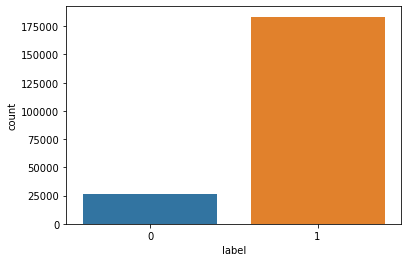

1    183431
0     26162
Name: label, dtype: int64

In [11]:
sns.countplot(x='label',data=df)
plt.show()

df['label'].value_counts()

1. Label is our target variable, Where 0 depicts user does not able to paid back the credit amount within 5 days of issuing the loan and 1 depicts user paid back the credit amount within 5 days of issuing the loan.
2. From the above plot we can see that there is imbalanced classification in our target variable and we will solve this issue in afterword process.

In [12]:
x = df.drop(['label'],axis=1)
y = df['label']

In [13]:
# Hear, we use SMOTE(resampling) method to cop up with imbalanced classification of target variable.
# SMOTE(Synthetic Minority Oversampling Technique) algorithm generates synthetic samples of minority class.
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x,y)
print(x.shape)
print(y.shape)
print(x_smote.shape)
print(y_smote.shape)

(209593, 32)
(209593,)
(366862, 32)
(366862,)


In [14]:
y.value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [15]:
y_smote.value_counts()

1    183431
0    183431
Name: label, dtype: int64

From the above observation, we can see that minority class data is increases by SMOTE method.

In [16]:
# Merege the data for further analysis.
df_new = pd.concat([x_smote,y_smote],axis=1)

In [17]:
df.shape

(209593, 33)

In [18]:
df_new.shape

(366862, 33)

### Bivariate analysis:

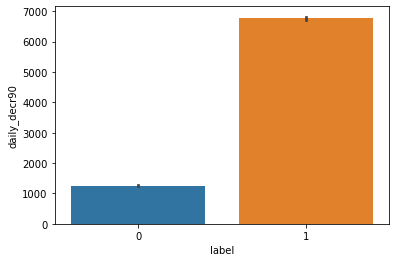

label
0    1259.874619
1    6767.658866
Name: daily_decr90, dtype: float64

In [19]:
sns.barplot(x='label',y='daily_decr90',data=df_new)
plt.show()

df_new.groupby('label')['daily_decr90'].mean()

Daily amount spent from main account, averaged over last 90 days is around 1200 Rs. for label 0 customers and around 6700 Rs. for label 1 customers.(balance is in Indonesian Rupiah )

<AxesSubplot:xlabel='label', ylabel='rental90'>

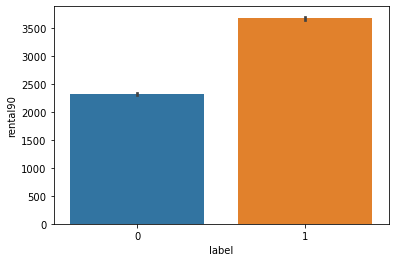

In [20]:
sns.barplot(x='label', y='rental90', data=df_new)

Average main account balance over last 90 days is around 2400 Rs. for label 0 customers and above 3500 Rs. for label 1 customers.

<AxesSubplot:xlabel='label', ylabel='last_rech_amt_ma'>

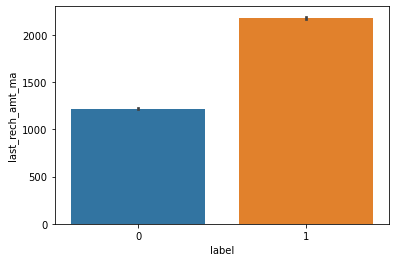

In [21]:
sns.barplot(x='label', y='last_rech_amt_ma',data=df_new)

Average amount of last recharge of main account is approx. 1200 Rs. for label 0 customers and above 2000 Rs. for label 1 customers. (amount in Indonesian Rupiah)

<AxesSubplot:xlabel='label', ylabel='fr_ma_rech30'>

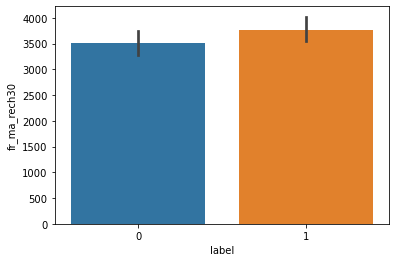

In [22]:
sns.barplot(x='label',y='fr_ma_rech30',data=df_new)

Average frequency of main account recharged in last 30 days is almost same for both types of customers.

<AxesSubplot:xlabel='label', ylabel='sumamnt_ma_rech30'>

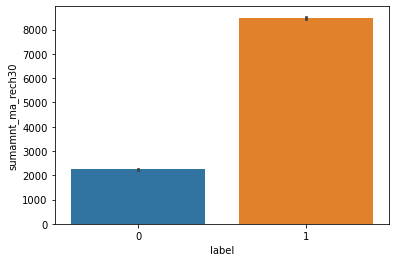

In [23]:
sns.barplot(x='label', y='sumamnt_ma_rech30',data=df_new)

Average total amount of recharge in main account over last 30 days is around 2000 Rs. for label 0 customers and above 8000 Rs. for label 1 customers. (amount in Indonesian Rupiah)

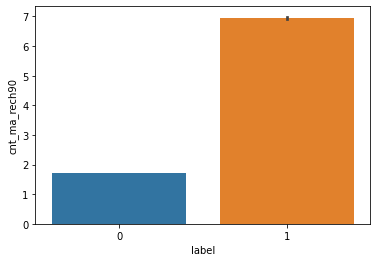

label
0    1.719753
1    6.957630
Name: cnt_ma_rech90, dtype: float64

In [24]:
sns.barplot(x='label', y='cnt_ma_rech90',data=df_new)
plt.show()

df_new.groupby('label')['cnt_ma_rech90'].mean()

Average number of times main account got recharged in last 90 days is nearby 2 times for label 0 customers and nearby 7 times for label 1 customers.

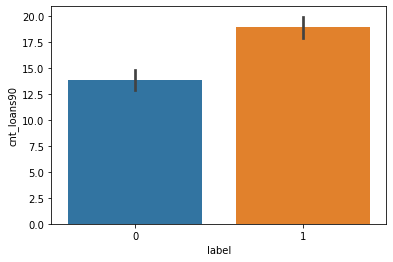

label
0    13.812197
1    18.922749
Name: cnt_loans90, dtype: float64

In [25]:
sns.barplot(x='label', y='cnt_loans90',data=df_new)
plt.show()

df_new.groupby('label')['cnt_loans90'].mean()

Average number of loans taken by user in last 90 days is nearby 14 for label 0 customers and nearby 19 for label 1 customers.

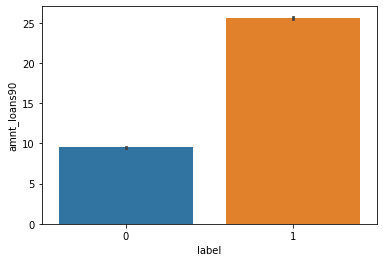

label
0     9.497413
1    25.642590
Name: amnt_loans90, dtype: float64

In [26]:
sns.barplot(x='label', y='amnt_loans90',data=df_new)
plt.show()

df_new.groupby('label')['amnt_loans90'].mean()

Average total amount of loans taken by user in last 90 days is around 10 loans for label 0 customers and aprrox. 26 loans for label 1 customers.

<AxesSubplot:xlabel='payback90', ylabel='rental90'>

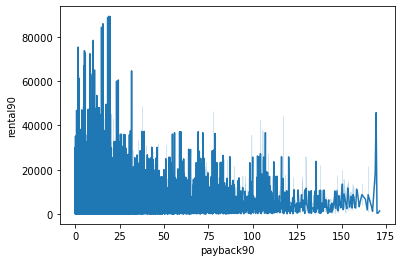

In [27]:
sns.lineplot(x='payback90',y='rental90',data=df_new)

Customers with high main balance account took less time for paying back loan and vice versa.

<AxesSubplot:xlabel='payback30', ylabel='cnt_loans30'>

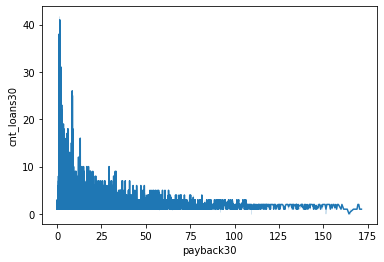

In [28]:
sns.lineplot(x='payback30', y='cnt_loans30', data=df_new)

Customers take less days for payback loans, who take more number of loans in last 30 days.

### Multivariate Analysis:

<AxesSubplot:>

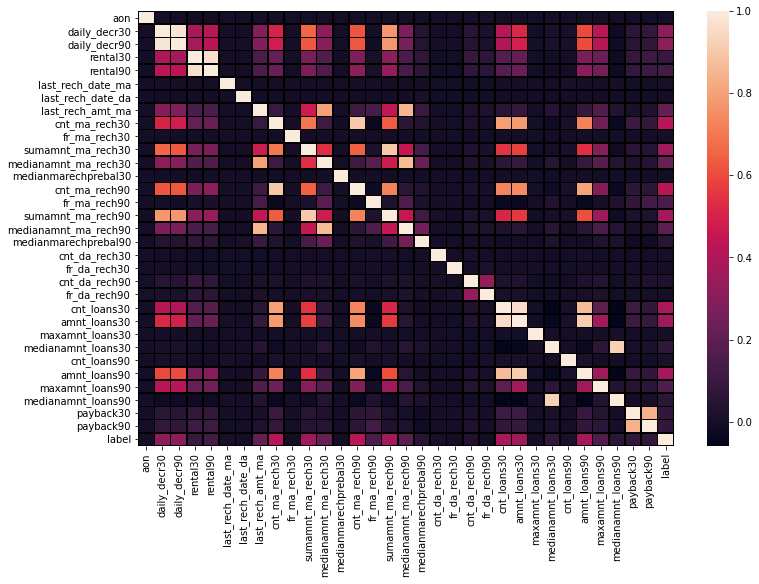

In [29]:
# Check correlation of each attributes with each other by using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_new.corr(),linewidth=0.6,linecolor='black')

1. From the above plot we can see ralation of each atributes with each other by observing colorbar on the right side of the plot.
2. From 0.0 to 1.0, Positive correlation is gradually incresing.

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='daily_decr30'>

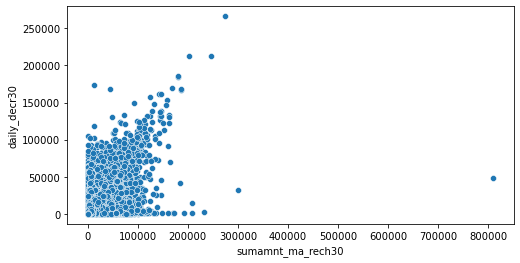

In [30]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='sumamnt_ma_rech30', y='daily_decr30', data=df_new)

Daily amount spent from main account, averaged over last 30 days is positively corrlated with total amount of recharge in main account over last 30 days. That means amount of recharg is increases with increasing amount of spent. 

In [31]:
df_new.describe()

aon   daily_decr30   daily_decr90       rental30  \
count  366862.000000  366862.000000  366862.000000  366862.000000   
mean       22.027933    3610.587191    4013.766742    2418.538374   
std       203.592128    7526.845357    8817.672881    4067.507573   
min         0.002740       0.000000       0.000000       0.000000   
25%         0.652116      12.952083      13.194667     196.000000   
50%         1.330873     520.759505     527.432857     889.881885   
75%         2.435616    3824.898500    3934.852500    2862.896474   
max      2739.344535  265926.000000  320630.000000  198926.110000   

            rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
count  366862.000000      366862.000000      366862.000000     366862.000000   
mean     2995.790012        3442.101520        3614.624365       1700.868648   
std      5208.303956       51295.750663       52535.881211       2251.883755   
min         0.000000           0.000000           0.000000          0.000000   
25%       204.930000           1.000000           0.000000        770.000000   
50%      1039.411545           3.000000           0.000000        961.500000   
75%      3483.503708           8.090742           0.000000       1547.000000   
max    200148.110000      998650.377733      999171.809410      55000.000000   

       cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
count  366862.000000  366862.000000      366862.000000         366862.000000   
mean        2.801091    3632.827837        5364.508350           1475.209692   
std         3.699780   52631.419077        8629.702578           1986.232706   
min         0.000000       0.000000           0.000000              0.000000   
25%         0.000000       0.000000           0.000000              0.000000   
50%         2.000000       0.000000        2313.000000            773.000000   
75%         4.000000       4.000000        6954.433878           1542.392652   
max       203.000000  999606.368132      810096.000000          55000.000000   

       medianmarechprebal30  cnt_ma_rech90   fr_ma_rech90  sumamnt_ma_rech90  \
count         366862.000000  366862.000000  366862.000000      366862.000000   
mean            4183.286906       4.338691       6.381582        8435.339471   
std            56441.905860       6.134184      11.808324       14103.653139   
min                0.000000       0.000000       0.000000           0.000000   
25%                0.000000       1.000000       0.000000         772.000000   
50%               24.248059       2.000000       1.000000        3464.000000   
75%               65.400000       6.000000       7.000000       10307.000000   
max           999479.419319     336.000000      88.000000      953036.000000   

       medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
count         366862.000000         366862.000000  366862.000000   
mean            1571.493326             76.691504     245.772548   
std             2028.479624            417.343589    4016.658369   
min                0.000000              0.000000       0.000000   
25%              770.000000              4.020015       0.000000   
50%              970.409155             27.214303       0.000000   
75%             1547.000000             65.500000       0.000000   
max            55000.000000          41456.500000   99914.441420   

        fr_da_rech30  cnt_da_rech90   fr_da_rech90    cnt_loans30  \
count  366862.000000  366862.000000  366862.000000  366862.000000   
mean     3709.785286       0.031494       0.047064       2.130984   
std     53733.020977       0.356496       0.869875       2.144409   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       0.000000       0.000000       2.000000   
max    999809.240107      38.000000      64.000000      50.000000  

1. Each attributes minimum value is zero.
2. There is large difference between mean and standard deviation of the data, that means skewness present in data and need to remove.
3. There is large difference between 75 percent of the data and maximam value of the data. It depicts that outliers present in data and need to remove.

### Handling Outliers

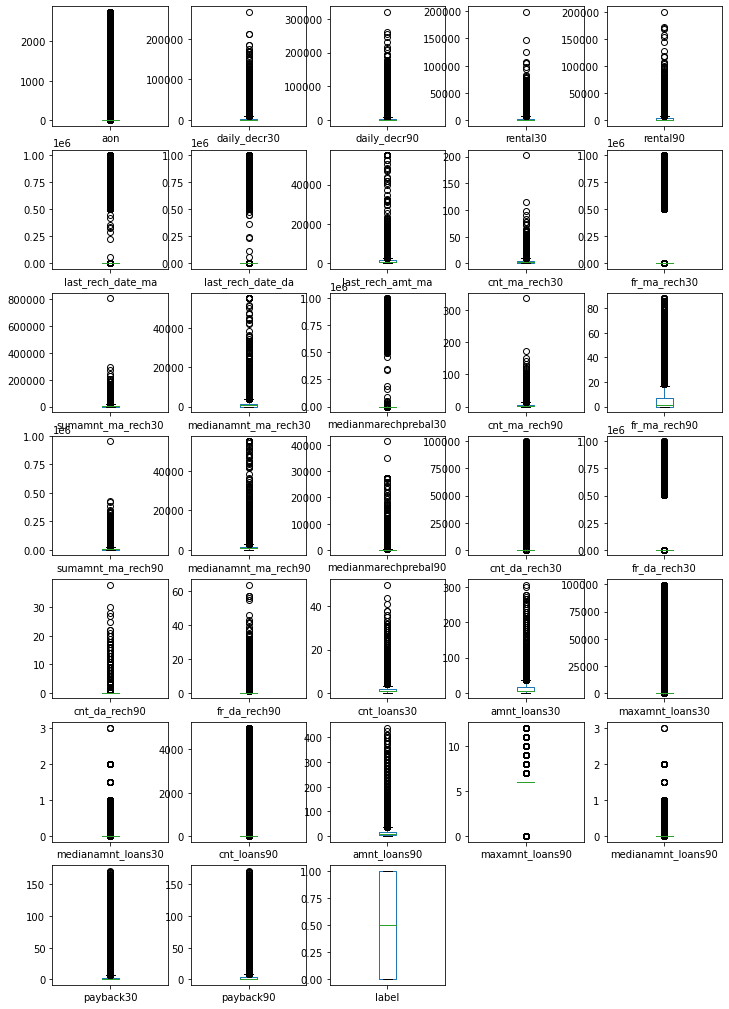

In [32]:
df_new.plot(kind='box',figsize=(12,18),layout=(7,5),subplots=True)
plt.show()

From the above observation, we can see that heavy outliers present in each attriubutes and need to remove.

In [33]:
# check and remove outliers through zscore
from scipy.stats import zscore
z = np.abs(zscore(df_new))
threshold = 3
print(np.where(z>3))

(array([     0,      1,     21, ..., 366853, 366859, 366859], dtype=int64), array([30, 28, 14, ..., 24, 13, 28], dtype=int64))


In [34]:
df_new_1 = df_new[(z<3).all(axis=1)]
df_new_1

aon  daily_decr30  daily_decr90     rental30     rental90  \
2       1.465753   1398.000000   1398.000000   900.130000   900.130000   
3       0.660274     21.228000     21.228000   159.420000   159.420000   
4       2.594521    150.619333    150.619333  1098.900000  1098.900000   
5       1.556164   2257.362667   2261.460000   368.130000   380.130000   
6       1.493151   2876.641667   2883.970000   335.750000   402.900000   
...          ...           ...           ...          ...          ...   
366856  0.395080      3.017735      3.017735   366.119617   366.119617   
366857  1.273957      4.616657      4.616657   286.889065   286.889065   
366858  0.273677    963.082599    963.129304   350.081740   776.227770   
366860  1.835194      0.058478      0.058478    17.400000    17.400000   
366861  0.410183      4.772103      4.772103     0.000000     0.000000   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
2                3.000000                0.0              1539              1   
3               41.000000                0.0               947              0   
4                4.000000                0.0              2309              7   
5                2.000000                0.0              1539              4   
6               13.000000                0.0              5787              1   
...                   ...                ...               ...            ...   
366856           2.266365                0.0               770              1   
366857           3.211772                0.0               771              1   
366858           0.000000                0.0                 0              0   
366860           0.000000                0.0                 0              0   
366861           0.000000                0.0                 0              0   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
2                0.0        1539.000000           1539.000000   
3                0.0           0.000000              0.000000   
4                2.0       20029.000000           2309.000000   
5               10.0        6156.000000           1539.000000   
6                0.0        5787.000000           5787.000000   
...              ...                ...                   ...   
366856           0.0         770.199774            770.199774   
366857           0.0         771.817657            771.817657   
366858           0.0           0.000000              0.000000   
366860           0.0           0.000000              0.000000   
366861           0.0           0.000000              0.000000   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
2                  66.320000              1             0               1539   
3                   0.000000              1             0                947   
4                  29.000000              8             2              23496   
5                  15.400000              8             0              11744   
6                 277.800000              1             0               5787   
...                      ...            ...           ...                ...   
366856              0.199774              1             0                770   
366857             15.074091              1             0                771   
366858              0.000000              0             0                  0   
366860              0.000000              0             0                  0   
366861              0.000000              0             0                  0   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
2                1539.000000             66.320000            0.0   
3                 947.000000              2.500000            0.0   
4                2888.000000             35.000000            0.0   
5                1539.000000             55.900000            0.0   
6                5787.000000            277.800000            0.

In [35]:
Percentage_loss = ((366862-265370)/366862)*100
Percentage_loss

27.664898517698756

Here, percentage loss of the data is high by using zscore method. so, we don't use this mehod for removing outliers.

In [36]:
# check and remove outliers using inter qurtile range.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

label                       0.000000
aon                         2.016438
daily_decr30             7201.547000
daily_decr90             7760.096667
rental30                 3062.650000
rental90                 3874.510000
last_rech_date_ma           6.000000
last_rech_date_da           0.000000
last_rech_amt_ma         1539.000000
cnt_ma_rech30               4.000000
fr_ma_rech30                6.000000
sumamnt_ma_rech30        8470.000000
medianamnt_ma_rech30     1154.000000
medianmarechprebal30       73.630000
cnt_ma_rech90               6.000000
fr_ma_rech90                8.000000
sumamnt_ma_rech90       13683.000000
medianamnt_ma_rech90     1151.000000
medianmarechprebal90       66.200000
cnt_da_rech30               0.000000
fr_da_rech30                0.000000
cnt_da_rech90               0.000000
fr_da_rech90                0.000000
cnt_loans30                 3.000000
amnt_loans30               18.000000
maxamnt_loans30             0.000000
medianamnt_loans30          0.000000
c

In [37]:
df_new1 = df[~((df < (Q1 - 1.5 * IQR))| (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_new1)

        label       aon  daily_decr30  daily_decr90  rental30  rental90  \
2           1  1.465753   1398.000000   1398.000000    900.13    900.13   
4           1  2.594521    150.619333    150.619333   1098.90   1098.90   
8           1  3.263014     90.695000     90.695000   2287.50   2287.50   
9           1  1.468493     29.357333     29.357333    612.96    612.96   
10          1  4.139726     12.896000     12.896000    790.44    790.44   
...       ...       ...           ...           ...       ...       ...   
209579      1  0.424658  11400.000000  16265.000000   3611.23   7196.49   
209582      1  0.254795   1062.400000   1065.500000    248.13    260.13   
209583      1  2.561644     15.550667     15.550667    140.44    140.44   
209588      1  1.106849    151.872333    151.872333   1089.19   1089.19   
209589      1  2.945205     36.936000     36.936000   1728.36   1728.36   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
2                 

Here, percentage loss is also high by using this method. So, we don't remove outliers.

In [38]:
# split our independent variable and target variable
x = df_new.drop(['label'],axis=1)
y = df_new['label']

### Handling Skewness

In [39]:
# check skewness of independent data
x.skew()

aon                     10.367934
daily_decr30             4.853306
daily_decr90             5.286005
rental30                 4.535425
rental90                 4.598032
last_rech_date_ma       15.412611
last_rech_date_da       14.970010
last_rech_amt_ma         4.921955
cnt_ma_rech30            3.627253
fr_ma_rech30            14.901707
sumamnt_ma_rech30        6.783605
medianamnt_ma_rech30     4.658256
medianmarechprebal30    14.122506
cnt_ma_rech90            3.926482
fr_ma_rech90             2.537075
sumamnt_ma_rech90        5.565475
medianamnt_ma_rech90     4.916859
medianmarechprebal90    47.276614
cnt_da_rech30           18.338126
fr_da_rech30            14.892569
cnt_da_rech90           29.257269
fr_da_rech90            27.451651
cnt_loans30              3.417792
amnt_loans30             3.647742
maxamnt_loans30         17.990281
medianamnt_loans30       5.101629
cnt_loans90             17.254689
amnt_loans90             3.925638
maxamnt_loans90          2.344838
medianamnt_loa

In [40]:
collist = x.columns.values
ncol = 8
nrows = 4

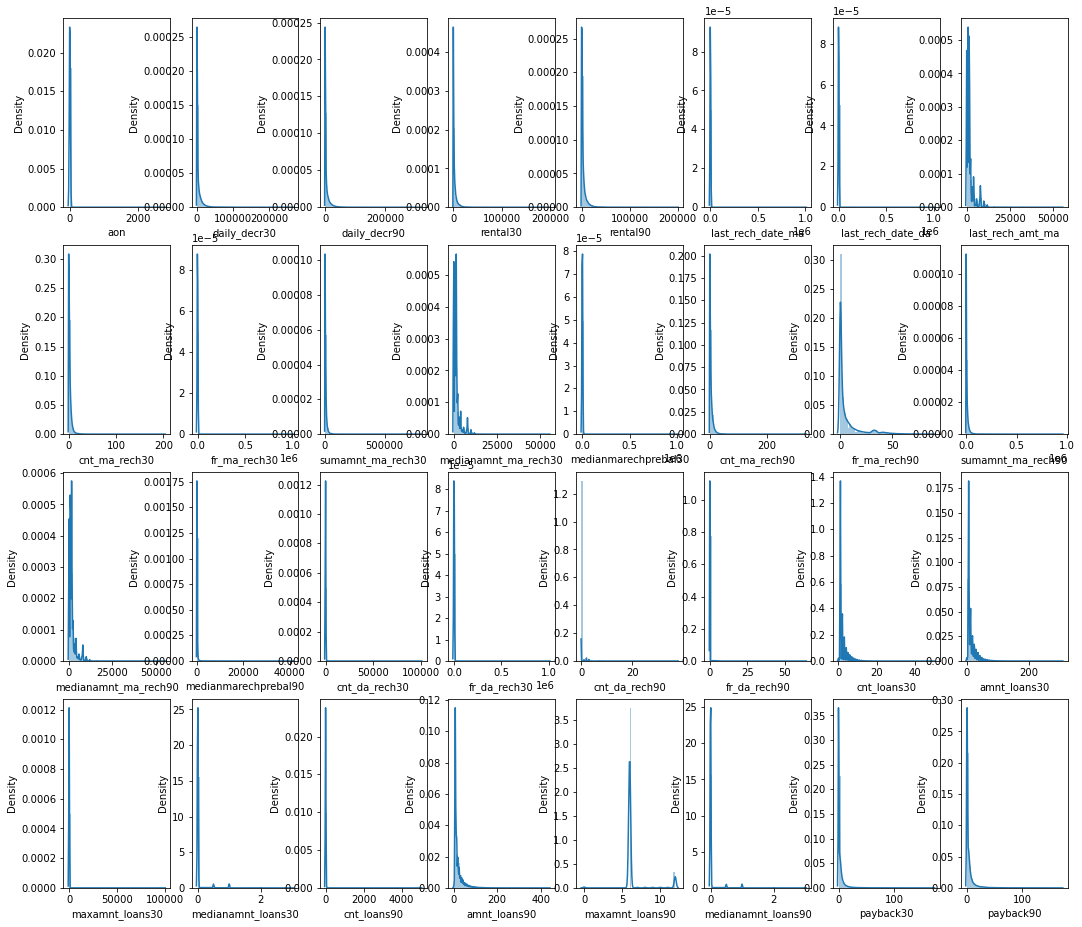

In [41]:
plt.figure(figsize=(18,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df_new[collist[i]])
plt.show()

From the above distribution plot, we can see that skewness is present in every attributes and need to remove. For removing skewness we use power transform method.

In [42]:
# Remove skewness by using power transform method
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

###  Scaling and Principle Component Analysis(PCA)

In [43]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_t = st.fit_transform(x)

In [44]:
# Here, we use PCA method. This method reduce the dimension of the data and also useful for making calculation faster.
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
x_d = pca.fit_transform(x_t)

In [45]:
# spli train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_d,y,test_size=0.20,random_state=42)

## Find Best Model

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model = [LogisticRegression(),DecisionTreeClassifier(),GaussianNB(),KNeighborsClassifier()]

for m in model:
    m.fit(x_train,y_train)
    train = m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy of",m,"is:")
    print("Accuracy of training model is:",train)
    print("Accuracy Score:",accuracy_score(y_test,predm)*100)
    print("Confusion matrix:","\n",confusion_matrix(y_test,predm))
    print("Classification report:","\n",classification_report(y_test,predm))
    print("************************************************************")
    print("\n")

Accuracy of LogisticRegression() is:
Accuracy of training model is: 0.7623113643100764
Accuracy Score: 76.3155384133128
Confusion matrix: 
 [[28356  8091]
 [ 9287 27639]]
Classification report: 
               precision    recall  f1-score   support

           0       0.75      0.78      0.77     36447
           1       0.77      0.75      0.76     36926

    accuracy                           0.76     73373
   macro avg       0.76      0.76      0.76     73373
weighted avg       0.76      0.76      0.76     73373

************************************************************


Accuracy of DecisionTreeClassifier() is:
Accuracy of training model is: 0.9997819339055297
Accuracy Score: 81.5613372766549
Confusion matrix: 
 [[30329  6118]
 [ 7411 29515]]
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.83      0.82     36447
           1       0.83      0.80      0.81     36926

    accuracy                           0.82     73

### Bagging and Boosting method

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
train = rfc.score(x_train,y_train)
predrfc = rfc.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy Score:",accuracy_score(y_test,predrfc)*100)
print("Confusion matrix:","\n",confusion_matrix(y_test,predrfc))
print("Classification report:","\n",classification_report(y_test,predrfc))

Accuracy of training model is: 0.9997717120573514
Accuracy Score: 89.00276668529295
Confusion matrix: 
 [[32515  3932]
 [ 4137 32789]]
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     36447
           1       0.89      0.89      0.89     36926

    accuracy                           0.89     73373
   macro avg       0.89      0.89      0.89     73373
weighted avg       0.89      0.89      0.89     73373



In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
parameters = {'learning_rate':[0.01,0.1],'ccp_alpha':[0.0,0.01]}
clf = GridSearchCV(gbc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'ccp_alpha': 0.0, 'learning_rate': 0.1}


In [62]:
gbc = GradientBoostingClassifier(ccp_alpha=0.0,learning_rate=0.1)
gbc.fit(x_train,y_train)
train = gbc.score(x_train,y_train)
predgbc = gbc.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy Score:",accuracy_score(y_test,predgbc)*100)
print("Confusion matrix:","\n",confusion_matrix(y_test,predgbc))
print("Classification report:","\n",classification_report(y_test,predgbc))

Accuracy of training model is: 0.7935970343011152
Accuracy Score: 79.44202908426806
Confusion matrix: 
 [[29705  6742]
 [ 8342 28584]]
Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80     36447
           1       0.81      0.77      0.79     36926

    accuracy                           0.79     73373
   macro avg       0.79      0.79      0.79     73373
weighted avg       0.80      0.79      0.79     73373



In [56]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
train = etc.score(x_train,y_train)
predetc = etc.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy Score:",accuracy_score(y_test,predetc)*100)
print("Confusion matrix:","\n",confusion_matrix(y_test,predetc))
print("Classification report:","\n",classification_report(y_test,predetc))

Accuracy of training model is: 0.9997819339055297
Accuracy Score: 89.97587668488408
Confusion matrix: 
 [[32901  3546]
 [ 3809 33117]]
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     36447
           1       0.90      0.90      0.90     36926

    accuracy                           0.90     73373
   macro avg       0.90      0.90      0.90     73373
weighted avg       0.90      0.90      0.90     73373



In [52]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()
parameters = {'learning_rate':[0.01,0.02,0.04,0.06],'iterations':[150,200,300],'depth':[3,4,5,6,7]}
clf = GridSearchCV(cb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

0:	learn: 0.6903912	total: 471ms	remaining: 1m 10s
1:	learn: 0.6876908	total: 523ms	remaining: 38.7s
2:	learn: 0.6850562	total: 579ms	remaining: 28.4s
3:	learn: 0.6825487	total: 622ms	remaining: 22.7s
4:	learn: 0.6800378	total: 663ms	remaining: 19.2s
5:	learn: 0.6775791	total: 706ms	remaining: 16.9s
6:	learn: 0.6751235	total: 760ms	remaining: 15.5s
7:	learn: 0.6727443	total: 807ms	remaining: 14.3s
8:	learn: 0.6703745	total: 850ms	remaining: 13.3s
9:	learn: 0.6680419	total: 898ms	remaining: 12.6s
10:	learn: 0.6657687	total: 947ms	remaining: 12s
11:	learn: 0.6635631	total: 998ms	remaining: 11.5s
12:	learn: 0.6613522	total: 1.04s	remaining: 11s
13:	learn: 0.6591918	total: 1.08s	remaining: 10.5s
14:	learn: 0.6571255	total: 1.13s	remaining: 10.2s
15:	learn: 0.6550331	total: 1.18s	remaining: 9.85s
16:	learn: 0.6529899	total: 1.22s	remaining: 9.52s
17:	learn: 0.6509906	total: 1.26s	remaining: 9.23s
18:	learn: 0.6490033	total: 1.3s	remaining: 8.96s
19:	learn: 0.6470461	total: 1.35s	remaining: 

14:	learn: 0.6573232	total: 755ms	remaining: 6.79s
15:	learn: 0.6552517	total: 807ms	remaining: 6.76s
16:	learn: 0.6532254	total: 854ms	remaining: 6.68s
17:	learn: 0.6512370	total: 896ms	remaining: 6.57s
18:	learn: 0.6493179	total: 950ms	remaining: 6.55s
19:	learn: 0.6474219	total: 1.01s	remaining: 6.57s
20:	learn: 0.6455224	total: 1.06s	remaining: 6.54s
21:	learn: 0.6436666	total: 1.11s	remaining: 6.46s
22:	learn: 0.6418435	total: 1.16s	remaining: 6.42s
23:	learn: 0.6400573	total: 1.21s	remaining: 6.38s
24:	learn: 0.6382729	total: 1.27s	remaining: 6.34s
25:	learn: 0.6365598	total: 1.31s	remaining: 6.27s
26:	learn: 0.6348311	total: 1.36s	remaining: 6.22s
27:	learn: 0.6331583	total: 1.41s	remaining: 6.13s
28:	learn: 0.6314838	total: 1.45s	remaining: 6.04s
29:	learn: 0.6298386	total: 1.49s	remaining: 5.96s
30:	learn: 0.6282624	total: 1.53s	remaining: 5.89s
31:	learn: 0.6266939	total: 1.58s	remaining: 5.83s
32:	learn: 0.6251287	total: 1.63s	remaining: 5.78s
33:	learn: 0.6235964	total: 1.6

25:	learn: 0.6358825	total: 1.54s	remaining: 7.33s
26:	learn: 0.6341473	total: 1.58s	remaining: 7.21s
27:	learn: 0.6324440	total: 1.63s	remaining: 7.1s
28:	learn: 0.6308018	total: 1.69s	remaining: 7.07s
29:	learn: 0.6291735	total: 1.74s	remaining: 6.97s
30:	learn: 0.6275834	total: 1.79s	remaining: 6.86s
31:	learn: 0.6260036	total: 1.83s	remaining: 6.77s
32:	learn: 0.6244276	total: 1.88s	remaining: 6.68s
33:	learn: 0.6228732	total: 1.93s	remaining: 6.59s
34:	learn: 0.6213591	total: 1.98s	remaining: 6.52s
35:	learn: 0.6198606	total: 2.03s	remaining: 6.43s
36:	learn: 0.6183899	total: 2.08s	remaining: 6.35s
37:	learn: 0.6169454	total: 2.13s	remaining: 6.27s
38:	learn: 0.6155344	total: 2.18s	remaining: 6.2s
39:	learn: 0.6141313	total: 2.23s	remaining: 6.15s
40:	learn: 0.6127617	total: 2.28s	remaining: 6.07s
41:	learn: 0.6113950	total: 2.34s	remaining: 6.02s
42:	learn: 0.6100515	total: 2.4s	remaining: 5.96s
43:	learn: 0.6087206	total: 2.46s	remaining: 5.93s
44:	learn: 0.6074253	total: 2.5s	r

36:	learn: 0.6185707	total: 1.75s	remaining: 5.34s
37:	learn: 0.6171161	total: 1.8s	remaining: 5.31s
38:	learn: 0.6157074	total: 1.84s	remaining: 5.24s
39:	learn: 0.6142932	total: 1.89s	remaining: 5.2s
40:	learn: 0.6129236	total: 1.93s	remaining: 5.13s
41:	learn: 0.6115525	total: 1.99s	remaining: 5.11s
42:	learn: 0.6102090	total: 2.06s	remaining: 5.12s
43:	learn: 0.6088862	total: 2.11s	remaining: 5.08s
44:	learn: 0.6075912	total: 2.15s	remaining: 5.01s
45:	learn: 0.6063225	total: 2.19s	remaining: 4.94s
46:	learn: 0.6050408	total: 2.23s	remaining: 4.89s
47:	learn: 0.6037874	total: 2.28s	remaining: 4.84s
48:	learn: 0.6025794	total: 2.32s	remaining: 4.78s
49:	learn: 0.6013972	total: 2.37s	remaining: 4.74s
50:	learn: 0.6001926	total: 2.41s	remaining: 4.68s
51:	learn: 0.5989922	total: 2.46s	remaining: 4.63s
52:	learn: 0.5978501	total: 2.5s	remaining: 4.57s
53:	learn: 0.5967476	total: 2.54s	remaining: 4.51s
54:	learn: 0.5956606	total: 2.58s	remaining: 4.46s
55:	learn: 0.5945392	total: 2.62s	

49:	learn: 0.6014213	total: 2.25s	remaining: 4.51s
50:	learn: 0.6002253	total: 2.33s	remaining: 4.52s
51:	learn: 0.5990205	total: 2.38s	remaining: 4.49s
52:	learn: 0.5978829	total: 2.44s	remaining: 4.46s
53:	learn: 0.5967406	total: 2.49s	remaining: 4.43s
54:	learn: 0.5956443	total: 2.55s	remaining: 4.4s
55:	learn: 0.5945209	total: 2.6s	remaining: 4.37s
56:	learn: 0.5933993	total: 2.67s	remaining: 4.35s
57:	learn: 0.5923116	total: 2.72s	remaining: 4.31s
58:	learn: 0.5912378	total: 2.77s	remaining: 4.28s
59:	learn: 0.5901978	total: 2.82s	remaining: 4.23s
60:	learn: 0.5891566	total: 2.86s	remaining: 4.18s
61:	learn: 0.5881238	total: 2.93s	remaining: 4.16s
62:	learn: 0.5870858	total: 2.99s	remaining: 4.13s
63:	learn: 0.5860601	total: 3.03s	remaining: 4.08s
64:	learn: 0.5850863	total: 3.08s	remaining: 4.03s
65:	learn: 0.5841539	total: 3.13s	remaining: 3.98s
66:	learn: 0.5831959	total: 3.17s	remaining: 3.92s
67:	learn: 0.5822453	total: 3.21s	remaining: 3.87s
68:	learn: 0.5813138	total: 3.25s

62:	learn: 0.5440727	total: 2.78s	remaining: 3.84s
63:	learn: 0.5431430	total: 2.83s	remaining: 3.81s
64:	learn: 0.5422226	total: 2.88s	remaining: 3.77s
65:	learn: 0.5414177	total: 2.93s	remaining: 3.73s
66:	learn: 0.5405719	total: 3s	remaining: 3.71s
67:	learn: 0.5397092	total: 3.05s	remaining: 3.68s
68:	learn: 0.5388668	total: 3.13s	remaining: 3.68s
69:	learn: 0.5380922	total: 3.2s	remaining: 3.65s
70:	learn: 0.5373388	total: 3.25s	remaining: 3.62s
71:	learn: 0.5365794	total: 3.32s	remaining: 3.59s
72:	learn: 0.5358057	total: 3.36s	remaining: 3.55s
73:	learn: 0.5350498	total: 3.42s	remaining: 3.51s
74:	learn: 0.5343204	total: 3.46s	remaining: 3.46s
75:	learn: 0.5336731	total: 3.51s	remaining: 3.41s
76:	learn: 0.5329660	total: 3.56s	remaining: 3.37s
77:	learn: 0.5323481	total: 3.61s	remaining: 3.33s
78:	learn: 0.5316971	total: 3.66s	remaining: 3.29s
79:	learn: 0.5311061	total: 3.71s	remaining: 3.24s
80:	learn: 0.5304218	total: 3.76s	remaining: 3.2s
81:	learn: 0.5297517	total: 3.81s	re

77:	learn: 0.5330639	total: 4.04s	remaining: 3.73s
78:	learn: 0.5323896	total: 4.09s	remaining: 3.67s
79:	learn: 0.5317886	total: 4.12s	remaining: 3.61s
80:	learn: 0.5311322	total: 4.17s	remaining: 3.55s
81:	learn: 0.5305193	total: 4.22s	remaining: 3.5s
82:	learn: 0.5298061	total: 4.26s	remaining: 3.44s
83:	learn: 0.5291732	total: 4.3s	remaining: 3.38s
84:	learn: 0.5285499	total: 4.35s	remaining: 3.32s
85:	learn: 0.5279593	total: 4.39s	remaining: 3.27s
86:	learn: 0.5273357	total: 4.44s	remaining: 3.21s
87:	learn: 0.5267815	total: 4.51s	remaining: 3.18s
88:	learn: 0.5262288	total: 4.57s	remaining: 3.13s
89:	learn: 0.5256061	total: 4.62s	remaining: 3.08s
90:	learn: 0.5250623	total: 4.67s	remaining: 3.02s
91:	learn: 0.5245834	total: 4.71s	remaining: 2.97s
92:	learn: 0.5239813	total: 4.75s	remaining: 2.91s
93:	learn: 0.5234395	total: 4.79s	remaining: 2.86s
94:	learn: 0.5229473	total: 4.83s	remaining: 2.8s
95:	learn: 0.5224784	total: 4.88s	remaining: 2.75s
96:	learn: 0.5220195	total: 4.92s	

93:	learn: 0.5224540	total: 4.31s	remaining: 2.57s
94:	learn: 0.5218944	total: 4.35s	remaining: 2.52s
95:	learn: 0.5213756	total: 4.39s	remaining: 2.47s
96:	learn: 0.5208951	total: 4.44s	remaining: 2.42s
97:	learn: 0.5203827	total: 4.48s	remaining: 2.38s
98:	learn: 0.5199384	total: 4.52s	remaining: 2.33s
99:	learn: 0.5194807	total: 4.56s	remaining: 2.28s
100:	learn: 0.5190076	total: 4.6s	remaining: 2.23s
101:	learn: 0.5185850	total: 4.65s	remaining: 2.19s
102:	learn: 0.5181323	total: 4.69s	remaining: 2.14s
103:	learn: 0.5176379	total: 4.74s	remaining: 2.1s
104:	learn: 0.5172048	total: 4.79s	remaining: 2.05s
105:	learn: 0.5167397	total: 4.83s	remaining: 2s
106:	learn: 0.5163301	total: 4.87s	remaining: 1.96s
107:	learn: 0.5159241	total: 4.93s	remaining: 1.92s
108:	learn: 0.5155584	total: 4.98s	remaining: 1.87s
109:	learn: 0.5151554	total: 5.03s	remaining: 1.83s
110:	learn: 0.5147320	total: 5.08s	remaining: 1.78s
111:	learn: 0.5143284	total: 5.12s	remaining: 1.74s
112:	learn: 0.5139344	to

109:	learn: 0.5148460	total: 4.57s	remaining: 1.66s
110:	learn: 0.5144408	total: 4.61s	remaining: 1.62s
111:	learn: 0.5140469	total: 4.65s	remaining: 1.58s
112:	learn: 0.5136715	total: 4.69s	remaining: 1.53s
113:	learn: 0.5132976	total: 4.73s	remaining: 1.49s
114:	learn: 0.5129347	total: 4.77s	remaining: 1.45s
115:	learn: 0.5125866	total: 4.81s	remaining: 1.41s
116:	learn: 0.5122233	total: 4.85s	remaining: 1.37s
117:	learn: 0.5118733	total: 4.89s	remaining: 1.33s
118:	learn: 0.5114852	total: 4.93s	remaining: 1.28s
119:	learn: 0.5111922	total: 4.98s	remaining: 1.24s
120:	learn: 0.5108491	total: 5.02s	remaining: 1.2s
121:	learn: 0.5105099	total: 5.06s	remaining: 1.16s
122:	learn: 0.5101325	total: 5.1s	remaining: 1.12s
123:	learn: 0.5097545	total: 5.14s	remaining: 1.08s
124:	learn: 0.5094128	total: 5.19s	remaining: 1.04s
125:	learn: 0.5091062	total: 5.24s	remaining: 999ms
126:	learn: 0.5087963	total: 5.28s	remaining: 957ms
127:	learn: 0.5084723	total: 5.32s	remaining: 915ms
128:	learn: 0.

121:	learn: 0.5104149	total: 5.09s	remaining: 1.17s
122:	learn: 0.5100176	total: 5.13s	remaining: 1.13s
123:	learn: 0.5096893	total: 5.17s	remaining: 1.08s
124:	learn: 0.5093836	total: 5.21s	remaining: 1.04s
125:	learn: 0.5090814	total: 5.25s	remaining: 999ms
126:	learn: 0.5087521	total: 5.29s	remaining: 958ms
127:	learn: 0.5083869	total: 5.33s	remaining: 916ms
128:	learn: 0.5080585	total: 5.37s	remaining: 874ms
129:	learn: 0.5077680	total: 5.41s	remaining: 832ms
130:	learn: 0.5074014	total: 5.46s	remaining: 791ms
131:	learn: 0.5071109	total: 5.5s	remaining: 749ms
132:	learn: 0.5067736	total: 5.54s	remaining: 708ms
133:	learn: 0.5064208	total: 5.58s	remaining: 666ms
134:	learn: 0.5061115	total: 5.62s	remaining: 624ms
135:	learn: 0.5058357	total: 5.66s	remaining: 582ms
136:	learn: 0.5055127	total: 5.69s	remaining: 540ms
137:	learn: 0.5052379	total: 5.73s	remaining: 498ms
138:	learn: 0.5049579	total: 5.77s	remaining: 457ms
139:	learn: 0.5047225	total: 5.81s	remaining: 415ms
140:	learn: 0

134:	learn: 0.4824226	total: 5.66s	remaining: 629ms
135:	learn: 0.4821965	total: 5.7s	remaining: 587ms
136:	learn: 0.4819395	total: 5.74s	remaining: 545ms
137:	learn: 0.4817560	total: 5.79s	remaining: 504ms
138:	learn: 0.4815338	total: 5.84s	remaining: 462ms
139:	learn: 0.4810081	total: 5.89s	remaining: 421ms
140:	learn: 0.4807548	total: 5.94s	remaining: 379ms
141:	learn: 0.4805607	total: 5.98s	remaining: 337ms
142:	learn: 0.4803641	total: 6.03s	remaining: 295ms
143:	learn: 0.4801571	total: 6.09s	remaining: 254ms
144:	learn: 0.4799752	total: 6.13s	remaining: 212ms
145:	learn: 0.4797006	total: 6.2s	remaining: 170ms
146:	learn: 0.4795232	total: 6.25s	remaining: 127ms
147:	learn: 0.4793534	total: 6.29s	remaining: 85ms
148:	learn: 0.4790176	total: 6.33s	remaining: 42.5ms
149:	learn: 0.4788294	total: 6.4s	remaining: 0us
0:	learn: 0.6823487	total: 49.1ms	remaining: 7.32s
1:	learn: 0.6723743	total: 92ms	remaining: 6.81s
2:	learn: 0.6632057	total: 133ms	remaining: 6.51s
3:	learn: 0.6547897	tot

145:	learn: 0.4798379	total: 5.94s	remaining: 163ms
146:	learn: 0.4796528	total: 5.99s	remaining: 122ms
147:	learn: 0.4794703	total: 6.02s	remaining: 81.4ms
148:	learn: 0.4792361	total: 6.06s	remaining: 40.7ms
149:	learn: 0.4790319	total: 6.1s	remaining: 0us
0:	learn: 0.6822474	total: 45.7ms	remaining: 6.81s
1:	learn: 0.6721808	total: 87.6ms	remaining: 6.48s
2:	learn: 0.6629467	total: 128ms	remaining: 6.25s
3:	learn: 0.6544529	total: 171ms	remaining: 6.26s
4:	learn: 0.6464279	total: 213ms	remaining: 6.16s
5:	learn: 0.6389900	total: 255ms	remaining: 6.13s
6:	learn: 0.6318473	total: 297ms	remaining: 6.06s
7:	learn: 0.6252838	total: 337ms	remaining: 5.99s
8:	learn: 0.6191513	total: 378ms	remaining: 5.92s
9:	learn: 0.6133264	total: 419ms	remaining: 5.86s
10:	learn: 0.6079970	total: 459ms	remaining: 5.8s
11:	learn: 0.6029504	total: 501ms	remaining: 5.76s
12:	learn: 0.5980780	total: 542ms	remaining: 5.71s
13:	learn: 0.5935315	total: 585ms	remaining: 5.68s
14:	learn: 0.5892430	total: 625ms	re

10:	learn: 0.6080567	total: 472ms	remaining: 5.97s
11:	learn: 0.6030060	total: 512ms	remaining: 5.89s
12:	learn: 0.5982833	total: 555ms	remaining: 5.85s
13:	learn: 0.5936319	total: 595ms	remaining: 5.78s
14:	learn: 0.5893913	total: 634ms	remaining: 5.71s
15:	learn: 0.5855056	total: 674ms	remaining: 5.64s
16:	learn: 0.5816450	total: 716ms	remaining: 5.6s
17:	learn: 0.5779218	total: 755ms	remaining: 5.54s
18:	learn: 0.5746658	total: 797ms	remaining: 5.49s
19:	learn: 0.5714097	total: 838ms	remaining: 5.45s
20:	learn: 0.5682918	total: 880ms	remaining: 5.41s
21:	learn: 0.5652614	total: 920ms	remaining: 5.35s
22:	learn: 0.5624122	total: 960ms	remaining: 5.3s
23:	learn: 0.5597710	total: 1s	remaining: 5.27s
24:	learn: 0.5572331	total: 1.05s	remaining: 5.24s
25:	learn: 0.5547781	total: 1.09s	remaining: 5.2s
26:	learn: 0.5524897	total: 1.14s	remaining: 5.18s
27:	learn: 0.5503284	total: 1.18s	remaining: 5.13s
28:	learn: 0.5482118	total: 1.22s	remaining: 5.08s
29:	learn: 0.5461225	total: 1.26s	rem

25:	learn: 0.5548335	total: 1.12s	remaining: 5.36s
26:	learn: 0.5525654	total: 1.16s	remaining: 5.31s
27:	learn: 0.5503300	total: 1.2s	remaining: 5.25s
28:	learn: 0.5482374	total: 1.25s	remaining: 5.2s
29:	learn: 0.5462017	total: 1.29s	remaining: 5.17s
30:	learn: 0.5443360	total: 1.33s	remaining: 5.11s
31:	learn: 0.5424897	total: 1.38s	remaining: 5.07s
32:	learn: 0.5408422	total: 1.42s	remaining: 5.02s
33:	learn: 0.5391268	total: 1.46s	remaining: 5s
34:	learn: 0.5374653	total: 1.5s	remaining: 4.94s
35:	learn: 0.5359952	total: 1.55s	remaining: 4.9s
36:	learn: 0.5344846	total: 1.59s	remaining: 4.85s
37:	learn: 0.5330642	total: 1.63s	remaining: 4.79s
38:	learn: 0.5316613	total: 1.67s	remaining: 4.74s
39:	learn: 0.5303690	total: 1.71s	remaining: 4.7s
40:	learn: 0.5291000	total: 1.75s	remaining: 4.66s
41:	learn: 0.5278027	total: 1.79s	remaining: 4.61s
42:	learn: 0.5264858	total: 1.84s	remaining: 4.57s
43:	learn: 0.5254485	total: 1.88s	remaining: 4.53s
44:	learn: 0.5242792	total: 1.92s	remai

40:	learn: 0.5096118	total: 1.75s	remaining: 4.67s
41:	learn: 0.5086574	total: 1.8s	remaining: 4.63s
42:	learn: 0.5076475	total: 1.84s	remaining: 4.58s
43:	learn: 0.5065949	total: 1.89s	remaining: 4.54s
44:	learn: 0.5057448	total: 1.93s	remaining: 4.49s
45:	learn: 0.5049168	total: 1.96s	remaining: 4.44s
46:	learn: 0.5039619	total: 2.02s	remaining: 4.42s
47:	learn: 0.5033101	total: 2.06s	remaining: 4.38s
48:	learn: 0.5023823	total: 2.1s	remaining: 4.33s
49:	learn: 0.5016025	total: 2.14s	remaining: 4.29s
50:	learn: 0.5009007	total: 2.19s	remaining: 4.24s
51:	learn: 0.5000195	total: 2.23s	remaining: 4.2s
52:	learn: 0.4993863	total: 2.28s	remaining: 4.17s
53:	learn: 0.4988200	total: 2.32s	remaining: 4.13s
54:	learn: 0.4981161	total: 2.36s	remaining: 4.08s
55:	learn: 0.4975344	total: 2.4s	remaining: 4.03s
56:	learn: 0.4967720	total: 2.45s	remaining: 3.99s
57:	learn: 0.4961619	total: 2.49s	remaining: 3.94s
58:	learn: 0.4956718	total: 2.52s	remaining: 3.89s
59:	learn: 0.4949745	total: 2.56s	r

54:	learn: 0.4993055	total: 2.27s	remaining: 3.93s
55:	learn: 0.4985582	total: 2.31s	remaining: 3.89s
56:	learn: 0.4978017	total: 2.35s	remaining: 3.84s
57:	learn: 0.4971916	total: 2.39s	remaining: 3.79s
58:	learn: 0.4966539	total: 2.43s	remaining: 3.75s
59:	learn: 0.4959886	total: 2.47s	remaining: 3.7s
60:	learn: 0.4955193	total: 2.5s	remaining: 3.65s
61:	learn: 0.4949804	total: 2.57s	remaining: 3.64s
62:	learn: 0.4943350	total: 2.62s	remaining: 3.61s
63:	learn: 0.4937329	total: 2.67s	remaining: 3.58s
64:	learn: 0.4933104	total: 2.71s	remaining: 3.55s
65:	learn: 0.4927491	total: 2.75s	remaining: 3.5s
66:	learn: 0.4923418	total: 2.8s	remaining: 3.46s
67:	learn: 0.4918173	total: 2.84s	remaining: 3.42s
68:	learn: 0.4913148	total: 2.88s	remaining: 3.38s
69:	learn: 0.4906584	total: 2.93s	remaining: 3.35s
70:	learn: 0.4900578	total: 2.97s	remaining: 3.31s
71:	learn: 0.4896078	total: 3.02s	remaining: 3.27s
72:	learn: 0.4892225	total: 3.06s	remaining: 3.23s
73:	learn: 0.4887922	total: 3.11s	r

68:	learn: 0.4906379	total: 2.82s	remaining: 3.31s
69:	learn: 0.4899922	total: 2.86s	remaining: 3.27s
70:	learn: 0.4894290	total: 2.9s	remaining: 3.23s
71:	learn: 0.4890775	total: 2.94s	remaining: 3.19s
72:	learn: 0.4886927	total: 2.98s	remaining: 3.14s
73:	learn: 0.4882770	total: 3.03s	remaining: 3.11s
74:	learn: 0.4879186	total: 3.06s	remaining: 3.06s
75:	learn: 0.4875899	total: 3.1s	remaining: 3.02s
76:	learn: 0.4871724	total: 3.14s	remaining: 2.98s
77:	learn: 0.4866847	total: 3.18s	remaining: 2.93s
78:	learn: 0.4861833	total: 3.21s	remaining: 2.89s
79:	learn: 0.4857603	total: 3.25s	remaining: 2.85s
80:	learn: 0.4853904	total: 3.29s	remaining: 2.81s
81:	learn: 0.4849071	total: 3.33s	remaining: 2.76s
82:	learn: 0.4844786	total: 3.37s	remaining: 2.72s
83:	learn: 0.4841900	total: 3.4s	remaining: 2.67s
84:	learn: 0.4838715	total: 3.44s	remaining: 2.63s
85:	learn: 0.4834414	total: 3.48s	remaining: 2.59s
86:	learn: 0.4826878	total: 3.52s	remaining: 2.55s
87:	learn: 0.4821947	total: 3.56s	

81:	learn: 0.4841986	total: 3.65s	remaining: 3.03s
82:	learn: 0.4834969	total: 3.7s	remaining: 2.98s
83:	learn: 0.4831005	total: 3.74s	remaining: 2.94s
84:	learn: 0.4826756	total: 3.78s	remaining: 2.89s
85:	learn: 0.4822501	total: 3.82s	remaining: 2.84s
86:	learn: 0.4819576	total: 3.86s	remaining: 2.79s
87:	learn: 0.4815905	total: 3.9s	remaining: 2.75s
88:	learn: 0.4812547	total: 3.94s	remaining: 2.7s
89:	learn: 0.4809368	total: 3.99s	remaining: 2.66s
90:	learn: 0.4806065	total: 4.04s	remaining: 2.62s
91:	learn: 0.4802995	total: 4.08s	remaining: 2.57s
92:	learn: 0.4800007	total: 4.14s	remaining: 2.54s
93:	learn: 0.4794985	total: 4.18s	remaining: 2.49s
94:	learn: 0.4791048	total: 4.23s	remaining: 2.45s
95:	learn: 0.4787499	total: 4.28s	remaining: 2.4s
96:	learn: 0.4784993	total: 4.32s	remaining: 2.36s
97:	learn: 0.4781856	total: 4.36s	remaining: 2.31s
98:	learn: 0.4779309	total: 4.4s	remaining: 2.27s
99:	learn: 0.4776793	total: 4.45s	remaining: 2.22s
100:	learn: 0.4774157	total: 4.49s	r

97:	learn: 0.4773430	total: 3.98s	remaining: 2.11s
98:	learn: 0.4770489	total: 4.01s	remaining: 2.07s
99:	learn: 0.4765740	total: 4.06s	remaining: 2.03s
100:	learn: 0.4763162	total: 4.1s	remaining: 1.99s
101:	learn: 0.4760445	total: 4.13s	remaining: 1.95s
102:	learn: 0.4757597	total: 4.17s	remaining: 1.9s
103:	learn: 0.4754730	total: 4.21s	remaining: 1.86s
104:	learn: 0.4751460	total: 4.25s	remaining: 1.82s
105:	learn: 0.4746041	total: 4.29s	remaining: 1.78s
106:	learn: 0.4743690	total: 4.33s	remaining: 1.74s
107:	learn: 0.4741072	total: 4.37s	remaining: 1.7s
108:	learn: 0.4738350	total: 4.41s	remaining: 1.66s
109:	learn: 0.4736233	total: 4.44s	remaining: 1.61s
110:	learn: 0.4734198	total: 4.48s	remaining: 1.57s
111:	learn: 0.4730839	total: 4.51s	remaining: 1.53s
112:	learn: 0.4728576	total: 4.55s	remaining: 1.49s
113:	learn: 0.4722229	total: 4.59s	remaining: 1.45s
114:	learn: 0.4720041	total: 4.65s	remaining: 1.41s
115:	learn: 0.4717882	total: 4.69s	remaining: 1.37s
116:	learn: 0.4715

110:	learn: 0.5384888	total: 8.71s	remaining: 6.98s
111:	learn: 0.5380184	total: 8.78s	remaining: 6.9s
112:	learn: 0.5375356	total: 8.84s	remaining: 6.81s
113:	learn: 0.5369846	total: 8.92s	remaining: 6.73s
114:	learn: 0.5365104	total: 9s	remaining: 6.65s
115:	learn: 0.5360721	total: 9.07s	remaining: 6.57s
116:	learn: 0.5356178	total: 9.15s	remaining: 6.49s
117:	learn: 0.5351692	total: 9.22s	remaining: 6.41s
118:	learn: 0.5347421	total: 9.29s	remaining: 6.32s
119:	learn: 0.5343357	total: 9.37s	remaining: 6.25s
120:	learn: 0.5339187	total: 9.44s	remaining: 6.16s
121:	learn: 0.5335036	total: 9.51s	remaining: 6.08s
122:	learn: 0.5330844	total: 9.59s	remaining: 6s
123:	learn: 0.5326467	total: 9.66s	remaining: 5.92s
124:	learn: 0.5322786	total: 9.74s	remaining: 5.84s
125:	learn: 0.5318953	total: 9.81s	remaining: 5.76s
126:	learn: 0.5314871	total: 9.89s	remaining: 5.69s
127:	learn: 0.5310118	total: 9.97s	remaining: 5.61s
128:	learn: 0.5306225	total: 10s	remaining: 5.52s
129:	learn: 0.5302239

72:	learn: 0.5640551	total: 6.05s	remaining: 10.5s
73:	learn: 0.5632216	total: 6.12s	remaining: 10.4s
74:	learn: 0.5622692	total: 6.2s	remaining: 10.3s
75:	learn: 0.5614451	total: 6.27s	remaining: 10.2s
76:	learn: 0.5605394	total: 6.36s	remaining: 10.2s
77:	learn: 0.5597514	total: 6.44s	remaining: 10.1s
78:	learn: 0.5589618	total: 6.51s	remaining: 9.97s
79:	learn: 0.5581259	total: 6.58s	remaining: 9.87s
80:	learn: 0.5573499	total: 6.65s	remaining: 9.77s
81:	learn: 0.5566519	total: 6.72s	remaining: 9.67s
82:	learn: 0.5558842	total: 6.79s	remaining: 9.57s
83:	learn: 0.5551863	total: 6.86s	remaining: 9.47s
84:	learn: 0.5544588	total: 6.93s	remaining: 9.38s
85:	learn: 0.5537635	total: 7.01s	remaining: 9.29s
86:	learn: 0.5531456	total: 7.08s	remaining: 9.2s
87:	learn: 0.5523325	total: 7.16s	remaining: 9.12s
88:	learn: 0.5517291	total: 7.23s	remaining: 9.02s
89:	learn: 0.5510645	total: 7.3s	remaining: 8.93s
90:	learn: 0.5503972	total: 7.38s	remaining: 8.83s
91:	learn: 0.5497769	total: 7.44s	

33:	learn: 0.6103046	total: 2.47s	remaining: 12s
34:	learn: 0.6086900	total: 2.54s	remaining: 12s
35:	learn: 0.6071102	total: 2.62s	remaining: 11.9s
36:	learn: 0.6056374	total: 2.69s	remaining: 11.9s
37:	learn: 0.6040328	total: 2.75s	remaining: 11.7s
38:	learn: 0.6025643	total: 2.84s	remaining: 11.7s
39:	learn: 0.6010896	total: 2.91s	remaining: 11.6s
40:	learn: 0.5997113	total: 2.98s	remaining: 11.6s
41:	learn: 0.5982358	total: 3.05s	remaining: 11.5s
42:	learn: 0.5969024	total: 3.12s	remaining: 11.4s
43:	learn: 0.5954869	total: 3.19s	remaining: 11.3s
44:	learn: 0.5941068	total: 3.26s	remaining: 11.2s
45:	learn: 0.5927584	total: 3.33s	remaining: 11.2s
46:	learn: 0.5913803	total: 3.4s	remaining: 11.1s
47:	learn: 0.5900528	total: 3.48s	remaining: 11s
48:	learn: 0.5887689	total: 3.56s	remaining: 11s
49:	learn: 0.5873873	total: 3.63s	remaining: 10.9s
50:	learn: 0.5861356	total: 3.71s	remaining: 10.8s
51:	learn: 0.5849148	total: 3.78s	remaining: 10.8s
52:	learn: 0.5837265	total: 3.85s	remain

195:	learn: 0.5106502	total: 14.1s	remaining: 288ms
196:	learn: 0.5104247	total: 14.2s	remaining: 216ms
197:	learn: 0.5102447	total: 14.3s	remaining: 144ms
198:	learn: 0.5100374	total: 14.3s	remaining: 72.1ms
199:	learn: 0.5098547	total: 14.4s	remaining: 0us
0:	learn: 0.6897165	total: 82.7ms	remaining: 16.4s
1:	learn: 0.6864117	total: 154ms	remaining: 15.3s
2:	learn: 0.6831766	total: 226ms	remaining: 14.8s
3:	learn: 0.6799762	total: 297ms	remaining: 14.5s
4:	learn: 0.6770493	total: 371ms	remaining: 14.5s
5:	learn: 0.6739943	total: 451ms	remaining: 14.6s
6:	learn: 0.6712074	total: 529ms	remaining: 14.6s
7:	learn: 0.6682691	total: 601ms	remaining: 14.4s
8:	learn: 0.6653861	total: 674ms	remaining: 14.3s
9:	learn: 0.6626225	total: 759ms	remaining: 14.4s
10:	learn: 0.6598630	total: 838ms	remaining: 14.4s
11:	learn: 0.6573098	total: 911ms	remaining: 14.3s
12:	learn: 0.6546667	total: 989ms	remaining: 14.2s
13:	learn: 0.6521040	total: 1.07s	remaining: 14.2s
14:	learn: 0.6496486	total: 1.15s	re

157:	learn: 0.5201805	total: 11.6s	remaining: 3.08s
158:	learn: 0.5199163	total: 11.7s	remaining: 3s
159:	learn: 0.5196396	total: 11.7s	remaining: 2.93s
160:	learn: 0.5193406	total: 11.8s	remaining: 2.85s
161:	learn: 0.5190274	total: 11.9s	remaining: 2.78s
162:	learn: 0.5187553	total: 11.9s	remaining: 2.71s
163:	learn: 0.5185061	total: 12s	remaining: 2.63s
164:	learn: 0.5182256	total: 12.1s	remaining: 2.56s
165:	learn: 0.5179676	total: 12.2s	remaining: 2.49s
166:	learn: 0.5177426	total: 12.2s	remaining: 2.41s
167:	learn: 0.5174593	total: 12.3s	remaining: 2.34s
168:	learn: 0.5172087	total: 12.4s	remaining: 2.27s
169:	learn: 0.5169307	total: 12.4s	remaining: 2.19s
170:	learn: 0.5166524	total: 12.5s	remaining: 2.12s
171:	learn: 0.5162865	total: 12.6s	remaining: 2.04s
172:	learn: 0.5160630	total: 12.6s	remaining: 1.97s
173:	learn: 0.5158165	total: 12.7s	remaining: 1.9s
174:	learn: 0.5155537	total: 12.8s	remaining: 1.82s
175:	learn: 0.5153052	total: 12.8s	remaining: 1.75s
176:	learn: 0.5150

118:	learn: 0.5343403	total: 8.62s	remaining: 5.87s
119:	learn: 0.5338980	total: 8.69s	remaining: 5.79s
120:	learn: 0.5334572	total: 8.76s	remaining: 5.72s
121:	learn: 0.5330065	total: 8.82s	remaining: 5.64s
122:	learn: 0.5325664	total: 8.89s	remaining: 5.57s
123:	learn: 0.5321713	total: 8.96s	remaining: 5.49s
124:	learn: 0.5317528	total: 9.03s	remaining: 5.42s
125:	learn: 0.5313797	total: 9.1s	remaining: 5.35s
126:	learn: 0.5309849	total: 9.17s	remaining: 5.27s
127:	learn: 0.5305655	total: 9.24s	remaining: 5.2s
128:	learn: 0.5301771	total: 9.31s	remaining: 5.12s
129:	learn: 0.5297795	total: 9.38s	remaining: 5.05s
130:	learn: 0.5293743	total: 9.45s	remaining: 4.98s
131:	learn: 0.5289148	total: 9.53s	remaining: 4.91s
132:	learn: 0.5285537	total: 9.59s	remaining: 4.83s
133:	learn: 0.5282282	total: 9.67s	remaining: 4.76s
134:	learn: 0.5278592	total: 9.74s	remaining: 4.69s
135:	learn: 0.5275344	total: 9.82s	remaining: 4.62s
136:	learn: 0.5271805	total: 9.89s	remaining: 4.55s
137:	learn: 0.

81:	learn: 0.5188796	total: 5.9s	remaining: 8.49s
82:	learn: 0.5183441	total: 5.97s	remaining: 8.41s
83:	learn: 0.5178759	total: 6.04s	remaining: 8.34s
84:	learn: 0.5173511	total: 6.12s	remaining: 8.28s
85:	learn: 0.5167080	total: 6.19s	remaining: 8.21s
86:	learn: 0.5162028	total: 6.26s	remaining: 8.13s
87:	learn: 0.5157406	total: 6.33s	remaining: 8.05s
88:	learn: 0.5152272	total: 6.39s	remaining: 7.97s
89:	learn: 0.5147877	total: 6.47s	remaining: 7.91s
90:	learn: 0.5143006	total: 6.54s	remaining: 7.84s
91:	learn: 0.5136235	total: 6.62s	remaining: 7.77s
92:	learn: 0.5132146	total: 6.69s	remaining: 7.7s
93:	learn: 0.5126641	total: 6.76s	remaining: 7.62s
94:	learn: 0.5122274	total: 6.83s	remaining: 7.55s
95:	learn: 0.5118144	total: 6.9s	remaining: 7.47s
96:	learn: 0.5114799	total: 6.98s	remaining: 7.41s
97:	learn: 0.5109174	total: 7.04s	remaining: 7.33s
98:	learn: 0.5104655	total: 7.11s	remaining: 7.25s
99:	learn: 0.5100350	total: 7.17s	remaining: 7.17s
100:	learn: 0.5096522	total: 7.24s

42:	learn: 0.5536255	total: 3.1s	remaining: 11.3s
43:	learn: 0.5522046	total: 3.16s	remaining: 11.2s
44:	learn: 0.5509089	total: 3.23s	remaining: 11.1s
45:	learn: 0.5495692	total: 3.3s	remaining: 11.1s
46:	learn: 0.5483256	total: 3.37s	remaining: 11s
47:	learn: 0.5470842	total: 3.44s	remaining: 10.9s
48:	learn: 0.5458916	total: 3.53s	remaining: 10.9s
49:	learn: 0.5447890	total: 3.6s	remaining: 10.8s
50:	learn: 0.5437389	total: 3.68s	remaining: 10.8s
51:	learn: 0.5427583	total: 3.77s	remaining: 10.7s
52:	learn: 0.5417239	total: 3.85s	remaining: 10.7s
53:	learn: 0.5407573	total: 3.92s	remaining: 10.6s
54:	learn: 0.5397527	total: 4s	remaining: 10.5s
55:	learn: 0.5387391	total: 4.08s	remaining: 10.5s
56:	learn: 0.5376628	total: 4.15s	remaining: 10.4s
57:	learn: 0.5367462	total: 4.22s	remaining: 10.3s
58:	learn: 0.5358128	total: 4.29s	remaining: 10.3s
59:	learn: 0.5347232	total: 4.36s	remaining: 10.2s
60:	learn: 0.5338453	total: 4.43s	remaining: 10.1s
61:	learn: 0.5330802	total: 4.51s	remai

3:	learn: 0.6676865	total: 370ms	remaining: 18.1s
4:	learn: 0.6623504	total: 474ms	remaining: 18.5s
5:	learn: 0.6568773	total: 569ms	remaining: 18.4s
6:	learn: 0.6518864	total: 658ms	remaining: 18.2s
7:	learn: 0.6470641	total: 760ms	remaining: 18.2s
8:	learn: 0.6421781	total: 835ms	remaining: 17.7s
9:	learn: 0.6375810	total: 939ms	remaining: 17.8s
10:	learn: 0.6333686	total: 1.04s	remaining: 17.9s
11:	learn: 0.6290926	total: 1.12s	remaining: 17.6s
12:	learn: 0.6250914	total: 1.23s	remaining: 17.7s
13:	learn: 0.6213010	total: 1.31s	remaining: 17.5s
14:	learn: 0.6176287	total: 1.41s	remaining: 17.4s
15:	learn: 0.6140965	total: 1.5s	remaining: 17.2s
16:	learn: 0.6105426	total: 1.6s	remaining: 17.3s
17:	learn: 0.6073069	total: 1.7s	remaining: 17.2s
18:	learn: 0.6039328	total: 1.8s	remaining: 17.1s
19:	learn: 0.6007924	total: 1.88s	remaining: 16.9s
20:	learn: 0.5977412	total: 1.97s	remaining: 16.8s
21:	learn: 0.5949165	total: 2.08s	remaining: 16.9s
22:	learn: 0.5922274	total: 2.17s	remainin

165:	learn: 0.4909776	total: 15.1s	remaining: 3.08s
166:	learn: 0.4907704	total: 15.2s	remaining: 2.99s
167:	learn: 0.4906289	total: 15.2s	remaining: 2.9s
168:	learn: 0.4903695	total: 15.3s	remaining: 2.81s
169:	learn: 0.4902303	total: 15.4s	remaining: 2.72s
170:	learn: 0.4900418	total: 15.5s	remaining: 2.63s
171:	learn: 0.4898585	total: 15.6s	remaining: 2.54s
172:	learn: 0.4897129	total: 15.7s	remaining: 2.45s
173:	learn: 0.4895361	total: 15.8s	remaining: 2.36s
174:	learn: 0.4893434	total: 15.9s	remaining: 2.27s
175:	learn: 0.4891786	total: 16s	remaining: 2.18s
176:	learn: 0.4890196	total: 16s	remaining: 2.08s
177:	learn: 0.4888623	total: 16.1s	remaining: 1.99s
178:	learn: 0.4887065	total: 16.2s	remaining: 1.9s
179:	learn: 0.4885689	total: 16.3s	remaining: 1.81s
180:	learn: 0.4884235	total: 16.4s	remaining: 1.72s
181:	learn: 0.4882941	total: 16.4s	remaining: 1.63s
182:	learn: 0.4881749	total: 16.5s	remaining: 1.53s
183:	learn: 0.4879331	total: 16.6s	remaining: 1.45s
184:	learn: 0.4877

126:	learn: 0.5004792	total: 10.9s	remaining: 6.25s
127:	learn: 0.5002276	total: 11s	remaining: 6.16s
128:	learn: 0.4999707	total: 11s	remaining: 6.08s
129:	learn: 0.4997305	total: 11.1s	remaining: 5.99s
130:	learn: 0.4994659	total: 11.2s	remaining: 5.9s
131:	learn: 0.4991753	total: 11.3s	remaining: 5.82s
132:	learn: 0.4988315	total: 11.4s	remaining: 5.74s
133:	learn: 0.4984962	total: 11.5s	remaining: 5.65s
134:	learn: 0.4982128	total: 11.5s	remaining: 5.56s
135:	learn: 0.4979248	total: 11.6s	remaining: 5.47s
136:	learn: 0.4976813	total: 11.7s	remaining: 5.38s
137:	learn: 0.4974799	total: 11.8s	remaining: 5.29s
138:	learn: 0.4972449	total: 11.8s	remaining: 5.2s
139:	learn: 0.4970665	total: 11.9s	remaining: 5.11s
140:	learn: 0.4968266	total: 12s	remaining: 5.01s
141:	learn: 0.4965286	total: 12.1s	remaining: 4.93s
142:	learn: 0.4963615	total: 12.1s	remaining: 4.84s
143:	learn: 0.4960397	total: 12.2s	remaining: 4.75s
144:	learn: 0.4957737	total: 12.3s	remaining: 4.66s
145:	learn: 0.495464

88:	learn: 0.5152382	total: 7.56s	remaining: 9.43s
89:	learn: 0.5147285	total: 7.63s	remaining: 9.33s
90:	learn: 0.5142653	total: 7.71s	remaining: 9.23s
91:	learn: 0.5137623	total: 7.78s	remaining: 9.13s
92:	learn: 0.5132363	total: 7.86s	remaining: 9.04s
93:	learn: 0.5128026	total: 7.94s	remaining: 8.95s
94:	learn: 0.5122423	total: 8.01s	remaining: 8.85s
95:	learn: 0.5118154	total: 8.08s	remaining: 8.75s
96:	learn: 0.5114093	total: 8.15s	remaining: 8.65s
97:	learn: 0.5110673	total: 8.22s	remaining: 8.56s
98:	learn: 0.5106833	total: 8.29s	remaining: 8.46s
99:	learn: 0.5102538	total: 8.36s	remaining: 8.36s
100:	learn: 0.5097891	total: 8.45s	remaining: 8.28s
101:	learn: 0.5094394	total: 8.52s	remaining: 8.19s
102:	learn: 0.5089896	total: 8.6s	remaining: 8.1s
103:	learn: 0.5086337	total: 8.67s	remaining: 8s
104:	learn: 0.5082660	total: 8.74s	remaining: 7.91s
105:	learn: 0.5076976	total: 8.83s	remaining: 7.83s
106:	learn: 0.5072229	total: 8.91s	remaining: 7.74s
107:	learn: 0.5069379	total: 

48:	learn: 0.5109335	total: 3.68s	remaining: 11.4s
49:	learn: 0.5102039	total: 3.76s	remaining: 11.3s
50:	learn: 0.5092280	total: 3.84s	remaining: 11.2s
51:	learn: 0.5084902	total: 3.93s	remaining: 11.2s
52:	learn: 0.5077778	total: 3.99s	remaining: 11.1s
53:	learn: 0.5068814	total: 4.07s	remaining: 11s
54:	learn: 0.5062178	total: 4.14s	remaining: 10.9s
55:	learn: 0.5056312	total: 4.22s	remaining: 10.8s
56:	learn: 0.5047256	total: 4.3s	remaining: 10.8s
57:	learn: 0.5041508	total: 4.37s	remaining: 10.7s
58:	learn: 0.5035893	total: 4.43s	remaining: 10.6s
59:	learn: 0.5028159	total: 4.5s	remaining: 10.5s
60:	learn: 0.5021572	total: 4.58s	remaining: 10.4s
61:	learn: 0.5017265	total: 4.65s	remaining: 10.3s
62:	learn: 0.5011383	total: 4.71s	remaining: 10.2s
63:	learn: 0.5006402	total: 4.79s	remaining: 10.2s
64:	learn: 0.4999360	total: 4.89s	remaining: 10.1s
65:	learn: 0.4994142	total: 4.95s	remaining: 10.1s
66:	learn: 0.4988897	total: 5.02s	remaining: 9.97s
67:	learn: 0.4984347	total: 5.09s	r

9:	learn: 0.6020699	total: 745ms	remaining: 14.2s
10:	learn: 0.5961178	total: 824ms	remaining: 14.2s
11:	learn: 0.5904446	total: 903ms	remaining: 14.1s
12:	learn: 0.5855346	total: 982ms	remaining: 14.1s
13:	learn: 0.5809070	total: 1.06s	remaining: 14.1s
14:	learn: 0.5764860	total: 1.14s	remaining: 14s
15:	learn: 0.5725103	total: 1.22s	remaining: 14s
16:	learn: 0.5682258	total: 1.3s	remaining: 14s
17:	learn: 0.5647055	total: 1.36s	remaining: 13.8s
18:	learn: 0.5610182	total: 1.45s	remaining: 13.8s
19:	learn: 0.5579522	total: 1.52s	remaining: 13.7s
20:	learn: 0.5545393	total: 1.59s	remaining: 13.5s
21:	learn: 0.5519081	total: 1.66s	remaining: 13.5s
22:	learn: 0.5493010	total: 1.74s	remaining: 13.4s
23:	learn: 0.5467175	total: 1.82s	remaining: 13.3s
24:	learn: 0.5444781	total: 1.9s	remaining: 13.3s
25:	learn: 0.5422038	total: 1.97s	remaining: 13.2s
26:	learn: 0.5401079	total: 2.04s	remaining: 13.1s
27:	learn: 0.5383665	total: 2.12s	remaining: 13s
28:	learn: 0.5365420	total: 2.19s	remainin

170:	learn: 0.4688360	total: 13.1s	remaining: 2.23s
171:	learn: 0.4686961	total: 13.2s	remaining: 2.15s
172:	learn: 0.4684662	total: 13.3s	remaining: 2.07s
173:	learn: 0.4683203	total: 13.4s	remaining: 2s
174:	learn: 0.4680919	total: 13.4s	remaining: 1.92s
175:	learn: 0.4678628	total: 13.5s	remaining: 1.84s
176:	learn: 0.4676221	total: 13.6s	remaining: 1.77s
177:	learn: 0.4674667	total: 13.7s	remaining: 1.7s
178:	learn: 0.4673355	total: 13.8s	remaining: 1.62s
179:	learn: 0.4672012	total: 13.9s	remaining: 1.55s
180:	learn: 0.4670863	total: 14s	remaining: 1.47s
181:	learn: 0.4667728	total: 14.1s	remaining: 1.39s
182:	learn: 0.4666049	total: 14.2s	remaining: 1.31s
183:	learn: 0.4664784	total: 14.3s	remaining: 1.24s
184:	learn: 0.4663209	total: 14.4s	remaining: 1.16s
185:	learn: 0.4661951	total: 14.4s	remaining: 1.09s
186:	learn: 0.4660326	total: 14.5s	remaining: 1.01s
187:	learn: 0.4659005	total: 14.7s	remaining: 935ms
188:	learn: 0.4657574	total: 14.7s	remaining: 858ms
189:	learn: 0.4655

132:	learn: 0.4762858	total: 11.5s	remaining: 5.81s
133:	learn: 0.4761352	total: 11.6s	remaining: 5.72s
134:	learn: 0.4759084	total: 11.7s	remaining: 5.64s
135:	learn: 0.4756850	total: 11.8s	remaining: 5.56s
136:	learn: 0.4754909	total: 11.9s	remaining: 5.49s
137:	learn: 0.4752995	total: 12s	remaining: 5.4s
138:	learn: 0.4749931	total: 12.1s	remaining: 5.32s
139:	learn: 0.4748153	total: 12.2s	remaining: 5.24s
140:	learn: 0.4746831	total: 12.3s	remaining: 5.15s
141:	learn: 0.4744368	total: 12.4s	remaining: 5.06s
142:	learn: 0.4742136	total: 12.5s	remaining: 4.98s
143:	learn: 0.4739917	total: 12.6s	remaining: 4.9s
144:	learn: 0.4736321	total: 12.7s	remaining: 4.82s
145:	learn: 0.4731498	total: 12.8s	remaining: 4.74s
146:	learn: 0.4729726	total: 12.9s	remaining: 4.66s
147:	learn: 0.4727306	total: 13s	remaining: 4.57s
148:	learn: 0.4724992	total: 13.1s	remaining: 4.48s
149:	learn: 0.4723457	total: 13.2s	remaining: 4.4s
150:	learn: 0.4720973	total: 13.3s	remaining: 4.32s
151:	learn: 0.47187

94:	learn: 0.4872296	total: 7.62s	remaining: 8.43s
95:	learn: 0.4866494	total: 7.73s	remaining: 8.37s
96:	learn: 0.4862765	total: 7.8s	remaining: 8.28s
97:	learn: 0.4859121	total: 7.9s	remaining: 8.22s
98:	learn: 0.4854015	total: 7.98s	remaining: 8.14s
99:	learn: 0.4851761	total: 8.05s	remaining: 8.05s
100:	learn: 0.4849067	total: 8.13s	remaining: 7.96s
101:	learn: 0.4845943	total: 8.21s	remaining: 7.88s
102:	learn: 0.4843302	total: 8.29s	remaining: 7.8s
103:	learn: 0.4839554	total: 8.38s	remaining: 7.73s
104:	learn: 0.4836927	total: 8.45s	remaining: 7.65s
105:	learn: 0.4833657	total: 8.53s	remaining: 7.56s
106:	learn: 0.4831609	total: 8.61s	remaining: 7.48s
107:	learn: 0.4827828	total: 8.71s	remaining: 7.42s
108:	learn: 0.4824146	total: 8.81s	remaining: 7.36s
109:	learn: 0.4822181	total: 8.9s	remaining: 7.28s
110:	learn: 0.4819017	total: 8.98s	remaining: 7.2s
111:	learn: 0.4816712	total: 9.07s	remaining: 7.13s
112:	learn: 0.4814321	total: 9.15s	remaining: 7.04s
113:	learn: 0.4810643	t

54:	learn: 0.5056017	total: 4.46s	remaining: 11.7s
55:	learn: 0.5050014	total: 4.52s	remaining: 11.6s
56:	learn: 0.5042489	total: 4.6s	remaining: 11.5s
57:	learn: 0.5035894	total: 4.66s	remaining: 11.4s
58:	learn: 0.5030654	total: 4.73s	remaining: 11.3s
59:	learn: 0.5024828	total: 4.8s	remaining: 11.2s
60:	learn: 0.5019748	total: 4.88s	remaining: 11.1s
61:	learn: 0.5011948	total: 4.98s	remaining: 11.1s
62:	learn: 0.5007771	total: 5.04s	remaining: 11s
63:	learn: 0.5001123	total: 5.12s	remaining: 10.9s
64:	learn: 0.4996550	total: 5.21s	remaining: 10.8s
65:	learn: 0.4988924	total: 5.29s	remaining: 10.7s
66:	learn: 0.4985211	total: 5.39s	remaining: 10.7s
67:	learn: 0.4980824	total: 5.46s	remaining: 10.6s
68:	learn: 0.4974549	total: 5.55s	remaining: 10.5s
69:	learn: 0.4970148	total: 5.63s	remaining: 10.5s
70:	learn: 0.4966052	total: 5.71s	remaining: 10.4s
71:	learn: 0.4959635	total: 5.81s	remaining: 10.3s
72:	learn: 0.4954379	total: 5.9s	remaining: 10.3s
73:	learn: 0.4948897	total: 5.98s	re

15:	learn: 0.5452048	total: 1.22s	remaining: 14s
16:	learn: 0.5413165	total: 1.3s	remaining: 14s
17:	learn: 0.5383163	total: 1.41s	remaining: 14.2s
18:	learn: 0.5353172	total: 1.47s	remaining: 14s
19:	learn: 0.5326072	total: 1.54s	remaining: 13.8s
20:	learn: 0.5297262	total: 1.61s	remaining: 13.7s
21:	learn: 0.5273831	total: 1.68s	remaining: 13.6s
22:	learn: 0.5255907	total: 1.75s	remaining: 13.5s
23:	learn: 0.5235171	total: 1.82s	remaining: 13.3s
24:	learn: 0.5215801	total: 1.9s	remaining: 13.3s
25:	learn: 0.5196755	total: 1.98s	remaining: 13.2s
26:	learn: 0.5180897	total: 2.05s	remaining: 13.1s
27:	learn: 0.5164773	total: 2.13s	remaining: 13.1s
28:	learn: 0.5150502	total: 2.19s	remaining: 12.9s
29:	learn: 0.5136715	total: 2.26s	remaining: 12.8s
30:	learn: 0.5123196	total: 2.33s	remaining: 12.7s
31:	learn: 0.5111223	total: 2.4s	remaining: 12.6s
32:	learn: 0.5095873	total: 2.48s	remaining: 12.6s
33:	learn: 0.5085127	total: 2.55s	remaining: 12.4s
34:	learn: 0.5072084	total: 2.62s	remain

178:	learn: 0.4540133	total: 13.3s	remaining: 1.56s
179:	learn: 0.4535900	total: 13.4s	remaining: 1.49s
180:	learn: 0.4532675	total: 13.5s	remaining: 1.41s
181:	learn: 0.4531849	total: 13.5s	remaining: 1.34s
182:	learn: 0.4530919	total: 13.6s	remaining: 1.26s
183:	learn: 0.4529739	total: 13.7s	remaining: 1.19s
184:	learn: 0.4528065	total: 13.8s	remaining: 1.11s
185:	learn: 0.4525978	total: 13.8s	remaining: 1.04s
186:	learn: 0.4524852	total: 13.9s	remaining: 966ms
187:	learn: 0.4522859	total: 14s	remaining: 892ms
188:	learn: 0.4521633	total: 14s	remaining: 817ms
189:	learn: 0.4519782	total: 14.1s	remaining: 742ms
190:	learn: 0.4517919	total: 14.2s	remaining: 668ms
191:	learn: 0.4516846	total: 14.2s	remaining: 593ms
192:	learn: 0.4515845	total: 14.3s	remaining: 519ms
193:	learn: 0.4513818	total: 14.4s	remaining: 445ms
194:	learn: 0.4512944	total: 14.4s	remaining: 370ms
195:	learn: 0.4510482	total: 14.5s	remaining: 296ms
196:	learn: 0.4509415	total: 14.6s	remaining: 222ms
197:	learn: 0.45

139:	learn: 0.4632120	total: 11.6s	remaining: 4.96s
140:	learn: 0.4630658	total: 11.7s	remaining: 4.89s
141:	learn: 0.4629489	total: 11.8s	remaining: 4.81s
142:	learn: 0.4626834	total: 11.9s	remaining: 4.72s
143:	learn: 0.4624724	total: 12s	remaining: 4.66s
144:	learn: 0.4623465	total: 12.1s	remaining: 4.57s
145:	learn: 0.4620891	total: 12.1s	remaining: 4.49s
146:	learn: 0.4619796	total: 12.2s	remaining: 4.4s
147:	learn: 0.4614991	total: 12.3s	remaining: 4.32s
148:	learn: 0.4612433	total: 12.4s	remaining: 4.23s
149:	learn: 0.4609823	total: 12.4s	remaining: 4.14s
150:	learn: 0.4608121	total: 12.5s	remaining: 4.05s
151:	learn: 0.4606500	total: 12.6s	remaining: 3.97s
152:	learn: 0.4602611	total: 12.6s	remaining: 3.88s
153:	learn: 0.4599820	total: 12.7s	remaining: 3.8s
154:	learn: 0.4598592	total: 12.8s	remaining: 3.71s
155:	learn: 0.4597205	total: 12.9s	remaining: 3.63s
156:	learn: 0.4595802	total: 12.9s	remaining: 3.54s
157:	learn: 0.4593328	total: 13s	remaining: 3.46s
158:	learn: 0.4591

101:	learn: 0.4715501	total: 8.33s	remaining: 8s
102:	learn: 0.4713373	total: 8.4s	remaining: 7.91s
103:	learn: 0.4709442	total: 8.46s	remaining: 7.81s
104:	learn: 0.4706606	total: 8.53s	remaining: 7.72s
105:	learn: 0.4702588	total: 8.6s	remaining: 7.63s
106:	learn: 0.4700638	total: 8.68s	remaining: 7.54s
107:	learn: 0.4697901	total: 8.77s	remaining: 7.47s
108:	learn: 0.4695772	total: 8.85s	remaining: 7.39s
109:	learn: 0.4693088	total: 8.94s	remaining: 7.31s
110:	learn: 0.4688528	total: 9.01s	remaining: 7.23s
111:	learn: 0.4686556	total: 9.08s	remaining: 7.13s
112:	learn: 0.4680838	total: 9.17s	remaining: 7.06s
113:	learn: 0.4678569	total: 9.23s	remaining: 6.97s
114:	learn: 0.4676638	total: 9.31s	remaining: 6.88s
115:	learn: 0.4674882	total: 9.39s	remaining: 6.8s
116:	learn: 0.4670217	total: 9.45s	remaining: 6.71s
117:	learn: 0.4667884	total: 9.52s	remaining: 6.62s
118:	learn: 0.4664875	total: 9.58s	remaining: 6.52s
119:	learn: 0.4662486	total: 9.65s	remaining: 6.43s
120:	learn: 0.4659

63:	learn: 0.4859224	total: 4.69s	remaining: 9.96s
64:	learn: 0.4854960	total: 4.77s	remaining: 9.9s
65:	learn: 0.4849123	total: 4.84s	remaining: 9.82s
66:	learn: 0.4844767	total: 4.9s	remaining: 9.73s
67:	learn: 0.4840813	total: 4.97s	remaining: 9.64s
68:	learn: 0.4836838	total: 5.03s	remaining: 9.55s
69:	learn: 0.4833302	total: 5.11s	remaining: 9.49s
70:	learn: 0.4829877	total: 5.18s	remaining: 9.41s
71:	learn: 0.4825536	total: 5.25s	remaining: 9.34s
72:	learn: 0.4822229	total: 5.32s	remaining: 9.26s
73:	learn: 0.4818765	total: 5.39s	remaining: 9.18s
74:	learn: 0.4814990	total: 5.46s	remaining: 9.1s
75:	learn: 0.4811523	total: 5.54s	remaining: 9.04s
76:	learn: 0.4808602	total: 5.62s	remaining: 8.97s
77:	learn: 0.4799411	total: 5.69s	remaining: 8.9s
78:	learn: 0.4795731	total: 5.76s	remaining: 8.82s
79:	learn: 0.4791018	total: 5.84s	remaining: 8.76s
80:	learn: 0.4785882	total: 5.91s	remaining: 8.69s
81:	learn: 0.4782969	total: 5.98s	remaining: 8.6s
82:	learn: 0.4780168	total: 6.04s	re

24:	learn: 0.5210515	total: 1.99s	remaining: 13.9s
25:	learn: 0.5192868	total: 2.06s	remaining: 13.8s
26:	learn: 0.5177098	total: 2.14s	remaining: 13.7s
27:	learn: 0.5160469	total: 2.21s	remaining: 13.6s
28:	learn: 0.5147159	total: 2.29s	remaining: 13.5s
29:	learn: 0.5133226	total: 2.37s	remaining: 13.4s
30:	learn: 0.5119864	total: 2.44s	remaining: 13.3s
31:	learn: 0.5104210	total: 2.52s	remaining: 13.2s
32:	learn: 0.5093062	total: 2.59s	remaining: 13.1s
33:	learn: 0.5082434	total: 2.68s	remaining: 13.1s
34:	learn: 0.5072435	total: 2.75s	remaining: 13s
35:	learn: 0.5058004	total: 2.83s	remaining: 12.9s
36:	learn: 0.5047463	total: 2.9s	remaining: 12.8s
37:	learn: 0.5038345	total: 2.98s	remaining: 12.7s
38:	learn: 0.5030155	total: 3.06s	remaining: 12.6s
39:	learn: 0.5022106	total: 3.13s	remaining: 12.5s
40:	learn: 0.5010633	total: 3.21s	remaining: 12.5s
41:	learn: 0.5003352	total: 3.28s	remaining: 12.3s
42:	learn: 0.4989752	total: 3.36s	remaining: 12.3s
43:	learn: 0.4980379	total: 3.44s	

185:	learn: 0.4529118	total: 14.1s	remaining: 1.06s
186:	learn: 0.4527007	total: 14.2s	remaining: 988ms
187:	learn: 0.4525871	total: 14.3s	remaining: 912ms
188:	learn: 0.4523985	total: 14.4s	remaining: 836ms
189:	learn: 0.4522444	total: 14.4s	remaining: 760ms
190:	learn: 0.4521270	total: 14.5s	remaining: 685ms
191:	learn: 0.4520377	total: 14.6s	remaining: 609ms
192:	learn: 0.4519070	total: 14.7s	remaining: 533ms
193:	learn: 0.4515632	total: 14.8s	remaining: 458ms
194:	learn: 0.4513853	total: 14.9s	remaining: 382ms
195:	learn: 0.4512814	total: 15s	remaining: 305ms
196:	learn: 0.4511358	total: 15.1s	remaining: 229ms
197:	learn: 0.4510411	total: 15.1s	remaining: 153ms
198:	learn: 0.4508589	total: 15.2s	remaining: 76.5ms
199:	learn: 0.4505107	total: 15.3s	remaining: 0us
0:	learn: 0.6897222	total: 75.9ms	remaining: 22.7s
1:	learn: 0.6863984	total: 147ms	remaining: 21.9s
2:	learn: 0.6831236	total: 217ms	remaining: 21.5s
3:	learn: 0.6799321	total: 296ms	remaining: 21.9s
4:	learn: 0.6768183	to

147:	learn: 0.5238638	total: 11.4s	remaining: 11.7s
148:	learn: 0.5235395	total: 11.5s	remaining: 11.6s
149:	learn: 0.5231950	total: 11.6s	remaining: 11.6s
150:	learn: 0.5228857	total: 11.6s	remaining: 11.5s
151:	learn: 0.5225124	total: 11.7s	remaining: 11.4s
152:	learn: 0.5222043	total: 11.8s	remaining: 11.3s
153:	learn: 0.5218999	total: 11.9s	remaining: 11.3s
154:	learn: 0.5216083	total: 12s	remaining: 11.2s
155:	learn: 0.5212933	total: 12.1s	remaining: 11.2s
156:	learn: 0.5209465	total: 12.2s	remaining: 11.1s
157:	learn: 0.5206611	total: 12.3s	remaining: 11s
158:	learn: 0.5203435	total: 12.4s	remaining: 11s
159:	learn: 0.5200598	total: 12.5s	remaining: 10.9s
160:	learn: 0.5197513	total: 12.5s	remaining: 10.8s
161:	learn: 0.5194678	total: 12.6s	remaining: 10.8s
162:	learn: 0.5191914	total: 12.7s	remaining: 10.7s
163:	learn: 0.5189270	total: 12.8s	remaining: 10.6s
164:	learn: 0.5186695	total: 12.9s	remaining: 10.5s
165:	learn: 0.5184016	total: 13s	remaining: 10.5s
166:	learn: 0.518124

6:	learn: 0.6711307	total: 502ms	remaining: 21s
7:	learn: 0.6682520	total: 572ms	remaining: 20.9s
8:	learn: 0.6654101	total: 646ms	remaining: 20.9s
9:	learn: 0.6627605	total: 716ms	remaining: 20.8s
10:	learn: 0.6600216	total: 785ms	remaining: 20.6s
11:	learn: 0.6574407	total: 865ms	remaining: 20.8s
12:	learn: 0.6549221	total: 943ms	remaining: 20.8s
13:	learn: 0.6524608	total: 1.02s	remaining: 20.9s
14:	learn: 0.6499581	total: 1.09s	remaining: 20.7s
15:	learn: 0.6474792	total: 1.16s	remaining: 20.6s
16:	learn: 0.6452743	total: 1.23s	remaining: 20.5s
17:	learn: 0.6429156	total: 1.32s	remaining: 20.7s
18:	learn: 0.6406150	total: 1.4s	remaining: 20.7s
19:	learn: 0.6384455	total: 1.47s	remaining: 20.6s
20:	learn: 0.6361889	total: 1.55s	remaining: 20.6s
21:	learn: 0.6340952	total: 1.62s	remaining: 20.5s
22:	learn: 0.6319244	total: 1.69s	remaining: 20.4s
23:	learn: 0.6298178	total: 1.76s	remaining: 20.3s
24:	learn: 0.6277955	total: 1.83s	remaining: 20.2s
25:	learn: 0.6257387	total: 1.92s	rema

170:	learn: 0.5179677	total: 12.9s	remaining: 9.71s
171:	learn: 0.5176987	total: 12.9s	remaining: 9.64s
172:	learn: 0.5174480	total: 13s	remaining: 9.56s
173:	learn: 0.5172232	total: 13.1s	remaining: 9.48s
174:	learn: 0.5169625	total: 13.2s	remaining: 9.4s
175:	learn: 0.5166942	total: 13.2s	remaining: 9.32s
176:	learn: 0.5164016	total: 13.3s	remaining: 9.24s
177:	learn: 0.5161802	total: 13.4s	remaining: 9.16s
178:	learn: 0.5159037	total: 13.4s	remaining: 9.09s
179:	learn: 0.5156699	total: 13.5s	remaining: 9.01s
180:	learn: 0.5154053	total: 13.6s	remaining: 8.93s
181:	learn: 0.5151789	total: 13.7s	remaining: 8.85s
182:	learn: 0.5149563	total: 13.7s	remaining: 8.78s
183:	learn: 0.5147068	total: 13.8s	remaining: 8.7s
184:	learn: 0.5144705	total: 13.9s	remaining: 8.62s
185:	learn: 0.5142336	total: 13.9s	remaining: 8.55s
186:	learn: 0.5140117	total: 14s	remaining: 8.47s
187:	learn: 0.5138085	total: 14.1s	remaining: 8.39s
188:	learn: 0.5135262	total: 14.2s	remaining: 8.32s
189:	learn: 0.5132

30:	learn: 0.6155173	total: 2.51s	remaining: 21.8s
31:	learn: 0.6137351	total: 2.61s	remaining: 21.8s
32:	learn: 0.6120344	total: 2.71s	remaining: 21.9s
33:	learn: 0.6103046	total: 2.83s	remaining: 22.1s
34:	learn: 0.6086900	total: 2.93s	remaining: 22.2s
35:	learn: 0.6071102	total: 3.02s	remaining: 22.2s
36:	learn: 0.6056374	total: 3.1s	remaining: 22s
37:	learn: 0.6040328	total: 3.18s	remaining: 21.9s
38:	learn: 0.6025643	total: 3.26s	remaining: 21.8s
39:	learn: 0.6010896	total: 3.34s	remaining: 21.7s
40:	learn: 0.5997113	total: 3.42s	remaining: 21.6s
41:	learn: 0.5982358	total: 3.49s	remaining: 21.4s
42:	learn: 0.5969024	total: 3.56s	remaining: 21.3s
43:	learn: 0.5954869	total: 3.64s	remaining: 21.2s
44:	learn: 0.5941068	total: 3.72s	remaining: 21.1s
45:	learn: 0.5927584	total: 3.79s	remaining: 21s
46:	learn: 0.5913803	total: 3.88s	remaining: 20.9s
47:	learn: 0.5900528	total: 3.96s	remaining: 20.8s
48:	learn: 0.5887689	total: 4.03s	remaining: 20.6s
49:	learn: 0.5873873	total: 4.13s	re

190:	learn: 0.5117686	total: 15.9s	remaining: 9.06s
191:	learn: 0.5115492	total: 15.9s	remaining: 8.97s
192:	learn: 0.5113410	total: 16s	remaining: 8.88s
193:	learn: 0.5110713	total: 16.1s	remaining: 8.79s
194:	learn: 0.5108722	total: 16.2s	remaining: 8.7s
195:	learn: 0.5106502	total: 16.2s	remaining: 8.61s
196:	learn: 0.5104247	total: 16.3s	remaining: 8.53s
197:	learn: 0.5102447	total: 16.4s	remaining: 8.44s
198:	learn: 0.5100374	total: 16.4s	remaining: 8.35s
199:	learn: 0.5098547	total: 16.5s	remaining: 8.26s
200:	learn: 0.5095481	total: 16.6s	remaining: 8.18s
201:	learn: 0.5093758	total: 16.7s	remaining: 8.09s
202:	learn: 0.5092077	total: 16.8s	remaining: 8.01s
203:	learn: 0.5090153	total: 16.8s	remaining: 7.92s
204:	learn: 0.5088248	total: 16.9s	remaining: 7.83s
205:	learn: 0.5086443	total: 17s	remaining: 7.74s
206:	learn: 0.5084682	total: 17s	remaining: 7.66s
207:	learn: 0.5082937	total: 17.1s	remaining: 7.57s
208:	learn: 0.5080462	total: 17.2s	remaining: 7.49s
209:	learn: 0.50789

50:	learn: 0.5862957	total: 4.14s	remaining: 20.2s
51:	learn: 0.5850618	total: 4.23s	remaining: 20.2s
52:	learn: 0.5838599	total: 4.3s	remaining: 20s
53:	learn: 0.5826535	total: 4.38s	remaining: 19.9s
54:	learn: 0.5815452	total: 4.45s	remaining: 19.8s
55:	learn: 0.5802831	total: 4.53s	remaining: 19.8s
56:	learn: 0.5791465	total: 4.62s	remaining: 19.7s
57:	learn: 0.5779498	total: 4.7s	remaining: 19.6s
58:	learn: 0.5767307	total: 4.79s	remaining: 19.6s
59:	learn: 0.5756183	total: 4.88s	remaining: 19.5s
60:	learn: 0.5746140	total: 4.99s	remaining: 19.6s
61:	learn: 0.5735293	total: 5.07s	remaining: 19.5s
62:	learn: 0.5725539	total: 5.15s	remaining: 19.4s
63:	learn: 0.5715135	total: 5.22s	remaining: 19.2s
64:	learn: 0.5704510	total: 5.29s	remaining: 19.1s
65:	learn: 0.5694442	total: 5.38s	remaining: 19.1s
66:	learn: 0.5684827	total: 5.45s	remaining: 18.9s
67:	learn: 0.5675532	total: 5.52s	remaining: 18.8s
68:	learn: 0.5666293	total: 5.59s	remaining: 18.7s
69:	learn: 0.5656522	total: 5.66s	r

212:	learn: 0.5074356	total: 17.5s	remaining: 7.17s
213:	learn: 0.5072818	total: 17.6s	remaining: 7.08s
214:	learn: 0.5071147	total: 17.7s	remaining: 6.99s
215:	learn: 0.5068862	total: 17.8s	remaining: 6.91s
216:	learn: 0.5066980	total: 17.8s	remaining: 6.83s
217:	learn: 0.5064517	total: 17.9s	remaining: 6.74s
218:	learn: 0.5062430	total: 18s	remaining: 6.66s
219:	learn: 0.5060759	total: 18.1s	remaining: 6.57s
220:	learn: 0.5058923	total: 18.1s	remaining: 6.48s
221:	learn: 0.5057498	total: 18.2s	remaining: 6.4s
222:	learn: 0.5055442	total: 18.3s	remaining: 6.32s
223:	learn: 0.5053531	total: 18.4s	remaining: 6.23s
224:	learn: 0.5051981	total: 18.4s	remaining: 6.14s
225:	learn: 0.5050602	total: 18.5s	remaining: 6.06s
226:	learn: 0.5049328	total: 18.6s	remaining: 5.97s
227:	learn: 0.5047744	total: 18.7s	remaining: 5.89s
228:	learn: 0.5046227	total: 18.7s	remaining: 5.8s
229:	learn: 0.5044718	total: 18.8s	remaining: 5.72s
230:	learn: 0.5042581	total: 18.9s	remaining: 5.64s
231:	learn: 0.50

75:	learn: 0.5606753	total: 6.06s	remaining: 17.9s
76:	learn: 0.5598717	total: 6.14s	remaining: 17.8s
77:	learn: 0.5590694	total: 6.22s	remaining: 17.7s
78:	learn: 0.5582761	total: 6.31s	remaining: 17.6s
79:	learn: 0.5574769	total: 6.4s	remaining: 17.6s
80:	learn: 0.5566815	total: 6.48s	remaining: 17.5s
81:	learn: 0.5559466	total: 6.57s	remaining: 17.5s
82:	learn: 0.5552367	total: 6.65s	remaining: 17.4s
83:	learn: 0.5545757	total: 6.73s	remaining: 17.3s
84:	learn: 0.5538045	total: 6.8s	remaining: 17.2s
85:	learn: 0.5530582	total: 6.87s	remaining: 17.1s
86:	learn: 0.5523550	total: 6.94s	remaining: 17s
87:	learn: 0.5516099	total: 7.03s	remaining: 16.9s
88:	learn: 0.5509579	total: 7.1s	remaining: 16.8s
89:	learn: 0.5503873	total: 7.17s	remaining: 16.7s
90:	learn: 0.5497561	total: 7.24s	remaining: 16.6s
91:	learn: 0.5491403	total: 7.31s	remaining: 16.5s
92:	learn: 0.5485735	total: 7.38s	remaining: 16.4s
93:	learn: 0.5479267	total: 7.45s	remaining: 16.3s
94:	learn: 0.5473205	total: 7.53s	re

237:	learn: 0.5030288	total: 17.7s	remaining: 4.61s
238:	learn: 0.5028857	total: 17.8s	remaining: 4.53s
239:	learn: 0.5027048	total: 17.8s	remaining: 4.46s
240:	learn: 0.5024905	total: 17.9s	remaining: 4.38s
241:	learn: 0.5023569	total: 18s	remaining: 4.31s
242:	learn: 0.5022060	total: 18s	remaining: 4.23s
243:	learn: 0.5020820	total: 18.1s	remaining: 4.16s
244:	learn: 0.5019117	total: 18.2s	remaining: 4.08s
245:	learn: 0.5017937	total: 18.2s	remaining: 4s
246:	learn: 0.5016036	total: 18.3s	remaining: 3.93s
247:	learn: 0.5014166	total: 18.4s	remaining: 3.86s
248:	learn: 0.5012425	total: 18.5s	remaining: 3.78s
249:	learn: 0.5011116	total: 18.5s	remaining: 3.7s
250:	learn: 0.5009106	total: 18.6s	remaining: 3.63s
251:	learn: 0.5007746	total: 18.7s	remaining: 3.56s
252:	learn: 0.5006709	total: 18.8s	remaining: 3.48s
253:	learn: 0.5005388	total: 18.8s	remaining: 3.41s
254:	learn: 0.5003544	total: 18.9s	remaining: 3.34s
255:	learn: 0.5001765	total: 19s	remaining: 3.27s
256:	learn: 0.5000509	

98:	learn: 0.5104655	total: 7.21s	remaining: 14.6s
99:	learn: 0.5100350	total: 7.28s	remaining: 14.6s
100:	learn: 0.5096522	total: 7.35s	remaining: 14.5s
101:	learn: 0.5091599	total: 7.43s	remaining: 14.4s
102:	learn: 0.5087979	total: 7.5s	remaining: 14.3s
103:	learn: 0.5084422	total: 7.57s	remaining: 14.3s
104:	learn: 0.5080788	total: 7.64s	remaining: 14.2s
105:	learn: 0.5077493	total: 7.71s	remaining: 14.1s
106:	learn: 0.5072877	total: 7.8s	remaining: 14.1s
107:	learn: 0.5069603	total: 7.87s	remaining: 14s
108:	learn: 0.5066751	total: 7.94s	remaining: 13.9s
109:	learn: 0.5062556	total: 8.01s	remaining: 13.8s
110:	learn: 0.5059140	total: 8.07s	remaining: 13.7s
111:	learn: 0.5055831	total: 8.14s	remaining: 13.7s
112:	learn: 0.5053032	total: 8.21s	remaining: 13.6s
113:	learn: 0.5049291	total: 8.28s	remaining: 13.5s
114:	learn: 0.5044769	total: 8.36s	remaining: 13.4s
115:	learn: 0.5041704	total: 8.43s	remaining: 13.4s
116:	learn: 0.5038733	total: 8.51s	remaining: 13.3s
117:	learn: 0.5034

257:	learn: 0.4778164	total: 19.1s	remaining: 3.11s
258:	learn: 0.4776231	total: 19.2s	remaining: 3.04s
259:	learn: 0.4774778	total: 19.3s	remaining: 2.96s
260:	learn: 0.4773226	total: 19.3s	remaining: 2.89s
261:	learn: 0.4772443	total: 19.4s	remaining: 2.82s
262:	learn: 0.4771076	total: 19.5s	remaining: 2.74s
263:	learn: 0.4770133	total: 19.6s	remaining: 2.67s
264:	learn: 0.4769244	total: 19.6s	remaining: 2.59s
265:	learn: 0.4768351	total: 19.7s	remaining: 2.52s
266:	learn: 0.4767196	total: 19.8s	remaining: 2.44s
267:	learn: 0.4766325	total: 19.8s	remaining: 2.37s
268:	learn: 0.4765477	total: 19.9s	remaining: 2.29s
269:	learn: 0.4764487	total: 19.9s	remaining: 2.22s
270:	learn: 0.4763636	total: 20s	remaining: 2.14s
271:	learn: 0.4762718	total: 20.1s	remaining: 2.07s
272:	learn: 0.4761735	total: 20.1s	remaining: 1.99s
273:	learn: 0.4760845	total: 20.2s	remaining: 1.92s
274:	learn: 0.4759622	total: 20.3s	remaining: 1.84s
275:	learn: 0.4758629	total: 20.3s	remaining: 1.77s
276:	learn: 0.

118:	learn: 0.5039466	total: 10.4s	remaining: 15.8s
119:	learn: 0.5036475	total: 10.5s	remaining: 15.7s
120:	learn: 0.5032450	total: 10.6s	remaining: 15.7s
121:	learn: 0.5030071	total: 10.7s	remaining: 15.6s
122:	learn: 0.5027501	total: 10.8s	remaining: 15.5s
123:	learn: 0.5023902	total: 10.8s	remaining: 15.4s
124:	learn: 0.5021613	total: 10.9s	remaining: 15.3s
125:	learn: 0.5017674	total: 11s	remaining: 15.2s
126:	learn: 0.5014924	total: 11s	remaining: 15s
127:	learn: 0.5012275	total: 11.1s	remaining: 15s
128:	learn: 0.5009685	total: 11.2s	remaining: 14.9s
129:	learn: 0.5007536	total: 11.3s	remaining: 14.8s
130:	learn: 0.5005495	total: 11.4s	remaining: 14.6s
131:	learn: 0.5003388	total: 11.4s	remaining: 14.5s
132:	learn: 0.5001226	total: 11.5s	remaining: 14.4s
133:	learn: 0.4998729	total: 11.6s	remaining: 14.3s
134:	learn: 0.4996370	total: 11.6s	remaining: 14.2s
135:	learn: 0.4994144	total: 11.7s	remaining: 14.1s
136:	learn: 0.4990702	total: 11.8s	remaining: 14.1s
137:	learn: 0.498727

279:	learn: 0.4762112	total: 23.2s	remaining: 1.66s
280:	learn: 0.4761089	total: 23.3s	remaining: 1.58s
281:	learn: 0.4760037	total: 23.4s	remaining: 1.49s
282:	learn: 0.4758868	total: 23.5s	remaining: 1.41s
283:	learn: 0.4757970	total: 23.6s	remaining: 1.33s
284:	learn: 0.4757065	total: 23.7s	remaining: 1.25s
285:	learn: 0.4756021	total: 23.8s	remaining: 1.16s
286:	learn: 0.4754863	total: 23.9s	remaining: 1.08s
287:	learn: 0.4753384	total: 24s	remaining: 998ms
288:	learn: 0.4752463	total: 24.1s	remaining: 916ms
289:	learn: 0.4751406	total: 24.1s	remaining: 833ms
290:	learn: 0.4750210	total: 24.2s	remaining: 750ms
291:	learn: 0.4749322	total: 24.3s	remaining: 666ms
292:	learn: 0.4748641	total: 24.4s	remaining: 583ms
293:	learn: 0.4747777	total: 24.5s	remaining: 500ms
294:	learn: 0.4745321	total: 24.6s	remaining: 417ms
295:	learn: 0.4744375	total: 24.7s	remaining: 333ms
296:	learn: 0.4743601	total: 24.8s	remaining: 250ms
297:	learn: 0.4742265	total: 24.9s	remaining: 167ms
298:	learn: 0.

142:	learn: 0.4959813	total: 11.5s	remaining: 12.6s
143:	learn: 0.4957016	total: 11.5s	remaining: 12.5s
144:	learn: 0.4955009	total: 11.6s	remaining: 12.4s
145:	learn: 0.4953225	total: 11.7s	remaining: 12.3s
146:	learn: 0.4951343	total: 11.7s	remaining: 12.2s
147:	learn: 0.4948789	total: 11.8s	remaining: 12.1s
148:	learn: 0.4946557	total: 11.9s	remaining: 12.1s
149:	learn: 0.4943889	total: 12s	remaining: 12s
150:	learn: 0.4941646	total: 12s	remaining: 11.9s
151:	learn: 0.4938598	total: 12.1s	remaining: 11.8s
152:	learn: 0.4936828	total: 12.2s	remaining: 11.7s
153:	learn: 0.4934794	total: 12.3s	remaining: 11.6s
154:	learn: 0.4933007	total: 12.3s	remaining: 11.5s
155:	learn: 0.4931136	total: 12.4s	remaining: 11.5s
156:	learn: 0.4928180	total: 12.5s	remaining: 11.4s
157:	learn: 0.4926246	total: 12.5s	remaining: 11.3s
158:	learn: 0.4924417	total: 12.6s	remaining: 11.2s
159:	learn: 0.4922944	total: 12.7s	remaining: 11.1s
160:	learn: 0.4920984	total: 12.7s	remaining: 11s
161:	learn: 0.491811

3:	learn: 0.6678004	total: 298ms	remaining: 22s
4:	learn: 0.6623498	total: 381ms	remaining: 22.5s
5:	learn: 0.6568539	total: 454ms	remaining: 22.3s
6:	learn: 0.6521906	total: 523ms	remaining: 21.9s
7:	learn: 0.6471466	total: 591ms	remaining: 21.6s
8:	learn: 0.6423311	total: 660ms	remaining: 21.4s
9:	learn: 0.6378698	total: 734ms	remaining: 21.3s
10:	learn: 0.6334014	total: 809ms	remaining: 21.2s
11:	learn: 0.6290568	total: 888ms	remaining: 21.3s
12:	learn: 0.6251254	total: 971ms	remaining: 21.4s
13:	learn: 0.6213084	total: 1.04s	remaining: 21.3s
14:	learn: 0.6177472	total: 1.11s	remaining: 21.1s
15:	learn: 0.6141166	total: 1.18s	remaining: 20.9s
16:	learn: 0.6108066	total: 1.25s	remaining: 20.8s
17:	learn: 0.6075324	total: 1.32s	remaining: 20.8s
18:	learn: 0.6043553	total: 1.41s	remaining: 20.8s
19:	learn: 0.6013004	total: 1.48s	remaining: 20.7s
20:	learn: 0.5982449	total: 1.55s	remaining: 20.6s
21:	learn: 0.5951478	total: 1.62s	remaining: 20.5s
22:	learn: 0.5922866	total: 1.69s	remain

164:	learn: 0.4909981	total: 12s	remaining: 9.84s
165:	learn: 0.4908132	total: 12.1s	remaining: 9.76s
166:	learn: 0.4906296	total: 12.2s	remaining: 9.69s
167:	learn: 0.4904354	total: 12.2s	remaining: 9.62s
168:	learn: 0.4902552	total: 12.3s	remaining: 9.55s
169:	learn: 0.4901168	total: 12.4s	remaining: 9.49s
170:	learn: 0.4899509	total: 12.5s	remaining: 9.41s
171:	learn: 0.4898023	total: 12.5s	remaining: 9.33s
172:	learn: 0.4896261	total: 12.6s	remaining: 9.27s
173:	learn: 0.4893953	total: 12.7s	remaining: 9.22s
174:	learn: 0.4891434	total: 12.8s	remaining: 9.15s
175:	learn: 0.4890070	total: 12.9s	remaining: 9.08s
176:	learn: 0.4888703	total: 13s	remaining: 9.01s
177:	learn: 0.4887427	total: 13s	remaining: 8.94s
178:	learn: 0.4886092	total: 13.1s	remaining: 8.86s
179:	learn: 0.4884284	total: 13.2s	remaining: 8.8s
180:	learn: 0.4882875	total: 13.3s	remaining: 8.73s
181:	learn: 0.4881232	total: 13.4s	remaining: 8.66s
182:	learn: 0.4879461	total: 13.4s	remaining: 8.59s
183:	learn: 0.48775

24:	learn: 0.5875533	total: 1.83s	remaining: 20.2s
25:	learn: 0.5850568	total: 1.9s	remaining: 20.1s
26:	learn: 0.5825788	total: 1.98s	remaining: 20.1s
27:	learn: 0.5802768	total: 2.06s	remaining: 20s
28:	learn: 0.5781690	total: 2.13s	remaining: 19.9s
29:	learn: 0.5759971	total: 2.2s	remaining: 19.8s
30:	learn: 0.5739633	total: 2.27s	remaining: 19.7s
31:	learn: 0.5717399	total: 2.34s	remaining: 19.6s
32:	learn: 0.5698407	total: 2.41s	remaining: 19.5s
33:	learn: 0.5679605	total: 2.48s	remaining: 19.4s
34:	learn: 0.5662457	total: 2.56s	remaining: 19.4s
35:	learn: 0.5644251	total: 2.64s	remaining: 19.4s
36:	learn: 0.5625883	total: 2.72s	remaining: 19.3s
37:	learn: 0.5607224	total: 2.79s	remaining: 19.2s
38:	learn: 0.5591477	total: 2.86s	remaining: 19.2s
39:	learn: 0.5576277	total: 2.94s	remaining: 19.1s
40:	learn: 0.5561212	total: 3.02s	remaining: 19.1s
41:	learn: 0.5546374	total: 3.1s	remaining: 19s
42:	learn: 0.5532721	total: 3.17s	remaining: 18.9s
43:	learn: 0.5518671	total: 3.24s	rema

187:	learn: 0.4873196	total: 14.4s	remaining: 8.56s
188:	learn: 0.4871632	total: 14.4s	remaining: 8.48s
189:	learn: 0.4869818	total: 14.5s	remaining: 8.4s
190:	learn: 0.4868448	total: 14.6s	remaining: 8.32s
191:	learn: 0.4867020	total: 14.7s	remaining: 8.24s
192:	learn: 0.4865208	total: 14.7s	remaining: 8.16s
193:	learn: 0.4863806	total: 14.8s	remaining: 8.08s
194:	learn: 0.4862524	total: 14.9s	remaining: 8s
195:	learn: 0.4861235	total: 14.9s	remaining: 7.92s
196:	learn: 0.4859659	total: 15s	remaining: 7.84s
197:	learn: 0.4858345	total: 15.1s	remaining: 7.76s
198:	learn: 0.4857110	total: 15.1s	remaining: 7.68s
199:	learn: 0.4855594	total: 15.2s	remaining: 7.6s
200:	learn: 0.4854481	total: 15.3s	remaining: 7.51s
201:	learn: 0.4852957	total: 15.3s	remaining: 7.43s
202:	learn: 0.4851225	total: 15.4s	remaining: 7.35s
203:	learn: 0.4849802	total: 15.5s	remaining: 7.27s
204:	learn: 0.4848051	total: 15.5s	remaining: 7.19s
205:	learn: 0.4846940	total: 15.6s	remaining: 7.11s
206:	learn: 0.48458

48:	learn: 0.5109335	total: 3.52s	remaining: 18.1s
49:	learn: 0.5102039	total: 3.59s	remaining: 18s
50:	learn: 0.5092280	total: 3.67s	remaining: 17.9s
51:	learn: 0.5084902	total: 3.74s	remaining: 17.8s
52:	learn: 0.5077778	total: 3.8s	remaining: 17.7s
53:	learn: 0.5068814	total: 3.88s	remaining: 17.7s
54:	learn: 0.5062178	total: 3.95s	remaining: 17.6s
55:	learn: 0.5056312	total: 4.02s	remaining: 17.5s
56:	learn: 0.5047256	total: 4.1s	remaining: 17.5s
57:	learn: 0.5041508	total: 4.18s	remaining: 17.4s
58:	learn: 0.5035893	total: 4.24s	remaining: 17.3s
59:	learn: 0.5028159	total: 4.31s	remaining: 17.3s
60:	learn: 0.5021572	total: 4.4s	remaining: 17.2s
61:	learn: 0.5017265	total: 4.47s	remaining: 17.1s
62:	learn: 0.5011383	total: 4.53s	remaining: 17s
63:	learn: 0.5006402	total: 4.61s	remaining: 17s
64:	learn: 0.4999360	total: 4.7s	remaining: 17s
65:	learn: 0.4994142	total: 4.77s	remaining: 16.9s
66:	learn: 0.4988897	total: 4.83s	remaining: 16.8s
67:	learn: 0.4984347	total: 4.91s	remaining

208:	learn: 0.4620313	total: 15.5s	remaining: 6.77s
209:	learn: 0.4617750	total: 15.6s	remaining: 6.69s
210:	learn: 0.4614786	total: 15.7s	remaining: 6.62s
211:	learn: 0.4613859	total: 15.8s	remaining: 6.54s
212:	learn: 0.4612502	total: 15.8s	remaining: 6.46s
213:	learn: 0.4611363	total: 15.9s	remaining: 6.38s
214:	learn: 0.4610364	total: 15.9s	remaining: 6.3s
215:	learn: 0.4609244	total: 16s	remaining: 6.23s
216:	learn: 0.4607990	total: 16.1s	remaining: 6.16s
217:	learn: 0.4606322	total: 16.2s	remaining: 6.08s
218:	learn: 0.4605130	total: 16.2s	remaining: 6s
219:	learn: 0.4604118	total: 16.3s	remaining: 5.93s
220:	learn: 0.4602959	total: 16.4s	remaining: 5.85s
221:	learn: 0.4601832	total: 16.4s	remaining: 5.77s
222:	learn: 0.4599057	total: 16.5s	remaining: 5.7s
223:	learn: 0.4597627	total: 16.6s	remaining: 5.62s
224:	learn: 0.4596659	total: 16.6s	remaining: 5.54s
225:	learn: 0.4595329	total: 16.7s	remaining: 5.47s
226:	learn: 0.4592966	total: 16.8s	remaining: 5.39s
227:	learn: 0.45909

69:	learn: 0.4978186	total: 5.35s	remaining: 17.6s
70:	learn: 0.4973183	total: 5.44s	remaining: 17.5s
71:	learn: 0.4969121	total: 5.52s	remaining: 17.5s
72:	learn: 0.4965251	total: 5.6s	remaining: 17.4s
73:	learn: 0.4961648	total: 5.68s	remaining: 17.3s
74:	learn: 0.4955893	total: 5.76s	remaining: 17.3s
75:	learn: 0.4951382	total: 5.83s	remaining: 17.2s
76:	learn: 0.4947600	total: 5.9s	remaining: 17.1s
77:	learn: 0.4943521	total: 5.98s	remaining: 17s
78:	learn: 0.4937893	total: 6.07s	remaining: 17s
79:	learn: 0.4932262	total: 6.16s	remaining: 16.9s
80:	learn: 0.4928505	total: 6.23s	remaining: 16.9s
81:	learn: 0.4925554	total: 6.31s	remaining: 16.8s
82:	learn: 0.4922399	total: 6.38s	remaining: 16.7s
83:	learn: 0.4919007	total: 6.45s	remaining: 16.6s
84:	learn: 0.4915954	total: 6.54s	remaining: 16.5s
85:	learn: 0.4912942	total: 6.62s	remaining: 16.5s
86:	learn: 0.4906117	total: 6.72s	remaining: 16.4s
87:	learn: 0.4901611	total: 6.79s	remaining: 16.3s
88:	learn: 0.4898628	total: 6.86s	rem

231:	learn: 0.4594955	total: 16.8s	remaining: 4.91s
232:	learn: 0.4594131	total: 16.8s	remaining: 4.84s
233:	learn: 0.4593321	total: 16.9s	remaining: 4.77s
234:	learn: 0.4592364	total: 17s	remaining: 4.69s
235:	learn: 0.4591521	total: 17s	remaining: 4.62s
236:	learn: 0.4589476	total: 17.1s	remaining: 4.55s
237:	learn: 0.4588763	total: 17.2s	remaining: 4.47s
238:	learn: 0.4588036	total: 17.2s	remaining: 4.4s
239:	learn: 0.4587215	total: 17.3s	remaining: 4.32s
240:	learn: 0.4585184	total: 17.4s	remaining: 4.25s
241:	learn: 0.4583007	total: 17.4s	remaining: 4.18s
242:	learn: 0.4581835	total: 17.5s	remaining: 4.1s
243:	learn: 0.4580701	total: 17.6s	remaining: 4.03s
244:	learn: 0.4579857	total: 17.6s	remaining: 3.96s
245:	learn: 0.4578285	total: 17.7s	remaining: 3.88s
246:	learn: 0.4577358	total: 17.8s	remaining: 3.81s
247:	learn: 0.4576185	total: 17.8s	remaining: 3.73s
248:	learn: 0.4575494	total: 17.9s	remaining: 3.66s
249:	learn: 0.4572663	total: 17.9s	remaining: 3.59s
250:	learn: 0.4571

92:	learn: 0.4870775	total: 7.61s	remaining: 16.9s
93:	learn: 0.4867497	total: 7.67s	remaining: 16.8s
94:	learn: 0.4864942	total: 7.74s	remaining: 16.7s
95:	learn: 0.4862318	total: 7.82s	remaining: 16.6s
96:	learn: 0.4858772	total: 7.92s	remaining: 16.6s
97:	learn: 0.4856415	total: 7.99s	remaining: 16.5s
98:	learn: 0.4854135	total: 8.07s	remaining: 16.4s
99:	learn: 0.4850574	total: 8.15s	remaining: 16.3s
100:	learn: 0.4847363	total: 8.23s	remaining: 16.2s
101:	learn: 0.4844355	total: 8.31s	remaining: 16.1s
102:	learn: 0.4841370	total: 8.38s	remaining: 16s
103:	learn: 0.4839123	total: 8.46s	remaining: 15.9s
104:	learn: 0.4835137	total: 8.53s	remaining: 15.8s
105:	learn: 0.4832228	total: 8.61s	remaining: 15.8s
106:	learn: 0.4829617	total: 8.68s	remaining: 15.7s
107:	learn: 0.4826945	total: 8.76s	remaining: 15.6s
108:	learn: 0.4824973	total: 8.83s	remaining: 15.5s
109:	learn: 0.4822892	total: 8.9s	remaining: 15.4s
110:	learn: 0.4819397	total: 8.98s	remaining: 15.3s
111:	learn: 0.4816894	t

253:	learn: 0.4559554	total: 22.1s	remaining: 4s
254:	learn: 0.4558631	total: 22.2s	remaining: 3.92s
255:	learn: 0.4557809	total: 22.3s	remaining: 3.83s
256:	learn: 0.4556557	total: 22.4s	remaining: 3.74s
257:	learn: 0.4555203	total: 22.4s	remaining: 3.65s
258:	learn: 0.4553639	total: 22.5s	remaining: 3.56s
259:	learn: 0.4552539	total: 22.6s	remaining: 3.48s
260:	learn: 0.4551880	total: 22.7s	remaining: 3.39s
261:	learn: 0.4551052	total: 22.8s	remaining: 3.3s
262:	learn: 0.4549720	total: 22.9s	remaining: 3.22s
263:	learn: 0.4549102	total: 23s	remaining: 3.13s
264:	learn: 0.4548343	total: 23s	remaining: 3.04s
265:	learn: 0.4547142	total: 23.1s	remaining: 2.95s
266:	learn: 0.4543285	total: 23.2s	remaining: 2.87s
267:	learn: 0.4541699	total: 23.3s	remaining: 2.78s
268:	learn: 0.4540620	total: 23.4s	remaining: 2.69s
269:	learn: 0.4539840	total: 23.5s	remaining: 2.61s
270:	learn: 0.4538667	total: 23.6s	remaining: 2.52s
271:	learn: 0.4537968	total: 23.6s	remaining: 2.43s
272:	learn: 0.453724

115:	learn: 0.4805237	total: 9.18s	remaining: 14.6s
116:	learn: 0.4802650	total: 9.25s	remaining: 14.5s
117:	learn: 0.4799450	total: 9.31s	remaining: 14.4s
118:	learn: 0.4796112	total: 9.4s	remaining: 14.3s
119:	learn: 0.4792890	total: 9.47s	remaining: 14.2s
120:	learn: 0.4789119	total: 9.56s	remaining: 14.1s
121:	learn: 0.4786910	total: 9.65s	remaining: 14.1s
122:	learn: 0.4784155	total: 9.73s	remaining: 14s
123:	learn: 0.4780986	total: 9.81s	remaining: 13.9s
124:	learn: 0.4779101	total: 9.89s	remaining: 13.8s
125:	learn: 0.4777367	total: 9.96s	remaining: 13.8s
126:	learn: 0.4775479	total: 10s	remaining: 13.7s
127:	learn: 0.4773053	total: 10.1s	remaining: 13.6s
128:	learn: 0.4771467	total: 10.2s	remaining: 13.5s
129:	learn: 0.4768992	total: 10.3s	remaining: 13.5s
130:	learn: 0.4766837	total: 10.4s	remaining: 13.4s
131:	learn: 0.4765359	total: 10.5s	remaining: 13.3s
132:	learn: 0.4763377	total: 10.5s	remaining: 13.2s
133:	learn: 0.4758589	total: 10.6s	remaining: 13.1s
134:	learn: 0.475

274:	learn: 0.4533640	total: 21.5s	remaining: 1.95s
275:	learn: 0.4530060	total: 21.5s	remaining: 1.87s
276:	learn: 0.4529263	total: 21.6s	remaining: 1.79s
277:	learn: 0.4528149	total: 21.7s	remaining: 1.72s
278:	learn: 0.4527101	total: 21.7s	remaining: 1.64s
279:	learn: 0.4526316	total: 21.8s	remaining: 1.56s
280:	learn: 0.4525511	total: 21.9s	remaining: 1.48s
281:	learn: 0.4524573	total: 21.9s	remaining: 1.4s
282:	learn: 0.4523438	total: 22s	remaining: 1.32s
283:	learn: 0.4522790	total: 22.1s	remaining: 1.24s
284:	learn: 0.4522227	total: 22.2s	remaining: 1.17s
285:	learn: 0.4521190	total: 22.2s	remaining: 1.09s
286:	learn: 0.4519283	total: 22.3s	remaining: 1.01s
287:	learn: 0.4517024	total: 22.4s	remaining: 932ms
288:	learn: 0.4516085	total: 22.4s	remaining: 854ms
289:	learn: 0.4514408	total: 22.5s	remaining: 776ms
290:	learn: 0.4513657	total: 22.6s	remaining: 699ms
291:	learn: 0.4513068	total: 22.7s	remaining: 621ms
292:	learn: 0.4511730	total: 22.7s	remaining: 543ms
293:	learn: 0.4

136:	learn: 0.4749731	total: 10.6s	remaining: 12.6s
137:	learn: 0.4747638	total: 10.6s	remaining: 12.5s
138:	learn: 0.4745594	total: 10.7s	remaining: 12.4s
139:	learn: 0.4740743	total: 10.8s	remaining: 12.3s
140:	learn: 0.4738948	total: 10.8s	remaining: 12.2s
141:	learn: 0.4736941	total: 10.9s	remaining: 12.1s
142:	learn: 0.4734601	total: 11s	remaining: 12.1s
143:	learn: 0.4733074	total: 11.1s	remaining: 12s
144:	learn: 0.4731463	total: 11.1s	remaining: 11.9s
145:	learn: 0.4729500	total: 11.2s	remaining: 11.8s
146:	learn: 0.4727072	total: 11.3s	remaining: 11.7s
147:	learn: 0.4725193	total: 11.3s	remaining: 11.7s
148:	learn: 0.4723180	total: 11.4s	remaining: 11.6s
149:	learn: 0.4721924	total: 11.5s	remaining: 11.5s
150:	learn: 0.4720427	total: 11.5s	remaining: 11.4s
151:	learn: 0.4718796	total: 11.6s	remaining: 11.3s
152:	learn: 0.4717043	total: 11.7s	remaining: 11.2s
153:	learn: 0.4715383	total: 11.8s	remaining: 11.1s
154:	learn: 0.4712627	total: 11.8s	remaining: 11.1s
155:	learn: 0.47

296:	learn: 0.4509535	total: 22.2s	remaining: 225ms
297:	learn: 0.4508666	total: 22.3s	remaining: 150ms
298:	learn: 0.4507338	total: 22.4s	remaining: 74.9ms
299:	learn: 0.4506103	total: 22.5s	remaining: 0us
0:	learn: 0.6732475	total: 73.1ms	remaining: 21.9s
1:	learn: 0.6559999	total: 144ms	remaining: 21.5s
2:	learn: 0.6407533	total: 213ms	remaining: 21.1s
3:	learn: 0.6276424	total: 298ms	remaining: 22s
4:	learn: 0.6163483	total: 380ms	remaining: 22.4s
5:	learn: 0.6060970	total: 449ms	remaining: 22s
6:	learn: 0.5970114	total: 531ms	remaining: 22.2s
7:	learn: 0.5879364	total: 613ms	remaining: 22.4s
8:	learn: 0.5801379	total: 684ms	remaining: 22.1s
9:	learn: 0.5736866	total: 766ms	remaining: 22.2s
10:	learn: 0.5677181	total: 835ms	remaining: 21.9s
11:	learn: 0.5627991	total: 903ms	remaining: 21.7s
12:	learn: 0.5580252	total: 980ms	remaining: 21.6s
13:	learn: 0.5536685	total: 1.06s	remaining: 21.6s
14:	learn: 0.5495684	total: 1.13s	remaining: 21.5s
15:	learn: 0.5452048	total: 1.22s	remaini

158:	learn: 0.4578592	total: 11.7s	remaining: 10.3s
159:	learn: 0.4576527	total: 11.7s	remaining: 10.3s
160:	learn: 0.4569896	total: 11.8s	remaining: 10.2s
161:	learn: 0.4567497	total: 11.9s	remaining: 10.1s
162:	learn: 0.4566079	total: 11.9s	remaining: 10s
163:	learn: 0.4564367	total: 12s	remaining: 9.97s
164:	learn: 0.4562581	total: 12.1s	remaining: 9.9s
165:	learn: 0.4558457	total: 12.2s	remaining: 9.85s
166:	learn: 0.4557110	total: 12.3s	remaining: 9.78s
167:	learn: 0.4556157	total: 12.4s	remaining: 9.71s
168:	learn: 0.4554808	total: 12.4s	remaining: 9.63s
169:	learn: 0.4553639	total: 12.5s	remaining: 9.57s
170:	learn: 0.4552358	total: 12.6s	remaining: 9.5s
171:	learn: 0.4551087	total: 12.7s	remaining: 9.42s
172:	learn: 0.4549569	total: 12.8s	remaining: 9.36s
173:	learn: 0.4548467	total: 12.8s	remaining: 9.29s
174:	learn: 0.4546231	total: 12.9s	remaining: 9.22s
175:	learn: 0.4544161	total: 13s	remaining: 9.16s
176:	learn: 0.4542907	total: 13.1s	remaining: 9.08s
177:	learn: 0.454180

18:	learn: 0.5374749	total: 1.65s	remaining: 24.4s
19:	learn: 0.5347915	total: 1.73s	remaining: 24.2s
20:	learn: 0.5322227	total: 1.81s	remaining: 24.1s
21:	learn: 0.5298353	total: 1.9s	remaining: 24s
22:	learn: 0.5276098	total: 1.99s	remaining: 23.9s
23:	learn: 0.5254864	total: 2.06s	remaining: 23.8s
24:	learn: 0.5235927	total: 2.16s	remaining: 23.8s
25:	learn: 0.5217802	total: 2.26s	remaining: 23.8s
26:	learn: 0.5200562	total: 2.33s	remaining: 23.6s
27:	learn: 0.5185733	total: 2.41s	remaining: 23.4s
28:	learn: 0.5170783	total: 2.48s	remaining: 23.2s
29:	learn: 0.5154837	total: 2.55s	remaining: 22.9s
30:	learn: 0.5141482	total: 2.61s	remaining: 22.7s
31:	learn: 0.5129342	total: 2.7s	remaining: 22.6s
32:	learn: 0.5115708	total: 2.78s	remaining: 22.5s
33:	learn: 0.5103070	total: 2.85s	remaining: 22.3s
34:	learn: 0.5092287	total: 2.92s	remaining: 22.1s
35:	learn: 0.5082365	total: 3.02s	remaining: 22.2s
36:	learn: 0.5069583	total: 3.12s	remaining: 22.2s
37:	learn: 0.5061089	total: 3.19s	r

179:	learn: 0.4546815	total: 14.5s	remaining: 9.65s
180:	learn: 0.4545830	total: 14.6s	remaining: 9.57s
181:	learn: 0.4544652	total: 14.6s	remaining: 9.48s
182:	learn: 0.4543030	total: 14.7s	remaining: 9.4s
183:	learn: 0.4541219	total: 14.8s	remaining: 9.31s
184:	learn: 0.4539206	total: 14.8s	remaining: 9.22s
185:	learn: 0.4538225	total: 14.9s	remaining: 9.13s
186:	learn: 0.4535204	total: 15s	remaining: 9.06s
187:	learn: 0.4534274	total: 15.1s	remaining: 8.97s
188:	learn: 0.4531759	total: 15.1s	remaining: 8.89s
189:	learn: 0.4529897	total: 15.2s	remaining: 8.81s
190:	learn: 0.4528077	total: 15.3s	remaining: 8.72s
191:	learn: 0.4526945	total: 15.4s	remaining: 8.64s
192:	learn: 0.4525893	total: 15.4s	remaining: 8.55s
193:	learn: 0.4523780	total: 15.5s	remaining: 8.46s
194:	learn: 0.4522259	total: 15.6s	remaining: 8.37s
195:	learn: 0.4521223	total: 15.6s	remaining: 8.29s
196:	learn: 0.4519529	total: 15.7s	remaining: 8.21s
197:	learn: 0.4518240	total: 15.8s	remaining: 8.12s
198:	learn: 0.4

39:	learn: 0.5020126	total: 3.17s	remaining: 20.6s
40:	learn: 0.5009111	total: 3.26s	remaining: 20.6s
41:	learn: 0.5001163	total: 3.33s	remaining: 20.5s
42:	learn: 0.4990201	total: 3.43s	remaining: 20.5s
43:	learn: 0.4981928	total: 3.51s	remaining: 20.4s
44:	learn: 0.4975065	total: 3.6s	remaining: 20.4s
45:	learn: 0.4969081	total: 3.67s	remaining: 20.3s
46:	learn: 0.4961478	total: 3.73s	remaining: 20.1s
47:	learn: 0.4954850	total: 3.8s	remaining: 20s
48:	learn: 0.4945320	total: 3.88s	remaining: 19.9s
49:	learn: 0.4938441	total: 3.96s	remaining: 19.8s
50:	learn: 0.4931174	total: 4.04s	remaining: 19.7s
51:	learn: 0.4924360	total: 4.12s	remaining: 19.7s
52:	learn: 0.4918635	total: 4.19s	remaining: 19.5s
53:	learn: 0.4914038	total: 4.28s	remaining: 19.5s
54:	learn: 0.4908310	total: 4.36s	remaining: 19.4s
55:	learn: 0.4903507	total: 4.43s	remaining: 19.3s
56:	learn: 0.4896527	total: 4.52s	remaining: 19.3s
57:	learn: 0.4892305	total: 4.6s	remaining: 19.2s
58:	learn: 0.4887457	total: 4.68s	re

200:	learn: 0.4505203	total: 15.6s	remaining: 7.7s
201:	learn: 0.4504481	total: 15.7s	remaining: 7.61s
202:	learn: 0.4502867	total: 15.8s	remaining: 7.53s
203:	learn: 0.4501906	total: 15.8s	remaining: 7.44s
204:	learn: 0.4500622	total: 15.9s	remaining: 7.36s
205:	learn: 0.4499677	total: 16s	remaining: 7.28s
206:	learn: 0.4498564	total: 16s	remaining: 7.2s
207:	learn: 0.4497778	total: 16.1s	remaining: 7.12s
208:	learn: 0.4496337	total: 16.2s	remaining: 7.03s
209:	learn: 0.4494340	total: 16.2s	remaining: 6.95s
210:	learn: 0.4493294	total: 16.3s	remaining: 6.87s
211:	learn: 0.4491623	total: 16.4s	remaining: 6.79s
212:	learn: 0.4490848	total: 16.4s	remaining: 6.71s
213:	learn: 0.4489287	total: 16.5s	remaining: 6.63s
214:	learn: 0.4487496	total: 16.6s	remaining: 6.55s
215:	learn: 0.4486562	total: 16.6s	remaining: 6.47s
216:	learn: 0.4485202	total: 16.7s	remaining: 6.39s
217:	learn: 0.4480381	total: 16.8s	remaining: 6.31s
218:	learn: 0.4479358	total: 16.9s	remaining: 6.23s
219:	learn: 0.4478

62:	learn: 0.4866083	total: 5.32s	remaining: 20s
63:	learn: 0.4859224	total: 5.4s	remaining: 19.9s
64:	learn: 0.4854960	total: 5.5s	remaining: 19.9s
65:	learn: 0.4849123	total: 5.57s	remaining: 19.7s
66:	learn: 0.4844767	total: 5.64s	remaining: 19.6s
67:	learn: 0.4840813	total: 5.7s	remaining: 19.5s
68:	learn: 0.4836838	total: 5.78s	remaining: 19.3s
69:	learn: 0.4833302	total: 5.86s	remaining: 19.3s
70:	learn: 0.4829877	total: 5.93s	remaining: 19.1s
71:	learn: 0.4825536	total: 6.01s	remaining: 19s
72:	learn: 0.4822229	total: 6.08s	remaining: 18.9s
73:	learn: 0.4818765	total: 6.15s	remaining: 18.8s
74:	learn: 0.4814990	total: 6.22s	remaining: 18.7s
75:	learn: 0.4811523	total: 6.31s	remaining: 18.6s
76:	learn: 0.4808602	total: 6.4s	remaining: 18.5s
77:	learn: 0.4799411	total: 6.48s	remaining: 18.4s
78:	learn: 0.4795731	total: 6.54s	remaining: 18.3s
79:	learn: 0.4791018	total: 6.63s	remaining: 18.2s
80:	learn: 0.4785882	total: 6.7s	remaining: 18.1s
81:	learn: 0.4782969	total: 6.77s	remain

224:	learn: 0.4455349	total: 17.4s	remaining: 5.81s
225:	learn: 0.4454147	total: 17.5s	remaining: 5.73s
226:	learn: 0.4453091	total: 17.6s	remaining: 5.65s
227:	learn: 0.4451782	total: 17.7s	remaining: 5.58s
228:	learn: 0.4450718	total: 17.7s	remaining: 5.5s
229:	learn: 0.4449368	total: 17.8s	remaining: 5.43s
230:	learn: 0.4448536	total: 17.9s	remaining: 5.36s
231:	learn: 0.4446579	total: 18s	remaining: 5.28s
232:	learn: 0.4445562	total: 18.1s	remaining: 5.2s
233:	learn: 0.4442492	total: 18.2s	remaining: 5.13s
234:	learn: 0.4441122	total: 18.3s	remaining: 5.05s
235:	learn: 0.4439684	total: 18.3s	remaining: 4.97s
236:	learn: 0.4438341	total: 18.4s	remaining: 4.89s
237:	learn: 0.4437550	total: 18.5s	remaining: 4.82s
238:	learn: 0.4436013	total: 18.6s	remaining: 4.74s
239:	learn: 0.4433344	total: 18.7s	remaining: 4.66s
240:	learn: 0.4432014	total: 18.7s	remaining: 4.59s
241:	learn: 0.4430357	total: 18.9s	remaining: 4.52s
242:	learn: 0.4428728	total: 18.9s	remaining: 4.44s
243:	learn: 0.44

87:	learn: 0.4765172	total: 6.62s	remaining: 16s
88:	learn: 0.4762273	total: 6.71s	remaining: 15.9s
89:	learn: 0.4758976	total: 6.77s	remaining: 15.8s
90:	learn: 0.4755710	total: 6.85s	remaining: 15.7s
91:	learn: 0.4747675	total: 6.92s	remaining: 15.7s
92:	learn: 0.4744732	total: 7s	remaining: 15.6s
93:	learn: 0.4742113	total: 7.07s	remaining: 15.5s
94:	learn: 0.4734943	total: 7.16s	remaining: 15.5s
95:	learn: 0.4731615	total: 7.27s	remaining: 15.5s
96:	learn: 0.4729328	total: 7.35s	remaining: 15.4s
97:	learn: 0.4725230	total: 7.42s	remaining: 15.3s
98:	learn: 0.4723148	total: 7.49s	remaining: 15.2s
99:	learn: 0.4720024	total: 7.58s	remaining: 15.2s
100:	learn: 0.4717710	total: 7.65s	remaining: 15.1s
101:	learn: 0.4713853	total: 7.74s	remaining: 15s
102:	learn: 0.4711995	total: 7.82s	remaining: 14.9s
103:	learn: 0.4707727	total: 7.91s	remaining: 14.9s
104:	learn: 0.4705353	total: 7.99s	remaining: 14.8s
105:	learn: 0.4701351	total: 8.07s	remaining: 14.8s
106:	learn: 0.4697661	total: 8.1

246:	learn: 0.4435555	total: 18.7s	remaining: 4s
247:	learn: 0.4434428	total: 18.8s	remaining: 3.93s
248:	learn: 0.4432949	total: 18.8s	remaining: 3.85s
249:	learn: 0.4431900	total: 18.9s	remaining: 3.78s
250:	learn: 0.4431108	total: 19s	remaining: 3.7s
251:	learn: 0.4430398	total: 19s	remaining: 3.62s
252:	learn: 0.4428828	total: 19.1s	remaining: 3.54s
253:	learn: 0.4427950	total: 19.2s	remaining: 3.47s
254:	learn: 0.4426893	total: 19.2s	remaining: 3.39s
255:	learn: 0.4425838	total: 19.3s	remaining: 3.31s
256:	learn: 0.4424622	total: 19.4s	remaining: 3.24s
257:	learn: 0.4423525	total: 19.4s	remaining: 3.16s
258:	learn: 0.4422372	total: 19.5s	remaining: 3.09s
259:	learn: 0.4419632	total: 19.6s	remaining: 3.01s
260:	learn: 0.4418784	total: 19.7s	remaining: 2.94s
261:	learn: 0.4418047	total: 19.7s	remaining: 2.86s
262:	learn: 0.4417297	total: 19.8s	remaining: 2.78s
263:	learn: 0.4416201	total: 19.9s	remaining: 2.71s
264:	learn: 0.4414888	total: 19.9s	remaining: 2.63s
265:	learn: 0.441411

109:	learn: 0.5428199	total: 5.89s	remaining: 2.14s
110:	learn: 0.5422378	total: 5.96s	remaining: 2.09s
111:	learn: 0.5416870	total: 6.01s	remaining: 2.04s
112:	learn: 0.5411071	total: 6.06s	remaining: 1.99s
113:	learn: 0.5405233	total: 6.12s	remaining: 1.93s
114:	learn: 0.5399784	total: 6.18s	remaining: 1.88s
115:	learn: 0.5394293	total: 6.25s	remaining: 1.83s
116:	learn: 0.5388982	total: 6.32s	remaining: 1.78s
117:	learn: 0.5383532	total: 6.38s	remaining: 1.73s
118:	learn: 0.5378452	total: 6.43s	remaining: 1.67s
119:	learn: 0.5373157	total: 6.47s	remaining: 1.62s
120:	learn: 0.5367869	total: 6.52s	remaining: 1.56s
121:	learn: 0.5362317	total: 6.59s	remaining: 1.51s
122:	learn: 0.5357215	total: 6.66s	remaining: 1.46s
123:	learn: 0.5352106	total: 6.72s	remaining: 1.41s
124:	learn: 0.5347311	total: 6.78s	remaining: 1.36s
125:	learn: 0.5342529	total: 6.83s	remaining: 1.3s
126:	learn: 0.5337509	total: 6.88s	remaining: 1.25s
127:	learn: 0.5332883	total: 6.93s	remaining: 1.19s
128:	learn: 0

122:	learn: 0.5366733	total: 7.43s	remaining: 1.63s
123:	learn: 0.5361591	total: 7.49s	remaining: 1.57s
124:	learn: 0.5356547	total: 7.56s	remaining: 1.51s
125:	learn: 0.5351685	total: 7.63s	remaining: 1.45s
126:	learn: 0.5346907	total: 7.69s	remaining: 1.39s
127:	learn: 0.5341775	total: 7.76s	remaining: 1.33s
128:	learn: 0.5337173	total: 7.82s	remaining: 1.27s
129:	learn: 0.5332350	total: 7.88s	remaining: 1.21s
130:	learn: 0.5327902	total: 7.93s	remaining: 1.15s
131:	learn: 0.5323468	total: 7.98s	remaining: 1.09s
132:	learn: 0.5319120	total: 8.03s	remaining: 1.03s
133:	learn: 0.5314674	total: 8.09s	remaining: 966ms
134:	learn: 0.5310204	total: 8.15s	remaining: 906ms
135:	learn: 0.5305815	total: 8.21s	remaining: 845ms
136:	learn: 0.5300921	total: 8.28s	remaining: 785ms
137:	learn: 0.5296844	total: 8.32s	remaining: 723ms
138:	learn: 0.5292748	total: 8.36s	remaining: 662ms
139:	learn: 0.5288752	total: 8.41s	remaining: 601ms
140:	learn: 0.5283924	total: 8.49s	remaining: 542ms
141:	learn: 

133:	learn: 0.5304418	total: 7.5s	remaining: 896ms
134:	learn: 0.5299877	total: 7.56s	remaining: 840ms
135:	learn: 0.5295402	total: 7.62s	remaining: 784ms
136:	learn: 0.5290541	total: 7.69s	remaining: 730ms
137:	learn: 0.5286247	total: 7.75s	remaining: 674ms
138:	learn: 0.5282246	total: 7.8s	remaining: 618ms
139:	learn: 0.5278074	total: 7.85s	remaining: 561ms
140:	learn: 0.5273306	total: 7.9s	remaining: 504ms
141:	learn: 0.5269262	total: 7.96s	remaining: 448ms
142:	learn: 0.5265436	total: 8.02s	remaining: 393ms
143:	learn: 0.5261321	total: 8.09s	remaining: 337ms
144:	learn: 0.5256965	total: 8.15s	remaining: 281ms
145:	learn: 0.5253118	total: 8.2s	remaining: 225ms
146:	learn: 0.5249344	total: 8.26s	remaining: 168ms
147:	learn: 0.5245642	total: 8.33s	remaining: 113ms
148:	learn: 0.5241321	total: 8.41s	remaining: 56.4ms
149:	learn: 0.5237843	total: 8.47s	remaining: 0us
0:	learn: 0.6902214	total: 56.1ms	remaining: 8.36s
1:	learn: 0.6873841	total: 108ms	remaining: 8.01s
2:	learn: 0.6845966	

144:	learn: 0.5257250	total: 7.52s	remaining: 259ms
145:	learn: 0.5253180	total: 7.57s	remaining: 208ms
146:	learn: 0.5248790	total: 7.62s	remaining: 156ms
147:	learn: 0.5244918	total: 7.67s	remaining: 104ms
148:	learn: 0.5240559	total: 7.71s	remaining: 51.8ms
149:	learn: 0.5237097	total: 7.77s	remaining: 0us
0:	learn: 0.6902145	total: 48.8ms	remaining: 7.28s
1:	learn: 0.6873857	total: 92.7ms	remaining: 6.86s
2:	learn: 0.6845876	total: 147ms	remaining: 7.18s
3:	learn: 0.6818126	total: 196ms	remaining: 7.17s
4:	learn: 0.6791314	total: 243ms	remaining: 7.05s
5:	learn: 0.6764699	total: 300ms	remaining: 7.19s
6:	learn: 0.6738859	total: 345ms	remaining: 7.05s
7:	learn: 0.6713218	total: 390ms	remaining: 6.92s
8:	learn: 0.6688262	total: 436ms	remaining: 6.84s
9:	learn: 0.6663858	total: 491ms	remaining: 6.87s
10:	learn: 0.6639649	total: 539ms	remaining: 6.8s
11:	learn: 0.6616048	total: 589ms	remaining: 6.78s
12:	learn: 0.6592911	total: 637ms	remaining: 6.71s
13:	learn: 0.6570329	total: 692ms	r

5:	learn: 0.6614439	total: 308ms	remaining: 7.38s
6:	learn: 0.6568087	total: 354ms	remaining: 7.24s
7:	learn: 0.6523586	total: 399ms	remaining: 7.09s
8:	learn: 0.6480652	total: 455ms	remaining: 7.12s
9:	learn: 0.6439349	total: 507ms	remaining: 7.09s
10:	learn: 0.6398795	total: 552ms	remaining: 6.98s
11:	learn: 0.6360030	total: 598ms	remaining: 6.88s
12:	learn: 0.6322523	total: 647ms	remaining: 6.81s
13:	learn: 0.6286256	total: 707ms	remaining: 6.86s
14:	learn: 0.6251838	total: 755ms	remaining: 6.8s
15:	learn: 0.6218037	total: 800ms	remaining: 6.7s
16:	learn: 0.6185137	total: 843ms	remaining: 6.6s
17:	learn: 0.6153094	total: 900ms	remaining: 6.6s
18:	learn: 0.6121593	total: 948ms	remaining: 6.54s
19:	learn: 0.6090768	total: 995ms	remaining: 6.46s
20:	learn: 0.6061762	total: 1.04s	remaining: 6.39s
21:	learn: 0.6033726	total: 1.09s	remaining: 6.37s
22:	learn: 0.6006035	total: 1.14s	remaining: 6.31s
23:	learn: 0.5979634	total: 1.19s	remaining: 6.24s
24:	learn: 0.5953896	total: 1.24s	remain

19:	learn: 0.6095471	total: 1.14s	remaining: 7.41s
20:	learn: 0.6066595	total: 1.2s	remaining: 7.39s
21:	learn: 0.6038831	total: 1.25s	remaining: 7.29s
22:	learn: 0.6011431	total: 1.32s	remaining: 7.28s
23:	learn: 0.5984919	total: 1.39s	remaining: 7.29s
24:	learn: 0.5959468	total: 1.44s	remaining: 7.2s
25:	learn: 0.5934602	total: 1.49s	remaining: 7.09s
26:	learn: 0.5910326	total: 1.54s	remaining: 7.02s
27:	learn: 0.5887100	total: 1.6s	remaining: 6.98s
28:	learn: 0.5863384	total: 1.66s	remaining: 6.91s
29:	learn: 0.5840390	total: 1.71s	remaining: 6.84s
30:	learn: 0.5818549	total: 1.77s	remaining: 6.82s
31:	learn: 0.5797624	total: 1.82s	remaining: 6.73s
32:	learn: 0.5777639	total: 1.87s	remaining: 6.64s
33:	learn: 0.5757645	total: 1.93s	remaining: 6.59s
34:	learn: 0.5738369	total: 1.99s	remaining: 6.54s
35:	learn: 0.5718681	total: 2.05s	remaining: 6.5s
36:	learn: 0.5699454	total: 2.11s	remaining: 6.44s
37:	learn: 0.5681622	total: 2.16s	remaining: 6.36s
38:	learn: 0.5664308	total: 2.21s	r

31:	learn: 0.5791019	total: 1.61s	remaining: 5.95s
32:	learn: 0.5771044	total: 1.67s	remaining: 5.91s
33:	learn: 0.5750434	total: 1.71s	remaining: 5.85s
34:	learn: 0.5731150	total: 1.76s	remaining: 5.78s
35:	learn: 0.5711419	total: 1.8s	remaining: 5.71s
36:	learn: 0.5692112	total: 1.86s	remaining: 5.69s
37:	learn: 0.5674349	total: 1.91s	remaining: 5.62s
38:	learn: 0.5656906	total: 1.95s	remaining: 5.55s
39:	learn: 0.5639284	total: 1.99s	remaining: 5.48s
40:	learn: 0.5622613	total: 2.05s	remaining: 5.44s
41:	learn: 0.5605945	total: 2.09s	remaining: 5.38s
42:	learn: 0.5590319	total: 2.13s	remaining: 5.31s
43:	learn: 0.5575018	total: 2.18s	remaining: 5.25s
44:	learn: 0.5558813	total: 2.24s	remaining: 5.22s
45:	learn: 0.5543641	total: 2.28s	remaining: 5.16s
46:	learn: 0.5529662	total: 2.33s	remaining: 5.1s
47:	learn: 0.5515179	total: 2.38s	remaining: 5.05s
48:	learn: 0.5502032	total: 2.43s	remaining: 5.01s
49:	learn: 0.5489100	total: 2.48s	remaining: 4.95s
50:	learn: 0.5475613	total: 2.52s

44:	learn: 0.5558848	total: 2.27s	remaining: 5.29s
45:	learn: 0.5544359	total: 2.32s	remaining: 5.25s
46:	learn: 0.5530083	total: 2.37s	remaining: 5.19s
47:	learn: 0.5515442	total: 2.42s	remaining: 5.13s
48:	learn: 0.5502432	total: 2.46s	remaining: 5.07s
49:	learn: 0.5489374	total: 2.52s	remaining: 5.03s
50:	learn: 0.5475280	total: 2.56s	remaining: 4.98s
51:	learn: 0.5462321	total: 2.61s	remaining: 4.92s
52:	learn: 0.5449790	total: 2.65s	remaining: 4.86s
53:	learn: 0.5436549	total: 2.71s	remaining: 4.82s
54:	learn: 0.5424423	total: 2.76s	remaining: 4.77s
55:	learn: 0.5413380	total: 2.8s	remaining: 4.71s
56:	learn: 0.5401898	total: 2.85s	remaining: 4.65s
57:	learn: 0.5391188	total: 2.9s	remaining: 4.6s
58:	learn: 0.5379739	total: 2.95s	remaining: 4.55s
59:	learn: 0.5368286	total: 3s	remaining: 4.5s
60:	learn: 0.5357656	total: 3.04s	remaining: 4.44s
61:	learn: 0.5347673	total: 3.1s	remaining: 4.4s
62:	learn: 0.5338125	total: 3.15s	remaining: 4.35s
63:	learn: 0.5328679	total: 3.2s	remaini

55:	learn: 0.5411055	total: 2.81s	remaining: 4.72s
56:	learn: 0.5399761	total: 2.88s	remaining: 4.7s
57:	learn: 0.5389326	total: 2.94s	remaining: 4.67s
58:	learn: 0.5378022	total: 3s	remaining: 4.63s
59:	learn: 0.5367600	total: 3.06s	remaining: 4.59s
60:	learn: 0.5357913	total: 3.11s	remaining: 4.54s
61:	learn: 0.5348171	total: 3.16s	remaining: 4.48s
62:	learn: 0.5338441	total: 3.21s	remaining: 4.43s
63:	learn: 0.5328815	total: 3.27s	remaining: 4.39s
64:	learn: 0.5319046	total: 3.31s	remaining: 4.33s
65:	learn: 0.5309165	total: 3.37s	remaining: 4.29s
66:	learn: 0.5299724	total: 3.44s	remaining: 4.26s
67:	learn: 0.5290774	total: 3.49s	remaining: 4.21s
68:	learn: 0.5282342	total: 3.54s	remaining: 4.16s
69:	learn: 0.5273554	total: 3.59s	remaining: 4.1s
70:	learn: 0.5265325	total: 3.65s	remaining: 4.06s
71:	learn: 0.5257202	total: 3.71s	remaining: 4.02s
72:	learn: 0.5249187	total: 3.75s	remaining: 3.96s
73:	learn: 0.5240490	total: 3.81s	remaining: 3.92s
74:	learn: 0.5233106	total: 3.87s	re

69:	learn: 0.4927454	total: 3.46s	remaining: 3.95s
70:	learn: 0.4919734	total: 3.51s	remaining: 3.9s
71:	learn: 0.4913994	total: 3.55s	remaining: 3.85s
72:	learn: 0.4908809	total: 3.59s	remaining: 3.79s
73:	learn: 0.4902722	total: 3.65s	remaining: 3.74s
74:	learn: 0.4897490	total: 3.69s	remaining: 3.69s
75:	learn: 0.4892019	total: 3.73s	remaining: 3.63s
76:	learn: 0.4886851	total: 3.77s	remaining: 3.58s
77:	learn: 0.4882577	total: 3.83s	remaining: 3.53s
78:	learn: 0.4877946	total: 3.87s	remaining: 3.48s
79:	learn: 0.4873490	total: 3.91s	remaining: 3.42s
80:	learn: 0.4869476	total: 3.95s	remaining: 3.37s
81:	learn: 0.4863871	total: 4s	remaining: 3.32s
82:	learn: 0.4858854	total: 4.05s	remaining: 3.27s
83:	learn: 0.4853248	total: 4.11s	remaining: 3.23s
84:	learn: 0.4848133	total: 4.16s	remaining: 3.18s
85:	learn: 0.4844712	total: 4.2s	remaining: 3.12s
86:	learn: 0.4840283	total: 4.25s	remaining: 3.08s
87:	learn: 0.4836569	total: 4.3s	remaining: 3.03s
88:	learn: 0.4832880	total: 4.34s	rem

80:	learn: 0.4875702	total: 4.38s	remaining: 3.73s
81:	learn: 0.4871400	total: 4.43s	remaining: 3.67s
82:	learn: 0.4867467	total: 4.47s	remaining: 3.61s
83:	learn: 0.4861447	total: 4.52s	remaining: 3.55s
84:	learn: 0.4857814	total: 4.58s	remaining: 3.5s
85:	learn: 0.4854208	total: 4.62s	remaining: 3.44s
86:	learn: 0.4850374	total: 4.66s	remaining: 3.37s
87:	learn: 0.4846177	total: 4.7s	remaining: 3.31s
88:	learn: 0.4842575	total: 4.75s	remaining: 3.26s
89:	learn: 0.4839424	total: 4.8s	remaining: 3.2s
90:	learn: 0.4835659	total: 4.84s	remaining: 3.14s
91:	learn: 0.4830584	total: 4.89s	remaining: 3.08s
92:	learn: 0.4826369	total: 4.95s	remaining: 3.03s
93:	learn: 0.4822869	total: 4.99s	remaining: 2.97s
94:	learn: 0.4819438	total: 5.03s	remaining: 2.91s
95:	learn: 0.4811390	total: 5.08s	remaining: 2.85s
96:	learn: 0.4806197	total: 5.14s	remaining: 2.81s
97:	learn: 0.4802422	total: 5.18s	remaining: 2.75s
98:	learn: 0.4798880	total: 5.22s	remaining: 2.69s
99:	learn: 0.4795785	total: 5.26s	r

92:	learn: 0.4819640	total: 4.49s	remaining: 2.75s
93:	learn: 0.4815499	total: 4.53s	remaining: 2.7s
94:	learn: 0.4810893	total: 4.57s	remaining: 2.65s
95:	learn: 0.4807598	total: 4.62s	remaining: 2.6s
96:	learn: 0.4803976	total: 4.67s	remaining: 2.55s
97:	learn: 0.4801150	total: 4.71s	remaining: 2.5s
98:	learn: 0.4797585	total: 4.75s	remaining: 2.45s
99:	learn: 0.4794602	total: 4.8s	remaining: 2.4s
100:	learn: 0.4791833	total: 4.85s	remaining: 2.35s
101:	learn: 0.4789385	total: 4.9s	remaining: 2.3s
102:	learn: 0.4783890	total: 4.94s	remaining: 2.25s
103:	learn: 0.4780614	total: 4.98s	remaining: 2.2s
104:	learn: 0.4777683	total: 5.04s	remaining: 2.16s
105:	learn: 0.4774383	total: 5.08s	remaining: 2.11s
106:	learn: 0.4771721	total: 5.12s	remaining: 2.06s
107:	learn: 0.4768845	total: 5.16s	remaining: 2.01s
108:	learn: 0.4765676	total: 5.21s	remaining: 1.96s
109:	learn: 0.4758927	total: 5.27s	remaining: 1.92s
110:	learn: 0.4755767	total: 5.31s	remaining: 1.87s
111:	learn: 0.4752903	total:

106:	learn: 0.4757523	total: 5.15s	remaining: 2.07s
107:	learn: 0.4753520	total: 5.2s	remaining: 2.02s
108:	learn: 0.4751131	total: 5.24s	remaining: 1.97s
109:	learn: 0.4744669	total: 5.29s	remaining: 1.92s
110:	learn: 0.4741460	total: 5.33s	remaining: 1.87s
111:	learn: 0.4738322	total: 5.38s	remaining: 1.82s
112:	learn: 0.4735967	total: 5.42s	remaining: 1.77s
113:	learn: 0.4733667	total: 5.46s	remaining: 1.72s
114:	learn: 0.4730035	total: 5.51s	remaining: 1.68s
115:	learn: 0.4727140	total: 5.55s	remaining: 1.63s
116:	learn: 0.4724905	total: 5.6s	remaining: 1.58s
117:	learn: 0.4721323	total: 5.64s	remaining: 1.53s
118:	learn: 0.4718181	total: 5.69s	remaining: 1.48s
119:	learn: 0.4715697	total: 5.74s	remaining: 1.43s
120:	learn: 0.4711463	total: 5.78s	remaining: 1.39s
121:	learn: 0.4706913	total: 5.83s	remaining: 1.34s
122:	learn: 0.4704472	total: 5.87s	remaining: 1.29s
123:	learn: 0.4700265	total: 5.93s	remaining: 1.24s
124:	learn: 0.4698347	total: 5.97s	remaining: 1.19s
125:	learn: 0.

119:	learn: 0.4719812	total: 6.09s	remaining: 1.52s
120:	learn: 0.4715434	total: 6.16s	remaining: 1.48s
121:	learn: 0.4710451	total: 6.22s	remaining: 1.43s
122:	learn: 0.4707975	total: 6.28s	remaining: 1.38s
123:	learn: 0.4705430	total: 6.33s	remaining: 1.33s
124:	learn: 0.4703006	total: 6.38s	remaining: 1.27s
125:	learn: 0.4700246	total: 6.43s	remaining: 1.22s
126:	learn: 0.4697858	total: 6.48s	remaining: 1.17s
127:	learn: 0.4694023	total: 6.53s	remaining: 1.12s
128:	learn: 0.4691275	total: 6.58s	remaining: 1.07s
129:	learn: 0.4686627	total: 6.64s	remaining: 1.02s
130:	learn: 0.4683951	total: 6.68s	remaining: 969ms
131:	learn: 0.4681644	total: 6.73s	remaining: 917ms
132:	learn: 0.4679253	total: 6.79s	remaining: 868ms
133:	learn: 0.4677239	total: 6.83s	remaining: 816ms
134:	learn: 0.4674659	total: 6.89s	remaining: 765ms
135:	learn: 0.4672968	total: 6.94s	remaining: 714ms
136:	learn: 0.4669241	total: 6.99s	remaining: 663ms
137:	learn: 0.4667099	total: 7.05s	remaining: 613ms
138:	learn: 

130:	learn: 0.4546569	total: 6.8s	remaining: 986ms
131:	learn: 0.4543091	total: 6.86s	remaining: 935ms
132:	learn: 0.4540024	total: 6.91s	remaining: 883ms
133:	learn: 0.4537863	total: 6.95s	remaining: 830ms
134:	learn: 0.4535430	total: 7s	remaining: 777ms
135:	learn: 0.4531152	total: 7.04s	remaining: 725ms
136:	learn: 0.4525802	total: 7.08s	remaining: 672ms
137:	learn: 0.4522091	total: 7.14s	remaining: 621ms
138:	learn: 0.4520167	total: 7.19s	remaining: 569ms
139:	learn: 0.4518310	total: 7.24s	remaining: 517ms
140:	learn: 0.4515476	total: 7.28s	remaining: 465ms
141:	learn: 0.4513141	total: 7.33s	remaining: 413ms
142:	learn: 0.4509512	total: 7.38s	remaining: 361ms
143:	learn: 0.4507859	total: 7.42s	remaining: 309ms
144:	learn: 0.4506481	total: 7.46s	remaining: 257ms
145:	learn: 0.4504927	total: 7.51s	remaining: 206ms
146:	learn: 0.4503674	total: 7.56s	remaining: 154ms
147:	learn: 0.4501991	total: 7.6s	remaining: 103ms
148:	learn: 0.4500179	total: 7.64s	remaining: 51.3ms
149:	learn: 0.44

143:	learn: 0.4513821	total: 7.45s	remaining: 310ms
144:	learn: 0.4511812	total: 7.49s	remaining: 258ms
145:	learn: 0.4509857	total: 7.53s	remaining: 206ms
146:	learn: 0.4506331	total: 7.58s	remaining: 155ms
147:	learn: 0.4502413	total: 7.64s	remaining: 103ms
148:	learn: 0.4498551	total: 7.69s	remaining: 51.6ms
149:	learn: 0.4496782	total: 7.74s	remaining: 0us
0:	learn: 0.6759962	total: 48.8ms	remaining: 7.26s
1:	learn: 0.6608825	total: 93ms	remaining: 6.88s
2:	learn: 0.6472789	total: 140ms	remaining: 6.85s
3:	learn: 0.6349641	total: 186ms	remaining: 6.78s
4:	learn: 0.6239294	total: 232ms	remaining: 6.72s
5:	learn: 0.6139069	total: 286ms	remaining: 6.88s
6:	learn: 0.6047777	total: 341ms	remaining: 6.97s
7:	learn: 0.5963456	total: 386ms	remaining: 6.86s
8:	learn: 0.5889666	total: 430ms	remaining: 6.74s
9:	learn: 0.5820587	total: 473ms	remaining: 6.63s
10:	learn: 0.5755578	total: 532ms	remaining: 6.72s
11:	learn: 0.5695208	total: 580ms	remaining: 6.67s
12:	learn: 0.5642093	total: 628ms	r

5:	learn: 0.6142652	total: 297ms	remaining: 7.12s
6:	learn: 0.6051917	total: 352ms	remaining: 7.19s
7:	learn: 0.5967270	total: 397ms	remaining: 7.05s
8:	learn: 0.5893138	total: 445ms	remaining: 6.96s
9:	learn: 0.5823935	total: 503ms	remaining: 7.04s
10:	learn: 0.5758975	total: 552ms	remaining: 6.97s
11:	learn: 0.5700828	total: 596ms	remaining: 6.85s
12:	learn: 0.5647548	total: 641ms	remaining: 6.75s
13:	learn: 0.5597340	total: 695ms	remaining: 6.75s
14:	learn: 0.5553393	total: 758ms	remaining: 6.82s
15:	learn: 0.5511732	total: 810ms	remaining: 6.78s
16:	learn: 0.5470342	total: 855ms	remaining: 6.69s
17:	learn: 0.5433480	total: 905ms	remaining: 6.64s
18:	learn: 0.5399618	total: 957ms	remaining: 6.6s
19:	learn: 0.5368898	total: 1s	remaining: 6.51s
20:	learn: 0.5337423	total: 1.04s	remaining: 6.42s
21:	learn: 0.5310429	total: 1.09s	remaining: 6.34s
22:	learn: 0.5280985	total: 1.15s	remaining: 6.33s
23:	learn: 0.5256862	total: 1.19s	remaining: 6.25s
24:	learn: 0.5233407	total: 1.24s	remain

18:	learn: 0.5390644	total: 1.05s	remaining: 7.26s
19:	learn: 0.5358707	total: 1.11s	remaining: 7.21s
20:	learn: 0.5328143	total: 1.17s	remaining: 7.18s
21:	learn: 0.5300788	total: 1.23s	remaining: 7.16s
22:	learn: 0.5275346	total: 1.3s	remaining: 7.16s
23:	learn: 0.5252552	total: 1.36s	remaining: 7.15s
24:	learn: 0.5231773	total: 1.4s	remaining: 7.02s
25:	learn: 0.5207101	total: 1.46s	remaining: 6.95s
26:	learn: 0.5187546	total: 1.51s	remaining: 6.87s
27:	learn: 0.5167390	total: 1.56s	remaining: 6.79s
28:	learn: 0.5146983	total: 1.61s	remaining: 6.7s
29:	learn: 0.5124494	total: 1.66s	remaining: 6.63s
30:	learn: 0.5109380	total: 1.71s	remaining: 6.56s
31:	learn: 0.5095203	total: 1.75s	remaining: 6.46s
32:	learn: 0.5080724	total: 1.8s	remaining: 6.39s
33:	learn: 0.5064480	total: 1.86s	remaining: 6.35s
34:	learn: 0.5051073	total: 1.92s	remaining: 6.3s
35:	learn: 0.5034115	total: 1.97s	remaining: 6.23s
36:	learn: 0.5022470	total: 2.01s	remaining: 6.13s
37:	learn: 0.5007405	total: 2.06s	re

29:	learn: 0.6110221	total: 2.75s	remaining: 15.6s
30:	learn: 0.6090514	total: 2.84s	remaining: 15.5s
31:	learn: 0.6071664	total: 2.92s	remaining: 15.3s
32:	learn: 0.6051833	total: 3s	remaining: 15.2s
33:	learn: 0.6033189	total: 3.08s	remaining: 15s
34:	learn: 0.6016413	total: 3.16s	remaining: 14.9s
35:	learn: 0.5999332	total: 3.23s	remaining: 14.7s
36:	learn: 0.5982056	total: 3.31s	remaining: 14.6s
37:	learn: 0.5965980	total: 3.39s	remaining: 14.5s
38:	learn: 0.5948154	total: 3.48s	remaining: 14.4s
39:	learn: 0.5931869	total: 3.56s	remaining: 14.2s
40:	learn: 0.5915840	total: 3.64s	remaining: 14.1s
41:	learn: 0.5899856	total: 3.72s	remaining: 14s
42:	learn: 0.5884907	total: 3.79s	remaining: 13.8s
43:	learn: 0.5870072	total: 3.87s	remaining: 13.7s
44:	learn: 0.5855837	total: 3.94s	remaining: 13.6s
45:	learn: 0.5841213	total: 4.02s	remaining: 13.5s
46:	learn: 0.5826344	total: 4.11s	remaining: 13.4s
47:	learn: 0.5812773	total: 4.19s	remaining: 13.3s
48:	learn: 0.5798887	total: 4.26s	rema

190:	learn: 0.4994865	total: 16s	remaining: 752ms
191:	learn: 0.4992357	total: 16s	remaining: 668ms
192:	learn: 0.4990259	total: 16.1s	remaining: 585ms
193:	learn: 0.4987506	total: 16.2s	remaining: 501ms
194:	learn: 0.4984947	total: 16.3s	remaining: 417ms
195:	learn: 0.4983174	total: 16.4s	remaining: 334ms
196:	learn: 0.4981383	total: 16.4s	remaining: 250ms
197:	learn: 0.4979158	total: 16.5s	remaining: 167ms
198:	learn: 0.4976284	total: 16.6s	remaining: 83.5ms
199:	learn: 0.4973650	total: 16.7s	remaining: 0us
0:	learn: 0.6893661	total: 79.1ms	remaining: 15.7s
1:	learn: 0.6858749	total: 152ms	remaining: 15.1s
2:	learn: 0.6825939	total: 228ms	remaining: 15s
3:	learn: 0.6790471	total: 306ms	remaining: 15s
4:	learn: 0.6757480	total: 386ms	remaining: 15s
5:	learn: 0.6723579	total: 463ms	remaining: 15s
6:	learn: 0.6692188	total: 539ms	remaining: 14.9s
7:	learn: 0.6661690	total: 627ms	remaining: 15s
8:	learn: 0.6630005	total: 704ms	remaining: 14.9s
9:	learn: 0.6599535	total: 788ms	remaining: 

153:	learn: 0.5099108	total: 12.8s	remaining: 3.82s
154:	learn: 0.5096628	total: 12.9s	remaining: 3.74s
155:	learn: 0.5093396	total: 12.9s	remaining: 3.65s
156:	learn: 0.5090788	total: 13s	remaining: 3.57s
157:	learn: 0.5087845	total: 13.1s	remaining: 3.48s
158:	learn: 0.5084604	total: 13.2s	remaining: 3.4s
159:	learn: 0.5081606	total: 13.3s	remaining: 3.31s
160:	learn: 0.5078539	total: 13.3s	remaining: 3.23s
161:	learn: 0.5075779	total: 13.4s	remaining: 3.14s
162:	learn: 0.5073300	total: 13.5s	remaining: 3.06s
163:	learn: 0.5070458	total: 13.6s	remaining: 2.98s
164:	learn: 0.5067220	total: 13.6s	remaining: 2.89s
165:	learn: 0.5064612	total: 13.7s	remaining: 2.81s
166:	learn: 0.5062207	total: 13.8s	remaining: 2.73s
167:	learn: 0.5059375	total: 13.9s	remaining: 2.64s
168:	learn: 0.5056589	total: 13.9s	remaining: 2.56s
169:	learn: 0.5054197	total: 14s	remaining: 2.48s
170:	learn: 0.5051896	total: 14.1s	remaining: 2.39s
171:	learn: 0.5049372	total: 14.2s	remaining: 2.31s
172:	learn: 0.504

114:	learn: 0.5246046	total: 9.79s	remaining: 7.23s
115:	learn: 0.5241821	total: 9.86s	remaining: 7.14s
116:	learn: 0.5237254	total: 9.94s	remaining: 7.05s
117:	learn: 0.5232524	total: 10s	remaining: 6.96s
118:	learn: 0.5227946	total: 10.1s	remaining: 6.87s
119:	learn: 0.5223897	total: 10.2s	remaining: 6.77s
120:	learn: 0.5219530	total: 10.2s	remaining: 6.69s
121:	learn: 0.5215659	total: 10.3s	remaining: 6.6s
122:	learn: 0.5210717	total: 10.4s	remaining: 6.51s
123:	learn: 0.5205521	total: 10.5s	remaining: 6.42s
124:	learn: 0.5200811	total: 10.5s	remaining: 6.33s
125:	learn: 0.5196497	total: 10.6s	remaining: 6.24s
126:	learn: 0.5192021	total: 10.7s	remaining: 6.15s
127:	learn: 0.5185480	total: 10.8s	remaining: 6.07s
128:	learn: 0.5181641	total: 10.9s	remaining: 5.98s
129:	learn: 0.5177731	total: 10.9s	remaining: 5.89s
130:	learn: 0.5174000	total: 11s	remaining: 5.8s
131:	learn: 0.5170327	total: 11.1s	remaining: 5.71s
132:	learn: 0.5166623	total: 11.2s	remaining: 5.63s
133:	learn: 0.5163

77:	learn: 0.5485462	total: 7.02s	remaining: 11s
78:	learn: 0.5477028	total: 7.11s	remaining: 10.9s
79:	learn: 0.5468144	total: 7.2s	remaining: 10.8s
80:	learn: 0.5460179	total: 7.28s	remaining: 10.7s
81:	learn: 0.5452707	total: 7.36s	remaining: 10.6s
82:	learn: 0.5444667	total: 7.44s	remaining: 10.5s
83:	learn: 0.5437373	total: 7.52s	remaining: 10.4s
84:	learn: 0.5429795	total: 7.6s	remaining: 10.3s
85:	learn: 0.5422426	total: 7.68s	remaining: 10.2s
86:	learn: 0.5414839	total: 7.76s	remaining: 10.1s
87:	learn: 0.5407979	total: 7.83s	remaining: 9.97s
88:	learn: 0.5400310	total: 7.94s	remaining: 9.91s
89:	learn: 0.5393468	total: 8.02s	remaining: 9.8s
90:	learn: 0.5386949	total: 8.1s	remaining: 9.7s
91:	learn: 0.5379118	total: 8.18s	remaining: 9.61s
92:	learn: 0.5372638	total: 8.27s	remaining: 9.52s
93:	learn: 0.5365659	total: 8.35s	remaining: 9.41s
94:	learn: 0.5359199	total: 8.43s	remaining: 9.32s
95:	learn: 0.5352606	total: 8.52s	remaining: 9.23s
96:	learn: 0.5345694	total: 8.61s	rema

39:	learn: 0.5927518	total: 3.25s	remaining: 13s
40:	learn: 0.5912127	total: 3.32s	remaining: 12.9s
41:	learn: 0.5897208	total: 3.4s	remaining: 12.8s
42:	learn: 0.5882083	total: 3.47s	remaining: 12.7s
43:	learn: 0.5865265	total: 3.56s	remaining: 12.6s
44:	learn: 0.5849630	total: 3.64s	remaining: 12.5s
45:	learn: 0.5834432	total: 3.73s	remaining: 12.5s
46:	learn: 0.5818827	total: 3.81s	remaining: 12.4s
47:	learn: 0.5805597	total: 3.89s	remaining: 12.3s
48:	learn: 0.5792460	total: 3.97s	remaining: 12.2s
49:	learn: 0.5778985	total: 4.05s	remaining: 12.2s
50:	learn: 0.5766391	total: 4.13s	remaining: 12.1s
51:	learn: 0.5752418	total: 4.21s	remaining: 12s
52:	learn: 0.5739238	total: 4.29s	remaining: 11.9s
53:	learn: 0.5726290	total: 4.37s	remaining: 11.8s
54:	learn: 0.5713597	total: 4.46s	remaining: 11.8s
55:	learn: 0.5701731	total: 4.54s	remaining: 11.7s
56:	learn: 0.5690029	total: 4.61s	remaining: 11.6s
57:	learn: 0.5679043	total: 4.7s	remaining: 11.5s
58:	learn: 0.5667731	total: 4.78s	rem

0:	learn: 0.6855596	total: 79.2ms	remaining: 15.8s
1:	learn: 0.6786554	total: 153ms	remaining: 15.2s
2:	learn: 0.6718077	total: 228ms	remaining: 15s
3:	learn: 0.6654878	total: 303ms	remaining: 14.8s
4:	learn: 0.6592705	total: 378ms	remaining: 14.7s
5:	learn: 0.6534894	total: 456ms	remaining: 14.7s
6:	learn: 0.6479954	total: 536ms	remaining: 14.8s
7:	learn: 0.6424384	total: 614ms	remaining: 14.7s
8:	learn: 0.6374600	total: 691ms	remaining: 14.7s
9:	learn: 0.6326114	total: 783ms	remaining: 14.9s
10:	learn: 0.6280145	total: 858ms	remaining: 14.7s
11:	learn: 0.6237602	total: 934ms	remaining: 14.6s
12:	learn: 0.6194818	total: 1.01s	remaining: 14.5s
13:	learn: 0.6156923	total: 1.09s	remaining: 14.5s
14:	learn: 0.6116104	total: 1.17s	remaining: 14.5s
15:	learn: 0.6077809	total: 1.25s	remaining: 14.4s
16:	learn: 0.6041859	total: 1.33s	remaining: 14.4s
17:	learn: 0.6006673	total: 1.41s	remaining: 14.2s
18:	learn: 0.5971841	total: 1.48s	remaining: 14.1s
19:	learn: 0.5939651	total: 1.56s	remainin

161:	learn: 0.4783765	total: 13.1s	remaining: 3.08s
162:	learn: 0.4780892	total: 13.2s	remaining: 3s
163:	learn: 0.4778888	total: 13.3s	remaining: 2.92s
164:	learn: 0.4776249	total: 13.4s	remaining: 2.84s
165:	learn: 0.4774751	total: 13.5s	remaining: 2.76s
166:	learn: 0.4772976	total: 13.6s	remaining: 2.68s
167:	learn: 0.4770261	total: 13.7s	remaining: 2.6s
168:	learn: 0.4768454	total: 13.7s	remaining: 2.52s
169:	learn: 0.4765999	total: 13.8s	remaining: 2.44s
170:	learn: 0.4764190	total: 13.9s	remaining: 2.36s
171:	learn: 0.4762839	total: 14s	remaining: 2.28s
172:	learn: 0.4761400	total: 14.1s	remaining: 2.21s
173:	learn: 0.4760041	total: 14.2s	remaining: 2.12s
174:	learn: 0.4758285	total: 14.3s	remaining: 2.04s
175:	learn: 0.4755699	total: 14.4s	remaining: 1.96s
176:	learn: 0.4753835	total: 14.4s	remaining: 1.88s
177:	learn: 0.4752302	total: 14.5s	remaining: 1.79s
178:	learn: 0.4750737	total: 14.6s	remaining: 1.71s
179:	learn: 0.4748302	total: 14.7s	remaining: 1.63s
180:	learn: 0.4745

122:	learn: 0.4894981	total: 10.3s	remaining: 6.44s
123:	learn: 0.4892174	total: 10.4s	remaining: 6.35s
124:	learn: 0.4887880	total: 10.4s	remaining: 6.27s
125:	learn: 0.4885371	total: 10.5s	remaining: 6.2s
126:	learn: 0.4882504	total: 10.6s	remaining: 6.11s
127:	learn: 0.4880137	total: 10.7s	remaining: 6.02s
128:	learn: 0.4877803	total: 10.8s	remaining: 5.94s
129:	learn: 0.4874401	total: 10.9s	remaining: 5.86s
130:	learn: 0.4871077	total: 11s	remaining: 5.78s
131:	learn: 0.4868441	total: 11s	remaining: 5.69s
132:	learn: 0.4866133	total: 11.1s	remaining: 5.61s
133:	learn: 0.4862957	total: 11.2s	remaining: 5.52s
134:	learn: 0.4860725	total: 11.3s	remaining: 5.44s
135:	learn: 0.4858325	total: 11.4s	remaining: 5.37s
136:	learn: 0.4856037	total: 11.5s	remaining: 5.29s
137:	learn: 0.4853918	total: 11.6s	remaining: 5.2s
138:	learn: 0.4851678	total: 11.7s	remaining: 5.11s
139:	learn: 0.4849463	total: 11.7s	remaining: 5.03s
140:	learn: 0.4847347	total: 11.8s	remaining: 4.94s
141:	learn: 0.4842

83:	learn: 0.5048716	total: 6.9s	remaining: 9.53s
84:	learn: 0.5044640	total: 6.99s	remaining: 9.46s
85:	learn: 0.5040552	total: 7.07s	remaining: 9.37s
86:	learn: 0.5036647	total: 7.14s	remaining: 9.28s
87:	learn: 0.5031157	total: 7.24s	remaining: 9.21s
88:	learn: 0.5025179	total: 7.32s	remaining: 9.13s
89:	learn: 0.5018777	total: 7.41s	remaining: 9.06s
90:	learn: 0.5014442	total: 7.5s	remaining: 8.98s
91:	learn: 0.5006083	total: 7.59s	remaining: 8.91s
92:	learn: 0.5001243	total: 7.68s	remaining: 8.83s
93:	learn: 0.4996533	total: 7.77s	remaining: 8.76s
94:	learn: 0.4992702	total: 7.85s	remaining: 8.68s
95:	learn: 0.4988995	total: 7.93s	remaining: 8.59s
96:	learn: 0.4985270	total: 8.03s	remaining: 8.52s
97:	learn: 0.4981553	total: 8.1s	remaining: 8.43s
98:	learn: 0.4976713	total: 8.2s	remaining: 8.36s
99:	learn: 0.4973439	total: 8.29s	remaining: 8.29s
100:	learn: 0.4969640	total: 8.37s	remaining: 8.2s
101:	learn: 0.4965866	total: 8.45s	remaining: 8.12s
102:	learn: 0.4962606	total: 8.55s

44:	learn: 0.5389517	total: 3.76s	remaining: 12.9s
45:	learn: 0.5376153	total: 3.84s	remaining: 12.9s
46:	learn: 0.5363888	total: 3.94s	remaining: 12.8s
47:	learn: 0.5350996	total: 4.04s	remaining: 12.8s
48:	learn: 0.5339000	total: 4.15s	remaining: 12.8s
49:	learn: 0.5327276	total: 4.25s	remaining: 12.7s
50:	learn: 0.5314937	total: 4.34s	remaining: 12.7s
51:	learn: 0.5301910	total: 4.44s	remaining: 12.6s
52:	learn: 0.5291820	total: 4.54s	remaining: 12.6s
53:	learn: 0.5279298	total: 4.63s	remaining: 12.5s
54:	learn: 0.5269884	total: 4.72s	remaining: 12.5s
55:	learn: 0.5260966	total: 4.83s	remaining: 12.4s
56:	learn: 0.5251014	total: 4.92s	remaining: 12.4s
57:	learn: 0.5240296	total: 5.02s	remaining: 12.3s
58:	learn: 0.5230566	total: 5.13s	remaining: 12.3s
59:	learn: 0.5220598	total: 5.25s	remaining: 12.2s
60:	learn: 0.5211241	total: 5.35s	remaining: 12.2s
61:	learn: 0.5202865	total: 5.46s	remaining: 12.1s
62:	learn: 0.5195013	total: 5.54s	remaining: 12.1s
63:	learn: 0.5186239	total: 5.6

6:	learn: 0.6480555	total: 631ms	remaining: 17.4s
7:	learn: 0.6431113	total: 727ms	remaining: 17.4s
8:	learn: 0.6379814	total: 827ms	remaining: 17.6s
9:	learn: 0.6331324	total: 935ms	remaining: 17.8s
10:	learn: 0.6282657	total: 1.01s	remaining: 17.4s
11:	learn: 0.6239639	total: 1.09s	remaining: 17.1s
12:	learn: 0.6194070	total: 1.18s	remaining: 17s
13:	learn: 0.6150566	total: 1.26s	remaining: 16.8s
14:	learn: 0.6111380	total: 1.36s	remaining: 16.8s
15:	learn: 0.6073319	total: 1.45s	remaining: 16.7s
16:	learn: 0.6038165	total: 1.54s	remaining: 16.6s
17:	learn: 0.6004874	total: 1.61s	remaining: 16.3s
18:	learn: 0.5972035	total: 1.69s	remaining: 16.1s
19:	learn: 0.5938144	total: 1.77s	remaining: 16s
20:	learn: 0.5905256	total: 1.86s	remaining: 15.9s
21:	learn: 0.5872486	total: 1.95s	remaining: 15.8s
22:	learn: 0.5843908	total: 2.03s	remaining: 15.6s
23:	learn: 0.5815074	total: 2.11s	remaining: 15.5s
24:	learn: 0.5788126	total: 2.19s	remaining: 15.3s
25:	learn: 0.5761402	total: 2.28s	remai

167:	learn: 0.4773695	total: 13.8s	remaining: 2.64s
168:	learn: 0.4771667	total: 13.9s	remaining: 2.56s
169:	learn: 0.4769663	total: 14s	remaining: 2.47s
170:	learn: 0.4766195	total: 14.1s	remaining: 2.39s
171:	learn: 0.4764098	total: 14.2s	remaining: 2.31s
172:	learn: 0.4762041	total: 14.3s	remaining: 2.23s
173:	learn: 0.4760675	total: 14.4s	remaining: 2.14s
174:	learn: 0.4758989	total: 14.4s	remaining: 2.06s
175:	learn: 0.4757715	total: 14.5s	remaining: 1.98s
176:	learn: 0.4755865	total: 14.6s	remaining: 1.89s
177:	learn: 0.4753031	total: 14.7s	remaining: 1.81s
178:	learn: 0.4751535	total: 14.7s	remaining: 1.73s
179:	learn: 0.4749532	total: 14.8s	remaining: 1.64s
180:	learn: 0.4747414	total: 14.9s	remaining: 1.56s
181:	learn: 0.4744546	total: 15s	remaining: 1.48s
182:	learn: 0.4741785	total: 15.1s	remaining: 1.4s
183:	learn: 0.4740248	total: 15.2s	remaining: 1.32s
184:	learn: 0.4739028	total: 15.3s	remaining: 1.24s
185:	learn: 0.4735534	total: 15.4s	remaining: 1.16s
186:	learn: 0.473

129:	learn: 0.4626450	total: 10.4s	remaining: 5.58s
130:	learn: 0.4623330	total: 10.4s	remaining: 5.5s
131:	learn: 0.4621371	total: 10.5s	remaining: 5.43s
132:	learn: 0.4619767	total: 10.6s	remaining: 5.34s
133:	learn: 0.4615107	total: 10.7s	remaining: 5.26s
134:	learn: 0.4610072	total: 10.8s	remaining: 5.18s
135:	learn: 0.4608112	total: 10.8s	remaining: 5.1s
136:	learn: 0.4605919	total: 10.9s	remaining: 5.01s
137:	learn: 0.4603337	total: 11s	remaining: 4.93s
138:	learn: 0.4601237	total: 11.1s	remaining: 4.85s
139:	learn: 0.4598923	total: 11.1s	remaining: 4.77s
140:	learn: 0.4596253	total: 11.2s	remaining: 4.69s
141:	learn: 0.4594717	total: 11.3s	remaining: 4.61s
142:	learn: 0.4591639	total: 11.4s	remaining: 4.53s
143:	learn: 0.4590268	total: 11.5s	remaining: 4.46s
144:	learn: 0.4587916	total: 11.6s	remaining: 4.38s
145:	learn: 0.4586246	total: 11.7s	remaining: 4.31s
146:	learn: 0.4583615	total: 11.7s	remaining: 4.23s
147:	learn: 0.4581906	total: 11.8s	remaining: 4.15s
148:	learn: 0.45

92:	learn: 0.4749953	total: 7.34s	remaining: 8.44s
93:	learn: 0.4746589	total: 7.42s	remaining: 8.37s
94:	learn: 0.4742764	total: 7.51s	remaining: 8.3s
95:	learn: 0.4738399	total: 7.59s	remaining: 8.23s
96:	learn: 0.4735947	total: 7.67s	remaining: 8.14s
97:	learn: 0.4731916	total: 7.75s	remaining: 8.06s
98:	learn: 0.4729784	total: 7.82s	remaining: 7.98s
99:	learn: 0.4726558	total: 7.91s	remaining: 7.91s
100:	learn: 0.4723371	total: 7.98s	remaining: 7.82s
101:	learn: 0.4718826	total: 8.07s	remaining: 7.75s
102:	learn: 0.4716419	total: 8.14s	remaining: 7.67s
103:	learn: 0.4714208	total: 8.22s	remaining: 7.59s
104:	learn: 0.4711175	total: 8.29s	remaining: 7.5s
105:	learn: 0.4708889	total: 8.37s	remaining: 7.42s
106:	learn: 0.4706348	total: 8.45s	remaining: 7.34s
107:	learn: 0.4704183	total: 8.53s	remaining: 7.27s
108:	learn: 0.4700222	total: 8.61s	remaining: 7.19s
109:	learn: 0.4696299	total: 8.69s	remaining: 7.11s
110:	learn: 0.4693991	total: 8.77s	remaining: 7.03s
111:	learn: 0.4687362	

54:	learn: 0.4937092	total: 4.35s	remaining: 11.5s
55:	learn: 0.4931972	total: 4.42s	remaining: 11.4s
56:	learn: 0.4923209	total: 4.5s	remaining: 11.3s
57:	learn: 0.4917078	total: 4.58s	remaining: 11.2s
58:	learn: 0.4911492	total: 4.66s	remaining: 11.1s
59:	learn: 0.4904578	total: 4.73s	remaining: 11s
60:	learn: 0.4896880	total: 4.81s	remaining: 11s
61:	learn: 0.4889846	total: 4.89s	remaining: 10.9s
62:	learn: 0.4884720	total: 4.98s	remaining: 10.8s
63:	learn: 0.4879834	total: 5.07s	remaining: 10.8s
64:	learn: 0.4875114	total: 5.13s	remaining: 10.7s
65:	learn: 0.4869244	total: 5.22s	remaining: 10.6s
66:	learn: 0.4865221	total: 5.31s	remaining: 10.5s
67:	learn: 0.4860721	total: 5.39s	remaining: 10.5s
68:	learn: 0.4852662	total: 5.46s	remaining: 10.4s
69:	learn: 0.4847782	total: 5.54s	remaining: 10.3s
70:	learn: 0.4844409	total: 5.6s	remaining: 10.2s
71:	learn: 0.4840692	total: 5.67s	remaining: 10.1s
72:	learn: 0.4834723	total: 5.76s	remaining: 10s
73:	learn: 0.4830539	total: 5.83s	remai

15:	learn: 0.5607537	total: 1.28s	remaining: 14.8s
16:	learn: 0.5567854	total: 1.36s	remaining: 14.7s
17:	learn: 0.5529192	total: 1.45s	remaining: 14.6s
18:	learn: 0.5494587	total: 1.52s	remaining: 14.5s
19:	learn: 0.5460966	total: 1.6s	remaining: 14.4s
20:	learn: 0.5430459	total: 1.68s	remaining: 14.3s
21:	learn: 0.5396584	total: 1.76s	remaining: 14.2s
22:	learn: 0.5368493	total: 1.83s	remaining: 14.1s
23:	learn: 0.5343024	total: 1.92s	remaining: 14s
24:	learn: 0.5318459	total: 1.99s	remaining: 13.9s
25:	learn: 0.5293240	total: 2.08s	remaining: 13.9s
26:	learn: 0.5271506	total: 2.15s	remaining: 13.8s
27:	learn: 0.5249473	total: 2.23s	remaining: 13.7s
28:	learn: 0.5228758	total: 2.3s	remaining: 13.6s
29:	learn: 0.5205631	total: 2.38s	remaining: 13.5s
30:	learn: 0.5188739	total: 2.46s	remaining: 13.4s
31:	learn: 0.5173519	total: 2.54s	remaining: 13.3s
32:	learn: 0.5156650	total: 2.61s	remaining: 13.2s
33:	learn: 0.5141863	total: 2.68s	remaining: 13.1s
34:	learn: 0.5126124	total: 2.75s	r

177:	learn: 0.4516102	total: 14.5s	remaining: 1.79s
178:	learn: 0.4514657	total: 14.6s	remaining: 1.71s
179:	learn: 0.4512918	total: 14.6s	remaining: 1.63s
180:	learn: 0.4510634	total: 14.7s	remaining: 1.54s
181:	learn: 0.4509244	total: 14.8s	remaining: 1.46s
182:	learn: 0.4507551	total: 14.9s	remaining: 1.38s
183:	learn: 0.4506151	total: 15s	remaining: 1.3s
184:	learn: 0.4504954	total: 15s	remaining: 1.22s
185:	learn: 0.4502045	total: 15.1s	remaining: 1.14s
186:	learn: 0.4500367	total: 15.2s	remaining: 1.05s
187:	learn: 0.4497663	total: 15.3s	remaining: 975ms
188:	learn: 0.4496354	total: 15.3s	remaining: 893ms
189:	learn: 0.4493714	total: 15.4s	remaining: 812ms
190:	learn: 0.4491374	total: 15.5s	remaining: 732ms
191:	learn: 0.4489339	total: 15.6s	remaining: 650ms
192:	learn: 0.4488032	total: 15.7s	remaining: 569ms
193:	learn: 0.4486540	total: 15.8s	remaining: 488ms
194:	learn: 0.4485000	total: 15.8s	remaining: 406ms
195:	learn: 0.4483500	total: 15.9s	remaining: 325ms
196:	learn: 0.448

140:	learn: 0.4592254	total: 11.9s	remaining: 4.99s
141:	learn: 0.4590271	total: 12s	remaining: 4.91s
142:	learn: 0.4586829	total: 12.1s	remaining: 4.83s
143:	learn: 0.4585033	total: 12.2s	remaining: 4.74s
144:	learn: 0.4581367	total: 12.3s	remaining: 4.65s
145:	learn: 0.4577858	total: 12.4s	remaining: 4.57s
146:	learn: 0.4576430	total: 12.4s	remaining: 4.48s
147:	learn: 0.4575129	total: 12.5s	remaining: 4.4s
148:	learn: 0.4573090	total: 12.6s	remaining: 4.31s
149:	learn: 0.4570516	total: 12.7s	remaining: 4.22s
150:	learn: 0.4567080	total: 12.8s	remaining: 4.14s
151:	learn: 0.4565146	total: 12.8s	remaining: 4.05s
152:	learn: 0.4561890	total: 12.9s	remaining: 3.97s
153:	learn: 0.4558346	total: 13s	remaining: 3.88s
154:	learn: 0.4555489	total: 13.1s	remaining: 3.8s
155:	learn: 0.4553810	total: 13.2s	remaining: 3.71s
156:	learn: 0.4552200	total: 13.2s	remaining: 3.63s
157:	learn: 0.4550988	total: 13.3s	remaining: 3.54s
158:	learn: 0.4549499	total: 13.4s	remaining: 3.45s
159:	learn: 0.4548

101:	learn: 0.4571013	total: 8.21s	remaining: 7.89s
102:	learn: 0.4568367	total: 8.28s	remaining: 7.8s
103:	learn: 0.4563741	total: 8.35s	remaining: 7.71s
104:	learn: 0.4561663	total: 8.44s	remaining: 7.63s
105:	learn: 0.4558179	total: 8.51s	remaining: 7.55s
106:	learn: 0.4553495	total: 8.58s	remaining: 7.46s
107:	learn: 0.4547639	total: 8.67s	remaining: 7.38s
108:	learn: 0.4545534	total: 8.75s	remaining: 7.3s
109:	learn: 0.4543174	total: 8.83s	remaining: 7.22s
110:	learn: 0.4541025	total: 8.92s	remaining: 7.15s
111:	learn: 0.4538080	total: 9s	remaining: 7.07s
112:	learn: 0.4535336	total: 9.09s	remaining: 7s
113:	learn: 0.4531015	total: 9.18s	remaining: 6.92s
114:	learn: 0.4529172	total: 9.24s	remaining: 6.83s
115:	learn: 0.4526429	total: 9.32s	remaining: 6.75s
116:	learn: 0.4524136	total: 9.4s	remaining: 6.67s
117:	learn: 0.4520613	total: 9.49s	remaining: 6.59s
118:	learn: 0.4517869	total: 9.56s	remaining: 6.51s
119:	learn: 0.4515642	total: 9.64s	remaining: 6.43s
120:	learn: 0.4513566

63:	learn: 0.4737522	total: 5.01s	remaining: 10.6s
64:	learn: 0.4733926	total: 5.08s	remaining: 10.6s
65:	learn: 0.4729562	total: 5.17s	remaining: 10.5s
66:	learn: 0.4723595	total: 5.25s	remaining: 10.4s
67:	learn: 0.4718063	total: 5.33s	remaining: 10.3s
68:	learn: 0.4714901	total: 5.39s	remaining: 10.2s
69:	learn: 0.4710620	total: 5.48s	remaining: 10.2s
70:	learn: 0.4706936	total: 5.57s	remaining: 10.1s
71:	learn: 0.4702244	total: 5.65s	remaining: 10s
72:	learn: 0.4695436	total: 5.73s	remaining: 9.96s
73:	learn: 0.4690249	total: 5.8s	remaining: 9.88s
74:	learn: 0.4685976	total: 5.87s	remaining: 9.79s
75:	learn: 0.4683071	total: 5.94s	remaining: 9.69s
76:	learn: 0.4679066	total: 6.03s	remaining: 9.64s
77:	learn: 0.4670152	total: 6.12s	remaining: 9.57s
78:	learn: 0.4665327	total: 6.2s	remaining: 9.49s
79:	learn: 0.4658307	total: 6.27s	remaining: 9.41s
80:	learn: 0.4655184	total: 6.35s	remaining: 9.32s
81:	learn: 0.4651827	total: 6.42s	remaining: 9.24s
82:	learn: 0.4648428	total: 6.51s	r

23:	learn: 0.5123238	total: 1.92s	remaining: 14.1s
24:	learn: 0.5106338	total: 2s	remaining: 14s
25:	learn: 0.5089024	total: 2.08s	remaining: 13.9s
26:	learn: 0.5068200	total: 2.16s	remaining: 13.8s
27:	learn: 0.5051803	total: 2.23s	remaining: 13.7s
28:	learn: 0.5034688	total: 2.3s	remaining: 13.6s
29:	learn: 0.5016640	total: 2.39s	remaining: 13.6s
30:	learn: 0.4998930	total: 2.47s	remaining: 13.5s
31:	learn: 0.4988315	total: 2.55s	remaining: 13.4s
32:	learn: 0.4967467	total: 2.63s	remaining: 13.3s
33:	learn: 0.4951683	total: 2.71s	remaining: 13.2s
34:	learn: 0.4942756	total: 2.79s	remaining: 13.1s
35:	learn: 0.4930989	total: 2.86s	remaining: 13s
36:	learn: 0.4921536	total: 2.94s	remaining: 12.9s
37:	learn: 0.4909889	total: 3.02s	remaining: 12.9s
38:	learn: 0.4901159	total: 3.09s	remaining: 12.8s
39:	learn: 0.4893093	total: 3.18s	remaining: 12.7s
40:	learn: 0.4886491	total: 3.26s	remaining: 12.6s
41:	learn: 0.4875456	total: 3.35s	remaining: 12.6s
42:	learn: 0.4867387	total: 3.43s	remai

186:	learn: 0.4370665	total: 15.3s	remaining: 1.06s
187:	learn: 0.4369117	total: 15.4s	remaining: 980ms
188:	learn: 0.4368011	total: 15.4s	remaining: 898ms
189:	learn: 0.4367082	total: 15.5s	remaining: 817ms
190:	learn: 0.4365705	total: 15.6s	remaining: 735ms
191:	learn: 0.4364469	total: 15.7s	remaining: 653ms
192:	learn: 0.4362410	total: 15.8s	remaining: 571ms
193:	learn: 0.4360243	total: 15.8s	remaining: 490ms
194:	learn: 0.4358875	total: 15.9s	remaining: 408ms
195:	learn: 0.4357946	total: 16s	remaining: 326ms
196:	learn: 0.4356565	total: 16.1s	remaining: 244ms
197:	learn: 0.4355002	total: 16.1s	remaining: 163ms
198:	learn: 0.4353878	total: 16.2s	remaining: 81.5ms
199:	learn: 0.4352945	total: 16.3s	remaining: 0us
0:	learn: 0.6710530	total: 80.7ms	remaining: 16.1s
1:	learn: 0.6527114	total: 160ms	remaining: 15.8s
2:	learn: 0.6358596	total: 241ms	remaining: 15.8s
3:	learn: 0.6218678	total: 315ms	remaining: 15.4s
4:	learn: 0.6089838	total: 400ms	remaining: 15.6s
5:	learn: 0.5971797	tota

148:	learn: 0.4444411	total: 12.1s	remaining: 4.15s
149:	learn: 0.4443100	total: 12.2s	remaining: 4.07s
150:	learn: 0.4440418	total: 12.3s	remaining: 3.99s
151:	learn: 0.4438991	total: 12.4s	remaining: 3.91s
152:	learn: 0.4436055	total: 12.5s	remaining: 3.83s
153:	learn: 0.4434051	total: 12.5s	remaining: 3.75s
154:	learn: 0.4432121	total: 12.6s	remaining: 3.66s
155:	learn: 0.4430721	total: 12.7s	remaining: 3.58s
156:	learn: 0.4429180	total: 12.8s	remaining: 3.5s
157:	learn: 0.4427426	total: 12.8s	remaining: 3.41s
158:	learn: 0.4424739	total: 12.9s	remaining: 3.33s
159:	learn: 0.4423271	total: 13s	remaining: 3.25s
160:	learn: 0.4421084	total: 13.1s	remaining: 3.17s
161:	learn: 0.4417636	total: 13.2s	remaining: 3.09s
162:	learn: 0.4415840	total: 13.2s	remaining: 3s
163:	learn: 0.4414650	total: 13.3s	remaining: 2.92s
164:	learn: 0.4412558	total: 13.4s	remaining: 2.84s
165:	learn: 0.4410880	total: 13.5s	remaining: 2.76s
166:	learn: 0.4408734	total: 13.5s	remaining: 2.68s
167:	learn: 0.4406

109:	learn: 0.4555251	total: 9.11s	remaining: 7.46s
110:	learn: 0.4552486	total: 9.2s	remaining: 7.38s
111:	learn: 0.4547789	total: 9.28s	remaining: 7.29s
112:	learn: 0.4543196	total: 9.37s	remaining: 7.21s
113:	learn: 0.4539082	total: 9.45s	remaining: 7.13s
114:	learn: 0.4534286	total: 9.52s	remaining: 7.04s
115:	learn: 0.4530998	total: 9.6s	remaining: 6.95s
116:	learn: 0.4529358	total: 9.68s	remaining: 6.87s
117:	learn: 0.4526748	total: 9.76s	remaining: 6.79s
118:	learn: 0.4523438	total: 9.83s	remaining: 6.69s
119:	learn: 0.4521901	total: 9.91s	remaining: 6.61s
120:	learn: 0.4519109	total: 10s	remaining: 6.53s
121:	learn: 0.4515887	total: 10.1s	remaining: 6.44s
122:	learn: 0.4514118	total: 10.2s	remaining: 6.36s
123:	learn: 0.4508009	total: 10.2s	remaining: 6.27s
124:	learn: 0.4505900	total: 10.3s	remaining: 6.18s
125:	learn: 0.4504204	total: 10.4s	remaining: 6.1s
126:	learn: 0.4500696	total: 10.5s	remaining: 6.02s
127:	learn: 0.4498914	total: 10.6s	remaining: 5.94s
128:	learn: 0.449

71:	learn: 0.5538743	total: 6.2s	remaining: 19.6s
72:	learn: 0.5529514	total: 6.28s	remaining: 19.5s
73:	learn: 0.5520519	total: 6.37s	remaining: 19.5s
74:	learn: 0.5511532	total: 6.46s	remaining: 19.4s
75:	learn: 0.5503232	total: 6.56s	remaining: 19.3s
76:	learn: 0.5495081	total: 6.66s	remaining: 19.3s
77:	learn: 0.5487144	total: 6.75s	remaining: 19.2s
78:	learn: 0.5478936	total: 6.85s	remaining: 19.2s
79:	learn: 0.5470913	total: 6.95s	remaining: 19.1s
80:	learn: 0.5462195	total: 7.04s	remaining: 19s
81:	learn: 0.5454442	total: 7.13s	remaining: 18.9s
82:	learn: 0.5447140	total: 7.2s	remaining: 18.8s
83:	learn: 0.5439916	total: 7.28s	remaining: 18.7s
84:	learn: 0.5432638	total: 7.36s	remaining: 18.6s
85:	learn: 0.5425034	total: 7.43s	remaining: 18.5s
86:	learn: 0.5417973	total: 7.51s	remaining: 18.4s
87:	learn: 0.5410699	total: 7.59s	remaining: 18.3s
88:	learn: 0.5404364	total: 7.66s	remaining: 18.2s
89:	learn: 0.5397716	total: 7.74s	remaining: 18.1s
90:	learn: 0.5390103	total: 7.81s	r

232:	learn: 0.4910906	total: 19.3s	remaining: 5.55s
233:	learn: 0.4908840	total: 19.4s	remaining: 5.47s
234:	learn: 0.4906488	total: 19.5s	remaining: 5.39s
235:	learn: 0.4905152	total: 19.6s	remaining: 5.31s
236:	learn: 0.4903079	total: 19.7s	remaining: 5.23s
237:	learn: 0.4901773	total: 19.8s	remaining: 5.16s
238:	learn: 0.4900474	total: 19.9s	remaining: 5.07s
239:	learn: 0.4899265	total: 20s	remaining: 4.99s
240:	learn: 0.4897978	total: 20.1s	remaining: 4.91s
241:	learn: 0.4895879	total: 20.2s	remaining: 4.83s
242:	learn: 0.4893958	total: 20.3s	remaining: 4.75s
243:	learn: 0.4892490	total: 20.4s	remaining: 4.67s
244:	learn: 0.4890853	total: 20.5s	remaining: 4.59s
245:	learn: 0.4889430	total: 20.5s	remaining: 4.51s
246:	learn: 0.4888072	total: 20.6s	remaining: 4.42s
247:	learn: 0.4886864	total: 20.7s	remaining: 4.34s
248:	learn: 0.4885514	total: 20.8s	remaining: 4.26s
249:	learn: 0.4884121	total: 20.9s	remaining: 4.17s
250:	learn: 0.4882769	total: 21s	remaining: 4.09s
251:	learn: 0.48

93:	learn: 0.5370650	total: 7.51s	remaining: 16.5s
94:	learn: 0.5364528	total: 7.61s	remaining: 16.4s
95:	learn: 0.5358712	total: 7.69s	remaining: 16.3s
96:	learn: 0.5352750	total: 7.78s	remaining: 16.3s
97:	learn: 0.5346389	total: 7.86s	remaining: 16.2s
98:	learn: 0.5340810	total: 7.94s	remaining: 16.1s
99:	learn: 0.5334886	total: 8.03s	remaining: 16.1s
100:	learn: 0.5327892	total: 8.11s	remaining: 16s
101:	learn: 0.5322378	total: 8.21s	remaining: 15.9s
102:	learn: 0.5316694	total: 8.29s	remaining: 15.9s
103:	learn: 0.5310386	total: 8.39s	remaining: 15.8s
104:	learn: 0.5305021	total: 8.49s	remaining: 15.8s
105:	learn: 0.5299336	total: 8.57s	remaining: 15.7s
106:	learn: 0.5294021	total: 8.67s	remaining: 15.6s
107:	learn: 0.5288106	total: 8.78s	remaining: 15.6s
108:	learn: 0.5283072	total: 8.88s	remaining: 15.6s
109:	learn: 0.5277682	total: 8.97s	remaining: 15.5s
110:	learn: 0.5272658	total: 9.05s	remaining: 15.4s
111:	learn: 0.5266873	total: 9.13s	remaining: 15.3s
112:	learn: 0.5261897

253:	learn: 0.4882108	total: 20.5s	remaining: 3.71s
254:	learn: 0.4880965	total: 20.6s	remaining: 3.63s
255:	learn: 0.4879454	total: 20.7s	remaining: 3.55s
256:	learn: 0.4878128	total: 20.7s	remaining: 3.47s
257:	learn: 0.4876944	total: 20.8s	remaining: 3.39s
258:	learn: 0.4875312	total: 20.9s	remaining: 3.31s
259:	learn: 0.4873870	total: 21s	remaining: 3.23s
260:	learn: 0.4872636	total: 21.1s	remaining: 3.15s
261:	learn: 0.4871516	total: 21.1s	remaining: 3.06s
262:	learn: 0.4870319	total: 21.2s	remaining: 2.98s
263:	learn: 0.4869076	total: 21.3s	remaining: 2.9s
264:	learn: 0.4867339	total: 21.4s	remaining: 2.83s
265:	learn: 0.4866390	total: 21.5s	remaining: 2.74s
266:	learn: 0.4865240	total: 21.5s	remaining: 2.66s
267:	learn: 0.4862970	total: 21.6s	remaining: 2.58s
268:	learn: 0.4861858	total: 21.7s	remaining: 2.5s
269:	learn: 0.4860657	total: 21.8s	remaining: 2.42s
270:	learn: 0.4859737	total: 21.9s	remaining: 2.34s
271:	learn: 0.4858014	total: 21.9s	remaining: 2.26s
272:	learn: 0.48

114:	learn: 0.5246046	total: 9.19s	remaining: 14.8s
115:	learn: 0.5241821	total: 9.27s	remaining: 14.7s
116:	learn: 0.5237254	total: 9.35s	remaining: 14.6s
117:	learn: 0.5232524	total: 9.43s	remaining: 14.5s
118:	learn: 0.5227946	total: 9.5s	remaining: 14.5s
119:	learn: 0.5223897	total: 9.57s	remaining: 14.4s
120:	learn: 0.5219530	total: 9.65s	remaining: 14.3s
121:	learn: 0.5215659	total: 9.73s	remaining: 14.2s
122:	learn: 0.5210717	total: 9.81s	remaining: 14.1s
123:	learn: 0.5205521	total: 9.89s	remaining: 14s
124:	learn: 0.5200811	total: 9.96s	remaining: 13.9s
125:	learn: 0.5196497	total: 10s	remaining: 13.9s
126:	learn: 0.5192021	total: 10.1s	remaining: 13.8s
127:	learn: 0.5185480	total: 10.2s	remaining: 13.7s
128:	learn: 0.5181641	total: 10.3s	remaining: 13.6s
129:	learn: 0.5177731	total: 10.4s	remaining: 13.5s
130:	learn: 0.5174000	total: 10.4s	remaining: 13.5s
131:	learn: 0.5170327	total: 10.5s	remaining: 13.4s
132:	learn: 0.5166623	total: 10.6s	remaining: 13.3s
133:	learn: 0.516

274:	learn: 0.4848192	total: 22.4s	remaining: 2.03s
275:	learn: 0.4847151	total: 22.5s	remaining: 1.95s
276:	learn: 0.4845409	total: 22.5s	remaining: 1.87s
277:	learn: 0.4844206	total: 22.6s	remaining: 1.79s
278:	learn: 0.4843179	total: 22.7s	remaining: 1.71s
279:	learn: 0.4841553	total: 22.8s	remaining: 1.63s
280:	learn: 0.4840294	total: 22.9s	remaining: 1.55s
281:	learn: 0.4839019	total: 22.9s	remaining: 1.46s
282:	learn: 0.4838134	total: 23s	remaining: 1.38s
283:	learn: 0.4837052	total: 23.1s	remaining: 1.3s
284:	learn: 0.4834787	total: 23.2s	remaining: 1.22s
285:	learn: 0.4833764	total: 23.2s	remaining: 1.14s
286:	learn: 0.4832492	total: 23.3s	remaining: 1.06s
287:	learn: 0.4830991	total: 23.4s	remaining: 975ms
288:	learn: 0.4829575	total: 23.5s	remaining: 894ms
289:	learn: 0.4828434	total: 23.6s	remaining: 813ms
290:	learn: 0.4826692	total: 23.6s	remaining: 731ms
291:	learn: 0.4825701	total: 23.7s	remaining: 650ms
292:	learn: 0.4824634	total: 23.8s	remaining: 569ms
293:	learn: 0.4

137:	learn: 0.5146513	total: 12s	remaining: 14.1s
138:	learn: 0.5142649	total: 12.1s	remaining: 14s
139:	learn: 0.5138653	total: 12.1s	remaining: 13.9s
140:	learn: 0.5135552	total: 12.2s	remaining: 13.8s
141:	learn: 0.5131993	total: 12.3s	remaining: 13.7s
142:	learn: 0.5128713	total: 12.4s	remaining: 13.6s
143:	learn: 0.5125511	total: 12.5s	remaining: 13.5s
144:	learn: 0.5122373	total: 12.6s	remaining: 13.4s
145:	learn: 0.5118255	total: 12.6s	remaining: 13.3s
146:	learn: 0.5115331	total: 12.7s	remaining: 13.2s
147:	learn: 0.5112151	total: 12.8s	remaining: 13.1s
148:	learn: 0.5108939	total: 12.9s	remaining: 13s
149:	learn: 0.5105182	total: 13s	remaining: 13s
150:	learn: 0.5102236	total: 13s	remaining: 12.9s
151:	learn: 0.5099219	total: 13.1s	remaining: 12.8s
152:	learn: 0.5096113	total: 13.2s	remaining: 12.7s
153:	learn: 0.5092961	total: 13.3s	remaining: 12.6s
154:	learn: 0.5089736	total: 13.4s	remaining: 12.5s
155:	learn: 0.5086709	total: 13.4s	remaining: 12.4s
156:	learn: 0.5083355	to

297:	learn: 0.4815931	total: 25s	remaining: 168ms
298:	learn: 0.4814891	total: 25.1s	remaining: 84ms
299:	learn: 0.4813954	total: 25.2s	remaining: 0us
0:	learn: 0.6893157	total: 80.2ms	remaining: 24s
1:	learn: 0.6858093	total: 154ms	remaining: 22.9s
2:	learn: 0.6824037	total: 231ms	remaining: 22.8s
3:	learn: 0.6788734	total: 306ms	remaining: 22.7s
4:	learn: 0.6754179	total: 387ms	remaining: 22.8s
5:	learn: 0.6720032	total: 460ms	remaining: 22.5s
6:	learn: 0.6686798	total: 544ms	remaining: 22.8s
7:	learn: 0.6654390	total: 622ms	remaining: 22.7s
8:	learn: 0.6622735	total: 709ms	remaining: 22.9s
9:	learn: 0.6591564	total: 794ms	remaining: 23s
10:	learn: 0.6563099	total: 872ms	remaining: 22.9s
11:	learn: 0.6535063	total: 950ms	remaining: 22.8s
12:	learn: 0.6506752	total: 1.03s	remaining: 22.7s
13:	learn: 0.6479274	total: 1.1s	remaining: 22.6s
14:	learn: 0.6451606	total: 1.19s	remaining: 22.5s
15:	learn: 0.6427423	total: 1.26s	remaining: 22.4s
16:	learn: 0.6401621	total: 1.33s	remaining: 22

159:	learn: 0.5072256	total: 14.5s	remaining: 12.7s
160:	learn: 0.5068536	total: 14.5s	remaining: 12.6s
161:	learn: 0.5065987	total: 14.6s	remaining: 12.5s
162:	learn: 0.5062977	total: 14.8s	remaining: 12.4s
163:	learn: 0.5059906	total: 14.8s	remaining: 12.3s
164:	learn: 0.5056793	total: 14.9s	remaining: 12.2s
165:	learn: 0.5053923	total: 15s	remaining: 12.1s
166:	learn: 0.5051354	total: 15.1s	remaining: 12s
167:	learn: 0.5048593	total: 15.2s	remaining: 12s
168:	learn: 0.5046347	total: 15.3s	remaining: 11.9s
169:	learn: 0.5043840	total: 15.4s	remaining: 11.8s
170:	learn: 0.5041480	total: 15.5s	remaining: 11.7s
171:	learn: 0.5039262	total: 15.6s	remaining: 11.6s
172:	learn: 0.5036847	total: 15.7s	remaining: 11.5s
173:	learn: 0.5034052	total: 15.8s	remaining: 11.4s
174:	learn: 0.5031750	total: 15.9s	remaining: 11.4s
175:	learn: 0.5029346	total: 16s	remaining: 11.3s
176:	learn: 0.5026205	total: 16.1s	remaining: 11.2s
177:	learn: 0.5022924	total: 16.1s	remaining: 11.1s
178:	learn: 0.501970

18:	learn: 0.5971841	total: 1.5s	remaining: 22.1s
19:	learn: 0.5939651	total: 1.58s	remaining: 22.1s
20:	learn: 0.5908433	total: 1.65s	remaining: 22s
21:	learn: 0.5874846	total: 1.74s	remaining: 22s
22:	learn: 0.5846299	total: 1.82s	remaining: 21.9s
23:	learn: 0.5818599	total: 1.89s	remaining: 21.8s
24:	learn: 0.5787565	total: 1.98s	remaining: 21.8s
25:	learn: 0.5760829	total: 2.06s	remaining: 21.8s
26:	learn: 0.5734460	total: 2.15s	remaining: 21.7s
27:	learn: 0.5710837	total: 2.23s	remaining: 21.7s
28:	learn: 0.5687559	total: 2.31s	remaining: 21.6s
29:	learn: 0.5663574	total: 2.38s	remaining: 21.5s
30:	learn: 0.5640605	total: 2.46s	remaining: 21.4s
31:	learn: 0.5617427	total: 2.55s	remaining: 21.3s
32:	learn: 0.5596594	total: 2.63s	remaining: 21.3s
33:	learn: 0.5577018	total: 2.71s	remaining: 21.2s
34:	learn: 0.5557670	total: 2.79s	remaining: 21.1s
35:	learn: 0.5538399	total: 2.87s	remaining: 21.1s
36:	learn: 0.5520766	total: 2.95s	remaining: 21s
37:	learn: 0.5503908	total: 3.03s	rema

180:	learn: 0.4745512	total: 16.6s	remaining: 10.9s
181:	learn: 0.4743883	total: 16.7s	remaining: 10.8s
182:	learn: 0.4742319	total: 16.8s	remaining: 10.7s
183:	learn: 0.4739801	total: 16.9s	remaining: 10.6s
184:	learn: 0.4738290	total: 16.9s	remaining: 10.5s
185:	learn: 0.4736854	total: 17s	remaining: 10.4s
186:	learn: 0.4735612	total: 17.1s	remaining: 10.3s
187:	learn: 0.4731082	total: 17.2s	remaining: 10.2s
188:	learn: 0.4729477	total: 17.3s	remaining: 10.1s
189:	learn: 0.4727966	total: 17.3s	remaining: 10s
190:	learn: 0.4726014	total: 17.4s	remaining: 9.93s
191:	learn: 0.4723755	total: 17.5s	remaining: 9.84s
192:	learn: 0.4722221	total: 17.6s	remaining: 9.74s
193:	learn: 0.4718672	total: 17.7s	remaining: 9.65s
194:	learn: 0.4715546	total: 17.8s	remaining: 9.56s
195:	learn: 0.4714201	total: 17.8s	remaining: 9.46s
196:	learn: 0.4712768	total: 17.9s	remaining: 9.37s
197:	learn: 0.4711497	total: 18s	remaining: 9.28s
198:	learn: 0.4709527	total: 18.1s	remaining: 9.19s
199:	learn: 0.4708

42:	learn: 0.5426414	total: 4.6s	remaining: 27.5s
43:	learn: 0.5412899	total: 4.72s	remaining: 27.4s
44:	learn: 0.5398815	total: 4.81s	remaining: 27.3s
45:	learn: 0.5385831	total: 4.88s	remaining: 27s
46:	learn: 0.5373074	total: 4.97s	remaining: 26.8s
47:	learn: 0.5359337	total: 5.1s	remaining: 26.8s
48:	learn: 0.5347589	total: 5.21s	remaining: 26.7s
49:	learn: 0.5335609	total: 5.28s	remaining: 26.4s
50:	learn: 0.5322974	total: 5.39s	remaining: 26.3s
51:	learn: 0.5308375	total: 5.51s	remaining: 26.3s
52:	learn: 0.5297978	total: 5.59s	remaining: 26.1s
53:	learn: 0.5287380	total: 5.68s	remaining: 25.9s
54:	learn: 0.5277424	total: 5.79s	remaining: 25.8s
55:	learn: 0.5267431	total: 5.88s	remaining: 25.6s
56:	learn: 0.5258294	total: 5.97s	remaining: 25.5s
57:	learn: 0.5248428	total: 6.09s	remaining: 25.4s
58:	learn: 0.5238620	total: 6.21s	remaining: 25.4s
59:	learn: 0.5229414	total: 6.29s	remaining: 25.2s
60:	learn: 0.5221052	total: 6.38s	remaining: 25s
61:	learn: 0.5213669	total: 6.5s	rema

204:	learn: 0.4715418	total: 20s	remaining: 9.27s
205:	learn: 0.4713391	total: 20.1s	remaining: 9.18s
206:	learn: 0.4712041	total: 20.2s	remaining: 9.07s
207:	learn: 0.4710514	total: 20.3s	remaining: 8.97s
208:	learn: 0.4709440	total: 20.3s	remaining: 8.86s
209:	learn: 0.4707371	total: 20.4s	remaining: 8.76s
210:	learn: 0.4705971	total: 20.5s	remaining: 8.65s
211:	learn: 0.4703801	total: 20.6s	remaining: 8.55s
212:	learn: 0.4702742	total: 20.7s	remaining: 8.44s
213:	learn: 0.4701712	total: 20.7s	remaining: 8.33s
214:	learn: 0.4699971	total: 20.8s	remaining: 8.24s
215:	learn: 0.4697625	total: 21s	remaining: 8.16s
216:	learn: 0.4695051	total: 21.1s	remaining: 8.07s
217:	learn: 0.4692534	total: 21.2s	remaining: 7.99s
218:	learn: 0.4691373	total: 21.4s	remaining: 7.9s
219:	learn: 0.4690348	total: 21.5s	remaining: 7.8s
220:	learn: 0.4688902	total: 21.5s	remaining: 7.7s
221:	learn: 0.4687051	total: 21.6s	remaining: 7.6s
222:	learn: 0.4686051	total: 21.7s	remaining: 7.49s
223:	learn: 0.468476

64:	learn: 0.5175474	total: 6.07s	remaining: 21.9s
65:	learn: 0.5168180	total: 6.15s	remaining: 21.8s
66:	learn: 0.5159645	total: 6.24s	remaining: 21.7s
67:	learn: 0.5152398	total: 6.33s	remaining: 21.6s
68:	learn: 0.5145386	total: 6.42s	remaining: 21.5s
69:	learn: 0.5139292	total: 6.5s	remaining: 21.4s
70:	learn: 0.5132461	total: 6.58s	remaining: 21.2s
71:	learn: 0.5125408	total: 6.66s	remaining: 21.1s
72:	learn: 0.5118505	total: 6.74s	remaining: 21s
73:	learn: 0.5110381	total: 6.83s	remaining: 20.9s
74:	learn: 0.5104283	total: 6.92s	remaining: 20.8s
75:	learn: 0.5098543	total: 7s	remaining: 20.6s
76:	learn: 0.5092587	total: 7.08s	remaining: 20.5s
77:	learn: 0.5085291	total: 7.15s	remaining: 20.4s
78:	learn: 0.5079701	total: 7.24s	remaining: 20.2s
79:	learn: 0.5072954	total: 7.32s	remaining: 20.1s
80:	learn: 0.5067510	total: 7.41s	remaining: 20s
81:	learn: 0.5062412	total: 7.49s	remaining: 19.9s
82:	learn: 0.5057607	total: 7.58s	remaining: 19.8s
83:	learn: 0.5048716	total: 7.66s	remai

226:	learn: 0.4671449	total: 20.1s	remaining: 6.45s
227:	learn: 0.4668881	total: 20.2s	remaining: 6.37s
228:	learn: 0.4667969	total: 20.2s	remaining: 6.28s
229:	learn: 0.4666743	total: 20.3s	remaining: 6.18s
230:	learn: 0.4665774	total: 20.4s	remaining: 6.09s
231:	learn: 0.4664568	total: 20.5s	remaining: 6s
232:	learn: 0.4663193	total: 20.6s	remaining: 5.92s
233:	learn: 0.4661836	total: 20.7s	remaining: 5.83s
234:	learn: 0.4660450	total: 20.8s	remaining: 5.75s
235:	learn: 0.4659047	total: 20.9s	remaining: 5.66s
236:	learn: 0.4658100	total: 21s	remaining: 5.57s
237:	learn: 0.4656631	total: 21.1s	remaining: 5.49s
238:	learn: 0.4654116	total: 21.2s	remaining: 5.4s
239:	learn: 0.4652809	total: 21.3s	remaining: 5.32s
240:	learn: 0.4651498	total: 21.4s	remaining: 5.23s
241:	learn: 0.4650084	total: 21.5s	remaining: 5.14s
242:	learn: 0.4648885	total: 21.5s	remaining: 5.05s
243:	learn: 0.4646799	total: 21.6s	remaining: 4.96s
244:	learn: 0.4645507	total: 21.7s	remaining: 4.87s
245:	learn: 0.4644

87:	learn: 0.5026970	total: 7.93s	remaining: 19.1s
88:	learn: 0.5021012	total: 8.02s	remaining: 19s
89:	learn: 0.5015227	total: 8.09s	remaining: 18.9s
90:	learn: 0.5010022	total: 8.18s	remaining: 18.8s
91:	learn: 0.5005057	total: 8.26s	remaining: 18.7s
92:	learn: 0.5001030	total: 8.35s	remaining: 18.6s
93:	learn: 0.4995279	total: 8.43s	remaining: 18.5s
94:	learn: 0.4991722	total: 8.52s	remaining: 18.4s
95:	learn: 0.4985968	total: 8.6s	remaining: 18.3s
96:	learn: 0.4981348	total: 8.68s	remaining: 18.2s
97:	learn: 0.4977544	total: 8.76s	remaining: 18.1s
98:	learn: 0.4973863	total: 8.84s	remaining: 18s
99:	learn: 0.4970297	total: 8.92s	remaining: 17.8s
100:	learn: 0.4966993	total: 9.01s	remaining: 17.7s
101:	learn: 0.4963263	total: 9.08s	remaining: 17.6s
102:	learn: 0.4958675	total: 9.18s	remaining: 17.5s
103:	learn: 0.4954639	total: 9.25s	remaining: 17.4s
104:	learn: 0.4951480	total: 9.33s	remaining: 17.3s
105:	learn: 0.4947542	total: 9.4s	remaining: 17.2s
106:	learn: 0.4942669	total: 9.

246:	learn: 0.4641097	total: 23.2s	remaining: 4.97s
247:	learn: 0.4640041	total: 23.3s	remaining: 4.88s
248:	learn: 0.4638892	total: 23.3s	remaining: 4.78s
249:	learn: 0.4636780	total: 23.4s	remaining: 4.69s
250:	learn: 0.4635857	total: 23.5s	remaining: 4.59s
251:	learn: 0.4634934	total: 23.6s	remaining: 4.5s
252:	learn: 0.4633435	total: 23.7s	remaining: 4.4s
253:	learn: 0.4631983	total: 23.8s	remaining: 4.31s
254:	learn: 0.4630675	total: 23.9s	remaining: 4.21s
255:	learn: 0.4629535	total: 23.9s	remaining: 4.11s
256:	learn: 0.4627817	total: 24s	remaining: 4.02s
257:	learn: 0.4626959	total: 24.1s	remaining: 3.92s
258:	learn: 0.4626096	total: 24.2s	remaining: 3.83s
259:	learn: 0.4625182	total: 24.2s	remaining: 3.73s
260:	learn: 0.4624386	total: 24.3s	remaining: 3.63s
261:	learn: 0.4623140	total: 24.4s	remaining: 3.54s
262:	learn: 0.4621890	total: 24.5s	remaining: 3.44s
263:	learn: 0.4620693	total: 24.6s	remaining: 3.35s
264:	learn: 0.4619772	total: 24.6s	remaining: 3.25s
265:	learn: 0.46

107:	learn: 0.4935162	total: 9.45s	remaining: 16.8s
108:	learn: 0.4931623	total: 9.54s	remaining: 16.7s
109:	learn: 0.4928343	total: 9.62s	remaining: 16.6s
110:	learn: 0.4925483	total: 9.69s	remaining: 16.5s
111:	learn: 0.4922816	total: 9.78s	remaining: 16.4s
112:	learn: 0.4919348	total: 9.85s	remaining: 16.3s
113:	learn: 0.4915665	total: 9.93s	remaining: 16.2s
114:	learn: 0.4912364	total: 10s	remaining: 16.1s
115:	learn: 0.4908465	total: 10.1s	remaining: 16.1s
116:	learn: 0.4904801	total: 10.2s	remaining: 16s
117:	learn: 0.4901600	total: 10.3s	remaining: 15.9s
118:	learn: 0.4898590	total: 10.4s	remaining: 15.8s
119:	learn: 0.4894141	total: 10.5s	remaining: 15.7s
120:	learn: 0.4891423	total: 10.5s	remaining: 15.6s
121:	learn: 0.4887625	total: 10.6s	remaining: 15.5s
122:	learn: 0.4884529	total: 10.7s	remaining: 15.4s
123:	learn: 0.4881496	total: 10.8s	remaining: 15.3s
124:	learn: 0.4879284	total: 10.9s	remaining: 15.2s
125:	learn: 0.4876586	total: 10.9s	remaining: 15.1s
126:	learn: 0.48

266:	learn: 0.4608262	total: 24.3s	remaining: 3s
267:	learn: 0.4606923	total: 24.4s	remaining: 2.91s
268:	learn: 0.4605165	total: 24.5s	remaining: 2.82s
269:	learn: 0.4603921	total: 24.6s	remaining: 2.73s
270:	learn: 0.4601982	total: 24.7s	remaining: 2.64s
271:	learn: 0.4601131	total: 24.8s	remaining: 2.55s
272:	learn: 0.4600169	total: 24.9s	remaining: 2.46s
273:	learn: 0.4598929	total: 25s	remaining: 2.37s
274:	learn: 0.4597906	total: 25.1s	remaining: 2.28s
275:	learn: 0.4595902	total: 25.2s	remaining: 2.19s
276:	learn: 0.4594432	total: 25.3s	remaining: 2.1s
277:	learn: 0.4593675	total: 25.4s	remaining: 2.01s
278:	learn: 0.4592649	total: 25.5s	remaining: 1.92s
279:	learn: 0.4591705	total: 25.6s	remaining: 1.83s
280:	learn: 0.4590464	total: 25.8s	remaining: 1.74s
281:	learn: 0.4588988	total: 25.8s	remaining: 1.65s
282:	learn: 0.4588038	total: 25.9s	remaining: 1.56s
283:	learn: 0.4587049	total: 26.1s	remaining: 1.47s
284:	learn: 0.4586105	total: 26.1s	remaining: 1.38s
285:	learn: 0.4585

127:	learn: 0.4632730	total: 12.7s	remaining: 17.1s
128:	learn: 0.4629782	total: 12.8s	remaining: 17s
129:	learn: 0.4626450	total: 12.9s	remaining: 16.9s
130:	learn: 0.4623330	total: 13s	remaining: 16.8s
131:	learn: 0.4621371	total: 13.1s	remaining: 16.7s
132:	learn: 0.4619767	total: 13.2s	remaining: 16.6s
133:	learn: 0.4615107	total: 13.3s	remaining: 16.4s
134:	learn: 0.4610072	total: 13.4s	remaining: 16.3s
135:	learn: 0.4608112	total: 13.4s	remaining: 16.2s
136:	learn: 0.4605919	total: 13.5s	remaining: 16.1s
137:	learn: 0.4603337	total: 13.6s	remaining: 16s
138:	learn: 0.4601237	total: 13.7s	remaining: 15.9s
139:	learn: 0.4598923	total: 13.8s	remaining: 15.7s
140:	learn: 0.4596253	total: 13.9s	remaining: 15.6s
141:	learn: 0.4594717	total: 13.9s	remaining: 15.5s
142:	learn: 0.4591639	total: 14s	remaining: 15.4s
143:	learn: 0.4590268	total: 14.1s	remaining: 15.3s
144:	learn: 0.4587916	total: 14.2s	remaining: 15.2s
145:	learn: 0.4586246	total: 14.3s	remaining: 15.1s
146:	learn: 0.458361

287:	learn: 0.4371207	total: 27.5s	remaining: 1.14s
288:	learn: 0.4370518	total: 27.5s	remaining: 1.05s
289:	learn: 0.4369818	total: 27.6s	remaining: 953ms
290:	learn: 0.4368854	total: 27.7s	remaining: 858ms
291:	learn: 0.4368172	total: 27.8s	remaining: 762ms
292:	learn: 0.4366972	total: 27.9s	remaining: 667ms
293:	learn: 0.4366272	total: 28s	remaining: 572ms
294:	learn: 0.4365433	total: 28.1s	remaining: 477ms
295:	learn: 0.4363529	total: 28.2s	remaining: 381ms
296:	learn: 0.4362882	total: 28.3s	remaining: 286ms
297:	learn: 0.4361872	total: 28.4s	remaining: 190ms
298:	learn: 0.4360521	total: 28.5s	remaining: 95.2ms
299:	learn: 0.4359310	total: 28.6s	remaining: 0us
0:	learn: 0.6783271	total: 103ms	remaining: 30.9s
1:	learn: 0.6651156	total: 190ms	remaining: 28.3s
2:	learn: 0.6532147	total: 272ms	remaining: 26.9s
3:	learn: 0.6425371	total: 356ms	remaining: 26.4s
4:	learn: 0.6325403	total: 454ms	remaining: 26.8s
5:	learn: 0.6233745	total: 565ms	remaining: 27.7s
6:	learn: 0.6143967	total: 

149:	learn: 0.4588482	total: 14s	remaining: 14s
150:	learn: 0.4586305	total: 14.1s	remaining: 13.9s
151:	learn: 0.4584380	total: 14.2s	remaining: 13.8s
152:	learn: 0.4583037	total: 14.3s	remaining: 13.7s
153:	learn: 0.4581687	total: 14.3s	remaining: 13.6s
154:	learn: 0.4579866	total: 14.4s	remaining: 13.5s
155:	learn: 0.4577486	total: 14.5s	remaining: 13.4s
156:	learn: 0.4574629	total: 14.6s	remaining: 13.3s
157:	learn: 0.4572491	total: 14.7s	remaining: 13.2s
158:	learn: 0.4570493	total: 14.8s	remaining: 13.1s
159:	learn: 0.4568211	total: 14.9s	remaining: 13s
160:	learn: 0.4565634	total: 15s	remaining: 13s
161:	learn: 0.4564498	total: 15.1s	remaining: 12.9s
162:	learn: 0.4563177	total: 15.2s	remaining: 12.8s
163:	learn: 0.4560366	total: 15.3s	remaining: 12.7s
164:	learn: 0.4556949	total: 15.4s	remaining: 12.6s
165:	learn: 0.4554369	total: 15.5s	remaining: 12.5s
166:	learn: 0.4552320	total: 15.6s	remaining: 12.4s
167:	learn: 0.4549998	total: 15.7s	remaining: 12.4s
168:	learn: 0.4548571	

11:	learn: 0.5804030	total: 1.35s	remaining: 32.3s
12:	learn: 0.5749481	total: 1.45s	remaining: 32s
13:	learn: 0.5695951	total: 1.59s	remaining: 32.4s
14:	learn: 0.5650730	total: 1.72s	remaining: 32.7s
15:	learn: 0.5608919	total: 1.83s	remaining: 32.6s
16:	learn: 0.5567985	total: 1.95s	remaining: 32.5s
17:	learn: 0.5531517	total: 2.07s	remaining: 32.5s
18:	learn: 0.5493137	total: 2.21s	remaining: 32.7s
19:	learn: 0.5461249	total: 2.33s	remaining: 32.6s
20:	learn: 0.5428804	total: 2.46s	remaining: 32.6s
21:	learn: 0.5401624	total: 2.55s	remaining: 32.2s
22:	learn: 0.5375170	total: 2.65s	remaining: 31.9s
23:	learn: 0.5349319	total: 2.75s	remaining: 31.6s
24:	learn: 0.5323487	total: 2.85s	remaining: 31.4s
25:	learn: 0.5300665	total: 2.95s	remaining: 31.1s
26:	learn: 0.5279245	total: 3.06s	remaining: 30.9s
27:	learn: 0.5256492	total: 3.17s	remaining: 30.8s
28:	learn: 0.5234628	total: 3.27s	remaining: 30.6s
29:	learn: 0.5216691	total: 3.37s	remaining: 30.3s
30:	learn: 0.5200220	total: 3.54s

173:	learn: 0.4530870	total: 19s	remaining: 13.7s
174:	learn: 0.4528932	total: 19.1s	remaining: 13.6s
175:	learn: 0.4527651	total: 19.2s	remaining: 13.5s
176:	learn: 0.4525741	total: 19.3s	remaining: 13.4s
177:	learn: 0.4524694	total: 19.5s	remaining: 13.3s
178:	learn: 0.4523394	total: 19.5s	remaining: 13.2s
179:	learn: 0.4521649	total: 19.7s	remaining: 13.1s
180:	learn: 0.4518591	total: 19.8s	remaining: 13s
181:	learn: 0.4517309	total: 19.9s	remaining: 12.9s
182:	learn: 0.4514513	total: 20.1s	remaining: 12.8s
183:	learn: 0.4511893	total: 20.2s	remaining: 12.7s
184:	learn: 0.4509129	total: 20.3s	remaining: 12.6s
185:	learn: 0.4506414	total: 20.4s	remaining: 12.5s
186:	learn: 0.4505115	total: 20.5s	remaining: 12.4s
187:	learn: 0.4502858	total: 20.6s	remaining: 12.3s
188:	learn: 0.4501891	total: 20.7s	remaining: 12.2s
189:	learn: 0.4501034	total: 20.8s	remaining: 12s
190:	learn: 0.4498166	total: 20.9s	remaining: 11.9s
191:	learn: 0.4497098	total: 21s	remaining: 11.8s
192:	learn: 0.449533

35:	learn: 0.5113170	total: 3.26s	remaining: 23.9s
36:	learn: 0.5098215	total: 3.35s	remaining: 23.8s
37:	learn: 0.5086498	total: 3.43s	remaining: 23.6s
38:	learn: 0.5074091	total: 3.52s	remaining: 23.6s
39:	learn: 0.5063186	total: 3.64s	remaining: 23.7s
40:	learn: 0.5051116	total: 3.73s	remaining: 23.5s
41:	learn: 0.5037264	total: 3.81s	remaining: 23.4s
42:	learn: 0.5026958	total: 3.89s	remaining: 23.3s
43:	learn: 0.5017759	total: 3.98s	remaining: 23.1s
44:	learn: 0.5008071	total: 4.06s	remaining: 23s
45:	learn: 0.4998087	total: 4.14s	remaining: 22.9s
46:	learn: 0.4988428	total: 4.23s	remaining: 22.8s
47:	learn: 0.4979440	total: 4.31s	remaining: 22.6s
48:	learn: 0.4971854	total: 4.4s	remaining: 22.5s
49:	learn: 0.4965076	total: 4.5s	remaining: 22.5s
50:	learn: 0.4957667	total: 4.58s	remaining: 22.4s
51:	learn: 0.4950522	total: 4.66s	remaining: 22.2s
52:	learn: 0.4939900	total: 4.75s	remaining: 22.2s
53:	learn: 0.4932607	total: 4.83s	remaining: 22s
54:	learn: 0.4925494	total: 4.91s	rem

197:	learn: 0.4481097	total: 18.6s	remaining: 9.57s
198:	learn: 0.4480228	total: 18.7s	remaining: 9.47s
199:	learn: 0.4478854	total: 18.7s	remaining: 9.37s
200:	learn: 0.4477683	total: 18.8s	remaining: 9.28s
201:	learn: 0.4475945	total: 18.9s	remaining: 9.18s
202:	learn: 0.4474445	total: 19s	remaining: 9.08s
203:	learn: 0.4472626	total: 19.1s	remaining: 8.99s
204:	learn: 0.4471319	total: 19.2s	remaining: 8.89s
205:	learn: 0.4469491	total: 19.3s	remaining: 8.79s
206:	learn: 0.4467137	total: 19.3s	remaining: 8.69s
207:	learn: 0.4464665	total: 19.4s	remaining: 8.6s
208:	learn: 0.4462554	total: 19.5s	remaining: 8.5s
209:	learn: 0.4460254	total: 19.6s	remaining: 8.41s
210:	learn: 0.4459250	total: 19.7s	remaining: 8.33s
211:	learn: 0.4457621	total: 19.8s	remaining: 8.23s
212:	learn: 0.4455257	total: 19.9s	remaining: 8.14s
213:	learn: 0.4453126	total: 20s	remaining: 8.04s
214:	learn: 0.4451833	total: 20.1s	remaining: 7.95s
215:	learn: 0.4450868	total: 20.2s	remaining: 7.85s
216:	learn: 0.4450

57:	learn: 0.4901080	total: 5.79s	remaining: 24.2s
58:	learn: 0.4894229	total: 5.88s	remaining: 24s
59:	learn: 0.4888525	total: 5.98s	remaining: 23.9s
60:	learn: 0.4880467	total: 6.1s	remaining: 23.9s
61:	learn: 0.4875326	total: 6.18s	remaining: 23.7s
62:	learn: 0.4870672	total: 6.27s	remaining: 23.6s
63:	learn: 0.4863837	total: 6.39s	remaining: 23.6s
64:	learn: 0.4857228	total: 6.51s	remaining: 23.5s
65:	learn: 0.4851508	total: 6.62s	remaining: 23.5s
66:	learn: 0.4846438	total: 6.7s	remaining: 23.3s
67:	learn: 0.4839090	total: 6.82s	remaining: 23.3s
68:	learn: 0.4834630	total: 6.92s	remaining: 23.2s
69:	learn: 0.4829893	total: 7.02s	remaining: 23.1s
70:	learn: 0.4825272	total: 7.12s	remaining: 23s
71:	learn: 0.4821631	total: 7.23s	remaining: 22.9s
72:	learn: 0.4817257	total: 7.34s	remaining: 22.8s
73:	learn: 0.4811519	total: 7.46s	remaining: 22.8s
74:	learn: 0.4807715	total: 7.56s	remaining: 22.7s
75:	learn: 0.4803966	total: 7.69s	remaining: 22.7s
76:	learn: 0.4800505	total: 7.81s	rem

217:	learn: 0.4450234	total: 22.8s	remaining: 8.59s
218:	learn: 0.4449236	total: 22.9s	remaining: 8.47s
219:	learn: 0.4448168	total: 23s	remaining: 8.37s
220:	learn: 0.4445816	total: 23.1s	remaining: 8.27s
221:	learn: 0.4444422	total: 23.2s	remaining: 8.16s
222:	learn: 0.4443332	total: 23.3s	remaining: 8.05s
223:	learn: 0.4442462	total: 23.4s	remaining: 7.94s
224:	learn: 0.4441208	total: 23.5s	remaining: 7.83s
225:	learn: 0.4440204	total: 23.6s	remaining: 7.71s
226:	learn: 0.4438978	total: 23.6s	remaining: 7.61s
227:	learn: 0.4437194	total: 23.7s	remaining: 7.49s
228:	learn: 0.4436338	total: 23.8s	remaining: 7.38s
229:	learn: 0.4435458	total: 23.9s	remaining: 7.27s
230:	learn: 0.4434186	total: 24s	remaining: 7.16s
231:	learn: 0.4432289	total: 24.1s	remaining: 7.05s
232:	learn: 0.4431297	total: 24.2s	remaining: 6.95s
233:	learn: 0.4429914	total: 24.3s	remaining: 6.84s
234:	learn: 0.4428651	total: 24.4s	remaining: 6.74s
235:	learn: 0.4427295	total: 24.4s	remaining: 6.62s
236:	learn: 0.44

79:	learn: 0.4658839	total: 7.53s	remaining: 20.7s
80:	learn: 0.4654491	total: 7.62s	remaining: 20.6s
81:	learn: 0.4649556	total: 7.72s	remaining: 20.5s
82:	learn: 0.4645011	total: 7.83s	remaining: 20.5s
83:	learn: 0.4641592	total: 7.92s	remaining: 20.4s
84:	learn: 0.4639228	total: 8.01s	remaining: 20.3s
85:	learn: 0.4636274	total: 8.1s	remaining: 20.2s
86:	learn: 0.4633236	total: 8.18s	remaining: 20s
87:	learn: 0.4625981	total: 8.27s	remaining: 19.9s
88:	learn: 0.4622977	total: 8.38s	remaining: 19.9s
89:	learn: 0.4618563	total: 8.47s	remaining: 19.8s
90:	learn: 0.4610524	total: 8.57s	remaining: 19.7s
91:	learn: 0.4604703	total: 8.66s	remaining: 19.6s
92:	learn: 0.4601250	total: 8.75s	remaining: 19.5s
93:	learn: 0.4598672	total: 8.86s	remaining: 19.4s
94:	learn: 0.4595398	total: 8.95s	remaining: 19.3s
95:	learn: 0.4592099	total: 9.05s	remaining: 19.2s
96:	learn: 0.4585539	total: 9.13s	remaining: 19.1s
97:	learn: 0.4582060	total: 9.22s	remaining: 19s
98:	learn: 0.4579844	total: 9.29s	re

238:	learn: 0.4296250	total: 22.5s	remaining: 5.75s
239:	learn: 0.4295067	total: 22.6s	remaining: 5.66s
240:	learn: 0.4293169	total: 22.7s	remaining: 5.56s
241:	learn: 0.4291848	total: 22.8s	remaining: 5.47s
242:	learn: 0.4289344	total: 22.9s	remaining: 5.38s
243:	learn: 0.4288455	total: 23s	remaining: 5.28s
244:	learn: 0.4286836	total: 23.1s	remaining: 5.18s
245:	learn: 0.4285105	total: 23.2s	remaining: 5.09s
246:	learn: 0.4283994	total: 23.3s	remaining: 4.99s
247:	learn: 0.4283040	total: 23.3s	remaining: 4.89s
248:	learn: 0.4281615	total: 23.4s	remaining: 4.8s
249:	learn: 0.4280302	total: 23.5s	remaining: 4.7s
250:	learn: 0.4279409	total: 23.6s	remaining: 4.6s
251:	learn: 0.4277792	total: 23.7s	remaining: 4.51s
252:	learn: 0.4276486	total: 23.8s	remaining: 4.41s
253:	learn: 0.4275078	total: 23.8s	remaining: 4.32s
254:	learn: 0.4273631	total: 23.9s	remaining: 4.22s
255:	learn: 0.4272713	total: 24s	remaining: 4.13s
256:	learn: 0.4271576	total: 24.1s	remaining: 4.03s
257:	learn: 0.42704

99:	learn: 0.4587163	total: 10.3s	remaining: 20.5s
100:	learn: 0.4584549	total: 10.4s	remaining: 20.4s
101:	learn: 0.4579013	total: 10.5s	remaining: 20.3s
102:	learn: 0.4573607	total: 10.5s	remaining: 20.2s
103:	learn: 0.4571442	total: 10.6s	remaining: 20.1s
104:	learn: 0.4565709	total: 10.7s	remaining: 19.9s
105:	learn: 0.4563492	total: 10.8s	remaining: 19.8s
106:	learn: 0.4560794	total: 10.9s	remaining: 19.7s
107:	learn: 0.4556248	total: 11s	remaining: 19.5s
108:	learn: 0.4553549	total: 11.1s	remaining: 19.5s
109:	learn: 0.4551588	total: 11.2s	remaining: 19.3s
110:	learn: 0.4549623	total: 11.3s	remaining: 19.2s
111:	learn: 0.4547817	total: 11.4s	remaining: 19.2s
112:	learn: 0.4545567	total: 11.5s	remaining: 19.1s
113:	learn: 0.4543469	total: 11.6s	remaining: 19s
114:	learn: 0.4541226	total: 11.7s	remaining: 18.9s
115:	learn: 0.4539279	total: 11.8s	remaining: 18.7s
116:	learn: 0.4535511	total: 11.9s	remaining: 18.6s
117:	learn: 0.4533267	total: 12s	remaining: 18.5s
118:	learn: 0.45301

258:	learn: 0.4281583	total: 25.1s	remaining: 3.97s
259:	learn: 0.4279509	total: 25.2s	remaining: 3.88s
260:	learn: 0.4278015	total: 25.3s	remaining: 3.78s
261:	learn: 0.4276503	total: 25.4s	remaining: 3.68s
262:	learn: 0.4275333	total: 25.5s	remaining: 3.58s
263:	learn: 0.4273769	total: 25.5s	remaining: 3.48s
264:	learn: 0.4272578	total: 25.6s	remaining: 3.38s
265:	learn: 0.4271544	total: 25.7s	remaining: 3.28s
266:	learn: 0.4270604	total: 25.8s	remaining: 3.19s
267:	learn: 0.4269007	total: 25.9s	remaining: 3.09s
268:	learn: 0.4267838	total: 26s	remaining: 2.99s
269:	learn: 0.4266850	total: 26.1s	remaining: 2.9s
270:	learn: 0.4265752	total: 26.2s	remaining: 2.8s
271:	learn: 0.4264586	total: 26.3s	remaining: 2.7s
272:	learn: 0.4263388	total: 26.4s	remaining: 2.61s
273:	learn: 0.4262109	total: 26.4s	remaining: 2.51s
274:	learn: 0.4261220	total: 26.5s	remaining: 2.41s
275:	learn: 0.4260202	total: 26.6s	remaining: 2.31s
276:	learn: 0.4259029	total: 26.7s	remaining: 2.22s
277:	learn: 0.425

120:	learn: 0.4508919	total: 11.5s	remaining: 17.1s
121:	learn: 0.4505221	total: 11.6s	remaining: 17s
122:	learn: 0.4501212	total: 11.7s	remaining: 16.9s
123:	learn: 0.4499117	total: 11.8s	remaining: 16.8s
124:	learn: 0.4496316	total: 11.9s	remaining: 16.7s
125:	learn: 0.4494821	total: 12s	remaining: 16.6s
126:	learn: 0.4492761	total: 12.1s	remaining: 16.5s
127:	learn: 0.4491296	total: 12.2s	remaining: 16.4s
128:	learn: 0.4489882	total: 12.3s	remaining: 16.3s
129:	learn: 0.4488141	total: 12.4s	remaining: 16.2s
130:	learn: 0.4486279	total: 12.5s	remaining: 16.1s
131:	learn: 0.4483211	total: 12.5s	remaining: 16s
132:	learn: 0.4478653	total: 12.6s	remaining: 15.9s
133:	learn: 0.4477071	total: 12.7s	remaining: 15.8s
134:	learn: 0.4474879	total: 12.8s	remaining: 15.7s
135:	learn: 0.4472797	total: 12.9s	remaining: 15.6s
136:	learn: 0.4470413	total: 13s	remaining: 15.5s
137:	learn: 0.4468855	total: 13.1s	remaining: 15.4s
138:	learn: 0.4464856	total: 13.2s	remaining: 15.3s
139:	learn: 0.446212

279:	learn: 0.4246034	total: 28.3s	remaining: 2.02s
280:	learn: 0.4244887	total: 28.4s	remaining: 1.92s
281:	learn: 0.4243672	total: 28.5s	remaining: 1.82s
282:	learn: 0.4242484	total: 28.6s	remaining: 1.72s
283:	learn: 0.4239920	total: 28.7s	remaining: 1.61s
284:	learn: 0.4239086	total: 28.8s	remaining: 1.51s
285:	learn: 0.4238127	total: 28.9s	remaining: 1.41s
286:	learn: 0.4237178	total: 28.9s	remaining: 1.31s
287:	learn: 0.4236295	total: 29s	remaining: 1.21s
288:	learn: 0.4235002	total: 29.1s	remaining: 1.11s
289:	learn: 0.4234049	total: 29.2s	remaining: 1.01s
290:	learn: 0.4233438	total: 29.3s	remaining: 907ms
291:	learn: 0.4232266	total: 29.4s	remaining: 807ms
292:	learn: 0.4231126	total: 29.6s	remaining: 706ms
293:	learn: 0.4229839	total: 29.7s	remaining: 605ms
294:	learn: 0.4228681	total: 29.8s	remaining: 504ms
295:	learn: 0.4227218	total: 29.9s	remaining: 404ms
296:	learn: 0.4226296	total: 30s	remaining: 303ms
297:	learn: 0.4225356	total: 30.1s	remaining: 202ms
298:	learn: 0.42

142:	learn: 0.4456104	total: 14s	remaining: 15.4s
143:	learn: 0.4453990	total: 14.1s	remaining: 15.3s
144:	learn: 0.4451845	total: 14.2s	remaining: 15.2s
145:	learn: 0.4450399	total: 14.3s	remaining: 15.1s
146:	learn: 0.4447877	total: 14.4s	remaining: 15s
147:	learn: 0.4446108	total: 14.5s	remaining: 14.9s
148:	learn: 0.4444411	total: 14.7s	remaining: 14.9s
149:	learn: 0.4443100	total: 14.8s	remaining: 14.8s
150:	learn: 0.4440418	total: 14.9s	remaining: 14.7s
151:	learn: 0.4438991	total: 15s	remaining: 14.7s
152:	learn: 0.4436055	total: 15.2s	remaining: 14.6s
153:	learn: 0.4434051	total: 15.3s	remaining: 14.5s
154:	learn: 0.4432121	total: 15.4s	remaining: 14.4s
155:	learn: 0.4430721	total: 15.5s	remaining: 14.3s
156:	learn: 0.4429180	total: 15.6s	remaining: 14.2s
157:	learn: 0.4427426	total: 15.7s	remaining: 14.1s
158:	learn: 0.4424739	total: 15.8s	remaining: 14s
159:	learn: 0.4423271	total: 15.9s	remaining: 13.9s
160:	learn: 0.4421084	total: 16.1s	remaining: 13.9s
161:	learn: 0.441763

3:	learn: 0.6221225	total: 381ms	remaining: 28.2s
4:	learn: 0.6095450	total: 458ms	remaining: 27s
5:	learn: 0.5976928	total: 573ms	remaining: 28.1s
6:	learn: 0.5878491	total: 659ms	remaining: 27.6s
7:	learn: 0.5783415	total: 755ms	remaining: 27.6s
8:	learn: 0.5711173	total: 840ms	remaining: 27.2s
9:	learn: 0.5643132	total: 927ms	remaining: 26.9s
10:	learn: 0.5578109	total: 1.02s	remaining: 26.9s
11:	learn: 0.5523906	total: 1.1s	remaining: 26.5s
12:	learn: 0.5469543	total: 1.2s	remaining: 26.4s
13:	learn: 0.5424343	total: 1.28s	remaining: 26.2s
14:	learn: 0.5385193	total: 1.35s	remaining: 25.8s
15:	learn: 0.5344429	total: 1.43s	remaining: 25.4s
16:	learn: 0.5308035	total: 1.51s	remaining: 25.1s
17:	learn: 0.5276556	total: 1.59s	remaining: 24.9s
18:	learn: 0.5246327	total: 1.67s	remaining: 24.7s
19:	learn: 0.5215246	total: 1.76s	remaining: 24.6s
20:	learn: 0.5189514	total: 1.84s	remaining: 24.5s
21:	learn: 0.5167828	total: 1.93s	remaining: 24.4s
22:	learn: 0.5145201	total: 2.02s	remainin

164:	learn: 0.4413789	total: 15.7s	remaining: 12.9s
165:	learn: 0.4412134	total: 15.8s	remaining: 12.8s
166:	learn: 0.4409319	total: 15.9s	remaining: 12.7s
167:	learn: 0.4406245	total: 16s	remaining: 12.5s
168:	learn: 0.4403994	total: 16s	remaining: 12.4s
169:	learn: 0.4401606	total: 16.1s	remaining: 12.3s
170:	learn: 0.4398167	total: 16.2s	remaining: 12.2s
171:	learn: 0.4396862	total: 16.3s	remaining: 12.1s
172:	learn: 0.4395538	total: 16.4s	remaining: 12s
173:	learn: 0.4394168	total: 16.5s	remaining: 11.9s
174:	learn: 0.4390880	total: 16.5s	remaining: 11.8s
175:	learn: 0.4389704	total: 16.6s	remaining: 11.7s
176:	learn: 0.4386078	total: 16.7s	remaining: 11.6s
177:	learn: 0.4384721	total: 16.8s	remaining: 11.5s
178:	learn: 0.4382711	total: 16.9s	remaining: 11.4s
179:	learn: 0.4380924	total: 17s	remaining: 11.3s
180:	learn: 0.4379456	total: 17s	remaining: 11.2s
181:	learn: 0.4377420	total: 17.1s	remaining: 11.1s
182:	learn: 0.4375636	total: 17.2s	remaining: 11s
183:	learn: 0.4372541	to

25:	learn: 0.6297430	total: 2.03s	remaining: 9.66s
26:	learn: 0.6278231	total: 2.15s	remaining: 9.81s
27:	learn: 0.6259348	total: 2.25s	remaining: 9.8s
28:	learn: 0.6240574	total: 2.36s	remaining: 9.84s
29:	learn: 0.6221999	total: 2.44s	remaining: 9.75s
30:	learn: 0.6203437	total: 2.54s	remaining: 9.76s
31:	learn: 0.6185820	total: 2.62s	remaining: 9.65s
32:	learn: 0.6168508	total: 2.69s	remaining: 9.53s
33:	learn: 0.6150999	total: 2.76s	remaining: 9.42s
34:	learn: 0.6134290	total: 2.83s	remaining: 9.3s
35:	learn: 0.6117236	total: 2.95s	remaining: 9.35s
36:	learn: 0.6100745	total: 3.06s	remaining: 9.34s
37:	learn: 0.6084301	total: 3.16s	remaining: 9.32s
38:	learn: 0.6068685	total: 3.27s	remaining: 9.31s
39:	learn: 0.6052878	total: 3.34s	remaining: 9.19s
40:	learn: 0.6037144	total: 3.42s	remaining: 9.08s
41:	learn: 0.6021843	total: 3.48s	remaining: 8.94s
42:	learn: 0.6006844	total: 3.53s	remaining: 8.79s
43:	learn: 0.5991829	total: 3.61s	remaining: 8.7s
44:	learn: 0.5976978	total: 3.71s	

39:	learn: 0.6057915	total: 2.21s	remaining: 6.09s
40:	learn: 0.6042218	total: 2.27s	remaining: 6.04s
41:	learn: 0.6027095	total: 2.33s	remaining: 5.98s
42:	learn: 0.6011624	total: 2.38s	remaining: 5.92s
43:	learn: 0.5996684	total: 2.43s	remaining: 5.87s
44:	learn: 0.5981905	total: 2.49s	remaining: 5.8s
45:	learn: 0.5967636	total: 2.54s	remaining: 5.73s
46:	learn: 0.5953606	total: 2.59s	remaining: 5.67s
47:	learn: 0.5939759	total: 2.64s	remaining: 5.61s
48:	learn: 0.5926071	total: 2.69s	remaining: 5.55s
49:	learn: 0.5912733	total: 2.74s	remaining: 5.49s
50:	learn: 0.5899578	total: 2.8s	remaining: 5.43s
51:	learn: 0.5886512	total: 2.85s	remaining: 5.37s
52:	learn: 0.5873656	total: 2.9s	remaining: 5.31s
53:	learn: 0.5861281	total: 2.95s	remaining: 5.24s
54:	learn: 0.5848342	total: 3s	remaining: 5.19s
55:	learn: 0.5835877	total: 3.06s	remaining: 5.13s
56:	learn: 0.5823628	total: 3.11s	remaining: 5.07s
57:	learn: 0.5811690	total: 3.17s	remaining: 5.03s
58:	learn: 0.5799380	total: 3.23s	rem

50:	learn: 0.5893697	total: 3.19s	remaining: 6.2s
51:	learn: 0.5880575	total: 3.25s	remaining: 6.13s
52:	learn: 0.5867689	total: 3.31s	remaining: 6.07s
53:	learn: 0.5855128	total: 3.37s	remaining: 5.99s
54:	learn: 0.5842298	total: 3.42s	remaining: 5.91s
55:	learn: 0.5829532	total: 3.48s	remaining: 5.84s
56:	learn: 0.5817274	total: 3.57s	remaining: 5.82s
57:	learn: 0.5805451	total: 3.65s	remaining: 5.79s
58:	learn: 0.5793542	total: 3.71s	remaining: 5.73s
59:	learn: 0.5781640	total: 3.78s	remaining: 5.66s
60:	learn: 0.5769749	total: 3.84s	remaining: 5.61s
61:	learn: 0.5757902	total: 3.94s	remaining: 5.6s
62:	learn: 0.5746621	total: 4.01s	remaining: 5.54s
63:	learn: 0.5735649	total: 4.12s	remaining: 5.53s
64:	learn: 0.5724045	total: 4.2s	remaining: 5.49s
65:	learn: 0.5713403	total: 4.26s	remaining: 5.42s
66:	learn: 0.5702684	total: 4.32s	remaining: 5.35s
67:	learn: 0.5691951	total: 4.38s	remaining: 5.29s
68:	learn: 0.5681804	total: 4.44s	remaining: 5.22s
69:	learn: 0.5671322	total: 4.52s	

63:	learn: 0.5735651	total: 4.03s	remaining: 5.42s
64:	learn: 0.5724896	total: 4.09s	remaining: 5.35s
65:	learn: 0.5714107	total: 4.15s	remaining: 5.28s
66:	learn: 0.5703365	total: 4.23s	remaining: 5.24s
67:	learn: 0.5693044	total: 4.29s	remaining: 5.18s
68:	learn: 0.5682829	total: 4.36s	remaining: 5.11s
69:	learn: 0.5672314	total: 4.42s	remaining: 5.05s
70:	learn: 0.5662307	total: 4.48s	remaining: 4.98s
71:	learn: 0.5652154	total: 4.54s	remaining: 4.92s
72:	learn: 0.5642566	total: 4.6s	remaining: 4.85s
73:	learn: 0.5632859	total: 4.66s	remaining: 4.79s
74:	learn: 0.5623252	total: 4.75s	remaining: 4.75s
75:	learn: 0.5613717	total: 4.82s	remaining: 4.7s
76:	learn: 0.5604426	total: 4.89s	remaining: 4.63s
77:	learn: 0.5595270	total: 4.95s	remaining: 4.57s
78:	learn: 0.5585916	total: 5.01s	remaining: 4.51s
79:	learn: 0.5577062	total: 5.08s	remaining: 4.45s
80:	learn: 0.5568416	total: 5.15s	remaining: 4.39s
81:	learn: 0.5559749	total: 5.22s	remaining: 4.33s
82:	learn: 0.5551029	total: 5.29s

74:	learn: 0.5619656	total: 4.94s	remaining: 4.94s
75:	learn: 0.5610028	total: 5.01s	remaining: 4.88s
76:	learn: 0.5600838	total: 5.07s	remaining: 4.81s
77:	learn: 0.5591616	total: 5.14s	remaining: 4.74s
78:	learn: 0.5582500	total: 5.21s	remaining: 4.68s
79:	learn: 0.5573635	total: 5.27s	remaining: 4.61s
80:	learn: 0.5564948	total: 5.33s	remaining: 4.54s
81:	learn: 0.5556401	total: 5.39s	remaining: 4.47s
82:	learn: 0.5547965	total: 5.46s	remaining: 4.41s
83:	learn: 0.5539613	total: 5.52s	remaining: 4.34s
84:	learn: 0.5531444	total: 5.59s	remaining: 4.27s
85:	learn: 0.5523145	total: 5.66s	remaining: 4.21s
86:	learn: 0.5514755	total: 5.73s	remaining: 4.15s
87:	learn: 0.5506656	total: 5.79s	remaining: 4.08s
88:	learn: 0.5498882	total: 5.85s	remaining: 4.01s
89:	learn: 0.5490612	total: 5.92s	remaining: 3.95s
90:	learn: 0.5482751	total: 6s	remaining: 3.89s
91:	learn: 0.5475320	total: 6.06s	remaining: 3.82s
92:	learn: 0.5466795	total: 6.13s	remaining: 3.75s
93:	learn: 0.5459388	total: 6.19s	

86:	learn: 0.5064732	total: 4.96s	remaining: 3.59s
87:	learn: 0.5058261	total: 5.01s	remaining: 3.53s
88:	learn: 0.5052622	total: 5.06s	remaining: 3.47s
89:	learn: 0.5045540	total: 5.14s	remaining: 3.43s
90:	learn: 0.5039406	total: 5.19s	remaining: 3.37s
91:	learn: 0.5033677	total: 5.27s	remaining: 3.32s
92:	learn: 0.5028515	total: 5.32s	remaining: 3.26s
93:	learn: 0.5022007	total: 5.39s	remaining: 3.21s
94:	learn: 0.5015413	total: 5.45s	remaining: 3.15s
95:	learn: 0.5007675	total: 5.51s	remaining: 3.1s
96:	learn: 0.5002654	total: 5.57s	remaining: 3.04s
97:	learn: 0.4996874	total: 5.63s	remaining: 2.98s
98:	learn: 0.4992032	total: 5.68s	remaining: 2.93s
99:	learn: 0.4985000	total: 5.75s	remaining: 2.87s
100:	learn: 0.4980115	total: 5.8s	remaining: 2.82s
101:	learn: 0.4975986	total: 5.86s	remaining: 2.76s
102:	learn: 0.4971779	total: 5.92s	remaining: 2.7s
103:	learn: 0.4964904	total: 5.98s	remaining: 2.65s
104:	learn: 0.4960561	total: 6.04s	remaining: 2.59s
105:	learn: 0.4955807	total: 

99:	learn: 0.4990626	total: 5.71s	remaining: 2.86s
100:	learn: 0.4985522	total: 5.78s	remaining: 2.8s
101:	learn: 0.4979015	total: 5.83s	remaining: 2.75s
102:	learn: 0.4973135	total: 5.9s	remaining: 2.69s
103:	learn: 0.4966728	total: 5.95s	remaining: 2.63s
104:	learn: 0.4960867	total: 6.01s	remaining: 2.57s
105:	learn: 0.4954269	total: 6.07s	remaining: 2.52s
106:	learn: 0.4950219	total: 6.12s	remaining: 2.46s
107:	learn: 0.4946018	total: 6.18s	remaining: 2.4s
108:	learn: 0.4940735	total: 6.24s	remaining: 2.35s
109:	learn: 0.4936777	total: 6.29s	remaining: 2.29s
110:	learn: 0.4933112	total: 6.35s	remaining: 2.23s
111:	learn: 0.4929348	total: 6.4s	remaining: 2.17s
112:	learn: 0.4925118	total: 6.45s	remaining: 2.11s
113:	learn: 0.4919330	total: 6.51s	remaining: 2.05s
114:	learn: 0.4915420	total: 6.56s	remaining: 2s
115:	learn: 0.4909805	total: 6.62s	remaining: 1.94s
116:	learn: 0.4905750	total: 6.67s	remaining: 1.88s
117:	learn: 0.4900227	total: 6.72s	remaining: 1.82s
118:	learn: 0.489652

113:	learn: 0.4906166	total: 7.28s	remaining: 2.3s
114:	learn: 0.4902629	total: 7.33s	remaining: 2.23s
115:	learn: 0.4898819	total: 7.38s	remaining: 2.16s
116:	learn: 0.4895308	total: 7.42s	remaining: 2.09s
117:	learn: 0.4888776	total: 7.49s	remaining: 2.03s
118:	learn: 0.4883235	total: 7.55s	remaining: 1.97s
119:	learn: 0.4879585	total: 7.6s	remaining: 1.9s
120:	learn: 0.4875591	total: 7.66s	remaining: 1.83s
121:	learn: 0.4871871	total: 7.71s	remaining: 1.77s
122:	learn: 0.4867919	total: 7.75s	remaining: 1.7s
123:	learn: 0.4863276	total: 7.81s	remaining: 1.64s
124:	learn: 0.4858924	total: 7.86s	remaining: 1.57s
125:	learn: 0.4855164	total: 7.91s	remaining: 1.51s
126:	learn: 0.4851708	total: 7.97s	remaining: 1.44s
127:	learn: 0.4848435	total: 8.01s	remaining: 1.38s
128:	learn: 0.4845766	total: 8.07s	remaining: 1.31s
129:	learn: 0.4842917	total: 8.13s	remaining: 1.25s
130:	learn: 0.4838197	total: 8.18s	remaining: 1.19s
131:	learn: 0.4833621	total: 8.23s	remaining: 1.12s
132:	learn: 0.48

124:	learn: 0.4859966	total: 7.48s	remaining: 1.5s
125:	learn: 0.4856876	total: 7.55s	remaining: 1.44s
126:	learn: 0.4851555	total: 7.65s	remaining: 1.38s
127:	learn: 0.4848287	total: 7.71s	remaining: 1.32s
128:	learn: 0.4845330	total: 7.78s	remaining: 1.27s
129:	learn: 0.4841149	total: 7.86s	remaining: 1.21s
130:	learn: 0.4837769	total: 7.96s	remaining: 1.15s
131:	learn: 0.4833164	total: 8.04s	remaining: 1.1s
132:	learn: 0.4829970	total: 8.1s	remaining: 1.03s
133:	learn: 0.4827265	total: 8.15s	remaining: 974ms
134:	learn: 0.4824347	total: 8.21s	remaining: 912ms
135:	learn: 0.4819210	total: 8.28s	remaining: 853ms
136:	learn: 0.4816350	total: 8.35s	remaining: 793ms
137:	learn: 0.4812227	total: 8.45s	remaining: 735ms
138:	learn: 0.4809471	total: 8.5s	remaining: 673ms
139:	learn: 0.4806335	total: 8.55s	remaining: 611ms
140:	learn: 0.4803736	total: 8.61s	remaining: 549ms
141:	learn: 0.4800801	total: 8.66s	remaining: 488ms
142:	learn: 0.4797966	total: 8.74s	remaining: 428ms
143:	learn: 0.47

136:	learn: 0.4818280	total: 8.45s	remaining: 802ms
137:	learn: 0.4815190	total: 8.52s	remaining: 741ms
138:	learn: 0.4812550	total: 8.57s	remaining: 678ms
139:	learn: 0.4809693	total: 8.64s	remaining: 617ms
140:	learn: 0.4806847	total: 8.71s	remaining: 556ms
141:	learn: 0.4803992	total: 8.77s	remaining: 494ms
142:	learn: 0.4801219	total: 8.83s	remaining: 432ms
143:	learn: 0.4798556	total: 8.89s	remaining: 371ms
144:	learn: 0.4794155	total: 8.98s	remaining: 310ms
145:	learn: 0.4790186	total: 9.07s	remaining: 249ms
146:	learn: 0.4787844	total: 9.13s	remaining: 186ms
147:	learn: 0.4785384	total: 9.2s	remaining: 124ms
148:	learn: 0.4782935	total: 9.27s	remaining: 62.2ms
149:	learn: 0.4777830	total: 9.32s	remaining: 0us
0:	learn: 0.6812128	total: 59.1ms	remaining: 8.81s
1:	learn: 0.6700320	total: 115ms	remaining: 8.5s
2:	learn: 0.6596832	total: 179ms	remaining: 8.79s
3:	learn: 0.6501752	total: 231ms	remaining: 8.44s
4:	learn: 0.6412798	total: 286ms	remaining: 8.28s
5:	learn: 0.6329902	tota

149:	learn: 0.4514372	total: 8s	remaining: 0us
0:	learn: 0.6812972	total: 75.8ms	remaining: 11.3s
1:	learn: 0.6701748	total: 137ms	remaining: 10.1s
2:	learn: 0.6598796	total: 216ms	remaining: 10.6s
3:	learn: 0.6504853	total: 297ms	remaining: 10.8s
4:	learn: 0.6416807	total: 372ms	remaining: 10.8s
5:	learn: 0.6333024	total: 466ms	remaining: 11.2s
6:	learn: 0.6255550	total: 557ms	remaining: 11.4s
7:	learn: 0.6181659	total: 632ms	remaining: 11.2s
8:	learn: 0.6111871	total: 700ms	remaining: 11s
9:	learn: 0.6048831	total: 757ms	remaining: 10.6s
10:	learn: 0.5988161	total: 818ms	remaining: 10.3s
11:	learn: 0.5931859	total: 877ms	remaining: 10.1s
12:	learn: 0.5878130	total: 932ms	remaining: 9.82s
13:	learn: 0.5826309	total: 990ms	remaining: 9.61s
14:	learn: 0.5777910	total: 1.05s	remaining: 9.42s
15:	learn: 0.5732760	total: 1.11s	remaining: 9.3s
16:	learn: 0.5690295	total: 1.17s	remaining: 9.12s
17:	learn: 0.5646624	total: 1.23s	remaining: 8.99s
18:	learn: 0.5608652	total: 1.28s	remaining: 8.

10:	learn: 0.5983773	total: 713ms	remaining: 9.01s
11:	learn: 0.5927016	total: 776ms	remaining: 8.92s
12:	learn: 0.5873336	total: 838ms	remaining: 8.83s
13:	learn: 0.5821806	total: 902ms	remaining: 8.76s
14:	learn: 0.5772995	total: 961ms	remaining: 8.65s
15:	learn: 0.5728208	total: 1.03s	remaining: 8.66s
16:	learn: 0.5685696	total: 1.09s	remaining: 8.54s
17:	learn: 0.5644721	total: 1.15s	remaining: 8.46s
18:	learn: 0.5605341	total: 1.22s	remaining: 8.38s
19:	learn: 0.5570605	total: 1.28s	remaining: 8.32s
20:	learn: 0.5537663	total: 1.34s	remaining: 8.24s
21:	learn: 0.5504710	total: 1.4s	remaining: 8.15s
22:	learn: 0.5473162	total: 1.47s	remaining: 8.1s
23:	learn: 0.5443397	total: 1.53s	remaining: 8.02s
24:	learn: 0.5414373	total: 1.59s	remaining: 7.97s
25:	learn: 0.5388010	total: 1.65s	remaining: 7.89s
26:	learn: 0.5361500	total: 1.71s	remaining: 7.81s
27:	learn: 0.5336744	total: 1.77s	remaining: 7.73s
28:	learn: 0.5313033	total: 1.84s	remaining: 7.67s
29:	learn: 0.5291557	total: 1.9s	

23:	learn: 0.5439735	total: 1.56s	remaining: 8.21s
24:	learn: 0.5411576	total: 1.63s	remaining: 8.13s
25:	learn: 0.5385706	total: 1.69s	remaining: 8.06s
26:	learn: 0.5358819	total: 1.76s	remaining: 8.01s
27:	learn: 0.5333745	total: 1.82s	remaining: 7.93s
28:	learn: 0.5309920	total: 1.87s	remaining: 7.81s
29:	learn: 0.5288389	total: 1.94s	remaining: 7.76s
30:	learn: 0.5267487	total: 2.02s	remaining: 7.75s
31:	learn: 0.5247205	total: 2.1s	remaining: 7.75s
32:	learn: 0.5228250	total: 2.19s	remaining: 7.75s
33:	learn: 0.5209185	total: 2.25s	remaining: 7.68s
34:	learn: 0.5188641	total: 2.33s	remaining: 7.64s
35:	learn: 0.5172804	total: 2.38s	remaining: 7.53s
36:	learn: 0.5151727	total: 2.44s	remaining: 7.46s
37:	learn: 0.5133229	total: 2.5s	remaining: 7.37s
38:	learn: 0.5118427	total: 2.56s	remaining: 7.29s
39:	learn: 0.5103952	total: 2.65s	remaining: 7.29s
40:	learn: 0.5088750	total: 2.75s	remaining: 7.32s
41:	learn: 0.5074244	total: 2.82s	remaining: 7.25s
42:	learn: 0.5061022	total: 2.9s	

36:	learn: 0.5146831	total: 2.55s	remaining: 7.79s
37:	learn: 0.5128755	total: 2.61s	remaining: 7.68s
38:	learn: 0.5113384	total: 2.66s	remaining: 7.58s
39:	learn: 0.5098705	total: 2.71s	remaining: 7.47s
40:	learn: 0.5082807	total: 2.78s	remaining: 7.38s
41:	learn: 0.5068864	total: 2.83s	remaining: 7.28s
42:	learn: 0.5057399	total: 2.88s	remaining: 7.17s
43:	learn: 0.5043530	total: 2.94s	remaining: 7.08s
44:	learn: 0.5032213	total: 2.99s	remaining: 6.98s
45:	learn: 0.5018111	total: 3.05s	remaining: 6.89s
46:	learn: 0.5007312	total: 3.1s	remaining: 6.8s
47:	learn: 0.4993414	total: 3.17s	remaining: 6.73s
48:	learn: 0.4983128	total: 3.23s	remaining: 6.66s
49:	learn: 0.4974300	total: 3.3s	remaining: 6.61s
50:	learn: 0.4963811	total: 3.39s	remaining: 6.58s
51:	learn: 0.4954564	total: 3.46s	remaining: 6.52s
52:	learn: 0.4944018	total: 3.54s	remaining: 6.48s
53:	learn: 0.4933830	total: 3.62s	remaining: 6.43s
54:	learn: 0.4924156	total: 3.7s	remaining: 6.38s
55:	learn: 0.4914050	total: 3.77s	r

50:	learn: 0.4776344	total: 2.89s	remaining: 5.61s
51:	learn: 0.4770294	total: 2.94s	remaining: 5.53s
52:	learn: 0.4759841	total: 2.99s	remaining: 5.47s
53:	learn: 0.4751040	total: 3.04s	remaining: 5.4s
54:	learn: 0.4743427	total: 3.09s	remaining: 5.33s
55:	learn: 0.4735105	total: 3.14s	remaining: 5.27s
56:	learn: 0.4727764	total: 3.19s	remaining: 5.21s
57:	learn: 0.4721008	total: 3.24s	remaining: 5.14s
58:	learn: 0.4715532	total: 3.29s	remaining: 5.08s
59:	learn: 0.4707286	total: 3.35s	remaining: 5.02s
60:	learn: 0.4696393	total: 3.42s	remaining: 4.99s
61:	learn: 0.4686467	total: 3.5s	remaining: 4.96s
62:	learn: 0.4679612	total: 3.56s	remaining: 4.91s
63:	learn: 0.4673756	total: 3.61s	remaining: 4.85s
64:	learn: 0.4664091	total: 3.66s	remaining: 4.79s
65:	learn: 0.4658842	total: 3.71s	remaining: 4.72s
66:	learn: 0.4654467	total: 3.76s	remaining: 4.66s
67:	learn: 0.4650001	total: 3.81s	remaining: 4.6s
68:	learn: 0.4644872	total: 3.86s	remaining: 4.53s
69:	learn: 0.4637434	total: 3.92s	

63:	learn: 0.4671381	total: 3.65s	remaining: 4.91s
64:	learn: 0.4662612	total: 3.71s	remaining: 4.85s
65:	learn: 0.4658194	total: 3.76s	remaining: 4.78s
66:	learn: 0.4653952	total: 3.81s	remaining: 4.72s
67:	learn: 0.4648288	total: 3.88s	remaining: 4.67s
68:	learn: 0.4644375	total: 3.93s	remaining: 4.61s
69:	learn: 0.4640096	total: 3.98s	remaining: 4.54s
70:	learn: 0.4635354	total: 4.06s	remaining: 4.52s
71:	learn: 0.4629981	total: 4.17s	remaining: 4.52s
72:	learn: 0.4625937	total: 4.26s	remaining: 4.5s
73:	learn: 0.4622439	total: 4.36s	remaining: 4.47s
74:	learn: 0.4618076	total: 4.45s	remaining: 4.45s
75:	learn: 0.4614192	total: 4.52s	remaining: 4.4s
76:	learn: 0.4606870	total: 4.59s	remaining: 4.35s
77:	learn: 0.4602692	total: 4.64s	remaining: 4.29s
78:	learn: 0.4599104	total: 4.7s	remaining: 4.22s
79:	learn: 0.4594839	total: 4.75s	remaining: 4.16s
80:	learn: 0.4591812	total: 4.8s	remaining: 4.09s
81:	learn: 0.4588146	total: 4.86s	remaining: 4.03s
82:	learn: 0.4584684	total: 4.91s	r

75:	learn: 0.4619145	total: 4.57s	remaining: 4.45s
76:	learn: 0.4614896	total: 4.63s	remaining: 4.39s
77:	learn: 0.4610823	total: 4.69s	remaining: 4.33s
78:	learn: 0.4607252	total: 4.74s	remaining: 4.26s
79:	learn: 0.4602912	total: 4.79s	remaining: 4.2s
80:	learn: 0.4597178	total: 4.85s	remaining: 4.13s
81:	learn: 0.4594011	total: 4.9s	remaining: 4.07s
82:	learn: 0.4590859	total: 4.95s	remaining: 4s
83:	learn: 0.4587320	total: 5s	remaining: 3.92s
84:	learn: 0.4583556	total: 5.05s	remaining: 3.86s
85:	learn: 0.4579020	total: 5.1s	remaining: 3.79s
86:	learn: 0.4576209	total: 5.14s	remaining: 3.73s
87:	learn: 0.4571544	total: 5.2s	remaining: 3.66s
88:	learn: 0.4567740	total: 5.25s	remaining: 3.6s
89:	learn: 0.4564234	total: 5.3s	remaining: 3.54s
90:	learn: 0.4561002	total: 5.36s	remaining: 3.47s
91:	learn: 0.4554564	total: 5.41s	remaining: 3.41s
92:	learn: 0.4549201	total: 5.46s	remaining: 3.35s
93:	learn: 0.4546461	total: 5.51s	remaining: 3.28s
94:	learn: 0.4540046	total: 5.56s	remaining

86:	learn: 0.4569959	total: 5.36s	remaining: 3.88s
87:	learn: 0.4566933	total: 5.41s	remaining: 3.81s
88:	learn: 0.4563655	total: 5.46s	remaining: 3.74s
89:	learn: 0.4560067	total: 5.51s	remaining: 3.67s
90:	learn: 0.4554647	total: 5.56s	remaining: 3.61s
91:	learn: 0.4548775	total: 5.64s	remaining: 3.56s
92:	learn: 0.4543621	total: 5.72s	remaining: 3.51s
93:	learn: 0.4540963	total: 5.8s	remaining: 3.46s
94:	learn: 0.4538074	total: 5.87s	remaining: 3.4s
95:	learn: 0.4535857	total: 5.92s	remaining: 3.33s
96:	learn: 0.4532110	total: 5.98s	remaining: 3.27s
97:	learn: 0.4530138	total: 6.04s	remaining: 3.2s
98:	learn: 0.4525771	total: 6.1s	remaining: 3.14s
99:	learn: 0.4521535	total: 6.15s	remaining: 3.08s
100:	learn: 0.4518216	total: 6.2s	remaining: 3.01s
101:	learn: 0.4515893	total: 6.25s	remaining: 2.94s
102:	learn: 0.4512037	total: 6.3s	remaining: 2.88s
103:	learn: 0.4508225	total: 6.36s	remaining: 2.81s
104:	learn: 0.4505673	total: 6.41s	remaining: 2.75s
105:	learn: 0.4501487	total: 6.4

100:	learn: 0.4502627	total: 6.31s	remaining: 3.06s
101:	learn: 0.4499373	total: 6.36s	remaining: 2.99s
102:	learn: 0.4496666	total: 6.42s	remaining: 2.93s
103:	learn: 0.4494630	total: 6.47s	remaining: 2.86s
104:	learn: 0.4489367	total: 6.52s	remaining: 2.79s
105:	learn: 0.4486527	total: 6.57s	remaining: 2.73s
106:	learn: 0.4482200	total: 6.63s	remaining: 2.66s
107:	learn: 0.4479617	total: 6.68s	remaining: 2.6s
108:	learn: 0.4477130	total: 6.73s	remaining: 2.53s
109:	learn: 0.4472207	total: 6.78s	remaining: 2.46s
110:	learn: 0.4469156	total: 6.83s	remaining: 2.4s
111:	learn: 0.4466747	total: 6.87s	remaining: 2.33s
112:	learn: 0.4464177	total: 6.92s	remaining: 2.27s
113:	learn: 0.4460213	total: 6.97s	remaining: 2.2s
114:	learn: 0.4457760	total: 7.03s	remaining: 2.14s
115:	learn: 0.4455424	total: 7.07s	remaining: 2.07s
116:	learn: 0.4452239	total: 7.13s	remaining: 2.01s
117:	learn: 0.4449458	total: 7.17s	remaining: 1.95s
118:	learn: 0.4446543	total: 7.22s	remaining: 1.88s
119:	learn: 0.4

111:	learn: 0.5166610	total: 12.9s	remaining: 10.2s
112:	learn: 0.5161701	total: 13s	remaining: 10s
113:	learn: 0.5156251	total: 13.1s	remaining: 9.9s
114:	learn: 0.5151570	total: 13.2s	remaining: 9.78s
115:	learn: 0.5146650	total: 13.3s	remaining: 9.65s
116:	learn: 0.5141856	total: 13.4s	remaining: 9.51s
117:	learn: 0.5137577	total: 13.5s	remaining: 9.38s
118:	learn: 0.5132120	total: 13.6s	remaining: 9.25s
119:	learn: 0.5127526	total: 13.7s	remaining: 9.12s
120:	learn: 0.5121819	total: 13.8s	remaining: 8.98s
121:	learn: 0.5117003	total: 13.9s	remaining: 8.86s
122:	learn: 0.5111489	total: 14s	remaining: 8.76s
123:	learn: 0.5107569	total: 14.1s	remaining: 8.67s
124:	learn: 0.5102918	total: 14.3s	remaining: 8.58s
125:	learn: 0.5099071	total: 14.5s	remaining: 8.49s
126:	learn: 0.5095187	total: 14.6s	remaining: 8.4s
127:	learn: 0.5091430	total: 14.7s	remaining: 8.29s
128:	learn: 0.5086211	total: 14.8s	remaining: 8.17s
129:	learn: 0.5081969	total: 14.9s	remaining: 8.03s
130:	learn: 0.507750

73:	learn: 0.5436144	total: 7.88s	remaining: 13.4s
74:	learn: 0.5427291	total: 7.98s	remaining: 13.3s
75:	learn: 0.5416768	total: 8.09s	remaining: 13.2s
76:	learn: 0.5408626	total: 8.21s	remaining: 13.1s
77:	learn: 0.5400211	total: 8.33s	remaining: 13s
78:	learn: 0.5391470	total: 8.43s	remaining: 12.9s
79:	learn: 0.5382973	total: 8.53s	remaining: 12.8s
80:	learn: 0.5375277	total: 8.65s	remaining: 12.7s
81:	learn: 0.5365894	total: 8.76s	remaining: 12.6s
82:	learn: 0.5357150	total: 8.88s	remaining: 12.5s
83:	learn: 0.5347958	total: 8.99s	remaining: 12.4s
84:	learn: 0.5340357	total: 9.11s	remaining: 12.3s
85:	learn: 0.5333380	total: 9.23s	remaining: 12.2s
86:	learn: 0.5326096	total: 9.35s	remaining: 12.1s
87:	learn: 0.5318812	total: 9.45s	remaining: 12s
88:	learn: 0.5311117	total: 9.58s	remaining: 12s
89:	learn: 0.5303053	total: 9.7s	remaining: 11.9s
90:	learn: 0.5295615	total: 9.81s	remaining: 11.7s
91:	learn: 0.5288847	total: 9.9s	remaining: 11.6s
92:	learn: 0.5282418	total: 10s	remaini

34:	learn: 0.5948339	total: 3.37s	remaining: 15.9s
35:	learn: 0.5930797	total: 3.47s	remaining: 15.8s
36:	learn: 0.5913800	total: 3.57s	remaining: 15.7s
37:	learn: 0.5894560	total: 3.68s	remaining: 15.7s
38:	learn: 0.5877911	total: 3.77s	remaining: 15.6s
39:	learn: 0.5861010	total: 3.88s	remaining: 15.5s
40:	learn: 0.5844615	total: 4s	remaining: 15.5s
41:	learn: 0.5827909	total: 4.13s	remaining: 15.5s
42:	learn: 0.5812527	total: 4.23s	remaining: 15.4s
43:	learn: 0.5794926	total: 4.34s	remaining: 15.4s
44:	learn: 0.5777508	total: 4.44s	remaining: 15.3s
45:	learn: 0.5762981	total: 4.53s	remaining: 15.2s
46:	learn: 0.5748667	total: 4.67s	remaining: 15.2s
47:	learn: 0.5732606	total: 4.8s	remaining: 15.2s
48:	learn: 0.5719091	total: 4.97s	remaining: 15.3s
49:	learn: 0.5705421	total: 5.16s	remaining: 15.5s
50:	learn: 0.5691930	total: 5.31s	remaining: 15.5s
51:	learn: 0.5678627	total: 5.42s	remaining: 15.4s
52:	learn: 0.5663678	total: 5.53s	remaining: 15.3s
53:	learn: 0.5651303	total: 5.64s	r

194:	learn: 0.4867275	total: 19.9s	remaining: 509ms
195:	learn: 0.4864671	total: 20s	remaining: 408ms
196:	learn: 0.4862869	total: 20.1s	remaining: 306ms
197:	learn: 0.4861033	total: 20.2s	remaining: 204ms
198:	learn: 0.4859376	total: 20.3s	remaining: 102ms
199:	learn: 0.4856818	total: 20.4s	remaining: 0us
0:	learn: 0.6891266	total: 91.7ms	remaining: 18.2s
1:	learn: 0.6852536	total: 177ms	remaining: 17.6s
2:	learn: 0.6813595	total: 280ms	remaining: 18.4s
3:	learn: 0.6775596	total: 369ms	remaining: 18.1s
4:	learn: 0.6740783	total: 460ms	remaining: 17.9s
5:	learn: 0.6705164	total: 542ms	remaining: 17.5s
6:	learn: 0.6670173	total: 627ms	remaining: 17.3s
7:	learn: 0.6636305	total: 712ms	remaining: 17.1s
8:	learn: 0.6601911	total: 803ms	remaining: 17s
9:	learn: 0.6569502	total: 888ms	remaining: 16.9s
10:	learn: 0.6536369	total: 972ms	remaining: 16.7s
11:	learn: 0.6502899	total: 1.07s	remaining: 16.8s
12:	learn: 0.6472841	total: 1.16s	remaining: 16.7s
13:	learn: 0.6443558	total: 1.25s	remain

155:	learn: 0.4979063	total: 15.5s	remaining: 4.38s
156:	learn: 0.4975848	total: 15.6s	remaining: 4.28s
157:	learn: 0.4972680	total: 15.7s	remaining: 4.18s
158:	learn: 0.4969165	total: 15.8s	remaining: 4.08s
159:	learn: 0.4966419	total: 15.9s	remaining: 3.99s
160:	learn: 0.4962178	total: 16.1s	remaining: 3.89s
161:	learn: 0.4959368	total: 16.2s	remaining: 3.79s
162:	learn: 0.4955537	total: 16.2s	remaining: 3.69s
163:	learn: 0.4952484	total: 16.3s	remaining: 3.59s
164:	learn: 0.4949994	total: 16.4s	remaining: 3.48s
165:	learn: 0.4947711	total: 16.5s	remaining: 3.38s
166:	learn: 0.4945228	total: 16.6s	remaining: 3.28s
167:	learn: 0.4942530	total: 16.7s	remaining: 3.19s
168:	learn: 0.4939754	total: 16.8s	remaining: 3.09s
169:	learn: 0.4936388	total: 17s	remaining: 2.99s
170:	learn: 0.4933344	total: 17.1s	remaining: 2.89s
171:	learn: 0.4931207	total: 17.1s	remaining: 2.79s
172:	learn: 0.4928819	total: 17.2s	remaining: 2.69s
173:	learn: 0.4926492	total: 17.3s	remaining: 2.59s
174:	learn: 0.

116:	learn: 0.5130479	total: 12.8s	remaining: 9.1s
117:	learn: 0.5125693	total: 13s	remaining: 9s
118:	learn: 0.5120986	total: 13.1s	remaining: 8.89s
119:	learn: 0.5115618	total: 13.2s	remaining: 8.8s
120:	learn: 0.5111396	total: 13.3s	remaining: 8.69s
121:	learn: 0.5106146	total: 13.4s	remaining: 8.57s
122:	learn: 0.5101531	total: 13.5s	remaining: 8.46s
123:	learn: 0.5097522	total: 13.6s	remaining: 8.35s
124:	learn: 0.5092969	total: 13.7s	remaining: 8.24s
125:	learn: 0.5088472	total: 13.8s	remaining: 8.12s
126:	learn: 0.5083391	total: 14s	remaining: 8.04s
127:	learn: 0.5078833	total: 14.1s	remaining: 7.92s
128:	learn: 0.5075193	total: 14.2s	remaining: 7.8s
129:	learn: 0.5070648	total: 14.3s	remaining: 7.7s
130:	learn: 0.5066947	total: 14.4s	remaining: 7.59s
131:	learn: 0.5062229	total: 14.5s	remaining: 7.47s
132:	learn: 0.5058385	total: 14.6s	remaining: 7.34s
133:	learn: 0.5054818	total: 14.7s	remaining: 7.23s
134:	learn: 0.5051307	total: 14.8s	remaining: 7.11s
135:	learn: 0.5047768	t

78:	learn: 0.4973966	total: 9.09s	remaining: 13.9s
79:	learn: 0.4968489	total: 9.21s	remaining: 13.8s
80:	learn: 0.4963199	total: 9.33s	remaining: 13.7s
81:	learn: 0.4956112	total: 9.49s	remaining: 13.7s
82:	learn: 0.4950957	total: 9.59s	remaining: 13.5s
83:	learn: 0.4944523	total: 9.73s	remaining: 13.4s
84:	learn: 0.4939032	total: 9.85s	remaining: 13.3s
85:	learn: 0.4934360	total: 10s	remaining: 13.3s
86:	learn: 0.4929517	total: 10.1s	remaining: 13.2s
87:	learn: 0.4925181	total: 10.3s	remaining: 13.1s
88:	learn: 0.4919690	total: 10.4s	remaining: 13s
89:	learn: 0.4913344	total: 10.6s	remaining: 12.9s
90:	learn: 0.4907050	total: 10.7s	remaining: 12.8s
91:	learn: 0.4901403	total: 10.9s	remaining: 12.8s
92:	learn: 0.4895697	total: 11s	remaining: 12.7s
93:	learn: 0.4890739	total: 11.1s	remaining: 12.5s
94:	learn: 0.4885161	total: 11.2s	remaining: 12.4s
95:	learn: 0.4881435	total: 11.4s	remaining: 12.3s
96:	learn: 0.4876585	total: 11.4s	remaining: 12.2s
97:	learn: 0.4870897	total: 11.6s	rem

38:	learn: 0.5390269	total: 3.67s	remaining: 15.1s
39:	learn: 0.5373580	total: 3.75s	remaining: 15s
40:	learn: 0.5355460	total: 3.84s	remaining: 14.9s
41:	learn: 0.5341153	total: 3.92s	remaining: 14.7s
42:	learn: 0.5325707	total: 4s	remaining: 14.6s
43:	learn: 0.5311200	total: 4.09s	remaining: 14.5s
44:	learn: 0.5297026	total: 4.18s	remaining: 14.4s
45:	learn: 0.5284036	total: 4.27s	remaining: 14.3s
46:	learn: 0.5270053	total: 4.37s	remaining: 14.2s
47:	learn: 0.5257043	total: 4.46s	remaining: 14.1s
48:	learn: 0.5245201	total: 4.54s	remaining: 14s
49:	learn: 0.5232007	total: 4.63s	remaining: 13.9s
50:	learn: 0.5220122	total: 4.72s	remaining: 13.8s
51:	learn: 0.5209804	total: 4.81s	remaining: 13.7s
52:	learn: 0.5197698	total: 4.9s	remaining: 13.6s
53:	learn: 0.5187405	total: 4.99s	remaining: 13.5s
54:	learn: 0.5176117	total: 5.08s	remaining: 13.4s
55:	learn: 0.5166252	total: 5.17s	remaining: 13.3s
56:	learn: 0.5157343	total: 5.25s	remaining: 13.2s
57:	learn: 0.5146153	total: 5.34s	remai

198:	learn: 0.4597928	total: 18.6s	remaining: 93.5ms
199:	learn: 0.4596491	total: 18.7s	remaining: 0us
0:	learn: 0.6851126	total: 89.7ms	remaining: 17.8s
1:	learn: 0.6773609	total: 180ms	remaining: 17.8s
2:	learn: 0.6698930	total: 271ms	remaining: 17.8s
3:	learn: 0.6632027	total: 373ms	remaining: 18.3s
4:	learn: 0.6566052	total: 465ms	remaining: 18.2s
5:	learn: 0.6501000	total: 555ms	remaining: 17.9s
6:	learn: 0.6442831	total: 646ms	remaining: 17.8s
7:	learn: 0.6383697	total: 737ms	remaining: 17.7s
8:	learn: 0.6329634	total: 825ms	remaining: 17.5s
9:	learn: 0.6277991	total: 927ms	remaining: 17.6s
10:	learn: 0.6227071	total: 1.03s	remaining: 17.7s
11:	learn: 0.6175458	total: 1.14s	remaining: 17.9s
12:	learn: 0.6126323	total: 1.25s	remaining: 17.9s
13:	learn: 0.6082052	total: 1.34s	remaining: 17.8s
14:	learn: 0.6035874	total: 1.45s	remaining: 17.9s
15:	learn: 0.5994491	total: 1.56s	remaining: 17.9s
16:	learn: 0.5957459	total: 1.65s	remaining: 17.8s
17:	learn: 0.5919915	total: 1.77s	remai

159:	learn: 0.4673401	total: 17.3s	remaining: 4.33s
160:	learn: 0.4671911	total: 17.4s	remaining: 4.21s
161:	learn: 0.4669647	total: 17.5s	remaining: 4.1s
162:	learn: 0.4667326	total: 17.6s	remaining: 3.99s
163:	learn: 0.4664657	total: 17.7s	remaining: 3.88s
164:	learn: 0.4661997	total: 17.8s	remaining: 3.77s
165:	learn: 0.4659820	total: 17.9s	remaining: 3.66s
166:	learn: 0.4658164	total: 18s	remaining: 3.55s
167:	learn: 0.4654457	total: 18.1s	remaining: 3.44s
168:	learn: 0.4652925	total: 18.2s	remaining: 3.33s
169:	learn: 0.4651480	total: 18.3s	remaining: 3.22s
170:	learn: 0.4649910	total: 18.4s	remaining: 3.11s
171:	learn: 0.4648252	total: 18.5s	remaining: 3s
172:	learn: 0.4646606	total: 18.6s	remaining: 2.9s
173:	learn: 0.4644436	total: 18.7s	remaining: 2.79s
174:	learn: 0.4642643	total: 18.8s	remaining: 2.68s
175:	learn: 0.4639907	total: 18.9s	remaining: 2.57s
176:	learn: 0.4638430	total: 19s	remaining: 2.46s
177:	learn: 0.4637035	total: 19.1s	remaining: 2.35s
178:	learn: 0.4635200

120:	learn: 0.4765250	total: 13.4s	remaining: 8.73s
121:	learn: 0.4762428	total: 13.5s	remaining: 8.61s
122:	learn: 0.4758460	total: 13.6s	remaining: 8.49s
123:	learn: 0.4756106	total: 13.7s	remaining: 8.39s
124:	learn: 0.4753421	total: 13.8s	remaining: 8.28s
125:	learn: 0.4750951	total: 13.9s	remaining: 8.17s
126:	learn: 0.4748386	total: 14s	remaining: 8.07s
127:	learn: 0.4746201	total: 14.2s	remaining: 7.96s
128:	learn: 0.4743556	total: 14.3s	remaining: 7.89s
129:	learn: 0.4739184	total: 14.5s	remaining: 7.82s
130:	learn: 0.4736288	total: 14.7s	remaining: 7.72s
131:	learn: 0.4734122	total: 14.8s	remaining: 7.61s
132:	learn: 0.4731261	total: 14.9s	remaining: 7.51s
133:	learn: 0.4727682	total: 15s	remaining: 7.4s
134:	learn: 0.4724677	total: 15.1s	remaining: 7.28s
135:	learn: 0.4722739	total: 15.2s	remaining: 7.16s
136:	learn: 0.4719577	total: 15.4s	remaining: 7.06s
137:	learn: 0.4716233	total: 15.5s	remaining: 6.96s
138:	learn: 0.4713601	total: 15.6s	remaining: 6.86s
139:	learn: 0.471

81:	learn: 0.4948350	total: 9.43s	remaining: 13.6s
82:	learn: 0.4941226	total: 9.55s	remaining: 13.5s
83:	learn: 0.4935394	total: 9.68s	remaining: 13.4s
84:	learn: 0.4928936	total: 9.79s	remaining: 13.2s
85:	learn: 0.4924347	total: 9.9s	remaining: 13.1s
86:	learn: 0.4920106	total: 10s	remaining: 13s
87:	learn: 0.4915895	total: 10.1s	remaining: 12.9s
88:	learn: 0.4910206	total: 10.3s	remaining: 12.8s
89:	learn: 0.4904814	total: 10.4s	remaining: 12.7s
90:	learn: 0.4900514	total: 10.5s	remaining: 12.6s
91:	learn: 0.4894145	total: 10.6s	remaining: 12.4s
92:	learn: 0.4887920	total: 10.7s	remaining: 12.3s
93:	learn: 0.4882800	total: 10.8s	remaining: 12.2s
94:	learn: 0.4878701	total: 11s	remaining: 12.1s
95:	learn: 0.4875068	total: 11.1s	remaining: 12s
96:	learn: 0.4870006	total: 11.2s	remaining: 11.9s
97:	learn: 0.4865804	total: 11.3s	remaining: 11.8s
98:	learn: 0.4861645	total: 11.4s	remaining: 11.7s
99:	learn: 0.4853534	total: 11.5s	remaining: 11.5s
100:	learn: 0.4847475	total: 11.6s	remai

42:	learn: 0.4930326	total: 4.92s	remaining: 17.9s
43:	learn: 0.4916642	total: 5.03s	remaining: 17.9s
44:	learn: 0.4908451	total: 5.15s	remaining: 17.7s
45:	learn: 0.4899958	total: 5.25s	remaining: 17.6s
46:	learn: 0.4892910	total: 5.36s	remaining: 17.5s
47:	learn: 0.4879811	total: 5.48s	remaining: 17.4s
48:	learn: 0.4868975	total: 5.6s	remaining: 17.2s
49:	learn: 0.4861470	total: 5.7s	remaining: 17.1s
50:	learn: 0.4854242	total: 5.8s	remaining: 16.9s
51:	learn: 0.4845436	total: 5.92s	remaining: 16.8s
52:	learn: 0.4839072	total: 6.02s	remaining: 16.7s
53:	learn: 0.4826402	total: 6.14s	remaining: 16.6s
54:	learn: 0.4819342	total: 6.25s	remaining: 16.5s
55:	learn: 0.4813446	total: 6.35s	remaining: 16.3s
56:	learn: 0.4806867	total: 6.46s	remaining: 16.2s
57:	learn: 0.4799583	total: 6.57s	remaining: 16.1s
58:	learn: 0.4793603	total: 6.67s	remaining: 15.9s
59:	learn: 0.4786143	total: 6.79s	remaining: 15.9s
60:	learn: 0.4780978	total: 6.91s	remaining: 15.7s
61:	learn: 0.4772050	total: 7.02s	

2:	learn: 0.6507994	total: 345ms	remaining: 22.7s
3:	learn: 0.6395975	total: 470ms	remaining: 23s
4:	learn: 0.6284968	total: 584ms	remaining: 22.8s
5:	learn: 0.6183349	total: 719ms	remaining: 23.2s
6:	learn: 0.6087675	total: 841ms	remaining: 23.2s
7:	learn: 0.5999195	total: 956ms	remaining: 22.9s
8:	learn: 0.5922055	total: 1.09s	remaining: 23.2s
9:	learn: 0.5850287	total: 1.2s	remaining: 22.9s
10:	learn: 0.5784523	total: 1.3s	remaining: 22.4s
11:	learn: 0.5726359	total: 1.41s	remaining: 22.1s
12:	learn: 0.5670901	total: 1.51s	remaining: 21.8s
13:	learn: 0.5621208	total: 1.62s	remaining: 21.5s
14:	learn: 0.5574237	total: 1.71s	remaining: 21.1s
15:	learn: 0.5531460	total: 1.83s	remaining: 21s
16:	learn: 0.5489972	total: 1.95s	remaining: 21s
17:	learn: 0.5450884	total: 2.05s	remaining: 20.8s
18:	learn: 0.5412357	total: 2.17s	remaining: 20.6s
19:	learn: 0.5377028	total: 2.3s	remaining: 20.7s
20:	learn: 0.5345205	total: 2.4s	remaining: 20.5s
21:	learn: 0.5313429	total: 2.51s	remaining: 20.3

164:	learn: 0.4429944	total: 19.2s	remaining: 4.08s
165:	learn: 0.4428655	total: 19.3s	remaining: 3.96s
166:	learn: 0.4427531	total: 19.4s	remaining: 3.84s
167:	learn: 0.4426069	total: 19.6s	remaining: 3.73s
168:	learn: 0.4424154	total: 19.7s	remaining: 3.61s
169:	learn: 0.4422252	total: 19.8s	remaining: 3.5s
170:	learn: 0.4420932	total: 19.9s	remaining: 3.37s
171:	learn: 0.4419797	total: 20s	remaining: 3.26s
172:	learn: 0.4416878	total: 20.1s	remaining: 3.14s
173:	learn: 0.4415037	total: 20.2s	remaining: 3.02s
174:	learn: 0.4413882	total: 20.3s	remaining: 2.9s
175:	learn: 0.4411936	total: 20.4s	remaining: 2.78s
176:	learn: 0.4409993	total: 20.5s	remaining: 2.67s
177:	learn: 0.4408516	total: 20.6s	remaining: 2.55s
178:	learn: 0.4406417	total: 20.7s	remaining: 2.43s
179:	learn: 0.4403507	total: 20.8s	remaining: 2.32s
180:	learn: 0.4401180	total: 20.9s	remaining: 2.2s
181:	learn: 0.4399497	total: 21.1s	remaining: 2.08s
182:	learn: 0.4398164	total: 21.1s	remaining: 1.96s
183:	learn: 0.439

126:	learn: 0.4508200	total: 14.7s	remaining: 8.47s
127:	learn: 0.4505736	total: 14.9s	remaining: 8.36s
128:	learn: 0.4503703	total: 15s	remaining: 8.25s
129:	learn: 0.4501704	total: 15.1s	remaining: 8.12s
130:	learn: 0.4499971	total: 15.2s	remaining: 8.01s
131:	learn: 0.4497769	total: 15.3s	remaining: 7.88s
132:	learn: 0.4495728	total: 15.4s	remaining: 7.76s
133:	learn: 0.4493017	total: 15.5s	remaining: 7.64s
134:	learn: 0.4490965	total: 15.6s	remaining: 7.53s
135:	learn: 0.4487933	total: 15.7s	remaining: 7.41s
136:	learn: 0.4484554	total: 15.8s	remaining: 7.28s
137:	learn: 0.4481878	total: 15.9s	remaining: 7.16s
138:	learn: 0.4479359	total: 16s	remaining: 7.04s
139:	learn: 0.4475465	total: 16.2s	remaining: 6.92s
140:	learn: 0.4472932	total: 16.3s	remaining: 6.81s
141:	learn: 0.4471013	total: 16.4s	remaining: 6.69s
142:	learn: 0.4467229	total: 16.5s	remaining: 6.58s
143:	learn: 0.4464836	total: 16.6s	remaining: 6.46s
144:	learn: 0.4463596	total: 16.7s	remaining: 6.35s
145:	learn: 0.44

88:	learn: 0.4627276	total: 10.3s	remaining: 12.8s
89:	learn: 0.4624866	total: 10.4s	remaining: 12.7s
90:	learn: 0.4621765	total: 10.5s	remaining: 12.6s
91:	learn: 0.4616480	total: 10.7s	remaining: 12.6s
92:	learn: 0.4611833	total: 10.9s	remaining: 12.5s
93:	learn: 0.4608663	total: 11s	remaining: 12.4s
94:	learn: 0.4603991	total: 11.1s	remaining: 12.3s
95:	learn: 0.4600942	total: 11.2s	remaining: 12.1s
96:	learn: 0.4598083	total: 11.3s	remaining: 12s
97:	learn: 0.4594990	total: 11.4s	remaining: 11.9s
98:	learn: 0.4592820	total: 11.6s	remaining: 11.8s
99:	learn: 0.4590744	total: 11.7s	remaining: 11.7s
100:	learn: 0.4586514	total: 11.9s	remaining: 11.6s
101:	learn: 0.4583134	total: 12s	remaining: 11.5s
102:	learn: 0.4577802	total: 12.1s	remaining: 11.4s
103:	learn: 0.4574451	total: 12.2s	remaining: 11.3s
104:	learn: 0.4569706	total: 12.3s	remaining: 11.1s
105:	learn: 0.4565666	total: 12.4s	remaining: 11s
106:	learn: 0.4563449	total: 12.5s	remaining: 10.9s
107:	learn: 0.4560339	total: 12.

50:	learn: 0.4847176	total: 5.21s	remaining: 15.2s
51:	learn: 0.4837952	total: 5.29s	remaining: 15.1s
52:	learn: 0.4831066	total: 5.39s	remaining: 15s
53:	learn: 0.4822695	total: 5.48s	remaining: 14.8s
54:	learn: 0.4814365	total: 5.59s	remaining: 14.7s
55:	learn: 0.4803557	total: 5.68s	remaining: 14.6s
56:	learn: 0.4798077	total: 5.79s	remaining: 14.5s
57:	learn: 0.4791703	total: 5.87s	remaining: 14.4s
58:	learn: 0.4783198	total: 5.98s	remaining: 14.3s
59:	learn: 0.4775888	total: 6.08s	remaining: 14.2s
60:	learn: 0.4770567	total: 6.18s	remaining: 14.1s
61:	learn: 0.4764826	total: 6.27s	remaining: 14s
62:	learn: 0.4757834	total: 6.37s	remaining: 13.8s
63:	learn: 0.4750163	total: 6.46s	remaining: 13.7s
64:	learn: 0.4743803	total: 6.57s	remaining: 13.6s
65:	learn: 0.4738912	total: 6.65s	remaining: 13.5s
66:	learn: 0.4734273	total: 6.75s	remaining: 13.4s
67:	learn: 0.4726830	total: 6.83s	remaining: 13.2s
68:	learn: 0.4720245	total: 6.95s	remaining: 13.2s
69:	learn: 0.4713023	total: 7.04s	r

10:	learn: 0.5509049	total: 1.05s	remaining: 18s
11:	learn: 0.5437803	total: 1.14s	remaining: 17.9s
12:	learn: 0.5380537	total: 1.25s	remaining: 18s
13:	learn: 0.5326893	total: 1.35s	remaining: 17.9s
14:	learn: 0.5284336	total: 1.44s	remaining: 17.8s
15:	learn: 0.5245193	total: 1.53s	remaining: 17.6s
16:	learn: 0.5209491	total: 1.63s	remaining: 17.5s
17:	learn: 0.5176879	total: 1.72s	remaining: 17.4s
18:	learn: 0.5144687	total: 1.84s	remaining: 17.6s
19:	learn: 0.5117154	total: 1.95s	remaining: 17.5s
20:	learn: 0.5087482	total: 2.05s	remaining: 17.5s
21:	learn: 0.5057460	total: 2.13s	remaining: 17.3s
22:	learn: 0.5032292	total: 2.23s	remaining: 17.2s
23:	learn: 0.5014446	total: 2.33s	remaining: 17.1s
24:	learn: 0.4995709	total: 2.44s	remaining: 17.1s
25:	learn: 0.4977828	total: 2.54s	remaining: 17s
26:	learn: 0.4953081	total: 2.63s	remaining: 16.9s
27:	learn: 0.4938551	total: 2.73s	remaining: 16.7s
28:	learn: 0.4917996	total: 2.82s	remaining: 16.7s
29:	learn: 0.4905218	total: 2.92s	rem

171:	learn: 0.4272651	total: 17.5s	remaining: 2.84s
172:	learn: 0.4271169	total: 17.6s	remaining: 2.74s
173:	learn: 0.4269185	total: 17.7s	remaining: 2.64s
174:	learn: 0.4266451	total: 17.8s	remaining: 2.54s
175:	learn: 0.4265014	total: 17.9s	remaining: 2.44s
176:	learn: 0.4263416	total: 18s	remaining: 2.33s
177:	learn: 0.4262066	total: 18.1s	remaining: 2.23s
178:	learn: 0.4260005	total: 18.1s	remaining: 2.13s
179:	learn: 0.4258639	total: 18.2s	remaining: 2.03s
180:	learn: 0.4257218	total: 18.3s	remaining: 1.92s
181:	learn: 0.4255183	total: 18.4s	remaining: 1.82s
182:	learn: 0.4253962	total: 18.5s	remaining: 1.72s
183:	learn: 0.4252461	total: 18.6s	remaining: 1.62s
184:	learn: 0.4249947	total: 18.7s	remaining: 1.52s
185:	learn: 0.4248345	total: 18.8s	remaining: 1.42s
186:	learn: 0.4246857	total: 18.9s	remaining: 1.31s
187:	learn: 0.4245111	total: 19s	remaining: 1.21s
188:	learn: 0.4243154	total: 19.1s	remaining: 1.11s
189:	learn: 0.4241673	total: 19.2s	remaining: 1.01s
190:	learn: 0.42

133:	learn: 0.4373141	total: 13.7s	remaining: 6.74s
134:	learn: 0.4370130	total: 13.8s	remaining: 6.64s
135:	learn: 0.4368576	total: 13.9s	remaining: 6.54s
136:	learn: 0.4365901	total: 14s	remaining: 6.43s
137:	learn: 0.4363005	total: 14.1s	remaining: 6.33s
138:	learn: 0.4360401	total: 14.2s	remaining: 6.22s
139:	learn: 0.4357451	total: 14.3s	remaining: 6.12s
140:	learn: 0.4354518	total: 14.4s	remaining: 6.01s
141:	learn: 0.4351664	total: 14.5s	remaining: 5.91s
142:	learn: 0.4349799	total: 14.5s	remaining: 5.8s
143:	learn: 0.4346683	total: 14.6s	remaining: 5.7s
144:	learn: 0.4342574	total: 14.7s	remaining: 5.59s
145:	learn: 0.4340459	total: 14.8s	remaining: 5.48s
146:	learn: 0.4338388	total: 14.9s	remaining: 5.38s
147:	learn: 0.4336939	total: 15s	remaining: 5.27s
148:	learn: 0.4334524	total: 15.1s	remaining: 5.17s
149:	learn: 0.4332235	total: 15.2s	remaining: 5.07s
150:	learn: 0.4330097	total: 15.3s	remaining: 4.97s
151:	learn: 0.4328353	total: 15.4s	remaining: 4.86s
152:	learn: 0.4327

94:	learn: 0.4471906	total: 9.14s	remaining: 10.1s
95:	learn: 0.4469481	total: 9.23s	remaining: 10s
96:	learn: 0.4466711	total: 9.33s	remaining: 9.91s
97:	learn: 0.4464277	total: 9.41s	remaining: 9.79s
98:	learn: 0.4459428	total: 9.51s	remaining: 9.7s
99:	learn: 0.4456934	total: 9.59s	remaining: 9.59s
100:	learn: 0.4451998	total: 9.69s	remaining: 9.49s
101:	learn: 0.4449358	total: 9.79s	remaining: 9.41s
102:	learn: 0.4447262	total: 9.89s	remaining: 9.31s
103:	learn: 0.4443610	total: 9.97s	remaining: 9.2s
104:	learn: 0.4441442	total: 10.1s	remaining: 9.12s
105:	learn: 0.4438123	total: 10.2s	remaining: 9.02s
106:	learn: 0.4435939	total: 10.3s	remaining: 8.93s
107:	learn: 0.4433085	total: 10.4s	remaining: 8.83s
108:	learn: 0.4428373	total: 10.5s	remaining: 8.74s
109:	learn: 0.4424225	total: 10.5s	remaining: 8.63s
110:	learn: 0.4420863	total: 10.6s	remaining: 8.54s
111:	learn: 0.4418006	total: 10.7s	remaining: 8.44s
112:	learn: 0.4415666	total: 10.9s	remaining: 8.37s
113:	learn: 0.4411061	

56:	learn: 0.4643125	total: 5.62s	remaining: 14.1s
57:	learn: 0.4635591	total: 5.74s	remaining: 14.1s
58:	learn: 0.4630529	total: 5.84s	remaining: 14s
59:	learn: 0.4619921	total: 5.95s	remaining: 13.9s
60:	learn: 0.4613760	total: 6.06s	remaining: 13.8s
61:	learn: 0.4604657	total: 6.18s	remaining: 13.8s
62:	learn: 0.4597899	total: 6.3s	remaining: 13.7s
63:	learn: 0.4594292	total: 6.42s	remaining: 13.6s
64:	learn: 0.4587979	total: 6.53s	remaining: 13.6s
65:	learn: 0.4583804	total: 6.63s	remaining: 13.5s
66:	learn: 0.4577687	total: 6.74s	remaining: 13.4s
67:	learn: 0.4573199	total: 6.87s	remaining: 13.3s
68:	learn: 0.4569484	total: 6.98s	remaining: 13.2s
69:	learn: 0.4565844	total: 7.08s	remaining: 13.1s
70:	learn: 0.4562381	total: 7.17s	remaining: 13s
71:	learn: 0.4557988	total: 7.27s	remaining: 12.9s
72:	learn: 0.4553773	total: 7.4s	remaining: 12.9s
73:	learn: 0.4548281	total: 7.53s	remaining: 12.8s
74:	learn: 0.4543977	total: 7.65s	remaining: 12.7s
75:	learn: 0.4541414	total: 7.74s	rem

17:	learn: 0.5152294	total: 1.82s	remaining: 18.4s
18:	learn: 0.5119521	total: 1.92s	remaining: 18.3s
19:	learn: 0.5085594	total: 2.04s	remaining: 18.4s
20:	learn: 0.5057521	total: 2.17s	remaining: 18.5s
21:	learn: 0.5034655	total: 2.27s	remaining: 18.4s
22:	learn: 0.5013029	total: 2.37s	remaining: 18.3s
23:	learn: 0.4984586	total: 2.48s	remaining: 18.2s
24:	learn: 0.4966591	total: 2.56s	remaining: 18s
25:	learn: 0.4947902	total: 2.67s	remaining: 17.9s
26:	learn: 0.4932032	total: 2.75s	remaining: 17.6s
27:	learn: 0.4917555	total: 2.86s	remaining: 17.6s
28:	learn: 0.4902517	total: 2.95s	remaining: 17.4s
29:	learn: 0.4889296	total: 3.09s	remaining: 17.5s
30:	learn: 0.4875517	total: 3.19s	remaining: 17.4s
31:	learn: 0.4864058	total: 3.28s	remaining: 17.2s
32:	learn: 0.4849225	total: 3.38s	remaining: 17.1s
33:	learn: 0.4834322	total: 3.48s	remaining: 17s
34:	learn: 0.4824325	total: 3.6s	remaining: 17s
35:	learn: 0.4815101	total: 3.72s	remaining: 16.9s
36:	learn: 0.4796988	total: 3.81s	rema

178:	learn: 0.4253644	total: 18.2s	remaining: 2.14s
179:	learn: 0.4251879	total: 18.3s	remaining: 2.04s
180:	learn: 0.4250067	total: 18.4s	remaining: 1.93s
181:	learn: 0.4248850	total: 18.5s	remaining: 1.83s
182:	learn: 0.4246882	total: 18.7s	remaining: 1.73s
183:	learn: 0.4244722	total: 18.8s	remaining: 1.63s
184:	learn: 0.4243611	total: 18.9s	remaining: 1.53s
185:	learn: 0.4242301	total: 19s	remaining: 1.43s
186:	learn: 0.4240123	total: 19.1s	remaining: 1.33s
187:	learn: 0.4238486	total: 19.2s	remaining: 1.23s
188:	learn: 0.4236902	total: 19.3s	remaining: 1.12s
189:	learn: 0.4235767	total: 19.4s	remaining: 1.02s
190:	learn: 0.4234493	total: 19.5s	remaining: 921ms
191:	learn: 0.4232358	total: 19.6s	remaining: 819ms
192:	learn: 0.4231140	total: 19.7s	remaining: 716ms
193:	learn: 0.4229167	total: 19.8s	remaining: 613ms
194:	learn: 0.4227598	total: 19.9s	remaining: 512ms
195:	learn: 0.4226012	total: 20.1s	remaining: 409ms
196:	learn: 0.4224857	total: 20.1s	remaining: 307ms
197:	learn: 0.

139:	learn: 0.5038297	total: 15.1s	remaining: 17.2s
140:	learn: 0.5034018	total: 15.2s	remaining: 17.1s
141:	learn: 0.5030509	total: 15.2s	remaining: 17s
142:	learn: 0.5024927	total: 15.4s	remaining: 16.9s
143:	learn: 0.5019740	total: 15.4s	remaining: 16.7s
144:	learn: 0.5016643	total: 15.6s	remaining: 16.6s
145:	learn: 0.5012342	total: 15.7s	remaining: 16.5s
146:	learn: 0.5009433	total: 15.8s	remaining: 16.4s
147:	learn: 0.5006459	total: 15.9s	remaining: 16.3s
148:	learn: 0.5003474	total: 16s	remaining: 16.2s
149:	learn: 0.4999536	total: 16.1s	remaining: 16.1s
150:	learn: 0.4996161	total: 16.2s	remaining: 16s
151:	learn: 0.4993113	total: 16.3s	remaining: 15.9s
152:	learn: 0.4989657	total: 16.4s	remaining: 15.8s
153:	learn: 0.4986987	total: 16.5s	remaining: 15.7s
154:	learn: 0.4984308	total: 16.6s	remaining: 15.6s
155:	learn: 0.4980594	total: 16.7s	remaining: 15.4s
156:	learn: 0.4977720	total: 16.9s	remaining: 15.3s
157:	learn: 0.4974407	total: 17s	remaining: 15.2s
158:	learn: 0.497199

298:	learn: 0.4699128	total: 31.8s	remaining: 106ms
299:	learn: 0.4698197	total: 31.9s	remaining: 0us
0:	learn: 0.6891597	total: 88.9ms	remaining: 26.6s
1:	learn: 0.6854278	total: 174ms	remaining: 26s
2:	learn: 0.6816268	total: 266ms	remaining: 26.3s
3:	learn: 0.6778519	total: 376ms	remaining: 27.8s
4:	learn: 0.6743185	total: 460ms	remaining: 27.2s
5:	learn: 0.6708438	total: 548ms	remaining: 26.8s
6:	learn: 0.6673518	total: 658ms	remaining: 27.5s
7:	learn: 0.6639721	total: 744ms	remaining: 27.2s
8:	learn: 0.6607824	total: 827ms	remaining: 26.7s
9:	learn: 0.6576899	total: 930ms	remaining: 27s
10:	learn: 0.6545786	total: 1.02s	remaining: 26.8s
11:	learn: 0.6513206	total: 1.11s	remaining: 26.7s
12:	learn: 0.6480378	total: 1.22s	remaining: 26.9s
13:	learn: 0.6451113	total: 1.31s	remaining: 26.8s
14:	learn: 0.6423233	total: 1.41s	remaining: 26.8s
15:	learn: 0.6394994	total: 1.5s	remaining: 26.7s
16:	learn: 0.6366376	total: 1.6s	remaining: 26.7s
17:	learn: 0.6340403	total: 1.7s	remaining: 26

161:	learn: 0.4966939	total: 16.5s	remaining: 14.1s
162:	learn: 0.4964163	total: 16.6s	remaining: 13.9s
163:	learn: 0.4961524	total: 16.7s	remaining: 13.8s
164:	learn: 0.4958370	total: 16.8s	remaining: 13.7s
165:	learn: 0.4956273	total: 16.9s	remaining: 13.6s
166:	learn: 0.4953989	total: 17s	remaining: 13.5s
167:	learn: 0.4951516	total: 17.1s	remaining: 13.4s
168:	learn: 0.4948070	total: 17.2s	remaining: 13.3s
169:	learn: 0.4945674	total: 17.3s	remaining: 13.2s
170:	learn: 0.4942367	total: 17.4s	remaining: 13.1s
171:	learn: 0.4940043	total: 17.5s	remaining: 13s
172:	learn: 0.4937957	total: 17.6s	remaining: 12.9s
173:	learn: 0.4935643	total: 17.7s	remaining: 12.8s
174:	learn: 0.4932262	total: 17.8s	remaining: 12.7s
175:	learn: 0.4929233	total: 17.9s	remaining: 12.6s
176:	learn: 0.4926233	total: 18s	remaining: 12.5s
177:	learn: 0.4924082	total: 18.1s	remaining: 12.4s
178:	learn: 0.4921112	total: 18.2s	remaining: 12.3s
179:	learn: 0.4918860	total: 18.3s	remaining: 12.2s
180:	learn: 0.4916

22:	learn: 0.6203538	total: 2.37s	remaining: 28.5s
23:	learn: 0.6180887	total: 2.46s	remaining: 28.3s
24:	learn: 0.6159245	total: 2.55s	remaining: 28.1s
25:	learn: 0.6135949	total: 2.66s	remaining: 28.1s
26:	learn: 0.6114241	total: 2.75s	remaining: 27.9s
27:	learn: 0.6090011	total: 2.86s	remaining: 27.8s
28:	learn: 0.6068306	total: 2.96s	remaining: 27.6s
29:	learn: 0.6046664	total: 3.06s	remaining: 27.5s
30:	learn: 0.6027167	total: 3.15s	remaining: 27.3s
31:	learn: 0.6007068	total: 3.26s	remaining: 27.3s
32:	learn: 0.5986040	total: 3.35s	remaining: 27.1s
33:	learn: 0.5966809	total: 3.46s	remaining: 27.1s
34:	learn: 0.5948339	total: 3.56s	remaining: 26.9s
35:	learn: 0.5930797	total: 3.65s	remaining: 26.8s
36:	learn: 0.5913800	total: 3.75s	remaining: 26.6s
37:	learn: 0.5894560	total: 3.86s	remaining: 26.6s
38:	learn: 0.5877911	total: 3.94s	remaining: 26.4s
39:	learn: 0.5861010	total: 4.05s	remaining: 26.3s
40:	learn: 0.5844615	total: 4.14s	remaining: 26.2s
41:	learn: 0.5827909	total: 4.2

182:	learn: 0.4901780	total: 18.8s	remaining: 12s
183:	learn: 0.4899757	total: 18.9s	remaining: 11.9s
184:	learn: 0.4896992	total: 19s	remaining: 11.8s
185:	learn: 0.4894707	total: 19.1s	remaining: 11.7s
186:	learn: 0.4892668	total: 19.2s	remaining: 11.6s
187:	learn: 0.4888870	total: 19.3s	remaining: 11.5s
188:	learn: 0.4886022	total: 19.4s	remaining: 11.4s
189:	learn: 0.4883815	total: 19.4s	remaining: 11.2s
190:	learn: 0.4880718	total: 19.5s	remaining: 11.1s
191:	learn: 0.4876371	total: 19.6s	remaining: 11s
192:	learn: 0.4873264	total: 19.7s	remaining: 10.9s
193:	learn: 0.4870037	total: 19.8s	remaining: 10.8s
194:	learn: 0.4867275	total: 19.9s	remaining: 10.7s
195:	learn: 0.4864671	total: 20s	remaining: 10.6s
196:	learn: 0.4862869	total: 20.1s	remaining: 10.5s
197:	learn: 0.4861033	total: 20.2s	remaining: 10.4s
198:	learn: 0.4859376	total: 20.2s	remaining: 10.3s
199:	learn: 0.4856818	total: 20.3s	remaining: 10.2s
200:	learn: 0.4855006	total: 20.4s	remaining: 10.1s
201:	learn: 0.485192

43:	learn: 0.5796733	total: 4.57s	remaining: 26.6s
44:	learn: 0.5779519	total: 4.66s	remaining: 26.4s
45:	learn: 0.5764848	total: 4.76s	remaining: 26.3s
46:	learn: 0.5748285	total: 4.85s	remaining: 26.1s
47:	learn: 0.5732540	total: 4.95s	remaining: 26s
48:	learn: 0.5716495	total: 5.05s	remaining: 25.9s
49:	learn: 0.5702796	total: 5.16s	remaining: 25.8s
50:	learn: 0.5688377	total: 5.27s	remaining: 25.7s
51:	learn: 0.5675082	total: 5.37s	remaining: 25.6s
52:	learn: 0.5661023	total: 5.46s	remaining: 25.4s
53:	learn: 0.5648160	total: 5.56s	remaining: 25.3s
54:	learn: 0.5635532	total: 5.65s	remaining: 25.2s
55:	learn: 0.5623828	total: 5.78s	remaining: 25.2s
56:	learn: 0.5610738	total: 5.9s	remaining: 25.1s
57:	learn: 0.5599450	total: 6s	remaining: 25s
58:	learn: 0.5586936	total: 6.09s	remaining: 24.9s
59:	learn: 0.5573769	total: 6.21s	remaining: 24.8s
60:	learn: 0.5561419	total: 6.29s	remaining: 24.7s
61:	learn: 0.5549701	total: 6.4s	remaining: 24.6s
62:	learn: 0.5537901	total: 6.5s	remaini

204:	learn: 0.4845097	total: 21.5s	remaining: 9.96s
205:	learn: 0.4842797	total: 21.6s	remaining: 9.85s
206:	learn: 0.4840786	total: 21.7s	remaining: 9.74s
207:	learn: 0.4836998	total: 21.8s	remaining: 9.64s
208:	learn: 0.4835134	total: 21.9s	remaining: 9.54s
209:	learn: 0.4832398	total: 22s	remaining: 9.42s
210:	learn: 0.4830617	total: 22.1s	remaining: 9.32s
211:	learn: 0.4828823	total: 22.2s	remaining: 9.21s
212:	learn: 0.4825267	total: 22.3s	remaining: 9.1s
213:	learn: 0.4822585	total: 22.4s	remaining: 8.99s
214:	learn: 0.4820125	total: 22.4s	remaining: 8.87s
215:	learn: 0.4818378	total: 22.5s	remaining: 8.77s
216:	learn: 0.4816724	total: 22.6s	remaining: 8.66s
217:	learn: 0.4814420	total: 22.7s	remaining: 8.55s
218:	learn: 0.4811744	total: 22.8s	remaining: 8.44s
219:	learn: 0.4809891	total: 22.9s	remaining: 8.33s
220:	learn: 0.4807280	total: 23s	remaining: 8.22s
221:	learn: 0.4805778	total: 23.1s	remaining: 8.11s
222:	learn: 0.4802523	total: 23.2s	remaining: 8s
223:	learn: 0.480109

64:	learn: 0.5515488	total: 7.22s	remaining: 26.1s
65:	learn: 0.5505074	total: 7.35s	remaining: 26s
66:	learn: 0.5494527	total: 7.48s	remaining: 26s
67:	learn: 0.5483832	total: 7.61s	remaining: 26s
68:	learn: 0.5473270	total: 7.72s	remaining: 25.8s
69:	learn: 0.5461479	total: 7.83s	remaining: 25.7s
70:	learn: 0.5452158	total: 7.95s	remaining: 25.7s
71:	learn: 0.5442270	total: 8.06s	remaining: 25.5s
72:	learn: 0.5432858	total: 8.18s	remaining: 25.4s
73:	learn: 0.5423044	total: 8.3s	remaining: 25.3s
74:	learn: 0.5413861	total: 8.4s	remaining: 25.2s
75:	learn: 0.5405661	total: 8.51s	remaining: 25.1s
76:	learn: 0.5396919	total: 8.61s	remaining: 24.9s
77:	learn: 0.5388375	total: 8.73s	remaining: 24.9s
78:	learn: 0.5379666	total: 8.84s	remaining: 24.7s
79:	learn: 0.5371692	total: 8.94s	remaining: 24.6s
80:	learn: 0.5362111	total: 9.04s	remaining: 24.4s
81:	learn: 0.5353466	total: 9.15s	remaining: 24.3s
82:	learn: 0.5344898	total: 9.26s	remaining: 24.2s
83:	learn: 0.5337475	total: 9.36s	remai

225:	learn: 0.4798507	total: 24.3s	remaining: 7.94s
226:	learn: 0.4796565	total: 24.4s	remaining: 7.84s
227:	learn: 0.4794430	total: 24.5s	remaining: 7.73s
228:	learn: 0.4792290	total: 24.6s	remaining: 7.63s
229:	learn: 0.4790065	total: 24.7s	remaining: 7.52s
230:	learn: 0.4788230	total: 24.8s	remaining: 7.42s
231:	learn: 0.4786820	total: 24.9s	remaining: 7.31s
232:	learn: 0.4784227	total: 25s	remaining: 7.2s
233:	learn: 0.4782919	total: 25.1s	remaining: 7.09s
234:	learn: 0.4781059	total: 25.3s	remaining: 6.99s
235:	learn: 0.4779316	total: 25.4s	remaining: 6.88s
236:	learn: 0.4777332	total: 25.5s	remaining: 6.78s
237:	learn: 0.4775114	total: 25.6s	remaining: 6.68s
238:	learn: 0.4773562	total: 25.8s	remaining: 6.57s
239:	learn: 0.4772183	total: 25.9s	remaining: 6.47s
240:	learn: 0.4770844	total: 26s	remaining: 6.36s
241:	learn: 0.4768495	total: 26.1s	remaining: 6.25s
242:	learn: 0.4766622	total: 26.2s	remaining: 6.14s
243:	learn: 0.4764152	total: 26.3s	remaining: 6.03s
244:	learn: 0.476

86:	learn: 0.4929517	total: 9.61s	remaining: 23.5s
87:	learn: 0.4925181	total: 9.71s	remaining: 23.4s
88:	learn: 0.4919690	total: 9.83s	remaining: 23.3s
89:	learn: 0.4913344	total: 9.91s	remaining: 23.1s
90:	learn: 0.4907050	total: 10s	remaining: 23.1s
91:	learn: 0.4901403	total: 10.1s	remaining: 22.9s
92:	learn: 0.4895697	total: 10.2s	remaining: 22.8s
93:	learn: 0.4890739	total: 10.3s	remaining: 22.6s
94:	learn: 0.4885161	total: 10.5s	remaining: 22.6s
95:	learn: 0.4881435	total: 10.6s	remaining: 22.4s
96:	learn: 0.4876585	total: 10.7s	remaining: 22.3s
97:	learn: 0.4870897	total: 10.7s	remaining: 22.1s
98:	learn: 0.4865498	total: 10.8s	remaining: 22s
99:	learn: 0.4861192	total: 10.9s	remaining: 21.9s
100:	learn: 0.4857620	total: 11s	remaining: 21.8s
101:	learn: 0.4854159	total: 11.1s	remaining: 21.6s
102:	learn: 0.4849472	total: 11.2s	remaining: 21.5s
103:	learn: 0.4845110	total: 11.3s	remaining: 21.3s
104:	learn: 0.4838848	total: 11.4s	remaining: 21.2s
105:	learn: 0.4835440	total: 11.

248:	learn: 0.4515740	total: 26.6s	remaining: 5.44s
249:	learn: 0.4512970	total: 26.7s	remaining: 5.34s
250:	learn: 0.4511760	total: 26.8s	remaining: 5.22s
251:	learn: 0.4509850	total: 26.9s	remaining: 5.12s
252:	learn: 0.4507929	total: 27s	remaining: 5.01s
253:	learn: 0.4506553	total: 27.1s	remaining: 4.9s
254:	learn: 0.4505102	total: 27.2s	remaining: 4.79s
255:	learn: 0.4503572	total: 27.3s	remaining: 4.69s
256:	learn: 0.4502237	total: 27.4s	remaining: 4.58s
257:	learn: 0.4500341	total: 27.5s	remaining: 4.47s
258:	learn: 0.4499346	total: 27.6s	remaining: 4.36s
259:	learn: 0.4497566	total: 27.7s	remaining: 4.25s
260:	learn: 0.4496484	total: 27.8s	remaining: 4.15s
261:	learn: 0.4495487	total: 27.9s	remaining: 4.04s
262:	learn: 0.4494580	total: 28s	remaining: 3.93s
263:	learn: 0.4493473	total: 28.1s	remaining: 3.83s
264:	learn: 0.4492372	total: 28.2s	remaining: 3.72s
265:	learn: 0.4491259	total: 28.3s	remaining: 3.62s
266:	learn: 0.4490419	total: 28.4s	remaining: 3.51s
267:	learn: 0.448

110:	learn: 0.4812577	total: 12.1s	remaining: 20.6s
111:	learn: 0.4808858	total: 12.2s	remaining: 20.4s
112:	learn: 0.4804394	total: 12.3s	remaining: 20.3s
113:	learn: 0.4800415	total: 12.4s	remaining: 20.2s
114:	learn: 0.4796956	total: 12.5s	remaining: 20.1s
115:	learn: 0.4793971	total: 12.6s	remaining: 20s
116:	learn: 0.4790874	total: 12.7s	remaining: 19.9s
117:	learn: 0.4787049	total: 12.8s	remaining: 19.8s
118:	learn: 0.4784053	total: 12.9s	remaining: 19.6s
119:	learn: 0.4780292	total: 13s	remaining: 19.5s
120:	learn: 0.4777271	total: 13.1s	remaining: 19.4s
121:	learn: 0.4774296	total: 13.2s	remaining: 19.3s
122:	learn: 0.4769006	total: 13.4s	remaining: 19.2s
123:	learn: 0.4766155	total: 13.5s	remaining: 19.1s
124:	learn: 0.4761952	total: 13.6s	remaining: 19s
125:	learn: 0.4759752	total: 13.7s	remaining: 18.9s
126:	learn: 0.4756966	total: 13.8s	remaining: 18.8s
127:	learn: 0.4754434	total: 14s	remaining: 18.8s
128:	learn: 0.4752033	total: 14.1s	remaining: 18.7s
129:	learn: 0.474776

271:	learn: 0.4495110	total: 29.3s	remaining: 3.01s
272:	learn: 0.4494115	total: 29.4s	remaining: 2.9s
273:	learn: 0.4492653	total: 29.5s	remaining: 2.79s
274:	learn: 0.4491811	total: 29.6s	remaining: 2.69s
275:	learn: 0.4489690	total: 29.7s	remaining: 2.58s
276:	learn: 0.4488971	total: 29.8s	remaining: 2.47s
277:	learn: 0.4487346	total: 29.9s	remaining: 2.36s
278:	learn: 0.4486549	total: 30s	remaining: 2.25s
279:	learn: 0.4485674	total: 30.1s	remaining: 2.15s
280:	learn: 0.4484243	total: 30.2s	remaining: 2.04s
281:	learn: 0.4482540	total: 30.3s	remaining: 1.93s
282:	learn: 0.4481332	total: 30.4s	remaining: 1.82s
283:	learn: 0.4479878	total: 30.5s	remaining: 1.72s
284:	learn: 0.4478971	total: 30.6s	remaining: 1.61s
285:	learn: 0.4478068	total: 30.6s	remaining: 1.5s
286:	learn: 0.4477075	total: 30.8s	remaining: 1.39s
287:	learn: 0.4475484	total: 30.8s	remaining: 1.28s
288:	learn: 0.4474074	total: 30.9s	remaining: 1.18s
289:	learn: 0.4473306	total: 31s	remaining: 1.07s
290:	learn: 0.4472

133:	learn: 0.4734878	total: 13.3s	remaining: 16.4s
134:	learn: 0.4731992	total: 13.4s	remaining: 16.4s
135:	learn: 0.4727751	total: 13.5s	remaining: 16.3s
136:	learn: 0.4725560	total: 13.6s	remaining: 16.2s
137:	learn: 0.4723192	total: 13.8s	remaining: 16.1s
138:	learn: 0.4720957	total: 13.8s	remaining: 16s
139:	learn: 0.4717991	total: 14s	remaining: 15.9s
140:	learn: 0.4714545	total: 14.1s	remaining: 15.9s
141:	learn: 0.4711329	total: 14.2s	remaining: 15.8s
142:	learn: 0.4709488	total: 14.3s	remaining: 15.7s
143:	learn: 0.4707603	total: 14.4s	remaining: 15.6s
144:	learn: 0.4705498	total: 14.5s	remaining: 15.5s
145:	learn: 0.4703532	total: 14.7s	remaining: 15.5s
146:	learn: 0.4701592	total: 14.8s	remaining: 15.4s
147:	learn: 0.4699372	total: 14.9s	remaining: 15.3s
148:	learn: 0.4696577	total: 15s	remaining: 15.2s
149:	learn: 0.4693950	total: 15.1s	remaining: 15.1s
150:	learn: 0.4691663	total: 15.2s	remaining: 15s
151:	learn: 0.4689487	total: 15.3s	remaining: 14.9s
152:	learn: 0.468783

292:	learn: 0.4463752	total: 29.5s	remaining: 705ms
293:	learn: 0.4462700	total: 29.6s	remaining: 604ms
294:	learn: 0.4461819	total: 29.7s	remaining: 503ms
295:	learn: 0.4461090	total: 29.8s	remaining: 403ms
296:	learn: 0.4460176	total: 30s	remaining: 303ms
297:	learn: 0.4458672	total: 30.1s	remaining: 202ms
298:	learn: 0.4458075	total: 30.2s	remaining: 101ms
299:	learn: 0.4457371	total: 30.3s	remaining: 0us
0:	learn: 0.6851612	total: 96.7ms	remaining: 28.9s
1:	learn: 0.6776329	total: 185ms	remaining: 27.5s
2:	learn: 0.6702155	total: 272ms	remaining: 26.9s
3:	learn: 0.6630319	total: 386ms	remaining: 28.6s
4:	learn: 0.6566740	total: 477ms	remaining: 28.2s
5:	learn: 0.6503645	total: 586ms	remaining: 28.7s
6:	learn: 0.6444455	total: 673ms	remaining: 28.2s
7:	learn: 0.6387156	total: 787ms	remaining: 28.7s
8:	learn: 0.6331649	total: 878ms	remaining: 28.4s
9:	learn: 0.6280459	total: 982ms	remaining: 28.5s
10:	learn: 0.6229465	total: 1.08s	remaining: 28.5s
11:	learn: 0.6182623	total: 1.19s	re

155:	learn: 0.4673959	total: 15.9s	remaining: 14.7s
156:	learn: 0.4671920	total: 16s	remaining: 14.6s
157:	learn: 0.4669336	total: 16.1s	remaining: 14.5s
158:	learn: 0.4666601	total: 16.2s	remaining: 14.4s
159:	learn: 0.4664851	total: 16.3s	remaining: 14.3s
160:	learn: 0.4663196	total: 16.4s	remaining: 14.2s
161:	learn: 0.4661155	total: 16.5s	remaining: 14.1s
162:	learn: 0.4659474	total: 16.6s	remaining: 13.9s
163:	learn: 0.4656483	total: 16.7s	remaining: 13.8s
164:	learn: 0.4654935	total: 16.8s	remaining: 13.7s
165:	learn: 0.4652884	total: 16.9s	remaining: 13.6s
166:	learn: 0.4650601	total: 17s	remaining: 13.5s
167:	learn: 0.4648706	total: 17.1s	remaining: 13.4s
168:	learn: 0.4647308	total: 17.2s	remaining: 13.4s
169:	learn: 0.4645240	total: 17.3s	remaining: 13.2s
170:	learn: 0.4643229	total: 17.4s	remaining: 13.1s
171:	learn: 0.4641311	total: 17.5s	remaining: 13s
172:	learn: 0.4639796	total: 17.6s	remaining: 12.9s
173:	learn: 0.4636762	total: 17.7s	remaining: 12.8s
174:	learn: 0.4635

15:	learn: 0.6006800	total: 1.64s	remaining: 29.1s
16:	learn: 0.5965655	total: 1.74s	remaining: 29s
17:	learn: 0.5929793	total: 1.84s	remaining: 28.8s
18:	learn: 0.5894069	total: 1.94s	remaining: 28.7s
19:	learn: 0.5855790	total: 2.05s	remaining: 28.7s
20:	learn: 0.5823226	total: 2.14s	remaining: 28.5s
21:	learn: 0.5790729	total: 2.25s	remaining: 28.4s
22:	learn: 0.5760448	total: 2.33s	remaining: 28.1s
23:	learn: 0.5731772	total: 2.44s	remaining: 28.1s
24:	learn: 0.5703331	total: 2.53s	remaining: 27.9s
25:	learn: 0.5676701	total: 2.63s	remaining: 27.8s
26:	learn: 0.5650757	total: 2.72s	remaining: 27.5s
27:	learn: 0.5625900	total: 2.82s	remaining: 27.4s
28:	learn: 0.5602102	total: 2.91s	remaining: 27.2s
29:	learn: 0.5574967	total: 3.01s	remaining: 27.1s
30:	learn: 0.5550958	total: 3.11s	remaining: 27s
31:	learn: 0.5528988	total: 3.22s	remaining: 27s
32:	learn: 0.5507033	total: 3.31s	remaining: 26.8s
33:	learn: 0.5484788	total: 3.42s	remaining: 26.8s
34:	learn: 0.5465728	total: 3.51s	rem

177:	learn: 0.4627055	total: 18.6s	remaining: 12.7s
178:	learn: 0.4625395	total: 18.7s	remaining: 12.6s
179:	learn: 0.4624015	total: 18.8s	remaining: 12.5s
180:	learn: 0.4622506	total: 18.9s	remaining: 12.4s
181:	learn: 0.4620794	total: 19s	remaining: 12.3s
182:	learn: 0.4619000	total: 19.1s	remaining: 12.2s
183:	learn: 0.4617256	total: 19.2s	remaining: 12.1s
184:	learn: 0.4615212	total: 19.2s	remaining: 12s
185:	learn: 0.4613797	total: 19.4s	remaining: 11.9s
186:	learn: 0.4612119	total: 19.4s	remaining: 11.7s
187:	learn: 0.4610846	total: 19.5s	remaining: 11.6s
188:	learn: 0.4608620	total: 19.6s	remaining: 11.5s
189:	learn: 0.4607161	total: 19.7s	remaining: 11.4s
190:	learn: 0.4604497	total: 19.8s	remaining: 11.3s
191:	learn: 0.4602906	total: 19.9s	remaining: 11.2s
192:	learn: 0.4601727	total: 20s	remaining: 11.1s
193:	learn: 0.4600453	total: 20.1s	remaining: 11s
194:	learn: 0.4599151	total: 20.2s	remaining: 10.9s
195:	learn: 0.4597452	total: 20.3s	remaining: 10.8s
196:	learn: 0.459587

37:	learn: 0.4993851	total: 3.9s	remaining: 26.9s
38:	learn: 0.4981020	total: 4.01s	remaining: 26.8s
39:	learn: 0.4969835	total: 4.13s	remaining: 26.9s
40:	learn: 0.4953129	total: 4.24s	remaining: 26.8s
41:	learn: 0.4942413	total: 4.35s	remaining: 26.7s
42:	learn: 0.4930326	total: 4.46s	remaining: 26.6s
43:	learn: 0.4916642	total: 4.57s	remaining: 26.6s
44:	learn: 0.4908451	total: 4.68s	remaining: 26.5s
45:	learn: 0.4899958	total: 4.77s	remaining: 26.3s
46:	learn: 0.4892910	total: 4.87s	remaining: 26.2s
47:	learn: 0.4879811	total: 4.96s	remaining: 26.1s
48:	learn: 0.4868975	total: 5.09s	remaining: 26.1s
49:	learn: 0.4861470	total: 5.21s	remaining: 26.1s
50:	learn: 0.4854242	total: 5.34s	remaining: 26.1s
51:	learn: 0.4845436	total: 5.46s	remaining: 26.1s
52:	learn: 0.4839072	total: 5.59s	remaining: 26.1s
53:	learn: 0.4826402	total: 5.73s	remaining: 26.1s
54:	learn: 0.4819342	total: 5.86s	remaining: 26.1s
55:	learn: 0.4813446	total: 5.97s	remaining: 26s
56:	learn: 0.4806867	total: 6.09s	

197:	learn: 0.4367557	total: 21.1s	remaining: 10.9s
198:	learn: 0.4366104	total: 21.2s	remaining: 10.8s
199:	learn: 0.4364995	total: 21.3s	remaining: 10.7s
200:	learn: 0.4364047	total: 21.4s	remaining: 10.6s
201:	learn: 0.4362454	total: 21.5s	remaining: 10.4s
202:	learn: 0.4360805	total: 21.6s	remaining: 10.3s
203:	learn: 0.4359549	total: 21.7s	remaining: 10.2s
204:	learn: 0.4358609	total: 21.8s	remaining: 10.1s
205:	learn: 0.4356605	total: 21.9s	remaining: 10s
206:	learn: 0.4355083	total: 22s	remaining: 9.89s
207:	learn: 0.4353838	total: 22.1s	remaining: 9.79s
208:	learn: 0.4352819	total: 22.3s	remaining: 9.69s
209:	learn: 0.4351268	total: 22.3s	remaining: 9.57s
210:	learn: 0.4349234	total: 22.4s	remaining: 9.46s
211:	learn: 0.4347372	total: 22.6s	remaining: 9.37s
212:	learn: 0.4346597	total: 22.7s	remaining: 9.27s
213:	learn: 0.4345061	total: 22.8s	remaining: 9.16s
214:	learn: 0.4343823	total: 22.9s	remaining: 9.06s
215:	learn: 0.4341774	total: 23s	remaining: 8.96s
216:	learn: 0.4340

59:	learn: 0.4779732	total: 6.89s	remaining: 27.6s
60:	learn: 0.4773257	total: 7.02s	remaining: 27.5s
61:	learn: 0.4768196	total: 7.13s	remaining: 27.4s
62:	learn: 0.4763646	total: 7.23s	remaining: 27.2s
63:	learn: 0.4759350	total: 7.34s	remaining: 27.1s
64:	learn: 0.4751395	total: 7.43s	remaining: 26.9s
65:	learn: 0.4745675	total: 7.54s	remaining: 26.7s
66:	learn: 0.4741664	total: 7.63s	remaining: 26.5s
67:	learn: 0.4736954	total: 7.76s	remaining: 26.5s
68:	learn: 0.4732785	total: 7.85s	remaining: 26.3s
69:	learn: 0.4728750	total: 7.96s	remaining: 26.2s
70:	learn: 0.4725019	total: 8.08s	remaining: 26.1s
71:	learn: 0.4717898	total: 8.2s	remaining: 26s
72:	learn: 0.4712785	total: 8.31s	remaining: 25.8s
73:	learn: 0.4707705	total: 8.44s	remaining: 25.8s
74:	learn: 0.4703214	total: 8.53s	remaining: 25.6s
75:	learn: 0.4698589	total: 8.63s	remaining: 25.4s
76:	learn: 0.4693600	total: 8.72s	remaining: 25.3s
77:	learn: 0.4689426	total: 8.82s	remaining: 25.1s
78:	learn: 0.4685080	total: 8.93s	

219:	learn: 0.4339339	total: 23.9s	remaining: 8.68s
220:	learn: 0.4337399	total: 24s	remaining: 8.57s
221:	learn: 0.4335352	total: 24.1s	remaining: 8.46s
222:	learn: 0.4334414	total: 24.2s	remaining: 8.35s
223:	learn: 0.4333460	total: 24.3s	remaining: 8.24s
224:	learn: 0.4331744	total: 24.4s	remaining: 8.13s
225:	learn: 0.4330461	total: 24.5s	remaining: 8.02s
226:	learn: 0.4329260	total: 24.6s	remaining: 7.92s
227:	learn: 0.4328001	total: 24.7s	remaining: 7.81s
228:	learn: 0.4327085	total: 24.8s	remaining: 7.69s
229:	learn: 0.4325816	total: 24.9s	remaining: 7.59s
230:	learn: 0.4324292	total: 25s	remaining: 7.47s
231:	learn: 0.4323573	total: 25.1s	remaining: 7.36s
232:	learn: 0.4322490	total: 25.2s	remaining: 7.25s
233:	learn: 0.4321277	total: 25.3s	remaining: 7.14s
234:	learn: 0.4320277	total: 25.4s	remaining: 7.03s
235:	learn: 0.4319392	total: 25.5s	remaining: 6.92s
236:	learn: 0.4318329	total: 25.6s	remaining: 6.81s
237:	learn: 0.4316990	total: 25.7s	remaining: 6.7s
238:	learn: 0.431

81:	learn: 0.4656399	total: 8.7s	remaining: 23.1s
82:	learn: 0.4652339	total: 8.8s	remaining: 23s
83:	learn: 0.4648971	total: 8.91s	remaining: 22.9s
84:	learn: 0.4645369	total: 9s	remaining: 22.8s
85:	learn: 0.4639582	total: 9.11s	remaining: 22.7s
86:	learn: 0.4636334	total: 9.2s	remaining: 22.5s
87:	learn: 0.4629124	total: 9.3s	remaining: 22.4s
88:	learn: 0.4625250	total: 9.4s	remaining: 22.3s
89:	learn: 0.4621817	total: 9.51s	remaining: 22.2s
90:	learn: 0.4618881	total: 9.6s	remaining: 22s
91:	learn: 0.4614671	total: 9.71s	remaining: 22s
92:	learn: 0.4611819	total: 9.8s	remaining: 21.8s
93:	learn: 0.4608217	total: 9.91s	remaining: 21.7s
94:	learn: 0.4603712	total: 10s	remaining: 21.6s
95:	learn: 0.4600990	total: 10.1s	remaining: 21.5s
96:	learn: 0.4597305	total: 10.2s	remaining: 21.3s
97:	learn: 0.4594022	total: 10.3s	remaining: 21.2s
98:	learn: 0.4590193	total: 10.4s	remaining: 21.1s
99:	learn: 0.4587288	total: 10.5s	remaining: 21s
100:	learn: 0.4584765	total: 10.6s	remaining: 20.8s

242:	learn: 0.4302253	total: 25.5s	remaining: 5.98s
243:	learn: 0.4301300	total: 25.6s	remaining: 5.88s
244:	learn: 0.4300014	total: 25.7s	remaining: 5.77s
245:	learn: 0.4299173	total: 25.8s	remaining: 5.67s
246:	learn: 0.4297797	total: 25.9s	remaining: 5.56s
247:	learn: 0.4296780	total: 26s	remaining: 5.45s
248:	learn: 0.4295905	total: 26.1s	remaining: 5.34s
249:	learn: 0.4294393	total: 26.2s	remaining: 5.24s
250:	learn: 0.4293239	total: 26.3s	remaining: 5.13s
251:	learn: 0.4292379	total: 26.4s	remaining: 5.03s
252:	learn: 0.4291372	total: 26.5s	remaining: 4.92s
253:	learn: 0.4290129	total: 26.6s	remaining: 4.82s
254:	learn: 0.4288806	total: 26.7s	remaining: 4.71s
255:	learn: 0.4287513	total: 26.8s	remaining: 4.61s
256:	learn: 0.4285838	total: 26.9s	remaining: 4.5s
257:	learn: 0.4284916	total: 27s	remaining: 4.4s
258:	learn: 0.4283742	total: 27.2s	remaining: 4.3s
259:	learn: 0.4281399	total: 27.3s	remaining: 4.2s
260:	learn: 0.4280474	total: 27.4s	remaining: 4.09s
261:	learn: 0.427958

105:	learn: 0.4565666	total: 11.1s	remaining: 20.3s
106:	learn: 0.4563449	total: 11.2s	remaining: 20.2s
107:	learn: 0.4560339	total: 11.3s	remaining: 20.1s
108:	learn: 0.4555441	total: 11.4s	remaining: 20s
109:	learn: 0.4552367	total: 11.5s	remaining: 19.9s
110:	learn: 0.4548884	total: 11.6s	remaining: 19.8s
111:	learn: 0.4546704	total: 11.7s	remaining: 19.7s
112:	learn: 0.4544465	total: 11.8s	remaining: 19.6s
113:	learn: 0.4539148	total: 11.9s	remaining: 19.5s
114:	learn: 0.4535999	total: 12s	remaining: 19.3s
115:	learn: 0.4532854	total: 12.1s	remaining: 19.2s
116:	learn: 0.4530682	total: 12.2s	remaining: 19.1s
117:	learn: 0.4528859	total: 12.3s	remaining: 19s
118:	learn: 0.4525898	total: 12.4s	remaining: 18.9s
119:	learn: 0.4524135	total: 12.5s	remaining: 18.8s
120:	learn: 0.4521482	total: 12.6s	remaining: 18.7s
121:	learn: 0.4519260	total: 12.7s	remaining: 18.6s
122:	learn: 0.4516777	total: 12.8s	remaining: 18.5s
123:	learn: 0.4513052	total: 13s	remaining: 18.4s
124:	learn: 0.451115

264:	learn: 0.4271887	total: 28s	remaining: 3.7s
265:	learn: 0.4270364	total: 28.1s	remaining: 3.6s
266:	learn: 0.4269169	total: 28.3s	remaining: 3.49s
267:	learn: 0.4267743	total: 28.3s	remaining: 3.38s
268:	learn: 0.4266897	total: 28.5s	remaining: 3.28s
269:	learn: 0.4266092	total: 28.6s	remaining: 3.17s
270:	learn: 0.4265278	total: 28.6s	remaining: 3.06s
271:	learn: 0.4264333	total: 28.7s	remaining: 2.96s
272:	learn: 0.4263209	total: 28.8s	remaining: 2.85s
273:	learn: 0.4261637	total: 29s	remaining: 2.75s
274:	learn: 0.4260745	total: 29s	remaining: 2.64s
275:	learn: 0.4259938	total: 29.2s	remaining: 2.54s
276:	learn: 0.4258330	total: 29.3s	remaining: 2.43s
277:	learn: 0.4256907	total: 29.4s	remaining: 2.32s
278:	learn: 0.4255332	total: 29.5s	remaining: 2.22s
279:	learn: 0.4254177	total: 29.6s	remaining: 2.11s
280:	learn: 0.4253402	total: 29.7s	remaining: 2.01s
281:	learn: 0.4252642	total: 29.8s	remaining: 1.9s
282:	learn: 0.4251696	total: 29.9s	remaining: 1.79s
283:	learn: 0.4250789

125:	learn: 0.4513290	total: 13.4s	remaining: 18.5s
126:	learn: 0.4508210	total: 13.5s	remaining: 18.4s
127:	learn: 0.4504469	total: 13.6s	remaining: 18.2s
128:	learn: 0.4502154	total: 13.7s	remaining: 18.2s
129:	learn: 0.4498351	total: 13.8s	remaining: 18.1s
130:	learn: 0.4495860	total: 14s	remaining: 18s
131:	learn: 0.4493848	total: 14.1s	remaining: 17.9s
132:	learn: 0.4491459	total: 14.2s	remaining: 17.8s
133:	learn: 0.4487992	total: 14.3s	remaining: 17.7s
134:	learn: 0.4484638	total: 14.4s	remaining: 17.6s
135:	learn: 0.4482555	total: 14.5s	remaining: 17.5s
136:	learn: 0.4480158	total: 14.6s	remaining: 17.4s
137:	learn: 0.4478434	total: 14.7s	remaining: 17.3s
138:	learn: 0.4475128	total: 14.8s	remaining: 17.2s
139:	learn: 0.4473191	total: 15s	remaining: 17.1s
140:	learn: 0.4471318	total: 15.1s	remaining: 17s
141:	learn: 0.4469585	total: 15.2s	remaining: 16.9s
142:	learn: 0.4468111	total: 15.3s	remaining: 16.8s
143:	learn: 0.4463906	total: 15.4s	remaining: 16.7s
144:	learn: 0.446155

285:	learn: 0.4240452	total: 30.8s	remaining: 1.51s
286:	learn: 0.4239165	total: 30.9s	remaining: 1.4s
287:	learn: 0.4238500	total: 31s	remaining: 1.29s
288:	learn: 0.4237129	total: 31.1s	remaining: 1.18s
289:	learn: 0.4236374	total: 31.3s	remaining: 1.08s
290:	learn: 0.4235640	total: 31.4s	remaining: 971ms
291:	learn: 0.4234754	total: 31.5s	remaining: 864ms
292:	learn: 0.4233814	total: 31.6s	remaining: 755ms
293:	learn: 0.4232724	total: 31.7s	remaining: 647ms
294:	learn: 0.4231780	total: 31.8s	remaining: 540ms
295:	learn: 0.4230236	total: 31.9s	remaining: 431ms
296:	learn: 0.4229378	total: 32s	remaining: 324ms
297:	learn: 0.4228610	total: 32.1s	remaining: 216ms
298:	learn: 0.4227578	total: 32.2s	remaining: 108ms
299:	learn: 0.4226471	total: 32.3s	remaining: 0us
0:	learn: 0.6697947	total: 88.6ms	remaining: 26.5s
1:	learn: 0.6502618	total: 179ms	remaining: 26.6s
2:	learn: 0.6327635	total: 272ms	remaining: 27s
3:	learn: 0.6168259	total: 373ms	remaining: 27.6s
4:	learn: 0.6032843	total: 4

147:	learn: 0.4319182	total: 15.6s	remaining: 16s
148:	learn: 0.4316722	total: 15.6s	remaining: 15.8s
149:	learn: 0.4314115	total: 15.7s	remaining: 15.7s
150:	learn: 0.4312536	total: 15.8s	remaining: 15.6s
151:	learn: 0.4310013	total: 16s	remaining: 15.5s
152:	learn: 0.4306874	total: 16s	remaining: 15.4s
153:	learn: 0.4304816	total: 16.2s	remaining: 15.3s
154:	learn: 0.4302621	total: 16.3s	remaining: 15.2s
155:	learn: 0.4300277	total: 16.4s	remaining: 15.1s
156:	learn: 0.4299167	total: 16.5s	remaining: 15s
157:	learn: 0.4297503	total: 16.6s	remaining: 14.9s
158:	learn: 0.4295380	total: 16.7s	remaining: 14.8s
159:	learn: 0.4294145	total: 16.8s	remaining: 14.7s
160:	learn: 0.4292385	total: 16.9s	remaining: 14.6s
161:	learn: 0.4289441	total: 17s	remaining: 14.5s
162:	learn: 0.4287554	total: 17.1s	remaining: 14.4s
163:	learn: 0.4285962	total: 17.2s	remaining: 14.3s
164:	learn: 0.4284364	total: 17.3s	remaining: 14.1s
165:	learn: 0.4282873	total: 17.4s	remaining: 14s
166:	learn: 0.4281015	to

6:	learn: 0.5810644	total: 670ms	remaining: 28.1s
7:	learn: 0.5709725	total: 763ms	remaining: 27.9s
8:	learn: 0.5631776	total: 863ms	remaining: 27.9s
9:	learn: 0.5559194	total: 945ms	remaining: 27.4s
10:	learn: 0.5499724	total: 1.06s	remaining: 27.8s
11:	learn: 0.5440060	total: 1.15s	remaining: 27.6s
12:	learn: 0.5383943	total: 1.25s	remaining: 27.6s
13:	learn: 0.5335903	total: 1.34s	remaining: 27.4s
14:	learn: 0.5284116	total: 1.45s	remaining: 27.6s
15:	learn: 0.5244589	total: 1.55s	remaining: 27.5s
16:	learn: 0.5208338	total: 1.64s	remaining: 27.3s
17:	learn: 0.5177414	total: 1.73s	remaining: 27.1s
18:	learn: 0.5149146	total: 1.84s	remaining: 27.2s
19:	learn: 0.5120612	total: 1.94s	remaining: 27.1s
20:	learn: 0.5085455	total: 2.03s	remaining: 26.9s
21:	learn: 0.5058577	total: 2.13s	remaining: 26.9s
22:	learn: 0.5035738	total: 2.24s	remaining: 27s
23:	learn: 0.5017838	total: 2.37s	remaining: 27.3s
24:	learn: 0.4992334	total: 2.47s	remaining: 27.2s
25:	learn: 0.4972992	total: 2.57s	rem

167:	learn: 0.4299352	total: 17.8s	remaining: 14s
168:	learn: 0.4296641	total: 17.9s	remaining: 13.9s
169:	learn: 0.4295032	total: 18s	remaining: 13.7s
170:	learn: 0.4293421	total: 18.1s	remaining: 13.6s
171:	learn: 0.4291124	total: 18.1s	remaining: 13.5s
172:	learn: 0.4289669	total: 18.2s	remaining: 13.4s
173:	learn: 0.4288689	total: 18.3s	remaining: 13.3s
174:	learn: 0.4287306	total: 18.4s	remaining: 13.1s
175:	learn: 0.4285249	total: 18.5s	remaining: 13s
176:	learn: 0.4283331	total: 18.6s	remaining: 12.9s
177:	learn: 0.4281297	total: 18.7s	remaining: 12.8s
178:	learn: 0.4280157	total: 18.8s	remaining: 12.7s
179:	learn: 0.4278784	total: 18.9s	remaining: 12.6s
180:	learn: 0.4277495	total: 19s	remaining: 12.5s
181:	learn: 0.4276145	total: 19.1s	remaining: 12.4s
182:	learn: 0.4273834	total: 19.2s	remaining: 12.2s
183:	learn: 0.4272721	total: 19.2s	remaining: 12.1s
184:	learn: 0.4271555	total: 19.3s	remaining: 12s
185:	learn: 0.4269899	total: 19.4s	remaining: 11.9s
186:	learn: 0.4267714	

28:	learn: 0.4920429	total: 2.76s	remaining: 25.8s
29:	learn: 0.4903107	total: 2.87s	remaining: 25.8s
30:	learn: 0.4890684	total: 2.97s	remaining: 25.8s
31:	learn: 0.4875177	total: 3.05s	remaining: 25.6s
32:	learn: 0.4863591	total: 3.15s	remaining: 25.5s
33:	learn: 0.4848521	total: 3.25s	remaining: 25.4s
34:	learn: 0.4831359	total: 3.33s	remaining: 25.3s
35:	learn: 0.4821085	total: 3.43s	remaining: 25.2s
36:	learn: 0.4806756	total: 3.52s	remaining: 25s
37:	learn: 0.4790185	total: 3.61s	remaining: 24.9s
38:	learn: 0.4779977	total: 3.7s	remaining: 24.8s
39:	learn: 0.4768124	total: 3.79s	remaining: 24.7s
40:	learn: 0.4760600	total: 3.89s	remaining: 24.6s
41:	learn: 0.4752877	total: 3.99s	remaining: 24.5s
42:	learn: 0.4743068	total: 4.08s	remaining: 24.4s
43:	learn: 0.4733517	total: 4.16s	remaining: 24.2s
44:	learn: 0.4724160	total: 4.26s	remaining: 24.1s
45:	learn: 0.4717295	total: 4.36s	remaining: 24.1s
46:	learn: 0.4709988	total: 4.46s	remaining: 24s
47:	learn: 0.4704033	total: 4.57s	re

189:	learn: 0.4250984	total: 18.4s	remaining: 10.6s
190:	learn: 0.4249307	total: 18.5s	remaining: 10.5s
191:	learn: 0.4246632	total: 18.6s	remaining: 10.4s
192:	learn: 0.4245327	total: 18.6s	remaining: 10.3s
193:	learn: 0.4243940	total: 18.7s	remaining: 10.2s
194:	learn: 0.4242186	total: 18.8s	remaining: 10.1s
195:	learn: 0.4240935	total: 18.9s	remaining: 10s
196:	learn: 0.4239126	total: 19s	remaining: 9.93s
197:	learn: 0.4237700	total: 19.1s	remaining: 9.83s
198:	learn: 0.4236364	total: 19.2s	remaining: 9.73s
199:	learn: 0.4234810	total: 19.3s	remaining: 9.63s
200:	learn: 0.4233394	total: 19.4s	remaining: 9.53s
201:	learn: 0.4232060	total: 19.4s	remaining: 9.43s
202:	learn: 0.4229832	total: 19.5s	remaining: 9.33s
203:	learn: 0.4228287	total: 19.6s	remaining: 9.23s
204:	learn: 0.4225492	total: 19.7s	remaining: 9.14s
205:	learn: 0.4223980	total: 19.8s	remaining: 9.04s
206:	learn: 0.4222730	total: 19.9s	remaining: 8.94s
207:	learn: 0.4221308	total: 20s	remaining: 8.84s
208:	learn: 0.4219

49:	learn: 0.4692121	total: 5.88s	remaining: 29.4s
50:	learn: 0.4683255	total: 6s	remaining: 29.3s
51:	learn: 0.4678196	total: 6.12s	remaining: 29.2s
52:	learn: 0.4672227	total: 6.23s	remaining: 29s
53:	learn: 0.4663466	total: 6.34s	remaining: 28.9s
54:	learn: 0.4658619	total: 6.45s	remaining: 28.7s
55:	learn: 0.4648750	total: 6.57s	remaining: 28.6s
56:	learn: 0.4643125	total: 6.69s	remaining: 28.5s
57:	learn: 0.4635591	total: 6.81s	remaining: 28.4s
58:	learn: 0.4630529	total: 6.91s	remaining: 28.2s
59:	learn: 0.4619921	total: 7.01s	remaining: 28.1s
60:	learn: 0.4613760	total: 7.12s	remaining: 27.9s
61:	learn: 0.4604657	total: 7.23s	remaining: 27.8s
62:	learn: 0.4597899	total: 7.34s	remaining: 27.6s
63:	learn: 0.4594292	total: 7.45s	remaining: 27.5s
64:	learn: 0.4587979	total: 7.57s	remaining: 27.4s
65:	learn: 0.4583804	total: 7.65s	remaining: 27.1s
66:	learn: 0.4577687	total: 7.78s	remaining: 27.1s
67:	learn: 0.4573199	total: 7.92s	remaining: 27s
68:	learn: 0.4569484	total: 8.03s	rema

209:	learn: 0.4215637	total: 22.2s	remaining: 9.52s
210:	learn: 0.4214514	total: 22.3s	remaining: 9.41s
211:	learn: 0.4213089	total: 22.4s	remaining: 9.3s
212:	learn: 0.4211099	total: 22.5s	remaining: 9.21s
213:	learn: 0.4209865	total: 22.7s	remaining: 9.1s
214:	learn: 0.4208692	total: 22.8s	remaining: 9s
215:	learn: 0.4206850	total: 22.9s	remaining: 8.9s
216:	learn: 0.4204869	total: 23s	remaining: 8.79s
217:	learn: 0.4202310	total: 23.1s	remaining: 8.69s
218:	learn: 0.4201451	total: 23.2s	remaining: 8.58s
219:	learn: 0.4199996	total: 23.3s	remaining: 8.48s
220:	learn: 0.4198537	total: 23.4s	remaining: 8.37s
221:	learn: 0.4196932	total: 23.5s	remaining: 8.26s
222:	learn: 0.4195223	total: 23.6s	remaining: 8.15s
223:	learn: 0.4193300	total: 23.7s	remaining: 8.05s
224:	learn: 0.4191856	total: 23.8s	remaining: 7.94s
225:	learn: 0.4190463	total: 24s	remaining: 7.84s
226:	learn: 0.4189202	total: 24.1s	remaining: 7.74s
227:	learn: 0.4187719	total: 24.2s	remaining: 7.63s
228:	learn: 0.4186677	

70:	learn: 0.4557319	total: 7.45s	remaining: 24s
71:	learn: 0.4549354	total: 7.55s	remaining: 23.9s
72:	learn: 0.4543566	total: 7.64s	remaining: 23.8s
73:	learn: 0.4539769	total: 7.73s	remaining: 23.6s
74:	learn: 0.4536024	total: 7.83s	remaining: 23.5s
75:	learn: 0.4532188	total: 7.92s	remaining: 23.3s
76:	learn: 0.4529356	total: 8.01s	remaining: 23.2s
77:	learn: 0.4524884	total: 8.11s	remaining: 23.1s
78:	learn: 0.4519539	total: 8.2s	remaining: 22.9s
79:	learn: 0.4516692	total: 8.29s	remaining: 22.8s
80:	learn: 0.4511604	total: 8.39s	remaining: 22.7s
81:	learn: 0.4508167	total: 8.48s	remaining: 22.6s
82:	learn: 0.4501998	total: 8.59s	remaining: 22.5s
83:	learn: 0.4497408	total: 8.67s	remaining: 22.3s
84:	learn: 0.4494072	total: 8.78s	remaining: 22.2s
85:	learn: 0.4490712	total: 8.87s	remaining: 22.1s
86:	learn: 0.4484958	total: 8.98s	remaining: 22s
87:	learn: 0.4481688	total: 9.07s	remaining: 21.9s
88:	learn: 0.4476378	total: 9.18s	remaining: 21.8s
89:	learn: 0.4471496	total: 9.27s	re

232:	learn: 0.4171365	total: 23.8s	remaining: 6.85s
233:	learn: 0.4169967	total: 23.9s	remaining: 6.75s
234:	learn: 0.4168271	total: 24s	remaining: 6.64s
235:	learn: 0.4166894	total: 24.1s	remaining: 6.54s
236:	learn: 0.4165102	total: 24.2s	remaining: 6.44s
237:	learn: 0.4163913	total: 24.3s	remaining: 6.33s
238:	learn: 0.4162438	total: 24.4s	remaining: 6.23s
239:	learn: 0.4160666	total: 24.5s	remaining: 6.13s
240:	learn: 0.4158462	total: 24.6s	remaining: 6.03s
241:	learn: 0.4157314	total: 24.7s	remaining: 5.92s
242:	learn: 0.4156071	total: 24.8s	remaining: 5.82s
243:	learn: 0.4154616	total: 24.9s	remaining: 5.71s
244:	learn: 0.4153157	total: 25s	remaining: 5.61s
245:	learn: 0.4151753	total: 25.1s	remaining: 5.51s
246:	learn: 0.4150769	total: 25.2s	remaining: 5.41s
247:	learn: 0.4149458	total: 25.3s	remaining: 5.3s
248:	learn: 0.4148224	total: 25.4s	remaining: 5.21s
249:	learn: 0.4146204	total: 25.5s	remaining: 5.1s
250:	learn: 0.4144905	total: 25.6s	remaining: 5s
251:	learn: 0.4142902

93:	learn: 0.5394054	total: 6.45s	remaining: 3.84s
94:	learn: 0.5386407	total: 6.5s	remaining: 3.77s
95:	learn: 0.5378886	total: 6.57s	remaining: 3.7s
96:	learn: 0.5371485	total: 6.64s	remaining: 3.63s
97:	learn: 0.5363553	total: 6.71s	remaining: 3.56s
98:	learn: 0.5356211	total: 6.76s	remaining: 3.48s
99:	learn: 0.5349060	total: 6.83s	remaining: 3.42s
100:	learn: 0.5341392	total: 6.89s	remaining: 3.34s
101:	learn: 0.5334191	total: 6.96s	remaining: 3.27s
102:	learn: 0.5326902	total: 7.04s	remaining: 3.21s
103:	learn: 0.5319998	total: 7.1s	remaining: 3.14s
104:	learn: 0.5313468	total: 7.16s	remaining: 3.07s
105:	learn: 0.5306252	total: 7.24s	remaining: 3s
106:	learn: 0.5298957	total: 7.3s	remaining: 2.93s
107:	learn: 0.5292501	total: 7.37s	remaining: 2.87s
108:	learn: 0.5286329	total: 7.43s	remaining: 2.8s
109:	learn: 0.5280086	total: 7.5s	remaining: 2.73s
110:	learn: 0.5273628	total: 7.56s	remaining: 2.66s
111:	learn: 0.5267445	total: 7.63s	remaining: 2.59s
112:	learn: 0.5261349	total:

106:	learn: 0.5303331	total: 7.82s	remaining: 3.14s
107:	learn: 0.5296389	total: 7.88s	remaining: 3.06s
108:	learn: 0.5290237	total: 7.94s	remaining: 2.99s
109:	learn: 0.5284045	total: 8.02s	remaining: 2.92s
110:	learn: 0.5277673	total: 8.08s	remaining: 2.84s
111:	learn: 0.5271590	total: 8.14s	remaining: 2.76s
112:	learn: 0.5265608	total: 8.22s	remaining: 2.69s
113:	learn: 0.5259383	total: 8.28s	remaining: 2.62s
114:	learn: 0.5253228	total: 8.35s	remaining: 2.54s
115:	learn: 0.5246606	total: 8.43s	remaining: 2.47s
116:	learn: 0.5240853	total: 8.49s	remaining: 2.39s
117:	learn: 0.5234773	total: 8.55s	remaining: 2.32s
118:	learn: 0.5228164	total: 8.63s	remaining: 2.25s
119:	learn: 0.5222027	total: 8.69s	remaining: 2.17s
120:	learn: 0.5216049	total: 8.75s	remaining: 2.1s
121:	learn: 0.5210067	total: 8.82s	remaining: 2.02s
122:	learn: 0.5204721	total: 8.89s	remaining: 1.95s
123:	learn: 0.5198760	total: 8.95s	remaining: 1.88s
124:	learn: 0.5193399	total: 9.02s	remaining: 1.8s
125:	learn: 0.

118:	learn: 0.5219720	total: 8.47s	remaining: 2.21s
119:	learn: 0.5214096	total: 8.53s	remaining: 2.13s
120:	learn: 0.5207868	total: 8.6s	remaining: 2.06s
121:	learn: 0.5201879	total: 8.67s	remaining: 1.99s
122:	learn: 0.5196417	total: 8.73s	remaining: 1.92s
123:	learn: 0.5190545	total: 8.79s	remaining: 1.84s
124:	learn: 0.5185285	total: 8.87s	remaining: 1.77s
125:	learn: 0.5180102	total: 8.93s	remaining: 1.7s
126:	learn: 0.5175053	total: 8.98s	remaining: 1.63s
127:	learn: 0.5169433	total: 9.06s	remaining: 1.56s
128:	learn: 0.5164462	total: 9.12s	remaining: 1.48s
129:	learn: 0.5159619	total: 9.18s	remaining: 1.41s
130:	learn: 0.5154587	total: 9.26s	remaining: 1.34s
131:	learn: 0.5148894	total: 9.32s	remaining: 1.27s
132:	learn: 0.5144274	total: 9.38s	remaining: 1.2s
133:	learn: 0.5138521	total: 9.46s	remaining: 1.13s
134:	learn: 0.5133079	total: 9.52s	remaining: 1.06s
135:	learn: 0.5128503	total: 9.59s	remaining: 987ms
136:	learn: 0.5123984	total: 9.65s	remaining: 916ms
137:	learn: 0.5

129:	learn: 0.5158559	total: 8.98s	remaining: 1.38s
130:	learn: 0.5153727	total: 9.05s	remaining: 1.31s
131:	learn: 0.5148674	total: 9.13s	remaining: 1.24s
132:	learn: 0.5144062	total: 9.2s	remaining: 1.18s
133:	learn: 0.5138322	total: 9.29s	remaining: 1.11s
134:	learn: 0.5132870	total: 9.36s	remaining: 1.04s
135:	learn: 0.5127822	total: 9.44s	remaining: 971ms
136:	learn: 0.5123302	total: 9.53s	remaining: 904ms
137:	learn: 0.5118180	total: 9.59s	remaining: 834ms
138:	learn: 0.5112954	total: 9.66s	remaining: 765ms
139:	learn: 0.5107657	total: 9.74s	remaining: 696ms
140:	learn: 0.5103450	total: 9.81s	remaining: 626ms
141:	learn: 0.5099103	total: 9.88s	remaining: 556ms
142:	learn: 0.5093968	total: 9.94s	remaining: 487ms
143:	learn: 0.5089756	total: 10s	remaining: 417ms
144:	learn: 0.5085081	total: 10.1s	remaining: 347ms
145:	learn: 0.5080904	total: 10.1s	remaining: 278ms
146:	learn: 0.5076662	total: 10.2s	remaining: 208ms
147:	learn: 0.5072110	total: 10.3s	remaining: 139ms
148:	learn: 0.5

141:	learn: 0.5097435	total: 9.64s	remaining: 543ms
142:	learn: 0.5092276	total: 9.74s	remaining: 477ms
143:	learn: 0.5087648	total: 9.81s	remaining: 409ms
144:	learn: 0.5082980	total: 9.88s	remaining: 341ms
145:	learn: 0.5077947	total: 9.96s	remaining: 273ms
146:	learn: 0.5073246	total: 10s	remaining: 205ms
147:	learn: 0.5069348	total: 10.1s	remaining: 137ms
148:	learn: 0.5065259	total: 10.2s	remaining: 68.4ms
149:	learn: 0.5061249	total: 10.2s	remaining: 0us
0:	learn: 0.6868387	total: 65.5ms	remaining: 9.76s
1:	learn: 0.6809059	total: 126ms	remaining: 9.32s
2:	learn: 0.6750675	total: 187ms	remaining: 9.14s
3:	learn: 0.6694976	total: 248ms	remaining: 9.04s
4:	learn: 0.6640304	total: 332ms	remaining: 9.62s
5:	learn: 0.6587620	total: 397ms	remaining: 9.53s
6:	learn: 0.6536027	total: 457ms	remaining: 9.34s
7:	learn: 0.6487352	total: 532ms	remaining: 9.45s
8:	learn: 0.6440209	total: 591ms	remaining: 9.26s
9:	learn: 0.6395681	total: 649ms	remaining: 9.09s
10:	learn: 0.6352178	total: 725ms	

4:	learn: 0.6640334	total: 327ms	remaining: 9.47s
5:	learn: 0.6587807	total: 390ms	remaining: 9.36s
6:	learn: 0.6537505	total: 473ms	remaining: 9.66s
7:	learn: 0.6487763	total: 545ms	remaining: 9.66s
8:	learn: 0.6440217	total: 606ms	remaining: 9.49s
9:	learn: 0.6395861	total: 672ms	remaining: 9.41s
10:	learn: 0.6352012	total: 746ms	remaining: 9.43s
11:	learn: 0.6309282	total: 811ms	remaining: 9.32s
12:	learn: 0.6267390	total: 875ms	remaining: 9.22s
13:	learn: 0.6227098	total: 951ms	remaining: 9.24s
14:	learn: 0.6188832	total: 1.01s	remaining: 9.08s
15:	learn: 0.6151513	total: 1.07s	remaining: 8.95s
16:	learn: 0.6115471	total: 1.14s	remaining: 8.93s
17:	learn: 0.6081586	total: 1.21s	remaining: 8.84s
18:	learn: 0.6047748	total: 1.26s	remaining: 8.72s
19:	learn: 0.6014231	total: 1.34s	remaining: 8.73s
20:	learn: 0.5981715	total: 1.4s	remaining: 8.62s
21:	learn: 0.5950262	total: 1.47s	remaining: 8.53s
22:	learn: 0.5920327	total: 1.54s	remaining: 8.49s
23:	learn: 0.5891202	total: 1.59s	rema

16:	learn: 0.6111069	total: 1.15s	remaining: 9.01s
17:	learn: 0.6076431	total: 1.24s	remaining: 9.07s
18:	learn: 0.6041985	total: 1.32s	remaining: 9.08s
19:	learn: 0.6008097	total: 1.39s	remaining: 9.06s
20:	learn: 0.5975343	total: 1.48s	remaining: 9.08s
21:	learn: 0.5943857	total: 1.55s	remaining: 9s
22:	learn: 0.5913596	total: 1.62s	remaining: 8.97s
23:	learn: 0.5884021	total: 1.69s	remaining: 8.89s
24:	learn: 0.5855362	total: 1.79s	remaining: 8.94s
25:	learn: 0.5828254	total: 1.86s	remaining: 8.86s
26:	learn: 0.5800938	total: 1.94s	remaining: 8.86s
27:	learn: 0.5774820	total: 2.01s	remaining: 8.77s
28:	learn: 0.5750306	total: 2.09s	remaining: 8.71s
29:	learn: 0.5725652	total: 2.16s	remaining: 8.65s
30:	learn: 0.5701854	total: 2.25s	remaining: 8.62s
31:	learn: 0.5678616	total: 2.34s	remaining: 8.61s
32:	learn: 0.5655057	total: 2.42s	remaining: 8.58s
33:	learn: 0.5631326	total: 2.5s	remaining: 8.53s
34:	learn: 0.5609426	total: 2.56s	remaining: 8.42s
35:	learn: 0.5588133	total: 2.64s	r

28:	learn: 0.5752861	total: 2.06s	remaining: 8.58s
29:	learn: 0.5727703	total: 2.13s	remaining: 8.53s
30:	learn: 0.5702540	total: 2.19s	remaining: 8.43s
31:	learn: 0.5677028	total: 2.29s	remaining: 8.43s
32:	learn: 0.5654380	total: 2.37s	remaining: 8.39s
33:	learn: 0.5632190	total: 2.43s	remaining: 8.3s
34:	learn: 0.5610339	total: 2.5s	remaining: 8.22s
35:	learn: 0.5588850	total: 2.59s	remaining: 8.2s
36:	learn: 0.5567825	total: 2.66s	remaining: 8.12s
37:	learn: 0.5546845	total: 2.74s	remaining: 8.07s
38:	learn: 0.5527953	total: 2.82s	remaining: 8.03s
39:	learn: 0.5509401	total: 2.9s	remaining: 7.98s
40:	learn: 0.5491273	total: 2.98s	remaining: 7.93s
41:	learn: 0.5473331	total: 3.05s	remaining: 7.85s
42:	learn: 0.5456327	total: 3.12s	remaining: 7.77s
43:	learn: 0.5439092	total: 3.2s	remaining: 7.71s
44:	learn: 0.5422817	total: 3.28s	remaining: 7.65s
45:	learn: 0.5407254	total: 3.35s	remaining: 7.56s
46:	learn: 0.5390427	total: 3.41s	remaining: 7.47s
47:	learn: 0.5373450	total: 3.49s	re

40:	learn: 0.5489318	total: 2.74s	remaining: 7.29s
41:	learn: 0.5471635	total: 2.8s	remaining: 7.21s
42:	learn: 0.5454184	total: 2.87s	remaining: 7.14s
43:	learn: 0.5437168	total: 2.93s	remaining: 7.07s
44:	learn: 0.5421017	total: 2.99s	remaining: 6.99s
45:	learn: 0.5404670	total: 3.06s	remaining: 6.91s
46:	learn: 0.5388503	total: 3.13s	remaining: 6.87s
47:	learn: 0.5371524	total: 3.2s	remaining: 6.8s
48:	learn: 0.5355830	total: 3.26s	remaining: 6.72s
49:	learn: 0.5341427	total: 3.33s	remaining: 6.66s
50:	learn: 0.5327005	total: 3.39s	remaining: 6.58s
51:	learn: 0.5311353	total: 3.45s	remaining: 6.5s
52:	learn: 0.5297401	total: 3.52s	remaining: 6.45s
53:	learn: 0.5283385	total: 3.58s	remaining: 6.37s
54:	learn: 0.5269746	total: 3.64s	remaining: 6.29s
55:	learn: 0.5257044	total: 3.72s	remaining: 6.25s
56:	learn: 0.5244705	total: 3.78s	remaining: 6.16s
57:	learn: 0.5231760	total: 3.84s	remaining: 6.08s
58:	learn: 0.5220205	total: 3.91s	remaining: 6.03s
59:	learn: 0.5208374	total: 3.97s	r

53:	learn: 0.4855163	total: 3.58s	remaining: 6.36s
54:	learn: 0.4847348	total: 3.63s	remaining: 6.27s
55:	learn: 0.4837259	total: 3.69s	remaining: 6.19s
56:	learn: 0.4829984	total: 3.75s	remaining: 6.12s
57:	learn: 0.4819128	total: 3.81s	remaining: 6.05s
58:	learn: 0.4809442	total: 3.87s	remaining: 5.97s
59:	learn: 0.4802803	total: 3.94s	remaining: 5.9s
60:	learn: 0.4789316	total: 4s	remaining: 5.84s
61:	learn: 0.4781897	total: 4.06s	remaining: 5.76s
62:	learn: 0.4770140	total: 4.14s	remaining: 5.71s
63:	learn: 0.4763819	total: 4.19s	remaining: 5.63s
64:	learn: 0.4753219	total: 4.25s	remaining: 5.56s
65:	learn: 0.4745220	total: 4.31s	remaining: 5.49s
66:	learn: 0.4737150	total: 4.37s	remaining: 5.41s
67:	learn: 0.4731848	total: 4.42s	remaining: 5.33s
68:	learn: 0.4723197	total: 4.49s	remaining: 5.27s
69:	learn: 0.4718431	total: 4.55s	remaining: 5.2s
70:	learn: 0.4711010	total: 4.61s	remaining: 5.13s
71:	learn: 0.4702731	total: 4.67s	remaining: 5.05s
72:	learn: 0.4695621	total: 4.74s	re

66:	learn: 0.4737305	total: 4.4s	remaining: 5.45s
67:	learn: 0.4731330	total: 4.47s	remaining: 5.39s
68:	learn: 0.4725829	total: 4.52s	remaining: 5.31s
69:	learn: 0.4721000	total: 4.59s	remaining: 5.25s
70:	learn: 0.4714376	total: 4.65s	remaining: 5.17s
71:	learn: 0.4706024	total: 4.71s	remaining: 5.1s
72:	learn: 0.4701187	total: 4.77s	remaining: 5.03s
73:	learn: 0.4695640	total: 4.83s	remaining: 4.96s
74:	learn: 0.4688096	total: 4.88s	remaining: 4.88s
75:	learn: 0.4683182	total: 4.95s	remaining: 4.82s
76:	learn: 0.4678041	total: 5.01s	remaining: 4.75s
77:	learn: 0.4673797	total: 5.06s	remaining: 4.67s
78:	learn: 0.4667230	total: 5.12s	remaining: 4.6s
79:	learn: 0.4660458	total: 5.19s	remaining: 4.54s
80:	learn: 0.4655518	total: 5.24s	remaining: 4.46s
81:	learn: 0.4650523	total: 5.29s	remaining: 4.39s
82:	learn: 0.4646450	total: 5.36s	remaining: 4.32s
83:	learn: 0.4642092	total: 5.41s	remaining: 4.25s
84:	learn: 0.4638366	total: 5.46s	remaining: 4.17s
85:	learn: 0.4633982	total: 5.51s	

79:	learn: 0.4656845	total: 5.55s	remaining: 4.85s
80:	learn: 0.4652550	total: 5.61s	remaining: 4.78s
81:	learn: 0.4647060	total: 5.67s	remaining: 4.7s
82:	learn: 0.4642723	total: 5.72s	remaining: 4.62s
83:	learn: 0.4639176	total: 5.78s	remaining: 4.54s
84:	learn: 0.4633708	total: 5.84s	remaining: 4.47s
85:	learn: 0.4627835	total: 5.9s	remaining: 4.39s
86:	learn: 0.4623070	total: 5.96s	remaining: 4.32s
87:	learn: 0.4619509	total: 6.03s	remaining: 4.25s
88:	learn: 0.4613399	total: 6.08s	remaining: 4.17s
89:	learn: 0.4609766	total: 6.13s	remaining: 4.09s
90:	learn: 0.4605457	total: 6.2s	remaining: 4.02s
91:	learn: 0.4599547	total: 6.27s	remaining: 3.95s
92:	learn: 0.4595987	total: 6.32s	remaining: 3.88s
93:	learn: 0.4592378	total: 6.38s	remaining: 3.8s
94:	learn: 0.4588216	total: 6.44s	remaining: 3.73s
95:	learn: 0.4583485	total: 6.51s	remaining: 3.66s
96:	learn: 0.4578158	total: 6.57s	remaining: 3.59s
97:	learn: 0.4574726	total: 6.63s	remaining: 3.52s
98:	learn: 0.4571467	total: 6.69s	r

90:	learn: 0.4599757	total: 6.6s	remaining: 4.28s
91:	learn: 0.4593111	total: 6.68s	remaining: 4.21s
92:	learn: 0.4589914	total: 6.75s	remaining: 4.13s
93:	learn: 0.4586288	total: 6.83s	remaining: 4.07s
94:	learn: 0.4582709	total: 6.91s	remaining: 4s
95:	learn: 0.4577928	total: 6.97s	remaining: 3.92s
96:	learn: 0.4574108	total: 7.05s	remaining: 3.85s
97:	learn: 0.4571285	total: 7.12s	remaining: 3.78s
98:	learn: 0.4567658	total: 7.2s	remaining: 3.71s
99:	learn: 0.4564190	total: 7.29s	remaining: 3.64s
100:	learn: 0.4561474	total: 7.35s	remaining: 3.57s
101:	learn: 0.4558248	total: 7.42s	remaining: 3.49s
102:	learn: 0.4555092	total: 7.48s	remaining: 3.41s
103:	learn: 0.4551661	total: 7.56s	remaining: 3.34s
104:	learn: 0.4548166	total: 7.62s	remaining: 3.26s
105:	learn: 0.4545165	total: 7.67s	remaining: 3.18s
106:	learn: 0.4538987	total: 7.74s	remaining: 3.11s
107:	learn: 0.4534777	total: 7.8s	remaining: 3.03s
108:	learn: 0.4531974	total: 7.85s	remaining: 2.95s
109:	learn: 0.4527249	total:

102:	learn: 0.4558392	total: 6.88s	remaining: 3.14s
103:	learn: 0.4554450	total: 6.96s	remaining: 3.08s
104:	learn: 0.4549083	total: 7.03s	remaining: 3.01s
105:	learn: 0.4546177	total: 7.12s	remaining: 2.96s
106:	learn: 0.4540508	total: 7.21s	remaining: 2.9s
107:	learn: 0.4537292	total: 7.27s	remaining: 2.83s
108:	learn: 0.4534311	total: 7.34s	remaining: 2.76s
109:	learn: 0.4529394	total: 7.42s	remaining: 2.7s
110:	learn: 0.4526098	total: 7.5s	remaining: 2.63s
111:	learn: 0.4523823	total: 7.58s	remaining: 2.57s
112:	learn: 0.4520394	total: 7.66s	remaining: 2.51s
113:	learn: 0.4515409	total: 7.73s	remaining: 2.44s
114:	learn: 0.4512837	total: 7.79s	remaining: 2.37s
115:	learn: 0.4508527	total: 7.87s	remaining: 2.31s
116:	learn: 0.4505021	total: 7.94s	remaining: 2.24s
117:	learn: 0.4501194	total: 8.02s	remaining: 2.17s
118:	learn: 0.4498861	total: 8.09s	remaining: 2.11s
119:	learn: 0.4494276	total: 8.16s	remaining: 2.04s
120:	learn: 0.4492237	total: 8.23s	remaining: 1.97s
121:	learn: 0.4

113:	learn: 0.4373062	total: 7.55s	remaining: 2.38s
114:	learn: 0.4370178	total: 7.64s	remaining: 2.33s
115:	learn: 0.4367745	total: 7.72s	remaining: 2.26s
116:	learn: 0.4365306	total: 7.8s	remaining: 2.2s
117:	learn: 0.4362920	total: 7.86s	remaining: 2.13s
118:	learn: 0.4360319	total: 7.93s	remaining: 2.06s
119:	learn: 0.4355687	total: 8.02s	remaining: 2s
120:	learn: 0.4352491	total: 8.08s	remaining: 1.94s
121:	learn: 0.4350336	total: 8.15s	remaining: 1.87s
122:	learn: 0.4345753	total: 8.23s	remaining: 1.81s
123:	learn: 0.4342827	total: 8.3s	remaining: 1.74s
124:	learn: 0.4340009	total: 8.37s	remaining: 1.67s
125:	learn: 0.4337481	total: 8.45s	remaining: 1.61s
126:	learn: 0.4333803	total: 8.53s	remaining: 1.54s
127:	learn: 0.4332124	total: 8.61s	remaining: 1.48s
128:	learn: 0.4329979	total: 8.7s	remaining: 1.42s
129:	learn: 0.4326371	total: 8.78s	remaining: 1.35s
130:	learn: 0.4324630	total: 8.85s	remaining: 1.28s
131:	learn: 0.4321049	total: 8.94s	remaining: 1.22s
132:	learn: 0.43186

126:	learn: 0.4343759	total: 8.23s	remaining: 1.49s
127:	learn: 0.4341996	total: 8.3s	remaining: 1.43s
128:	learn: 0.4339465	total: 8.35s	remaining: 1.36s
129:	learn: 0.4336916	total: 8.42s	remaining: 1.29s
130:	learn: 0.4333217	total: 8.48s	remaining: 1.23s
131:	learn: 0.4329860	total: 8.54s	remaining: 1.16s
132:	learn: 0.4327826	total: 8.61s	remaining: 1.1s
133:	learn: 0.4324746	total: 8.67s	remaining: 1.03s
134:	learn: 0.4322327	total: 8.72s	remaining: 969ms
135:	learn: 0.4319034	total: 8.79s	remaining: 905ms
136:	learn: 0.4317397	total: 8.85s	remaining: 839ms
137:	learn: 0.4313868	total: 8.9s	remaining: 774ms
138:	learn: 0.4311148	total: 8.97s	remaining: 710ms
139:	learn: 0.4307377	total: 9.04s	remaining: 646ms
140:	learn: 0.4303840	total: 9.1s	remaining: 581ms
141:	learn: 0.4301658	total: 9.16s	remaining: 516ms
142:	learn: 0.4299355	total: 9.23s	remaining: 452ms
143:	learn: 0.4297597	total: 9.29s	remaining: 387ms
144:	learn: 0.4295785	total: 9.35s	remaining: 322ms
145:	learn: 0.42

139:	learn: 0.4301036	total: 8.9s	remaining: 636ms
140:	learn: 0.4298852	total: 8.96s	remaining: 572ms
141:	learn: 0.4296823	total: 9.02s	remaining: 508ms
142:	learn: 0.4294259	total: 9.09s	remaining: 445ms
143:	learn: 0.4292258	total: 9.15s	remaining: 381ms
144:	learn: 0.4290400	total: 9.21s	remaining: 318ms
145:	learn: 0.4288549	total: 9.28s	remaining: 254ms
146:	learn: 0.4286341	total: 9.34s	remaining: 191ms
147:	learn: 0.4284426	total: 9.39s	remaining: 127ms
148:	learn: 0.4282638	total: 9.46s	remaining: 63.5ms
149:	learn: 0.4280772	total: 9.52s	remaining: 0us
0:	learn: 0.6745520	total: 66.8ms	remaining: 9.95s
1:	learn: 0.6584373	total: 132ms	remaining: 9.78s
2:	learn: 0.6436493	total: 202ms	remaining: 9.9s
3:	learn: 0.6300436	total: 265ms	remaining: 9.67s
4:	learn: 0.6179082	total: 347ms	remaining: 10.1s
5:	learn: 0.6072729	total: 417ms	remaining: 10s
6:	learn: 0.5972908	total: 490ms	remaining: 10s
7:	learn: 0.5881158	total: 580ms	remaining: 10.3s
8:	learn: 0.5796794	total: 656ms	r

0:	learn: 0.6745428	total: 79.1ms	remaining: 11.8s
1:	learn: 0.6578654	total: 141ms	remaining: 10.4s
2:	learn: 0.6429545	total: 202ms	remaining: 9.91s
3:	learn: 0.6293207	total: 271ms	remaining: 9.89s
4:	learn: 0.6172649	total: 345ms	remaining: 9.99s
5:	learn: 0.6066619	total: 426ms	remaining: 10.2s
6:	learn: 0.5967029	total: 493ms	remaining: 10.1s
7:	learn: 0.5875358	total: 568ms	remaining: 10.1s
8:	learn: 0.5793641	total: 631ms	remaining: 9.88s
9:	learn: 0.5718109	total: 691ms	remaining: 9.68s
10:	learn: 0.5646058	total: 766ms	remaining: 9.68s
11:	learn: 0.5579865	total: 826ms	remaining: 9.5s
12:	learn: 0.5521528	total: 883ms	remaining: 9.3s
13:	learn: 0.5465059	total: 953ms	remaining: 9.26s
14:	learn: 0.5410729	total: 1.02s	remaining: 9.19s
15:	learn: 0.5364540	total: 1.08s	remaining: 9.07s
16:	learn: 0.5323763	total: 1.14s	remaining: 8.93s
17:	learn: 0.5280758	total: 1.22s	remaining: 8.96s
18:	learn: 0.5243472	total: 1.28s	remaining: 8.87s
19:	learn: 0.5208130	total: 1.34s	remainin

12:	learn: 0.6443903	total: 1.61s	remaining: 23.1s
13:	learn: 0.6412422	total: 1.72s	remaining: 22.9s
14:	learn: 0.6381047	total: 1.83s	remaining: 22.6s
15:	learn: 0.6351308	total: 1.97s	remaining: 22.7s
16:	learn: 0.6320904	total: 2.1s	remaining: 22.6s
17:	learn: 0.6291857	total: 2.23s	remaining: 22.5s
18:	learn: 0.6262421	total: 2.35s	remaining: 22.4s
19:	learn: 0.6234922	total: 2.46s	remaining: 22.1s
20:	learn: 0.6207428	total: 2.56s	remaining: 21.8s
21:	learn: 0.6181315	total: 2.67s	remaining: 21.6s
22:	learn: 0.6156063	total: 2.78s	remaining: 21.4s
23:	learn: 0.6131254	total: 2.88s	remaining: 21.2s
24:	learn: 0.6106837	total: 2.99s	remaining: 20.9s
25:	learn: 0.6082377	total: 3.1s	remaining: 20.8s
26:	learn: 0.6058882	total: 3.22s	remaining: 20.6s
27:	learn: 0.6037576	total: 3.36s	remaining: 20.7s
28:	learn: 0.6015769	total: 3.48s	remaining: 20.5s
29:	learn: 0.5994692	total: 3.59s	remaining: 20.3s
30:	learn: 0.5973113	total: 3.74s	remaining: 20.4s
31:	learn: 0.5952613	total: 3.87s

174:	learn: 0.4825377	total: 22.6s	remaining: 3.23s
175:	learn: 0.4822568	total: 22.7s	remaining: 3.1s
176:	learn: 0.4820460	total: 22.9s	remaining: 2.97s
177:	learn: 0.4818000	total: 23.1s	remaining: 2.85s
178:	learn: 0.4815051	total: 23.3s	remaining: 2.73s
179:	learn: 0.4812762	total: 23.4s	remaining: 2.6s
180:	learn: 0.4810422	total: 23.5s	remaining: 2.47s
181:	learn: 0.4806677	total: 23.7s	remaining: 2.34s
182:	learn: 0.4804694	total: 23.8s	remaining: 2.21s
183:	learn: 0.4801839	total: 24s	remaining: 2.09s
184:	learn: 0.4799817	total: 24.1s	remaining: 1.96s
185:	learn: 0.4797673	total: 24.3s	remaining: 1.83s
186:	learn: 0.4795048	total: 24.4s	remaining: 1.7s
187:	learn: 0.4793162	total: 24.5s	remaining: 1.57s
188:	learn: 0.4791201	total: 24.7s	remaining: 1.44s
189:	learn: 0.4789212	total: 24.8s	remaining: 1.3s
190:	learn: 0.4785988	total: 25s	remaining: 1.18s
191:	learn: 0.4782711	total: 25.1s	remaining: 1.04s
192:	learn: 0.4780003	total: 25.3s	remaining: 916ms
193:	learn: 0.477769

136:	learn: 0.4950492	total: 17.1s	remaining: 7.86s
137:	learn: 0.4945459	total: 17.2s	remaining: 7.72s
138:	learn: 0.4941335	total: 17.3s	remaining: 7.59s
139:	learn: 0.4937815	total: 17.4s	remaining: 7.46s
140:	learn: 0.4934452	total: 17.5s	remaining: 7.33s
141:	learn: 0.4931160	total: 17.6s	remaining: 7.2s
142:	learn: 0.4926994	total: 17.7s	remaining: 7.07s
143:	learn: 0.4923685	total: 17.8s	remaining: 6.94s
144:	learn: 0.4920714	total: 17.9s	remaining: 6.81s
145:	learn: 0.4917077	total: 18.1s	remaining: 6.68s
146:	learn: 0.4914124	total: 18.1s	remaining: 6.54s
147:	learn: 0.4910217	total: 18.3s	remaining: 6.42s
148:	learn: 0.4907157	total: 18.4s	remaining: 6.29s
149:	learn: 0.4904184	total: 18.5s	remaining: 6.16s
150:	learn: 0.4900848	total: 18.6s	remaining: 6.03s
151:	learn: 0.4898027	total: 18.7s	remaining: 5.91s
152:	learn: 0.4894934	total: 18.9s	remaining: 5.79s
153:	learn: 0.4892360	total: 19s	remaining: 5.67s
154:	learn: 0.4889587	total: 19.1s	remaining: 5.55s
155:	learn: 0.4

99:	learn: 0.5134587	total: 12.3s	remaining: 12.3s
100:	learn: 0.5128890	total: 12.4s	remaining: 12.2s
101:	learn: 0.5121244	total: 12.5s	remaining: 12s
102:	learn: 0.5115814	total: 12.6s	remaining: 11.9s
103:	learn: 0.5109357	total: 12.7s	remaining: 11.8s
104:	learn: 0.5104050	total: 12.8s	remaining: 11.6s
105:	learn: 0.5097057	total: 13s	remaining: 11.5s
106:	learn: 0.5091808	total: 13.1s	remaining: 11.4s
107:	learn: 0.5085446	total: 13.2s	remaining: 11.3s
108:	learn: 0.5080398	total: 13.3s	remaining: 11.1s
109:	learn: 0.5074069	total: 13.4s	remaining: 11s
110:	learn: 0.5068987	total: 13.5s	remaining: 10.9s
111:	learn: 0.5064003	total: 13.6s	remaining: 10.7s
112:	learn: 0.5058780	total: 13.8s	remaining: 10.6s
113:	learn: 0.5052751	total: 13.9s	remaining: 10.5s
114:	learn: 0.5047882	total: 14s	remaining: 10.3s
115:	learn: 0.5041505	total: 14.1s	remaining: 10.2s
116:	learn: 0.5036493	total: 14.2s	remaining: 10.1s
117:	learn: 0.5030169	total: 14.3s	remaining: 9.93s
118:	learn: 0.5025931

59:	learn: 0.5495599	total: 6.37s	remaining: 14.9s
60:	learn: 0.5482808	total: 6.48s	remaining: 14.8s
61:	learn: 0.5471241	total: 6.57s	remaining: 14.6s
62:	learn: 0.5460282	total: 6.67s	remaining: 14.5s
63:	learn: 0.5448139	total: 6.77s	remaining: 14.4s
64:	learn: 0.5437722	total: 6.87s	remaining: 14.3s
65:	learn: 0.5426153	total: 6.98s	remaining: 14.2s
66:	learn: 0.5416181	total: 7.07s	remaining: 14s
67:	learn: 0.5405734	total: 7.17s	remaining: 13.9s
68:	learn: 0.5394444	total: 7.28s	remaining: 13.8s
69:	learn: 0.5383574	total: 7.38s	remaining: 13.7s
70:	learn: 0.5373024	total: 7.48s	remaining: 13.6s
71:	learn: 0.5363318	total: 7.58s	remaining: 13.5s
72:	learn: 0.5353890	total: 7.67s	remaining: 13.3s
73:	learn: 0.5344991	total: 7.76s	remaining: 13.2s
74:	learn: 0.5334622	total: 7.87s	remaining: 13.1s
75:	learn: 0.5324919	total: 7.97s	remaining: 13s
76:	learn: 0.5315502	total: 8.09s	remaining: 12.9s
77:	learn: 0.5306089	total: 8.21s	remaining: 12.8s
78:	learn: 0.5296264	total: 8.31s	r

20:	learn: 0.6205602	total: 2.37s	remaining: 20.2s
21:	learn: 0.6180093	total: 2.47s	remaining: 20s
22:	learn: 0.6154392	total: 2.57s	remaining: 19.8s
23:	learn: 0.6130810	total: 2.68s	remaining: 19.6s
24:	learn: 0.6107330	total: 2.79s	remaining: 19.5s
25:	learn: 0.6082662	total: 2.9s	remaining: 19.4s
26:	learn: 0.6059149	total: 3.02s	remaining: 19.3s
27:	learn: 0.6037903	total: 3.12s	remaining: 19.1s
28:	learn: 0.6015712	total: 3.23s	remaining: 19s
29:	learn: 0.5993563	total: 3.34s	remaining: 18.9s
30:	learn: 0.5971994	total: 3.44s	remaining: 18.7s
31:	learn: 0.5948376	total: 3.55s	remaining: 18.6s
32:	learn: 0.5927255	total: 3.65s	remaining: 18.5s
33:	learn: 0.5904565	total: 3.76s	remaining: 18.4s
34:	learn: 0.5886457	total: 3.88s	remaining: 18.3s
35:	learn: 0.5865712	total: 3.99s	remaining: 18.2s
36:	learn: 0.5846645	total: 4.1s	remaining: 18.1s
37:	learn: 0.5828677	total: 4.22s	remaining: 18s
38:	learn: 0.5808860	total: 4.37s	remaining: 18s
39:	learn: 0.5790301	total: 4.48s	remaini

183:	learn: 0.4793804	total: 20.4s	remaining: 1.78s
184:	learn: 0.4789619	total: 20.5s	remaining: 1.67s
185:	learn: 0.4786477	total: 20.6s	remaining: 1.55s
186:	learn: 0.4784325	total: 20.8s	remaining: 1.44s
187:	learn: 0.4781301	total: 20.9s	remaining: 1.33s
188:	learn: 0.4779483	total: 21s	remaining: 1.22s
189:	learn: 0.4777683	total: 21.1s	remaining: 1.11s
190:	learn: 0.4775068	total: 21.2s	remaining: 997ms
191:	learn: 0.4773243	total: 21.3s	remaining: 886ms
192:	learn: 0.4771677	total: 21.4s	remaining: 775ms
193:	learn: 0.4768956	total: 21.5s	remaining: 664ms
194:	learn: 0.4766476	total: 21.6s	remaining: 553ms
195:	learn: 0.4763506	total: 21.7s	remaining: 443ms
196:	learn: 0.4761672	total: 21.8s	remaining: 332ms
197:	learn: 0.4758373	total: 21.9s	remaining: 221ms
198:	learn: 0.4756488	total: 22s	remaining: 111ms
199:	learn: 0.4754208	total: 22.1s	remaining: 0us
0:	learn: 0.6846338	total: 113ms	remaining: 22.5s
1:	learn: 0.6762683	total: 223ms	remaining: 22s
2:	learn: 0.6684433	tota

144:	learn: 0.4602793	total: 16.6s	remaining: 6.28s
145:	learn: 0.4600679	total: 16.7s	remaining: 6.18s
146:	learn: 0.4598439	total: 16.8s	remaining: 6.07s
147:	learn: 0.4596436	total: 17s	remaining: 5.96s
148:	learn: 0.4594413	total: 17.1s	remaining: 5.85s
149:	learn: 0.4592152	total: 17.2s	remaining: 5.75s
150:	learn: 0.4590150	total: 17.4s	remaining: 5.64s
151:	learn: 0.4588165	total: 17.5s	remaining: 5.53s
152:	learn: 0.4583766	total: 17.6s	remaining: 5.41s
153:	learn: 0.4581085	total: 17.7s	remaining: 5.29s
154:	learn: 0.4579507	total: 17.9s	remaining: 5.18s
155:	learn: 0.4577777	total: 18.1s	remaining: 5.12s
156:	learn: 0.4575781	total: 18.4s	remaining: 5.04s
157:	learn: 0.4573326	total: 18.5s	remaining: 4.93s
158:	learn: 0.4571704	total: 18.7s	remaining: 4.83s
159:	learn: 0.4569883	total: 18.9s	remaining: 4.72s
160:	learn: 0.4568142	total: 19s	remaining: 4.61s
161:	learn: 0.4566371	total: 19.1s	remaining: 4.49s
162:	learn: 0.4564247	total: 19.3s	remaining: 4.38s
163:	learn: 0.45

105:	learn: 0.4738214	total: 12.8s	remaining: 11.3s
106:	learn: 0.4733376	total: 12.9s	remaining: 11.2s
107:	learn: 0.4727046	total: 13s	remaining: 11.1s
108:	learn: 0.4723066	total: 13.1s	remaining: 10.9s
109:	learn: 0.4720140	total: 13.2s	remaining: 10.8s
110:	learn: 0.4714406	total: 13.3s	remaining: 10.7s
111:	learn: 0.4711688	total: 13.4s	remaining: 10.5s
112:	learn: 0.4708316	total: 13.5s	remaining: 10.4s
113:	learn: 0.4703886	total: 13.6s	remaining: 10.3s
114:	learn: 0.4697551	total: 13.7s	remaining: 10.1s
115:	learn: 0.4694486	total: 13.8s	remaining: 10s
116:	learn: 0.4691915	total: 13.9s	remaining: 9.88s
117:	learn: 0.4688830	total: 14s	remaining: 9.76s
118:	learn: 0.4685741	total: 14.1s	remaining: 9.63s
119:	learn: 0.4680482	total: 14.2s	remaining: 9.5s
120:	learn: 0.4676514	total: 14.3s	remaining: 9.37s
121:	learn: 0.4673933	total: 14.4s	remaining: 9.23s
122:	learn: 0.4670156	total: 14.5s	remaining: 9.1s
123:	learn: 0.4666069	total: 14.6s	remaining: 8.98s
124:	learn: 0.466367

67:	learn: 0.4947165	total: 8.77s	remaining: 17s
68:	learn: 0.4937260	total: 8.88s	remaining: 16.9s
69:	learn: 0.4930811	total: 9.02s	remaining: 16.7s
70:	learn: 0.4923088	total: 9.14s	remaining: 16.6s
71:	learn: 0.4914985	total: 9.27s	remaining: 16.5s
72:	learn: 0.4908664	total: 9.42s	remaining: 16.4s
73:	learn: 0.4902069	total: 9.55s	remaining: 16.3s
74:	learn: 0.4891661	total: 9.68s	remaining: 16.1s
75:	learn: 0.4882196	total: 9.8s	remaining: 16s
76:	learn: 0.4876789	total: 9.9s	remaining: 15.8s
77:	learn: 0.4871337	total: 10s	remaining: 15.7s
78:	learn: 0.4866405	total: 10.1s	remaining: 15.5s
79:	learn: 0.4861189	total: 10.2s	remaining: 15.3s
80:	learn: 0.4853322	total: 10.3s	remaining: 15.1s
81:	learn: 0.4848467	total: 10.4s	remaining: 15s
82:	learn: 0.4843058	total: 10.5s	remaining: 14.8s
83:	learn: 0.4837206	total: 10.6s	remaining: 14.7s
84:	learn: 0.4828057	total: 10.7s	remaining: 14.5s
85:	learn: 0.4821347	total: 10.8s	remaining: 14.4s
86:	learn: 0.4814279	total: 10.9s	remaini

28:	learn: 0.5511096	total: 3.11s	remaining: 18.4s
29:	learn: 0.5484912	total: 3.22s	remaining: 18.3s
30:	learn: 0.5462343	total: 3.32s	remaining: 18.1s
31:	learn: 0.5438271	total: 3.42s	remaining: 18s
32:	learn: 0.5417075	total: 3.52s	remaining: 17.8s
33:	learn: 0.5393223	total: 3.63s	remaining: 17.7s
34:	learn: 0.5372103	total: 3.75s	remaining: 17.7s
35:	learn: 0.5353213	total: 3.86s	remaining: 17.6s
36:	learn: 0.5334958	total: 3.99s	remaining: 17.6s
37:	learn: 0.5315905	total: 4.1s	remaining: 17.5s
38:	learn: 0.5298913	total: 4.2s	remaining: 17.3s
39:	learn: 0.5281703	total: 4.29s	remaining: 17.2s
40:	learn: 0.5263947	total: 4.39s	remaining: 17s
41:	learn: 0.5242755	total: 4.51s	remaining: 17s
42:	learn: 0.5228285	total: 4.61s	remaining: 16.8s
43:	learn: 0.5212763	total: 4.71s	remaining: 16.7s
44:	learn: 0.5195479	total: 4.83s	remaining: 16.6s
45:	learn: 0.5180105	total: 4.94s	remaining: 16.5s
46:	learn: 0.5167081	total: 5.05s	remaining: 16.4s
47:	learn: 0.5154666	total: 5.16s	remai

189:	learn: 0.4505259	total: 22.8s	remaining: 1.2s
190:	learn: 0.4503076	total: 22.9s	remaining: 1.08s
191:	learn: 0.4500694	total: 23s	remaining: 959ms
192:	learn: 0.4499118	total: 23.1s	remaining: 839ms
193:	learn: 0.4497723	total: 23.3s	remaining: 719ms
194:	learn: 0.4496200	total: 23.4s	remaining: 600ms
195:	learn: 0.4494520	total: 23.5s	remaining: 480ms
196:	learn: 0.4492924	total: 23.6s	remaining: 360ms
197:	learn: 0.4491637	total: 23.7s	remaining: 240ms
198:	learn: 0.4490251	total: 23.9s	remaining: 120ms
199:	learn: 0.4488857	total: 24s	remaining: 0us
0:	learn: 0.6845874	total: 117ms	remaining: 23.2s
1:	learn: 0.6762047	total: 224ms	remaining: 22.1s
2:	learn: 0.6683046	total: 348ms	remaining: 22.9s
3:	learn: 0.6611252	total: 466ms	remaining: 22.8s
4:	learn: 0.6539606	total: 583ms	remaining: 22.7s
5:	learn: 0.6472221	total: 683ms	remaining: 22.1s
6:	learn: 0.6407472	total: 790ms	remaining: 21.8s
7:	learn: 0.6341576	total: 904ms	remaining: 21.7s
8:	learn: 0.6284444	total: 1.02s	re

151:	learn: 0.4579552	total: 19.6s	remaining: 6.18s
152:	learn: 0.4575631	total: 19.7s	remaining: 6.05s
153:	learn: 0.4573929	total: 19.8s	remaining: 5.92s
154:	learn: 0.4572169	total: 19.9s	remaining: 5.78s
155:	learn: 0.4568269	total: 20s	remaining: 5.65s
156:	learn: 0.4566543	total: 20.2s	remaining: 5.52s
157:	learn: 0.4564720	total: 20.3s	remaining: 5.4s
158:	learn: 0.4562734	total: 20.4s	remaining: 5.27s
159:	learn: 0.4560539	total: 20.6s	remaining: 5.14s
160:	learn: 0.4558259	total: 20.7s	remaining: 5.01s
161:	learn: 0.4554807	total: 20.8s	remaining: 4.88s
162:	learn: 0.4552901	total: 20.9s	remaining: 4.75s
163:	learn: 0.4550467	total: 21.1s	remaining: 4.62s
164:	learn: 0.4548696	total: 21.2s	remaining: 4.49s
165:	learn: 0.4547050	total: 21.3s	remaining: 4.37s
166:	learn: 0.4545309	total: 21.5s	remaining: 4.24s
167:	learn: 0.4543538	total: 21.6s	remaining: 4.11s
168:	learn: 0.4540209	total: 21.7s	remaining: 3.98s
169:	learn: 0.4538436	total: 21.8s	remaining: 3.85s
170:	learn: 0.4

112:	learn: 0.4442279	total: 14.2s	remaining: 10.9s
113:	learn: 0.4440055	total: 14.3s	remaining: 10.8s
114:	learn: 0.4437523	total: 14.4s	remaining: 10.7s
115:	learn: 0.4431894	total: 14.6s	remaining: 10.5s
116:	learn: 0.4429385	total: 14.7s	remaining: 10.4s
117:	learn: 0.4427204	total: 14.8s	remaining: 10.3s
118:	learn: 0.4425121	total: 14.9s	remaining: 10.1s
119:	learn: 0.4421967	total: 15s	remaining: 10s
120:	learn: 0.4418665	total: 15.2s	remaining: 9.89s
121:	learn: 0.4416635	total: 15.3s	remaining: 9.77s
122:	learn: 0.4413448	total: 15.4s	remaining: 9.64s
123:	learn: 0.4411089	total: 15.5s	remaining: 9.51s
124:	learn: 0.4406811	total: 15.6s	remaining: 9.38s
125:	learn: 0.4404619	total: 15.8s	remaining: 9.27s
126:	learn: 0.4400585	total: 15.9s	remaining: 9.15s
127:	learn: 0.4398661	total: 16s	remaining: 9.02s
128:	learn: 0.4396163	total: 16.2s	remaining: 8.9s
129:	learn: 0.4393087	total: 16.3s	remaining: 8.77s
130:	learn: 0.4391160	total: 16.4s	remaining: 8.65s
131:	learn: 0.43890

72:	learn: 0.4597890	total: 9.99s	remaining: 17.4s
73:	learn: 0.4593878	total: 10.1s	remaining: 17.2s
74:	learn: 0.4590055	total: 10.2s	remaining: 17s
75:	learn: 0.4586479	total: 10.4s	remaining: 16.9s
76:	learn: 0.4581950	total: 10.5s	remaining: 16.7s
77:	learn: 0.4578327	total: 10.6s	remaining: 16.6s
78:	learn: 0.4575267	total: 10.7s	remaining: 16.4s
79:	learn: 0.4570806	total: 10.8s	remaining: 16.2s
80:	learn: 0.4565081	total: 10.9s	remaining: 16.1s
81:	learn: 0.4561983	total: 11.1s	remaining: 15.9s
82:	learn: 0.4559105	total: 11.2s	remaining: 15.8s
83:	learn: 0.4556086	total: 11.3s	remaining: 15.6s
84:	learn: 0.4551543	total: 11.5s	remaining: 15.5s
85:	learn: 0.4548210	total: 11.6s	remaining: 15.4s
86:	learn: 0.4543327	total: 11.7s	remaining: 15.2s
87:	learn: 0.4536785	total: 11.8s	remaining: 15.1s
88:	learn: 0.4532419	total: 12s	remaining: 14.9s
89:	learn: 0.4529495	total: 12.1s	remaining: 14.8s
90:	learn: 0.4525067	total: 12.2s	remaining: 14.7s
91:	learn: 0.4520886	total: 12.4s	r

32:	learn: 0.4959268	total: 4.19s	remaining: 21.2s
33:	learn: 0.4941108	total: 4.31s	remaining: 21s
34:	learn: 0.4922517	total: 4.43s	remaining: 20.9s
35:	learn: 0.4909197	total: 4.55s	remaining: 20.7s
36:	learn: 0.4890180	total: 4.67s	remaining: 20.6s
37:	learn: 0.4879260	total: 4.79s	remaining: 20.4s
38:	learn: 0.4867075	total: 4.9s	remaining: 20.2s
39:	learn: 0.4854185	total: 5.04s	remaining: 20.1s
40:	learn: 0.4843818	total: 5.17s	remaining: 20s
41:	learn: 0.4830078	total: 5.29s	remaining: 19.9s
42:	learn: 0.4821117	total: 5.41s	remaining: 19.7s
43:	learn: 0.4811185	total: 5.52s	remaining: 19.6s
44:	learn: 0.4800929	total: 5.63s	remaining: 19.4s
45:	learn: 0.4789726	total: 5.75s	remaining: 19.3s
46:	learn: 0.4777226	total: 5.9s	remaining: 19.2s
47:	learn: 0.4762393	total: 6.03s	remaining: 19.1s
48:	learn: 0.4754446	total: 6.14s	remaining: 18.9s
49:	learn: 0.4744230	total: 6.26s	remaining: 18.8s
50:	learn: 0.4736402	total: 6.36s	remaining: 18.6s
51:	learn: 0.4727010	total: 6.5s	rema

193:	learn: 0.4264402	total: 24.5s	remaining: 756ms
194:	learn: 0.4262400	total: 24.6s	remaining: 631ms
195:	learn: 0.4260893	total: 24.7s	remaining: 505ms
196:	learn: 0.4259441	total: 24.9s	remaining: 379ms
197:	learn: 0.4257298	total: 25s	remaining: 253ms
198:	learn: 0.4255648	total: 25.2s	remaining: 126ms
199:	learn: 0.4254018	total: 25.3s	remaining: 0us
0:	learn: 0.6757378	total: 146ms	remaining: 29.2s
1:	learn: 0.6599621	total: 270ms	remaining: 26.7s
2:	learn: 0.6468438	total: 399ms	remaining: 26.2s
3:	learn: 0.6344268	total: 525ms	remaining: 25.7s
4:	learn: 0.6223848	total: 657ms	remaining: 25.6s
5:	learn: 0.6110112	total: 788ms	remaining: 25.5s
6:	learn: 0.6017929	total: 925ms	remaining: 25.5s
7:	learn: 0.5935060	total: 1.06s	remaining: 25.4s
8:	learn: 0.5859974	total: 1.21s	remaining: 25.6s
9:	learn: 0.5781840	total: 1.38s	remaining: 26.2s
10:	learn: 0.5709886	total: 1.56s	remaining: 26.9s
11:	learn: 0.5638960	total: 1.71s	remaining: 26.8s
12:	learn: 0.5581847	total: 1.85s	rema

155:	learn: 0.4334335	total: 21.7s	remaining: 6.11s
156:	learn: 0.4332763	total: 21.8s	remaining: 5.97s
157:	learn: 0.4331270	total: 21.9s	remaining: 5.83s
158:	learn: 0.4329223	total: 22s	remaining: 5.68s
159:	learn: 0.4327693	total: 22.2s	remaining: 5.54s
160:	learn: 0.4325720	total: 22.3s	remaining: 5.4s
161:	learn: 0.4323048	total: 22.4s	remaining: 5.26s
162:	learn: 0.4320395	total: 22.6s	remaining: 5.12s
163:	learn: 0.4318305	total: 22.7s	remaining: 4.97s
164:	learn: 0.4316669	total: 22.8s	remaining: 4.83s
165:	learn: 0.4313918	total: 22.9s	remaining: 4.69s
166:	learn: 0.4312440	total: 23s	remaining: 4.55s
167:	learn: 0.4311104	total: 23.2s	remaining: 4.41s
168:	learn: 0.4309837	total: 23.3s	remaining: 4.27s
169:	learn: 0.4308137	total: 23.4s	remaining: 4.13s
170:	learn: 0.4305859	total: 23.5s	remaining: 3.99s
171:	learn: 0.4303094	total: 23.6s	remaining: 3.85s
172:	learn: 0.4300339	total: 23.8s	remaining: 3.71s
173:	learn: 0.4298920	total: 23.9s	remaining: 3.57s
174:	learn: 0.429

116:	learn: 0.4424373	total: 15.7s	remaining: 11.1s
117:	learn: 0.4420999	total: 15.8s	remaining: 11s
118:	learn: 0.4418535	total: 15.9s	remaining: 10.8s
119:	learn: 0.4416470	total: 16.1s	remaining: 10.7s
120:	learn: 0.4414448	total: 16.2s	remaining: 10.6s
121:	learn: 0.4410928	total: 16.4s	remaining: 10.5s
122:	learn: 0.4406664	total: 16.5s	remaining: 10.4s
123:	learn: 0.4404327	total: 16.7s	remaining: 10.2s
124:	learn: 0.4402352	total: 16.8s	remaining: 10.1s
125:	learn: 0.4400226	total: 16.9s	remaining: 9.95s
126:	learn: 0.4397164	total: 17.1s	remaining: 9.81s
127:	learn: 0.4395282	total: 17.2s	remaining: 9.67s
128:	learn: 0.4392349	total: 17.3s	remaining: 9.53s
129:	learn: 0.4389197	total: 17.5s	remaining: 9.4s
130:	learn: 0.4384871	total: 17.6s	remaining: 9.27s
131:	learn: 0.4382897	total: 17.7s	remaining: 9.14s
132:	learn: 0.4381099	total: 17.9s	remaining: 9s
133:	learn: 0.4378056	total: 18s	remaining: 8.87s
134:	learn: 0.4374374	total: 18.1s	remaining: 8.74s
135:	learn: 0.437295

78:	learn: 0.4424463	total: 11s	remaining: 16.8s
79:	learn: 0.4421495	total: 11.1s	remaining: 16.6s
80:	learn: 0.4418643	total: 11.3s	remaining: 16.5s
81:	learn: 0.4413189	total: 11.4s	remaining: 16.4s
82:	learn: 0.4408243	total: 11.6s	remaining: 16.3s
83:	learn: 0.4403789	total: 11.8s	remaining: 16.2s
84:	learn: 0.4401295	total: 11.9s	remaining: 16.1s
85:	learn: 0.4395883	total: 12s	remaining: 16s
86:	learn: 0.4391332	total: 12.2s	remaining: 15.8s
87:	learn: 0.4388313	total: 12.4s	remaining: 15.7s
88:	learn: 0.4385588	total: 12.5s	remaining: 15.6s
89:	learn: 0.4382375	total: 12.7s	remaining: 15.5s
90:	learn: 0.4378107	total: 12.8s	remaining: 15.4s
91:	learn: 0.4375506	total: 13s	remaining: 15.2s
92:	learn: 0.4373174	total: 13.1s	remaining: 15.1s
93:	learn: 0.4370595	total: 13.3s	remaining: 15s
94:	learn: 0.4367500	total: 13.4s	remaining: 14.8s
95:	learn: 0.4364672	total: 13.5s	remaining: 14.7s
96:	learn: 0.4361665	total: 13.7s	remaining: 14.5s
97:	learn: 0.4358348	total: 13.8s	remaini

39:	learn: 0.4683576	total: 5.95s	remaining: 23.8s
40:	learn: 0.4672028	total: 6.1s	remaining: 23.7s
41:	learn: 0.4664548	total: 6.23s	remaining: 23.4s
42:	learn: 0.4656237	total: 6.35s	remaining: 23.2s
43:	learn: 0.4649334	total: 6.49s	remaining: 23s
44:	learn: 0.4643085	total: 6.63s	remaining: 22.8s
45:	learn: 0.4633858	total: 6.76s	remaining: 22.6s
46:	learn: 0.4627262	total: 6.88s	remaining: 22.4s
47:	learn: 0.4615647	total: 7.01s	remaining: 22.2s
48:	learn: 0.4609415	total: 7.14s	remaining: 22s
49:	learn: 0.4603063	total: 7.25s	remaining: 21.8s
50:	learn: 0.4594363	total: 7.38s	remaining: 21.6s
51:	learn: 0.4587358	total: 7.51s	remaining: 21.4s
52:	learn: 0.4582277	total: 7.64s	remaining: 21.2s
53:	learn: 0.4575800	total: 7.75s	remaining: 20.9s
54:	learn: 0.4570652	total: 7.86s	remaining: 20.7s
55:	learn: 0.4563814	total: 8s	remaining: 20.6s
56:	learn: 0.4555117	total: 8.16s	remaining: 20.5s
57:	learn: 0.4550136	total: 8.29s	remaining: 20.3s
58:	learn: 0.4545889	total: 8.41s	remai

0:	learn: 0.6682734	total: 126ms	remaining: 25.2s
1:	learn: 0.6458214	total: 248ms	remaining: 24.6s
2:	learn: 0.6280707	total: 368ms	remaining: 24.2s
3:	learn: 0.6108408	total: 495ms	remaining: 24.2s
4:	learn: 0.5969042	total: 618ms	remaining: 24.1s
5:	learn: 0.5828937	total: 789ms	remaining: 25.5s
6:	learn: 0.5722111	total: 933ms	remaining: 25.7s
7:	learn: 0.5630807	total: 1.07s	remaining: 25.7s
8:	learn: 0.5542400	total: 1.2s	remaining: 25.4s
9:	learn: 0.5463215	total: 1.36s	remaining: 25.9s
10:	learn: 0.5395794	total: 1.54s	remaining: 26.4s
11:	learn: 0.5336432	total: 1.78s	remaining: 27.9s
12:	learn: 0.5274105	total: 1.98s	remaining: 28.5s
13:	learn: 0.5223862	total: 2.19s	remaining: 29.2s
14:	learn: 0.5178866	total: 2.38s	remaining: 29.4s
15:	learn: 0.5130184	total: 2.6s	remaining: 29.9s
16:	learn: 0.5089860	total: 2.78s	remaining: 29.9s
17:	learn: 0.5058770	total: 2.98s	remaining: 30.2s
18:	learn: 0.5025587	total: 3.16s	remaining: 30.1s
19:	learn: 0.4994118	total: 3.31s	remaining

161:	learn: 0.4191474	total: 28.4s	remaining: 6.67s
162:	learn: 0.4188910	total: 28.6s	remaining: 6.49s
163:	learn: 0.4186862	total: 28.8s	remaining: 6.31s
164:	learn: 0.4184810	total: 28.9s	remaining: 6.13s
165:	learn: 0.4183110	total: 29.1s	remaining: 5.95s
166:	learn: 0.4181419	total: 29.2s	remaining: 5.77s
167:	learn: 0.4179877	total: 29.4s	remaining: 5.59s
168:	learn: 0.4178276	total: 29.5s	remaining: 5.41s
169:	learn: 0.4176061	total: 29.7s	remaining: 5.24s
170:	learn: 0.4174076	total: 29.8s	remaining: 5.06s
171:	learn: 0.4171828	total: 30s	remaining: 4.88s
172:	learn: 0.4170207	total: 30.1s	remaining: 4.71s
173:	learn: 0.4168772	total: 30.3s	remaining: 4.53s
174:	learn: 0.4167185	total: 30.4s	remaining: 4.35s
175:	learn: 0.4164105	total: 30.6s	remaining: 4.17s
176:	learn: 0.4162459	total: 30.7s	remaining: 3.99s
177:	learn: 0.4160656	total: 30.9s	remaining: 3.82s
178:	learn: 0.4158752	total: 31s	remaining: 3.64s
179:	learn: 0.4156670	total: 31.2s	remaining: 3.46s
180:	learn: 0.41

122:	learn: 0.4282569	total: 18.3s	remaining: 11.4s
123:	learn: 0.4280690	total: 18.4s	remaining: 11.3s
124:	learn: 0.4278714	total: 18.6s	remaining: 11.2s
125:	learn: 0.4276151	total: 18.7s	remaining: 11s
126:	learn: 0.4273227	total: 18.9s	remaining: 10.9s
127:	learn: 0.4269030	total: 19.2s	remaining: 10.8s
128:	learn: 0.4265612	total: 19.3s	remaining: 10.6s
129:	learn: 0.4263272	total: 19.5s	remaining: 10.5s
130:	learn: 0.4260777	total: 19.7s	remaining: 10.4s
131:	learn: 0.4257101	total: 19.9s	remaining: 10.2s
132:	learn: 0.4254618	total: 20s	remaining: 10.1s
133:	learn: 0.4251141	total: 20.2s	remaining: 9.94s
134:	learn: 0.4248951	total: 20.3s	remaining: 9.79s
135:	learn: 0.4247437	total: 20.5s	remaining: 9.65s
136:	learn: 0.4245867	total: 20.7s	remaining: 9.51s
137:	learn: 0.4243192	total: 20.9s	remaining: 9.39s
138:	learn: 0.4241362	total: 21.1s	remaining: 9.25s
139:	learn: 0.4239350	total: 21.2s	remaining: 9.1s
140:	learn: 0.4236749	total: 21.4s	remaining: 8.94s
141:	learn: 0.423

83:	learn: 0.4397466	total: 12.5s	remaining: 17.2s
84:	learn: 0.4393737	total: 12.6s	remaining: 17.1s
85:	learn: 0.4390367	total: 12.8s	remaining: 16.9s
86:	learn: 0.4386710	total: 12.9s	remaining: 16.8s
87:	learn: 0.4383891	total: 13s	remaining: 16.6s
88:	learn: 0.4380646	total: 13.2s	remaining: 16.4s
89:	learn: 0.4376307	total: 13.3s	remaining: 16.3s
90:	learn: 0.4374137	total: 13.4s	remaining: 16.1s
91:	learn: 0.4370908	total: 13.6s	remaining: 15.9s
92:	learn: 0.4367152	total: 13.7s	remaining: 15.8s
93:	learn: 0.4363723	total: 13.8s	remaining: 15.6s
94:	learn: 0.4359946	total: 14s	remaining: 15.4s
95:	learn: 0.4356594	total: 14.1s	remaining: 15.3s
96:	learn: 0.4354023	total: 14.2s	remaining: 15.1s
97:	learn: 0.4349215	total: 14.4s	remaining: 15s
98:	learn: 0.4347433	total: 14.5s	remaining: 14.8s
99:	learn: 0.4344279	total: 14.6s	remaining: 14.6s
100:	learn: 0.4341091	total: 14.8s	remaining: 14.5s
101:	learn: 0.4336684	total: 14.9s	remaining: 14.3s
102:	learn: 0.4333521	total: 15s	re

44:	learn: 0.5708766	total: 6.67s	remaining: 37.8s
45:	learn: 0.5692918	total: 6.81s	remaining: 37.6s
46:	learn: 0.5675938	total: 6.95s	remaining: 37.4s
47:	learn: 0.5661310	total: 7.07s	remaining: 37.1s
48:	learn: 0.5647155	total: 7.2s	remaining: 36.9s
49:	learn: 0.5632720	total: 7.33s	remaining: 36.7s
50:	learn: 0.5618315	total: 7.48s	remaining: 36.5s
51:	learn: 0.5604640	total: 7.6s	remaining: 36.2s
52:	learn: 0.5591322	total: 7.72s	remaining: 36s
53:	learn: 0.5577910	total: 7.84s	remaining: 35.7s
54:	learn: 0.5563971	total: 7.97s	remaining: 35.5s
55:	learn: 0.5550803	total: 8.1s	remaining: 35.3s
56:	learn: 0.5538375	total: 8.23s	remaining: 35.1s
57:	learn: 0.5525777	total: 8.36s	remaining: 34.9s
58:	learn: 0.5513864	total: 8.52s	remaining: 34.8s
59:	learn: 0.5501764	total: 8.65s	remaining: 34.6s
60:	learn: 0.5489905	total: 8.78s	remaining: 34.4s
61:	learn: 0.5477504	total: 8.92s	remaining: 34.2s
62:	learn: 0.5466629	total: 9.04s	remaining: 34s
63:	learn: 0.5455586	total: 9.18s	rema

204:	learn: 0.4752407	total: 28.5s	remaining: 13.2s
205:	learn: 0.4750744	total: 28.6s	remaining: 13s
206:	learn: 0.4748880	total: 28.7s	remaining: 12.9s
207:	learn: 0.4746911	total: 28.9s	remaining: 12.8s
208:	learn: 0.4744330	total: 29s	remaining: 12.6s
209:	learn: 0.4741992	total: 29.1s	remaining: 12.5s
210:	learn: 0.4739025	total: 29.2s	remaining: 12.3s
211:	learn: 0.4736167	total: 29.4s	remaining: 12.2s
212:	learn: 0.4733351	total: 29.5s	remaining: 12.1s
213:	learn: 0.4731823	total: 29.6s	remaining: 11.9s
214:	learn: 0.4729659	total: 29.8s	remaining: 11.8s
215:	learn: 0.4727995	total: 29.9s	remaining: 11.6s
216:	learn: 0.4726336	total: 30.1s	remaining: 11.5s
217:	learn: 0.4724416	total: 30.3s	remaining: 11.4s
218:	learn: 0.4722595	total: 30.4s	remaining: 11.2s
219:	learn: 0.4720890	total: 30.5s	remaining: 11.1s
220:	learn: 0.4718303	total: 30.7s	remaining: 11s
221:	learn: 0.4716509	total: 30.8s	remaining: 10.8s
222:	learn: 0.4715022	total: 30.9s	remaining: 10.7s
223:	learn: 0.4713

65:	learn: 0.5427413	total: 10.2s	remaining: 36.3s
66:	learn: 0.5416832	total: 10.4s	remaining: 36.1s
67:	learn: 0.5406706	total: 10.5s	remaining: 35.8s
68:	learn: 0.5396802	total: 10.6s	remaining: 35.6s
69:	learn: 0.5386217	total: 10.8s	remaining: 35.4s
70:	learn: 0.5377036	total: 10.9s	remaining: 35.2s
71:	learn: 0.5367061	total: 11s	remaining: 35s
72:	learn: 0.5357156	total: 11.2s	remaining: 34.8s
73:	learn: 0.5346727	total: 11.3s	remaining: 34.6s
74:	learn: 0.5337906	total: 11.4s	remaining: 34.3s
75:	learn: 0.5328600	total: 11.6s	remaining: 34.1s
76:	learn: 0.5319752	total: 11.7s	remaining: 33.9s
77:	learn: 0.5311259	total: 11.8s	remaining: 33.6s
78:	learn: 0.5302181	total: 12s	remaining: 33.4s
79:	learn: 0.5292764	total: 12.1s	remaining: 33.2s
80:	learn: 0.5283369	total: 12.2s	remaining: 33s
81:	learn: 0.5274814	total: 12.3s	remaining: 32.8s
82:	learn: 0.5266448	total: 12.5s	remaining: 32.6s
83:	learn: 0.5258689	total: 12.6s	remaining: 32.3s
84:	learn: 0.5251230	total: 12.7s	remai

225:	learn: 0.4710516	total: 32s	remaining: 10.5s
226:	learn: 0.4708404	total: 32.2s	remaining: 10.3s
227:	learn: 0.4705873	total: 32.3s	remaining: 10.2s
228:	learn: 0.4704495	total: 32.4s	remaining: 10s
229:	learn: 0.4702401	total: 32.5s	remaining: 9.9s
230:	learn: 0.4699374	total: 32.7s	remaining: 9.76s
231:	learn: 0.4697968	total: 32.8s	remaining: 9.62s
232:	learn: 0.4696490	total: 32.9s	remaining: 9.47s
233:	learn: 0.4694361	total: 33.1s	remaining: 9.33s
234:	learn: 0.4692100	total: 33.2s	remaining: 9.19s
235:	learn: 0.4690689	total: 33.3s	remaining: 9.04s
236:	learn: 0.4688392	total: 33.5s	remaining: 8.9s
237:	learn: 0.4686921	total: 33.6s	remaining: 8.75s
238:	learn: 0.4685570	total: 33.7s	remaining: 8.61s
239:	learn: 0.4683699	total: 33.9s	remaining: 8.47s
240:	learn: 0.4681857	total: 34s	remaining: 8.33s
241:	learn: 0.4680585	total: 34.2s	remaining: 8.2s
242:	learn: 0.4678543	total: 34.4s	remaining: 8.07s
243:	learn: 0.4677116	total: 34.6s	remaining: 7.93s
244:	learn: 0.4675397

87:	learn: 0.5216816	total: 12.5s	remaining: 30s
88:	learn: 0.5210066	total: 12.6s	remaining: 29.9s
89:	learn: 0.5203270	total: 12.7s	remaining: 29.7s
90:	learn: 0.5196397	total: 12.9s	remaining: 29.6s
91:	learn: 0.5188722	total: 13s	remaining: 29.4s
92:	learn: 0.5181414	total: 13.2s	remaining: 29.3s
93:	learn: 0.5174846	total: 13.3s	remaining: 29.1s
94:	learn: 0.5167276	total: 13.4s	remaining: 28.9s
95:	learn: 0.5161199	total: 13.5s	remaining: 28.8s
96:	learn: 0.5154189	total: 13.7s	remaining: 28.6s
97:	learn: 0.5148041	total: 13.8s	remaining: 28.5s
98:	learn: 0.5142203	total: 13.9s	remaining: 28.3s
99:	learn: 0.5134587	total: 14.1s	remaining: 28.2s
100:	learn: 0.5128890	total: 14.2s	remaining: 28s
101:	learn: 0.5121244	total: 14.3s	remaining: 27.8s
102:	learn: 0.5115814	total: 14.5s	remaining: 27.7s
103:	learn: 0.5109357	total: 14.6s	remaining: 27.5s
104:	learn: 0.5104050	total: 14.7s	remaining: 27.4s
105:	learn: 0.5097057	total: 14.9s	remaining: 27.2s
106:	learn: 0.5091808	total: 15

248:	learn: 0.4652873	total: 35.5s	remaining: 7.28s
249:	learn: 0.4650822	total: 35.7s	remaining: 7.13s
250:	learn: 0.4648816	total: 35.8s	remaining: 7s
251:	learn: 0.4647595	total: 35.9s	remaining: 6.84s
252:	learn: 0.4646068	total: 36.1s	remaining: 6.7s
253:	learn: 0.4644648	total: 36.2s	remaining: 6.55s
254:	learn: 0.4642831	total: 36.3s	remaining: 6.41s
255:	learn: 0.4640847	total: 36.5s	remaining: 6.27s
256:	learn: 0.4639049	total: 36.7s	remaining: 6.13s
257:	learn: 0.4637740	total: 36.8s	remaining: 5.99s
258:	learn: 0.4636469	total: 36.9s	remaining: 5.84s
259:	learn: 0.4635090	total: 37.1s	remaining: 5.71s
260:	learn: 0.4633931	total: 37.2s	remaining: 5.56s
261:	learn: 0.4632715	total: 37.4s	remaining: 5.42s
262:	learn: 0.4630581	total: 37.5s	remaining: 5.28s
263:	learn: 0.4629375	total: 37.7s	remaining: 5.14s
264:	learn: 0.4628036	total: 37.8s	remaining: 5s
265:	learn: 0.4626911	total: 38s	remaining: 4.85s
266:	learn: 0.4625268	total: 38.1s	remaining: 4.71s
267:	learn: 0.4623757

110:	learn: 0.5067755	total: 17.4s	remaining: 29.6s
111:	learn: 0.5062468	total: 17.5s	remaining: 29.4s
112:	learn: 0.5057543	total: 17.7s	remaining: 29.3s
113:	learn: 0.5052645	total: 17.9s	remaining: 29.2s
114:	learn: 0.5047009	total: 18.1s	remaining: 29.1s
115:	learn: 0.5040972	total: 18.2s	remaining: 28.9s
116:	learn: 0.5036755	total: 18.4s	remaining: 28.8s
117:	learn: 0.5031713	total: 18.6s	remaining: 28.6s
118:	learn: 0.5026677	total: 18.7s	remaining: 28.4s
119:	learn: 0.5022424	total: 18.8s	remaining: 28.3s
120:	learn: 0.5017284	total: 19s	remaining: 28.1s
121:	learn: 0.5011573	total: 19.2s	remaining: 28s
122:	learn: 0.5007312	total: 19.4s	remaining: 27.9s
123:	learn: 0.5002980	total: 19.6s	remaining: 27.8s
124:	learn: 0.4998583	total: 19.7s	remaining: 27.6s
125:	learn: 0.4993388	total: 19.9s	remaining: 27.5s
126:	learn: 0.4989269	total: 20s	remaining: 27.3s
127:	learn: 0.4984930	total: 20.2s	remaining: 27.2s
128:	learn: 0.4979475	total: 20.4s	remaining: 27s
129:	learn: 0.497577

269:	learn: 0.4625604	total: 43.6s	remaining: 4.84s
270:	learn: 0.4624412	total: 43.7s	remaining: 4.67s
271:	learn: 0.4622802	total: 43.8s	remaining: 4.51s
272:	learn: 0.4621754	total: 43.9s	remaining: 4.34s
273:	learn: 0.4620562	total: 44.1s	remaining: 4.18s
274:	learn: 0.4619430	total: 44.2s	remaining: 4.02s
275:	learn: 0.4618084	total: 44.3s	remaining: 3.85s
276:	learn: 0.4616920	total: 44.5s	remaining: 3.69s
277:	learn: 0.4615933	total: 44.6s	remaining: 3.53s
278:	learn: 0.4614880	total: 44.7s	remaining: 3.37s
279:	learn: 0.4613737	total: 44.8s	remaining: 3.2s
280:	learn: 0.4612675	total: 45s	remaining: 3.04s
281:	learn: 0.4611649	total: 45.1s	remaining: 2.88s
282:	learn: 0.4610301	total: 45.2s	remaining: 2.72s
283:	learn: 0.4609172	total: 45.4s	remaining: 2.56s
284:	learn: 0.4608135	total: 45.5s	remaining: 2.39s
285:	learn: 0.4607112	total: 45.6s	remaining: 2.23s
286:	learn: 0.4606123	total: 45.7s	remaining: 2.07s
287:	learn: 0.4604690	total: 45.9s	remaining: 1.91s
288:	learn: 0.4

131:	learn: 0.4968629	total: 19.1s	remaining: 24.3s
132:	learn: 0.4965094	total: 19.3s	remaining: 24.2s
133:	learn: 0.4960283	total: 19.4s	remaining: 24s
134:	learn: 0.4954862	total: 19.5s	remaining: 23.9s
135:	learn: 0.4950962	total: 19.7s	remaining: 23.7s
136:	learn: 0.4947254	total: 19.8s	remaining: 23.6s
137:	learn: 0.4941865	total: 20s	remaining: 23.5s
138:	learn: 0.4937827	total: 20.1s	remaining: 23.3s
139:	learn: 0.4934327	total: 20.3s	remaining: 23.2s
140:	learn: 0.4930846	total: 20.4s	remaining: 23s
141:	learn: 0.4927827	total: 20.6s	remaining: 22.9s
142:	learn: 0.4924724	total: 20.7s	remaining: 22.7s
143:	learn: 0.4921573	total: 20.8s	remaining: 22.6s
144:	learn: 0.4917806	total: 21s	remaining: 22.4s
145:	learn: 0.4914714	total: 21.1s	remaining: 22.3s
146:	learn: 0.4909854	total: 21.3s	remaining: 22.1s
147:	learn: 0.4905991	total: 21.4s	remaining: 22s
148:	learn: 0.4903199	total: 21.5s	remaining: 21.8s
149:	learn: 0.4900081	total: 21.7s	remaining: 21.7s
150:	learn: 0.4897041	

291:	learn: 0.4594136	total: 40.7s	remaining: 1.11s
292:	learn: 0.4592898	total: 40.8s	remaining: 975ms
293:	learn: 0.4591899	total: 41s	remaining: 836ms
294:	learn: 0.4590963	total: 41.1s	remaining: 696ms
295:	learn: 0.4589898	total: 41.2s	remaining: 557ms
296:	learn: 0.4588411	total: 41.3s	remaining: 418ms
297:	learn: 0.4587375	total: 41.5s	remaining: 278ms
298:	learn: 0.4586312	total: 41.6s	remaining: 139ms
299:	learn: 0.4585086	total: 41.7s	remaining: 0us
0:	learn: 0.6846338	total: 122ms	remaining: 36.6s
1:	learn: 0.6762683	total: 245ms	remaining: 36.5s
2:	learn: 0.6684433	total: 381ms	remaining: 37.7s
3:	learn: 0.6612708	total: 528ms	remaining: 39.1s
4:	learn: 0.6536367	total: 677ms	remaining: 40s
5:	learn: 0.6470473	total: 799ms	remaining: 39.2s
6:	learn: 0.6409718	total: 948ms	remaining: 39.7s
7:	learn: 0.6349522	total: 1.07s	remaining: 39.2s
8:	learn: 0.6293094	total: 1.2s	remaining: 38.9s
9:	learn: 0.6236660	total: 1.33s	remaining: 38.5s
10:	learn: 0.6183282	total: 1.47s	remai

154:	learn: 0.4579507	total: 21s	remaining: 19.6s
155:	learn: 0.4577777	total: 21.1s	remaining: 19.5s
156:	learn: 0.4575781	total: 21.3s	remaining: 19.4s
157:	learn: 0.4573326	total: 21.4s	remaining: 19.2s
158:	learn: 0.4571704	total: 21.6s	remaining: 19.1s
159:	learn: 0.4569883	total: 21.7s	remaining: 19s
160:	learn: 0.4568142	total: 21.9s	remaining: 18.9s
161:	learn: 0.4566371	total: 22s	remaining: 18.7s
162:	learn: 0.4564247	total: 22.1s	remaining: 18.6s
163:	learn: 0.4561243	total: 22.3s	remaining: 18.5s
164:	learn: 0.4559461	total: 22.5s	remaining: 18.4s
165:	learn: 0.4557978	total: 22.6s	remaining: 18.3s
166:	learn: 0.4554942	total: 22.8s	remaining: 18.1s
167:	learn: 0.4552534	total: 22.9s	remaining: 18s
168:	learn: 0.4550365	total: 23s	remaining: 17.9s
169:	learn: 0.4548840	total: 23.2s	remaining: 17.7s
170:	learn: 0.4547046	total: 23.3s	remaining: 17.6s
171:	learn: 0.4545355	total: 23.5s	remaining: 17.5s
172:	learn: 0.4542514	total: 23.6s	remaining: 17.3s
173:	learn: 0.4539583	

14:	learn: 0.5986596	total: 2.04s	remaining: 38.7s
15:	learn: 0.5942754	total: 2.17s	remaining: 38.5s
16:	learn: 0.5902457	total: 2.31s	remaining: 38.5s
17:	learn: 0.5863472	total: 2.42s	remaining: 37.9s
18:	learn: 0.5827159	total: 2.54s	remaining: 37.6s
19:	learn: 0.5789773	total: 2.68s	remaining: 37.5s
20:	learn: 0.5756674	total: 2.8s	remaining: 37.2s
21:	learn: 0.5720534	total: 2.92s	remaining: 36.9s
22:	learn: 0.5689138	total: 3.06s	remaining: 36.8s
23:	learn: 0.5658946	total: 3.18s	remaining: 36.6s
24:	learn: 0.5630675	total: 3.31s	remaining: 36.5s
25:	learn: 0.5602037	total: 3.44s	remaining: 36.3s
26:	learn: 0.5572627	total: 3.6s	remaining: 36.4s
27:	learn: 0.5547266	total: 3.72s	remaining: 36.1s
28:	learn: 0.5522281	total: 3.84s	remaining: 35.9s
29:	learn: 0.5498365	total: 3.96s	remaining: 35.7s
30:	learn: 0.5470650	total: 4.1s	remaining: 35.6s
31:	learn: 0.5446930	total: 4.22s	remaining: 35.3s
32:	learn: 0.5426911	total: 4.34s	remaining: 35.1s
33:	learn: 0.5404587	total: 4.47s	

176:	learn: 0.4536370	total: 23.7s	remaining: 16.5s
177:	learn: 0.4535037	total: 23.9s	remaining: 16.4s
178:	learn: 0.4533604	total: 24s	remaining: 16.2s
179:	learn: 0.4531732	total: 24.1s	remaining: 16.1s
180:	learn: 0.4529895	total: 24.3s	remaining: 16s
181:	learn: 0.4528517	total: 24.4s	remaining: 15.8s
182:	learn: 0.4526714	total: 24.6s	remaining: 15.7s
183:	learn: 0.4524419	total: 24.7s	remaining: 15.6s
184:	learn: 0.4522860	total: 24.8s	remaining: 15.4s
185:	learn: 0.4521620	total: 25s	remaining: 15.3s
186:	learn: 0.4520224	total: 25.1s	remaining: 15.2s
187:	learn: 0.4518203	total: 25.3s	remaining: 15.1s
188:	learn: 0.4515272	total: 25.4s	remaining: 14.9s
189:	learn: 0.4512832	total: 25.6s	remaining: 14.8s
190:	learn: 0.4511443	total: 25.7s	remaining: 14.7s
191:	learn: 0.4510246	total: 25.9s	remaining: 14.6s
192:	learn: 0.4508829	total: 26s	remaining: 14.4s
193:	learn: 0.4506182	total: 26.2s	remaining: 14.3s
194:	learn: 0.4503422	total: 26.3s	remaining: 14.2s
195:	learn: 0.450197

36:	learn: 0.5337166	total: 4.94s	remaining: 35.1s
37:	learn: 0.5317754	total: 5.07s	remaining: 35s
38:	learn: 0.5299862	total: 5.22s	remaining: 34.9s
39:	learn: 0.5281873	total: 5.34s	remaining: 34.7s
40:	learn: 0.5264338	total: 5.47s	remaining: 34.6s
41:	learn: 0.5247887	total: 5.59s	remaining: 34.3s
42:	learn: 0.5230223	total: 5.72s	remaining: 34.2s
43:	learn: 0.5213447	total: 5.85s	remaining: 34s
44:	learn: 0.5197849	total: 5.97s	remaining: 33.9s
45:	learn: 0.5182611	total: 6.11s	remaining: 33.7s
46:	learn: 0.5167673	total: 6.25s	remaining: 33.7s
47:	learn: 0.5156016	total: 6.37s	remaining: 33.5s
48:	learn: 0.5144477	total: 6.5s	remaining: 33.3s
49:	learn: 0.5133368	total: 6.62s	remaining: 33.1s
50:	learn: 0.5118770	total: 6.74s	remaining: 32.9s
51:	learn: 0.5107312	total: 6.9s	remaining: 32.9s
52:	learn: 0.5095022	total: 7.04s	remaining: 32.8s
53:	learn: 0.5083066	total: 7.16s	remaining: 32.6s
54:	learn: 0.5073153	total: 7.28s	remaining: 32.4s
55:	learn: 0.5062631	total: 7.41s	rem

198:	learn: 0.4493695	total: 26.4s	remaining: 13.4s
199:	learn: 0.4490665	total: 26.6s	remaining: 13.3s
200:	learn: 0.4489447	total: 26.7s	remaining: 13.2s
201:	learn: 0.4488408	total: 26.8s	remaining: 13s
202:	learn: 0.4486608	total: 27s	remaining: 12.9s
203:	learn: 0.4485246	total: 27.2s	remaining: 12.8s
204:	learn: 0.4483758	total: 27.3s	remaining: 12.7s
205:	learn: 0.4482597	total: 27.4s	remaining: 12.5s
206:	learn: 0.4481096	total: 27.6s	remaining: 12.4s
207:	learn: 0.4479481	total: 27.7s	remaining: 12.3s
208:	learn: 0.4477324	total: 27.9s	remaining: 12.2s
209:	learn: 0.4475493	total: 28s	remaining: 12s
210:	learn: 0.4473305	total: 28.2s	remaining: 11.9s
211:	learn: 0.4471106	total: 28.4s	remaining: 11.8s
212:	learn: 0.4469210	total: 28.6s	remaining: 11.7s
213:	learn: 0.4466934	total: 28.7s	remaining: 11.5s
214:	learn: 0.4465060	total: 28.9s	remaining: 11.4s
215:	learn: 0.4463644	total: 29.1s	remaining: 11.3s
216:	learn: 0.4461777	total: 29.2s	remaining: 11.2s
217:	learn: 0.446039

58:	learn: 0.5025587	total: 8.38s	remaining: 34.2s
59:	learn: 0.5017324	total: 8.51s	remaining: 34s
60:	learn: 0.5006740	total: 8.64s	remaining: 33.9s
61:	learn: 0.4998871	total: 8.76s	remaining: 33.6s
62:	learn: 0.4991236	total: 8.89s	remaining: 33.4s
63:	learn: 0.4981425	total: 9.01s	remaining: 33.2s
64:	learn: 0.4971868	total: 9.16s	remaining: 33.1s
65:	learn: 0.4961298	total: 9.29s	remaining: 32.9s
66:	learn: 0.4952177	total: 9.43s	remaining: 32.8s
67:	learn: 0.4945211	total: 9.55s	remaining: 32.6s
68:	learn: 0.4938578	total: 9.67s	remaining: 32.4s
69:	learn: 0.4929437	total: 9.81s	remaining: 32.2s
70:	learn: 0.4922492	total: 9.98s	remaining: 32.2s
71:	learn: 0.4914568	total: 10.1s	remaining: 32s
72:	learn: 0.4903933	total: 10.3s	remaining: 31.9s
73:	learn: 0.4895724	total: 10.4s	remaining: 31.7s
74:	learn: 0.4889734	total: 10.5s	remaining: 31.6s
75:	learn: 0.4883771	total: 10.7s	remaining: 31.4s
76:	learn: 0.4877599	total: 10.8s	remaining: 31.2s
77:	learn: 0.4872190	total: 10.9s	r

218:	learn: 0.4454713	total: 29.9s	remaining: 11s
219:	learn: 0.4453471	total: 30s	remaining: 10.9s
220:	learn: 0.4451435	total: 30.1s	remaining: 10.8s
221:	learn: 0.4449592	total: 30.2s	remaining: 10.6s
222:	learn: 0.4447855	total: 30.4s	remaining: 10.5s
223:	learn: 0.4446849	total: 30.5s	remaining: 10.3s
224:	learn: 0.4444779	total: 30.6s	remaining: 10.2s
225:	learn: 0.4443253	total: 30.7s	remaining: 10.1s
226:	learn: 0.4441647	total: 30.9s	remaining: 9.93s
227:	learn: 0.4440165	total: 31s	remaining: 9.78s
228:	learn: 0.4437989	total: 31.1s	remaining: 9.64s
229:	learn: 0.4436286	total: 31.2s	remaining: 9.51s
230:	learn: 0.4434492	total: 31.4s	remaining: 9.37s
231:	learn: 0.4433036	total: 31.5s	remaining: 9.23s
232:	learn: 0.4431858	total: 31.6s	remaining: 9.09s
233:	learn: 0.4430651	total: 31.7s	remaining: 8.95s
234:	learn: 0.4429306	total: 31.8s	remaining: 8.8s
235:	learn: 0.4428002	total: 32s	remaining: 8.68s
236:	learn: 0.4426410	total: 32.2s	remaining: 8.55s
237:	learn: 0.4425526

79:	learn: 0.4857975	total: 11s	remaining: 30.4s
80:	learn: 0.4848902	total: 11.2s	remaining: 30.2s
81:	learn: 0.4842122	total: 11.3s	remaining: 30s
82:	learn: 0.4837016	total: 11.4s	remaining: 29.9s
83:	learn: 0.4832198	total: 11.5s	remaining: 29.7s
84:	learn: 0.4825723	total: 11.7s	remaining: 29.5s
85:	learn: 0.4820887	total: 11.8s	remaining: 29.4s
86:	learn: 0.4813572	total: 11.9s	remaining: 29.2s
87:	learn: 0.4806907	total: 12.1s	remaining: 29.1s
88:	learn: 0.4802901	total: 12.2s	remaining: 28.9s
89:	learn: 0.4798656	total: 12.3s	remaining: 28.7s
90:	learn: 0.4794395	total: 12.4s	remaining: 28.6s
91:	learn: 0.4790360	total: 12.6s	remaining: 28.4s
92:	learn: 0.4784892	total: 12.7s	remaining: 28.2s
93:	learn: 0.4780905	total: 12.8s	remaining: 28.1s
94:	learn: 0.4774752	total: 12.9s	remaining: 27.9s
95:	learn: 0.4771503	total: 13.1s	remaining: 27.8s
96:	learn: 0.4767846	total: 13.2s	remaining: 27.6s
97:	learn: 0.4762243	total: 13.3s	remaining: 27.5s
98:	learn: 0.4756198	total: 13.4s	r

239:	learn: 0.4416409	total: 33.1s	remaining: 8.26s
240:	learn: 0.4414651	total: 33.2s	remaining: 8.12s
241:	learn: 0.4413286	total: 33.3s	remaining: 7.99s
242:	learn: 0.4412307	total: 33.5s	remaining: 7.85s
243:	learn: 0.4410702	total: 33.6s	remaining: 7.71s
244:	learn: 0.4409500	total: 33.7s	remaining: 7.57s
245:	learn: 0.4408637	total: 33.8s	remaining: 7.43s
246:	learn: 0.4406888	total: 34s	remaining: 7.29s
247:	learn: 0.4405468	total: 34.1s	remaining: 7.15s
248:	learn: 0.4404075	total: 34.2s	remaining: 7.01s
249:	learn: 0.4403018	total: 34.4s	remaining: 6.87s
250:	learn: 0.4401823	total: 34.5s	remaining: 6.73s
251:	learn: 0.4400247	total: 34.6s	remaining: 6.59s
252:	learn: 0.4398443	total: 34.8s	remaining: 6.46s
253:	learn: 0.4396975	total: 34.9s	remaining: 6.32s
254:	learn: 0.4395729	total: 35s	remaining: 6.18s
255:	learn: 0.4394129	total: 35.2s	remaining: 6.04s
256:	learn: 0.4393135	total: 35.3s	remaining: 5.9s
257:	learn: 0.4391219	total: 35.4s	remaining: 5.77s
258:	learn: 0.439

101:	learn: 0.4481033	total: 13.6s	remaining: 26.5s
102:	learn: 0.4476508	total: 13.8s	remaining: 26.3s
103:	learn: 0.4472375	total: 13.9s	remaining: 26.2s
104:	learn: 0.4470069	total: 14s	remaining: 26s
105:	learn: 0.4466891	total: 14.1s	remaining: 25.9s
106:	learn: 0.4464608	total: 14.3s	remaining: 25.7s
107:	learn: 0.4461056	total: 14.4s	remaining: 25.6s
108:	learn: 0.4456299	total: 14.5s	remaining: 25.4s
109:	learn: 0.4451588	total: 14.7s	remaining: 25.3s
110:	learn: 0.4448497	total: 14.8s	remaining: 25.2s
111:	learn: 0.4445213	total: 14.9s	remaining: 25s
112:	learn: 0.4442279	total: 15s	remaining: 24.9s
113:	learn: 0.4440055	total: 15.1s	remaining: 24.7s
114:	learn: 0.4437523	total: 15.3s	remaining: 24.6s
115:	learn: 0.4431894	total: 15.4s	remaining: 24.4s
116:	learn: 0.4429385	total: 15.5s	remaining: 24.3s
117:	learn: 0.4427204	total: 15.6s	remaining: 24.1s
118:	learn: 0.4425121	total: 15.8s	remaining: 24s
119:	learn: 0.4421967	total: 15.9s	remaining: 23.9s
120:	learn: 0.4418665	

261:	learn: 0.4162086	total: 34.9s	remaining: 5.07s
262:	learn: 0.4160954	total: 35.1s	remaining: 4.93s
263:	learn: 0.4159983	total: 35.2s	remaining: 4.8s
264:	learn: 0.4157544	total: 35.3s	remaining: 4.67s
265:	learn: 0.4156296	total: 35.5s	remaining: 4.53s
266:	learn: 0.4154812	total: 35.6s	remaining: 4.4s
267:	learn: 0.4153409	total: 35.7s	remaining: 4.26s
268:	learn: 0.4152360	total: 35.8s	remaining: 4.13s
269:	learn: 0.4151427	total: 36s	remaining: 4s
270:	learn: 0.4150299	total: 36.1s	remaining: 3.86s
271:	learn: 0.4149188	total: 36.2s	remaining: 3.73s
272:	learn: 0.4148236	total: 36.4s	remaining: 3.6s
273:	learn: 0.4147185	total: 36.5s	remaining: 3.46s
274:	learn: 0.4145403	total: 36.6s	remaining: 3.33s
275:	learn: 0.4143935	total: 36.8s	remaining: 3.19s
276:	learn: 0.4143117	total: 36.9s	remaining: 3.06s
277:	learn: 0.4142304	total: 37s	remaining: 2.93s
278:	learn: 0.4141133	total: 37.1s	remaining: 2.79s
279:	learn: 0.4139803	total: 37.3s	remaining: 2.66s
280:	learn: 0.4138366	

122:	learn: 0.4416960	total: 16.2s	remaining: 23.4s
123:	learn: 0.4412890	total: 16.4s	remaining: 23.2s
124:	learn: 0.4410688	total: 16.5s	remaining: 23.1s
125:	learn: 0.4408087	total: 16.6s	remaining: 22.9s
126:	learn: 0.4404024	total: 16.7s	remaining: 22.8s
127:	learn: 0.4401936	total: 16.8s	remaining: 22.6s
128:	learn: 0.4400156	total: 17s	remaining: 22.5s
129:	learn: 0.4398364	total: 17.1s	remaining: 22.3s
130:	learn: 0.4395768	total: 17.2s	remaining: 22.2s
131:	learn: 0.4394001	total: 17.3s	remaining: 22.1s
132:	learn: 0.4390495	total: 17.4s	remaining: 21.9s
133:	learn: 0.4388635	total: 17.6s	remaining: 21.7s
134:	learn: 0.4385310	total: 17.7s	remaining: 21.6s
135:	learn: 0.4382621	total: 17.8s	remaining: 21.5s
136:	learn: 0.4379382	total: 17.9s	remaining: 21.4s
137:	learn: 0.4377161	total: 18.1s	remaining: 21.2s
138:	learn: 0.4375336	total: 18.2s	remaining: 21.1s
139:	learn: 0.4373663	total: 18.3s	remaining: 20.9s
140:	learn: 0.4371921	total: 18.4s	remaining: 20.8s
141:	learn: 0.

282:	learn: 0.4147134	total: 36.7s	remaining: 2.2s
283:	learn: 0.4146229	total: 36.8s	remaining: 2.07s
284:	learn: 0.4145086	total: 37s	remaining: 1.95s
285:	learn: 0.4144198	total: 37.1s	remaining: 1.81s
286:	learn: 0.4142805	total: 37.2s	remaining: 1.68s
287:	learn: 0.4141535	total: 37.3s	remaining: 1.55s
288:	learn: 0.4140747	total: 37.5s	remaining: 1.43s
289:	learn: 0.4139872	total: 37.6s	remaining: 1.29s
290:	learn: 0.4138499	total: 37.7s	remaining: 1.17s
291:	learn: 0.4137513	total: 37.8s	remaining: 1.04s
292:	learn: 0.4136274	total: 38s	remaining: 907ms
293:	learn: 0.4134933	total: 38.1s	remaining: 777ms
294:	learn: 0.4133345	total: 38.2s	remaining: 648ms
295:	learn: 0.4132217	total: 38.4s	remaining: 518ms
296:	learn: 0.4130827	total: 38.5s	remaining: 389ms
297:	learn: 0.4129103	total: 38.6s	remaining: 259ms
298:	learn: 0.4127783	total: 38.7s	remaining: 130ms
299:	learn: 0.4126851	total: 38.9s	remaining: 0us
0:	learn: 0.6763248	total: 124ms	remaining: 37s
1:	learn: 0.6604294	tot

143:	learn: 0.4368698	total: 19.3s	remaining: 20.9s
144:	learn: 0.4366477	total: 19.5s	remaining: 20.8s
145:	learn: 0.4364530	total: 19.6s	remaining: 20.7s
146:	learn: 0.4362357	total: 19.8s	remaining: 20.6s
147:	learn: 0.4359320	total: 20s	remaining: 20.5s
148:	learn: 0.4357467	total: 20.1s	remaining: 20.4s
149:	learn: 0.4355821	total: 20.3s	remaining: 20.3s
150:	learn: 0.4353866	total: 20.4s	remaining: 20.2s
151:	learn: 0.4351845	total: 20.6s	remaining: 20s
152:	learn: 0.4348580	total: 20.7s	remaining: 19.9s
153:	learn: 0.4345888	total: 20.9s	remaining: 19.8s
154:	learn: 0.4342993	total: 21.1s	remaining: 19.7s
155:	learn: 0.4340319	total: 21.2s	remaining: 19.6s
156:	learn: 0.4338820	total: 21.4s	remaining: 19.5s
157:	learn: 0.4337575	total: 21.5s	remaining: 19.3s
158:	learn: 0.4335365	total: 21.7s	remaining: 19.2s
159:	learn: 0.4332801	total: 21.8s	remaining: 19.1s
160:	learn: 0.4329796	total: 22s	remaining: 19s
161:	learn: 0.4326845	total: 22.1s	remaining: 18.9s
162:	learn: 0.432522

2:	learn: 0.6468438	total: 377ms	remaining: 37.3s
3:	learn: 0.6344268	total: 531ms	remaining: 39.3s
4:	learn: 0.6223848	total: 664ms	remaining: 39.2s
5:	learn: 0.6110112	total: 789ms	remaining: 38.7s
6:	learn: 0.6017929	total: 919ms	remaining: 38.5s
7:	learn: 0.5935060	total: 1.04s	remaining: 38s
8:	learn: 0.5859974	total: 1.17s	remaining: 38s
9:	learn: 0.5781840	total: 1.3s	remaining: 37.7s
10:	learn: 0.5709886	total: 1.43s	remaining: 37.6s
11:	learn: 0.5638960	total: 1.56s	remaining: 37.4s
12:	learn: 0.5581847	total: 1.7s	remaining: 37.5s
13:	learn: 0.5528351	total: 1.83s	remaining: 37.3s
14:	learn: 0.5478942	total: 1.97s	remaining: 37.5s
15:	learn: 0.5435837	total: 2.1s	remaining: 37.3s
16:	learn: 0.5392449	total: 2.23s	remaining: 37.2s
17:	learn: 0.5349788	total: 2.36s	remaining: 36.9s
18:	learn: 0.5314556	total: 2.49s	remaining: 36.8s
19:	learn: 0.5274039	total: 2.61s	remaining: 36.5s
20:	learn: 0.5243735	total: 2.74s	remaining: 36.4s
21:	learn: 0.5211963	total: 2.85s	remaining: 3

164:	learn: 0.4316669	total: 22.6s	remaining: 18.5s
165:	learn: 0.4313918	total: 22.7s	remaining: 18.3s
166:	learn: 0.4312440	total: 22.9s	remaining: 18.2s
167:	learn: 0.4311104	total: 23s	remaining: 18.1s
168:	learn: 0.4309837	total: 23.2s	remaining: 18s
169:	learn: 0.4308137	total: 23.3s	remaining: 17.9s
170:	learn: 0.4305859	total: 23.5s	remaining: 17.7s
171:	learn: 0.4303094	total: 23.6s	remaining: 17.6s
172:	learn: 0.4300339	total: 23.8s	remaining: 17.4s
173:	learn: 0.4298920	total: 23.9s	remaining: 17.3s
174:	learn: 0.4297249	total: 24.1s	remaining: 17.2s
175:	learn: 0.4295070	total: 24.2s	remaining: 17.1s
176:	learn: 0.4293543	total: 24.4s	remaining: 16.9s
177:	learn: 0.4291603	total: 24.5s	remaining: 16.8s
178:	learn: 0.4290034	total: 24.6s	remaining: 16.7s
179:	learn: 0.4288929	total: 24.8s	remaining: 16.5s
180:	learn: 0.4285866	total: 24.9s	remaining: 16.4s
181:	learn: 0.4283885	total: 25.1s	remaining: 16.3s
182:	learn: 0.4281993	total: 25.3s	remaining: 16.1s
183:	learn: 0.42

24:	learn: 0.5125757	total: 3.41s	remaining: 37.6s
25:	learn: 0.5099570	total: 3.55s	remaining: 37.4s
26:	learn: 0.5079592	total: 3.69s	remaining: 37.3s
27:	learn: 0.5061379	total: 3.82s	remaining: 37.1s
28:	learn: 0.5039352	total: 3.96s	remaining: 37s
29:	learn: 0.5017809	total: 4.07s	remaining: 36.7s
30:	learn: 0.4994599	total: 4.21s	remaining: 36.5s
31:	learn: 0.4977942	total: 4.33s	remaining: 36.3s
32:	learn: 0.4954113	total: 4.48s	remaining: 36.2s
33:	learn: 0.4936641	total: 4.6s	remaining: 36s
34:	learn: 0.4917061	total: 4.74s	remaining: 35.9s
35:	learn: 0.4900459	total: 4.88s	remaining: 35.8s
36:	learn: 0.4887600	total: 5.02s	remaining: 35.7s
37:	learn: 0.4876196	total: 5.14s	remaining: 35.5s
38:	learn: 0.4862867	total: 5.29s	remaining: 35.4s
39:	learn: 0.4852815	total: 5.41s	remaining: 35.1s
40:	learn: 0.4838258	total: 5.54s	remaining: 35s
41:	learn: 0.4829813	total: 5.66s	remaining: 34.8s
42:	learn: 0.4819869	total: 5.8s	remaining: 34.6s
43:	learn: 0.4811235	total: 5.92s	remai

186:	learn: 0.4266489	total: 25.4s	remaining: 15.4s
187:	learn: 0.4265408	total: 25.6s	remaining: 15.2s
188:	learn: 0.4264090	total: 25.7s	remaining: 15.1s
189:	learn: 0.4262471	total: 25.9s	remaining: 15s
190:	learn: 0.4260695	total: 26s	remaining: 14.8s
191:	learn: 0.4258915	total: 26.2s	remaining: 14.7s
192:	learn: 0.4256640	total: 26.3s	remaining: 14.6s
193:	learn: 0.4255257	total: 26.4s	remaining: 14.4s
194:	learn: 0.4252507	total: 26.6s	remaining: 14.3s
195:	learn: 0.4250982	total: 26.7s	remaining: 14.2s
196:	learn: 0.4249326	total: 26.8s	remaining: 14s
197:	learn: 0.4247721	total: 26.9s	remaining: 13.9s
198:	learn: 0.4246307	total: 27.1s	remaining: 13.7s
199:	learn: 0.4244779	total: 27.2s	remaining: 13.6s
200:	learn: 0.4243818	total: 27.3s	remaining: 13.5s
201:	learn: 0.4242561	total: 27.4s	remaining: 13.3s
202:	learn: 0.4240875	total: 27.6s	remaining: 13.2s
203:	learn: 0.4238714	total: 27.7s	remaining: 13s
204:	learn: 0.4236725	total: 27.8s	remaining: 12.9s
205:	learn: 0.423438

46:	learn: 0.4606746	total: 6.7s	remaining: 36.1s
47:	learn: 0.4598225	total: 6.84s	remaining: 35.9s
48:	learn: 0.4585784	total: 6.97s	remaining: 35.7s
49:	learn: 0.4579777	total: 7.14s	remaining: 35.7s
50:	learn: 0.4573376	total: 7.3s	remaining: 35.6s
51:	learn: 0.4568599	total: 7.44s	remaining: 35.5s
52:	learn: 0.4560213	total: 7.57s	remaining: 35.3s
53:	learn: 0.4555566	total: 7.71s	remaining: 35.1s
54:	learn: 0.4549963	total: 7.84s	remaining: 34.9s
55:	learn: 0.4544037	total: 7.97s	remaining: 34.7s
56:	learn: 0.4538548	total: 8.1s	remaining: 34.5s
57:	learn: 0.4532948	total: 8.23s	remaining: 34.4s
58:	learn: 0.4527450	total: 8.37s	remaining: 34.2s
59:	learn: 0.4523032	total: 8.5s	remaining: 34s
60:	learn: 0.4515713	total: 8.64s	remaining: 33.8s
61:	learn: 0.4506005	total: 8.78s	remaining: 33.7s
62:	learn: 0.4501831	total: 8.9s	remaining: 33.5s
63:	learn: 0.4495068	total: 9.03s	remaining: 33.3s
64:	learn: 0.4491009	total: 9.17s	remaining: 33.1s
65:	learn: 0.4486152	total: 9.29s	rema

206:	learn: 0.4107558	total: 28.9s	remaining: 13s
207:	learn: 0.4106607	total: 29.1s	remaining: 12.9s
208:	learn: 0.4104937	total: 29.2s	remaining: 12.7s
209:	learn: 0.4103009	total: 29.3s	remaining: 12.6s
210:	learn: 0.4101990	total: 29.5s	remaining: 12.4s
211:	learn: 0.4099655	total: 29.6s	remaining: 12.3s
212:	learn: 0.4097554	total: 29.8s	remaining: 12.2s
213:	learn: 0.4095774	total: 29.9s	remaining: 12s
214:	learn: 0.4093929	total: 30.1s	remaining: 11.9s
215:	learn: 0.4091316	total: 30.2s	remaining: 11.8s
216:	learn: 0.4089507	total: 30.4s	remaining: 11.6s
217:	learn: 0.4087682	total: 30.5s	remaining: 11.5s
218:	learn: 0.4086036	total: 30.6s	remaining: 11.3s
219:	learn: 0.4084251	total: 30.8s	remaining: 11.2s
220:	learn: 0.4082701	total: 30.9s	remaining: 11s
221:	learn: 0.4080950	total: 31s	remaining: 10.9s
222:	learn: 0.4079859	total: 31.1s	remaining: 10.8s
223:	learn: 0.4078293	total: 31.3s	remaining: 10.6s
224:	learn: 0.4076611	total: 31.4s	remaining: 10.5s
225:	learn: 0.407525

68:	learn: 0.4491106	total: 9.72s	remaining: 32.6s
69:	learn: 0.4487379	total: 9.86s	remaining: 32.4s
70:	learn: 0.4483704	total: 10s	remaining: 32.3s
71:	learn: 0.4479803	total: 10.1s	remaining: 32.1s
72:	learn: 0.4476518	total: 10.3s	remaining: 32s
73:	learn: 0.4468688	total: 10.4s	remaining: 31.8s
74:	learn: 0.4462468	total: 10.6s	remaining: 31.7s
75:	learn: 0.4458171	total: 10.7s	remaining: 31.5s
76:	learn: 0.4452153	total: 10.8s	remaining: 31.4s
77:	learn: 0.4447359	total: 11s	remaining: 31.2s
78:	learn: 0.4443224	total: 11.1s	remaining: 31s
79:	learn: 0.4437770	total: 11.2s	remaining: 30.9s
80:	learn: 0.4433412	total: 11.4s	remaining: 30.8s
81:	learn: 0.4427780	total: 11.5s	remaining: 30.6s
82:	learn: 0.4423099	total: 11.6s	remaining: 30.4s
83:	learn: 0.4417796	total: 11.8s	remaining: 30.3s
84:	learn: 0.4412410	total: 11.9s	remaining: 30.2s
85:	learn: 0.4409193	total: 12.1s	remaining: 30.1s
86:	learn: 0.4405872	total: 12.3s	remaining: 30s
87:	learn: 0.4400073	total: 12.4s	remaini

229:	learn: 0.4074254	total: 32.7s	remaining: 9.96s
230:	learn: 0.4072670	total: 32.9s	remaining: 9.81s
231:	learn: 0.4070813	total: 33s	remaining: 9.67s
232:	learn: 0.4069439	total: 33.1s	remaining: 9.53s
233:	learn: 0.4068341	total: 33.3s	remaining: 9.38s
234:	learn: 0.4066368	total: 33.4s	remaining: 9.24s
235:	learn: 0.4064548	total: 33.5s	remaining: 9.1s
236:	learn: 0.4063370	total: 33.7s	remaining: 8.95s
237:	learn: 0.4061417	total: 33.8s	remaining: 8.81s
238:	learn: 0.4060398	total: 34s	remaining: 8.67s
239:	learn: 0.4058623	total: 34.1s	remaining: 8.53s
240:	learn: 0.4057368	total: 34.2s	remaining: 8.38s
241:	learn: 0.4055383	total: 34.4s	remaining: 8.25s
242:	learn: 0.4053867	total: 34.5s	remaining: 8.1s
243:	learn: 0.4051721	total: 34.7s	remaining: 7.96s
244:	learn: 0.4049867	total: 34.8s	remaining: 7.82s
245:	learn: 0.4048135	total: 35s	remaining: 7.68s
246:	learn: 0.4046597	total: 35.1s	remaining: 7.53s
247:	learn: 0.4045053	total: 35.3s	remaining: 7.39s
248:	learn: 0.404234

91:	learn: 0.4377124	total: 13s	remaining: 29.4s
92:	learn: 0.4372878	total: 13.1s	remaining: 29.2s
93:	learn: 0.4370171	total: 13.3s	remaining: 29.1s
94:	learn: 0.4367128	total: 13.4s	remaining: 28.9s
95:	learn: 0.4362141	total: 13.5s	remaining: 28.8s
96:	learn: 0.4359165	total: 13.7s	remaining: 28.6s
97:	learn: 0.4356419	total: 13.8s	remaining: 28.5s
98:	learn: 0.4352533	total: 14s	remaining: 28.4s
99:	learn: 0.4349410	total: 14.1s	remaining: 28.3s
100:	learn: 0.4346428	total: 14.3s	remaining: 28.1s
101:	learn: 0.4341245	total: 14.4s	remaining: 28s
102:	learn: 0.4338978	total: 14.6s	remaining: 27.9s
103:	learn: 0.4335708	total: 14.7s	remaining: 27.8s
104:	learn: 0.4333449	total: 14.9s	remaining: 27.7s
105:	learn: 0.4331789	total: 15.1s	remaining: 27.6s
106:	learn: 0.4329682	total: 15.2s	remaining: 27.4s
107:	learn: 0.4327006	total: 15.4s	remaining: 27.3s
108:	learn: 0.4321918	total: 15.5s	remaining: 27.2s
109:	learn: 0.4318120	total: 15.6s	remaining: 27s
110:	learn: 0.4315593	total: 

252:	learn: 0.4035792	total: 37.7s	remaining: 7.01s
253:	learn: 0.4034777	total: 37.9s	remaining: 6.86s
254:	learn: 0.4033262	total: 38s	remaining: 6.71s
255:	learn: 0.4031776	total: 38.2s	remaining: 6.56s
256:	learn: 0.4030769	total: 38.3s	remaining: 6.41s
257:	learn: 0.4028754	total: 38.4s	remaining: 6.26s
258:	learn: 0.4027264	total: 38.6s	remaining: 6.11s
259:	learn: 0.4026291	total: 38.7s	remaining: 5.95s
260:	learn: 0.4025149	total: 38.8s	remaining: 5.8s
261:	learn: 0.4023865	total: 39s	remaining: 5.65s
262:	learn: 0.4022568	total: 39.1s	remaining: 5.5s
263:	learn: 0.4020636	total: 39.2s	remaining: 5.35s
264:	learn: 0.4018919	total: 39.4s	remaining: 5.2s
265:	learn: 0.4017810	total: 39.5s	remaining: 5.05s
266:	learn: 0.4016165	total: 39.6s	remaining: 4.9s
267:	learn: 0.4014925	total: 39.8s	remaining: 4.75s
268:	learn: 0.4013596	total: 39.9s	remaining: 4.6s
269:	learn: 0.4011997	total: 40s	remaining: 4.45s
270:	learn: 0.4010466	total: 40.2s	remaining: 4.3s
271:	learn: 0.4009522	to

113:	learn: 0.4308958	total: 15.3s	remaining: 25s
114:	learn: 0.4305585	total: 15.5s	remaining: 24.9s
115:	learn: 0.4303574	total: 15.6s	remaining: 24.8s
116:	learn: 0.4301050	total: 15.8s	remaining: 24.7s
117:	learn: 0.4299045	total: 15.9s	remaining: 24.6s
118:	learn: 0.4295449	total: 16.1s	remaining: 24.4s
119:	learn: 0.4291125	total: 16.2s	remaining: 24.3s
120:	learn: 0.4287747	total: 16.3s	remaining: 24.2s
121:	learn: 0.4284307	total: 16.5s	remaining: 24.1s
122:	learn: 0.4282569	total: 16.6s	remaining: 23.9s
123:	learn: 0.4280690	total: 16.8s	remaining: 23.8s
124:	learn: 0.4278714	total: 16.9s	remaining: 23.7s
125:	learn: 0.4276151	total: 17.1s	remaining: 23.6s
126:	learn: 0.4273227	total: 17.2s	remaining: 23.4s
127:	learn: 0.4269030	total: 17.3s	remaining: 23.3s
128:	learn: 0.4265612	total: 17.5s	remaining: 23.2s
129:	learn: 0.4263272	total: 17.6s	remaining: 23.1s
130:	learn: 0.4260777	total: 17.8s	remaining: 23s
131:	learn: 0.4257101	total: 17.9s	remaining: 22.8s
132:	learn: 0.42

272:	learn: 0.4005290	total: 38.3s	remaining: 3.79s
273:	learn: 0.4004077	total: 38.5s	remaining: 3.65s
274:	learn: 0.4002939	total: 38.6s	remaining: 3.51s
275:	learn: 0.4001633	total: 38.7s	remaining: 3.37s
276:	learn: 0.4000434	total: 38.9s	remaining: 3.23s
277:	learn: 0.3999122	total: 39s	remaining: 3.09s
278:	learn: 0.3997605	total: 39.1s	remaining: 2.95s
279:	learn: 0.3996421	total: 39.3s	remaining: 2.81s
280:	learn: 0.3995160	total: 39.4s	remaining: 2.67s
281:	learn: 0.3993730	total: 39.6s	remaining: 2.52s
282:	learn: 0.3992548	total: 39.7s	remaining: 2.38s
283:	learn: 0.3991061	total: 39.8s	remaining: 2.24s
284:	learn: 0.3989635	total: 40s	remaining: 2.1s
285:	learn: 0.3987671	total: 40.1s	remaining: 1.96s
286:	learn: 0.3986563	total: 40.2s	remaining: 1.82s
287:	learn: 0.3985262	total: 40.4s	remaining: 1.68s
288:	learn: 0.3984249	total: 40.5s	remaining: 1.54s
289:	learn: 0.3983350	total: 40.6s	remaining: 1.4s
290:	learn: 0.3982157	total: 40.8s	remaining: 1.26s
291:	learn: 0.3981

133:	learn: 0.4242267	total: 18.9s	remaining: 23.5s
134:	learn: 0.4240475	total: 19.1s	remaining: 23.3s
135:	learn: 0.4237995	total: 19.2s	remaining: 23.2s
136:	learn: 0.4235582	total: 19.4s	remaining: 23.1s
137:	learn: 0.4233415	total: 19.5s	remaining: 22.9s
138:	learn: 0.4231519	total: 19.7s	remaining: 22.8s
139:	learn: 0.4229051	total: 19.8s	remaining: 22.7s
140:	learn: 0.4226364	total: 20s	remaining: 22.5s
141:	learn: 0.4224095	total: 20.2s	remaining: 22.4s
142:	learn: 0.4221589	total: 20.3s	remaining: 22.3s
143:	learn: 0.4219138	total: 20.5s	remaining: 22.2s
144:	learn: 0.4216655	total: 20.6s	remaining: 22s
145:	learn: 0.4214867	total: 20.7s	remaining: 21.8s
146:	learn: 0.4212635	total: 20.8s	remaining: 21.7s
147:	learn: 0.4210805	total: 21s	remaining: 21.5s
148:	learn: 0.4208408	total: 21.1s	remaining: 21.4s
149:	learn: 0.4206951	total: 21.2s	remaining: 21.2s
150:	learn: 0.4204945	total: 21.4s	remaining: 21.1s
151:	learn: 0.4202932	total: 21.5s	remaining: 20.9s
152:	learn: 0.4200

292:	learn: 0.3966767	total: 41.2s	remaining: 985ms
293:	learn: 0.3965892	total: 41.4s	remaining: 844ms
294:	learn: 0.3964879	total: 41.5s	remaining: 703ms
295:	learn: 0.3963525	total: 41.6s	remaining: 562ms
296:	learn: 0.3962349	total: 41.7s	remaining: 422ms
297:	learn: 0.3961083	total: 41.9s	remaining: 281ms
298:	learn: 0.3959893	total: 42s	remaining: 140ms
299:	learn: 0.3958246	total: 42.2s	remaining: 0us
0:	learn: 0.6898439	total: 162ms	remaining: 24.1s
1:	learn: 0.6865805	total: 249ms	remaining: 18.4s
2:	learn: 0.6834064	total: 333ms	remaining: 16.3s
3:	learn: 0.6803623	total: 472ms	remaining: 17.2s
4:	learn: 0.6774480	total: 562ms	remaining: 16.3s
5:	learn: 0.6743921	total: 664ms	remaining: 15.9s
6:	learn: 0.6714902	total: 748ms	remaining: 15.3s
7:	learn: 0.6686420	total: 850ms	remaining: 15.1s
8:	learn: 0.6658109	total: 934ms	remaining: 14.6s
9:	learn: 0.6630342	total: 1.05s	remaining: 14.7s
10:	learn: 0.6603086	total: 1.14s	remaining: 14.4s
11:	learn: 0.6575603	total: 1.26s	rem

3:	learn: 0.6803875	total: 408ms	remaining: 14.9s
4:	learn: 0.6773646	total: 527ms	remaining: 15.3s
5:	learn: 0.6743349	total: 638ms	remaining: 15.3s
6:	learn: 0.6713901	total: 741ms	remaining: 15.1s
7:	learn: 0.6685561	total: 854ms	remaining: 15.2s
8:	learn: 0.6657392	total: 954ms	remaining: 14.9s
9:	learn: 0.6630168	total: 1.08s	remaining: 15.2s
10:	learn: 0.6603112	total: 1.19s	remaining: 15s
11:	learn: 0.6576258	total: 1.31s	remaining: 15s
12:	learn: 0.6549903	total: 1.41s	remaining: 14.9s
13:	learn: 0.6523989	total: 1.53s	remaining: 14.9s
14:	learn: 0.6499164	total: 1.62s	remaining: 14.5s
15:	learn: 0.6474505	total: 1.72s	remaining: 14.4s
16:	learn: 0.6450050	total: 1.8s	remaining: 14.1s
17:	learn: 0.6425463	total: 1.92s	remaining: 14.1s
18:	learn: 0.6402341	total: 2s	remaining: 13.8s
19:	learn: 0.6379067	total: 2.1s	remaining: 13.6s
20:	learn: 0.6356310	total: 2.18s	remaining: 13.4s
21:	learn: 0.6333982	total: 2.28s	remaining: 13.3s
22:	learn: 0.6311986	total: 2.37s	remaining: 13

15:	learn: 0.6470934	total: 1.54s	remaining: 12.9s
16:	learn: 0.6446379	total: 1.65s	remaining: 12.9s
17:	learn: 0.6421733	total: 1.75s	remaining: 12.9s
18:	learn: 0.6398513	total: 1.83s	remaining: 12.7s
19:	learn: 0.6375165	total: 1.94s	remaining: 12.6s
20:	learn: 0.6351618	total: 2.02s	remaining: 12.4s
21:	learn: 0.6329118	total: 2.12s	remaining: 12.3s
22:	learn: 0.6306987	total: 2.2s	remaining: 12.2s
23:	learn: 0.6284642	total: 2.31s	remaining: 12.1s
24:	learn: 0.6262504	total: 2.4s	remaining: 12s
25:	learn: 0.6241694	total: 2.5s	remaining: 11.9s
26:	learn: 0.6220615	total: 2.58s	remaining: 11.8s
27:	learn: 0.6199775	total: 2.69s	remaining: 11.7s
28:	learn: 0.6179976	total: 2.77s	remaining: 11.6s
29:	learn: 0.6159940	total: 2.88s	remaining: 11.5s
30:	learn: 0.6140493	total: 2.96s	remaining: 11.4s
31:	learn: 0.6121502	total: 3.06s	remaining: 11.3s
32:	learn: 0.6102869	total: 3.14s	remaining: 11.1s
33:	learn: 0.6083575	total: 3.24s	remaining: 11.1s
34:	learn: 0.6064898	total: 3.33s	re

26:	learn: 0.6223292	total: 2.93s	remaining: 13.3s
27:	learn: 0.6202279	total: 3.03s	remaining: 13.2s
28:	learn: 0.6182419	total: 3.18s	remaining: 13.3s
29:	learn: 0.6162711	total: 3.27s	remaining: 13.1s
30:	learn: 0.6143240	total: 3.36s	remaining: 12.9s
31:	learn: 0.6124134	total: 3.45s	remaining: 12.7s
32:	learn: 0.6105267	total: 3.54s	remaining: 12.6s
33:	learn: 0.6085929	total: 3.63s	remaining: 12.4s
34:	learn: 0.6067193	total: 3.76s	remaining: 12.4s
35:	learn: 0.6049443	total: 3.85s	remaining: 12.2s
36:	learn: 0.6031781	total: 3.95s	remaining: 12.1s
37:	learn: 0.6014172	total: 4.04s	remaining: 11.9s
38:	learn: 0.5997200	total: 4.14s	remaining: 11.8s
39:	learn: 0.5980140	total: 4.28s	remaining: 11.8s
40:	learn: 0.5963253	total: 4.41s	remaining: 11.7s
41:	learn: 0.5946193	total: 4.51s	remaining: 11.6s
42:	learn: 0.5929540	total: 4.6s	remaining: 11.5s
43:	learn: 0.5913009	total: 4.69s	remaining: 11.3s
44:	learn: 0.5896307	total: 4.79s	remaining: 11.2s
45:	learn: 0.5880581	total: 4.87

37:	learn: 0.6011391	total: 3.94s	remaining: 11.6s
38:	learn: 0.5994166	total: 4.03s	remaining: 11.5s
39:	learn: 0.5976898	total: 4.13s	remaining: 11.3s
40:	learn: 0.5960044	total: 4.23s	remaining: 11.2s
41:	learn: 0.5942968	total: 4.32s	remaining: 11.1s
42:	learn: 0.5926285	total: 4.43s	remaining: 11s
43:	learn: 0.5910041	total: 4.51s	remaining: 10.9s
44:	learn: 0.5893347	total: 4.62s	remaining: 10.8s
45:	learn: 0.5877483	total: 4.71s	remaining: 10.6s
46:	learn: 0.5862195	total: 4.81s	remaining: 10.5s
47:	learn: 0.5847006	total: 4.89s	remaining: 10.4s
48:	learn: 0.5832025	total: 4.97s	remaining: 10.2s
49:	learn: 0.5816750	total: 5.06s	remaining: 10.1s
50:	learn: 0.5802835	total: 5.17s	remaining: 10s
51:	learn: 0.5788487	total: 5.26s	remaining: 9.92s
52:	learn: 0.5773909	total: 5.37s	remaining: 9.83s
53:	learn: 0.5759699	total: 5.46s	remaining: 9.71s
54:	learn: 0.5746411	total: 5.56s	remaining: 9.61s
55:	learn: 0.5732483	total: 5.65s	remaining: 9.48s
56:	learn: 0.5719759	total: 5.75s	r

48:	learn: 0.5298754	total: 4.83s	remaining: 9.96s
49:	learn: 0.5284588	total: 4.93s	remaining: 9.85s
50:	learn: 0.5269602	total: 5.01s	remaining: 9.72s
51:	learn: 0.5254445	total: 5.13s	remaining: 9.67s
52:	learn: 0.5240651	total: 5.23s	remaining: 9.57s
53:	learn: 0.5226921	total: 5.31s	remaining: 9.45s
54:	learn: 0.5212839	total: 5.44s	remaining: 9.4s
55:	learn: 0.5199403	total: 5.54s	remaining: 9.29s
56:	learn: 0.5187699	total: 5.63s	remaining: 9.19s
57:	learn: 0.5175807	total: 5.71s	remaining: 9.06s
58:	learn: 0.5163554	total: 5.82s	remaining: 8.97s
59:	learn: 0.5151117	total: 5.9s	remaining: 8.86s
60:	learn: 0.5140069	total: 6s	remaining: 8.76s
61:	learn: 0.5128715	total: 6.08s	remaining: 8.63s
62:	learn: 0.5117017	total: 6.18s	remaining: 8.53s
63:	learn: 0.5106031	total: 6.27s	remaining: 8.42s
64:	learn: 0.5094160	total: 6.38s	remaining: 8.34s
65:	learn: 0.5083576	total: 6.5s	remaining: 8.27s
66:	learn: 0.5071748	total: 6.61s	remaining: 8.18s
67:	learn: 0.5059798	total: 6.72s	rem

59:	learn: 0.5154249	total: 6.01s	remaining: 9.02s
60:	learn: 0.5143332	total: 6.13s	remaining: 8.94s
61:	learn: 0.5132079	total: 6.23s	remaining: 8.84s
62:	learn: 0.5120509	total: 6.32s	remaining: 8.73s
63:	learn: 0.5109555	total: 6.42s	remaining: 8.62s
64:	learn: 0.5096881	total: 6.54s	remaining: 8.56s
65:	learn: 0.5086820	total: 6.64s	remaining: 8.45s
66:	learn: 0.5075104	total: 6.76s	remaining: 8.37s
67:	learn: 0.5063836	total: 6.87s	remaining: 8.29s
68:	learn: 0.5053698	total: 6.99s	remaining: 8.2s
69:	learn: 0.5043557	total: 7.09s	remaining: 8.1s
70:	learn: 0.5034952	total: 7.2s	remaining: 8.01s
71:	learn: 0.5025728	total: 7.29s	remaining: 7.89s
72:	learn: 0.5017402	total: 7.4s	remaining: 7.81s
73:	learn: 0.5007857	total: 7.49s	remaining: 7.7s
74:	learn: 0.4997889	total: 7.59s	remaining: 7.59s
75:	learn: 0.4988296	total: 7.69s	remaining: 7.49s
76:	learn: 0.4978679	total: 7.8s	remaining: 7.4s
77:	learn: 0.4971229	total: 7.9s	remaining: 7.29s
78:	learn: 0.4963649	total: 8.01s	remai

71:	learn: 0.5014084	total: 7.41s	remaining: 8.03s
72:	learn: 0.5005698	total: 7.5s	remaining: 7.91s
73:	learn: 0.4997078	total: 7.61s	remaining: 7.82s
74:	learn: 0.4987103	total: 7.71s	remaining: 7.71s
75:	learn: 0.4977836	total: 7.83s	remaining: 7.62s
76:	learn: 0.4968722	total: 7.94s	remaining: 7.53s
77:	learn: 0.4961369	total: 8.04s	remaining: 7.42s
78:	learn: 0.4951192	total: 8.15s	remaining: 7.32s
79:	learn: 0.4941871	total: 8.26s	remaining: 7.23s
80:	learn: 0.4934831	total: 8.34s	remaining: 7.11s
81:	learn: 0.4927501	total: 8.43s	remaining: 6.99s
82:	learn: 0.4918705	total: 8.52s	remaining: 6.88s
83:	learn: 0.4911338	total: 8.61s	remaining: 6.76s
84:	learn: 0.4903866	total: 8.7s	remaining: 6.65s
85:	learn: 0.4897692	total: 8.77s	remaining: 6.53s
86:	learn: 0.4891234	total: 8.86s	remaining: 6.42s
87:	learn: 0.4883316	total: 8.95s	remaining: 6.31s
88:	learn: 0.4876155	total: 9.03s	remaining: 6.19s
89:	learn: 0.4869697	total: 9.13s	remaining: 6.09s
90:	learn: 0.4863706	total: 9.21s

82:	learn: 0.4919217	total: 8.46s	remaining: 6.83s
83:	learn: 0.4912226	total: 8.54s	remaining: 6.71s
84:	learn: 0.4904807	total: 8.64s	remaining: 6.61s
85:	learn: 0.4896032	total: 8.73s	remaining: 6.5s
86:	learn: 0.4889317	total: 8.84s	remaining: 6.4s
87:	learn: 0.4881500	total: 8.92s	remaining: 6.28s
88:	learn: 0.4874131	total: 9.02s	remaining: 6.18s
89:	learn: 0.4867643	total: 9.11s	remaining: 6.08s
90:	learn: 0.4861621	total: 9.22s	remaining: 5.98s
91:	learn: 0.4856103	total: 9.31s	remaining: 5.87s
92:	learn: 0.4850727	total: 9.39s	remaining: 5.76s
93:	learn: 0.4842936	total: 9.48s	remaining: 5.65s
94:	learn: 0.4837343	total: 9.58s	remaining: 5.55s
95:	learn: 0.4830584	total: 9.69s	remaining: 5.45s
96:	learn: 0.4823779	total: 9.77s	remaining: 5.34s
97:	learn: 0.4818225	total: 9.88s	remaining: 5.24s
98:	learn: 0.4812898	total: 9.96s	remaining: 5.13s
99:	learn: 0.4805583	total: 10.1s	remaining: 5.04s
100:	learn: 0.4798961	total: 10.2s	remaining: 4.93s
101:	learn: 0.4794539	total: 10.

93:	learn: 0.4843552	total: 9.51s	remaining: 5.67s
94:	learn: 0.4838006	total: 9.58s	remaining: 5.55s
95:	learn: 0.4831190	total: 9.66s	remaining: 5.44s
96:	learn: 0.4825361	total: 9.75s	remaining: 5.33s
97:	learn: 0.4819369	total: 9.85s	remaining: 5.23s
98:	learn: 0.4812590	total: 9.95s	remaining: 5.12s
99:	learn: 0.4805178	total: 10.1s	remaining: 5.03s
100:	learn: 0.4798877	total: 10.1s	remaining: 4.91s
101:	learn: 0.4794308	total: 10.2s	remaining: 4.82s
102:	learn: 0.4788098	total: 10.3s	remaining: 4.7s
103:	learn: 0.4782601	total: 10.4s	remaining: 4.61s
104:	learn: 0.4776202	total: 10.5s	remaining: 4.5s
105:	learn: 0.4771001	total: 10.6s	remaining: 4.4s
106:	learn: 0.4766209	total: 10.7s	remaining: 4.29s
107:	learn: 0.4762171	total: 10.8s	remaining: 4.19s
108:	learn: 0.4757812	total: 10.9s	remaining: 4.08s
109:	learn: 0.4752436	total: 11s	remaining: 3.98s
110:	learn: 0.4747568	total: 11s	remaining: 3.88s
111:	learn: 0.4742978	total: 11.1s	remaining: 3.78s
112:	learn: 0.4739070	tota

105:	learn: 0.4464430	total: 9.44s	remaining: 3.92s
106:	learn: 0.4461777	total: 9.52s	remaining: 3.83s
107:	learn: 0.4458976	total: 9.61s	remaining: 3.74s
108:	learn: 0.4455583	total: 9.7s	remaining: 3.65s
109:	learn: 0.4452884	total: 9.8s	remaining: 3.56s
110:	learn: 0.4449044	total: 9.91s	remaining: 3.48s
111:	learn: 0.4444245	total: 10s	remaining: 3.4s
112:	learn: 0.4442047	total: 10.1s	remaining: 3.32s
113:	learn: 0.4438376	total: 10.3s	remaining: 3.24s
114:	learn: 0.4436269	total: 10.3s	remaining: 3.15s
115:	learn: 0.4433465	total: 10.4s	remaining: 3.05s
116:	learn: 0.4429078	total: 10.5s	remaining: 2.96s
117:	learn: 0.4426360	total: 10.6s	remaining: 2.87s
118:	learn: 0.4422877	total: 10.7s	remaining: 2.78s
119:	learn: 0.4420270	total: 10.7s	remaining: 2.69s
120:	learn: 0.4417786	total: 10.8s	remaining: 2.6s
121:	learn: 0.4414559	total: 10.9s	remaining: 2.5s
122:	learn: 0.4412182	total: 11s	remaining: 2.41s
123:	learn: 0.4409746	total: 11.1s	remaining: 2.32s
124:	learn: 0.4407534

117:	learn: 0.4430382	total: 10.2s	remaining: 2.76s
118:	learn: 0.4426255	total: 10.3s	remaining: 2.68s
119:	learn: 0.4423798	total: 10.4s	remaining: 2.59s
120:	learn: 0.4421156	total: 10.4s	remaining: 2.5s
121:	learn: 0.4417513	total: 10.5s	remaining: 2.42s
122:	learn: 0.4412594	total: 10.6s	remaining: 2.33s
123:	learn: 0.4410024	total: 10.7s	remaining: 2.24s
124:	learn: 0.4406925	total: 10.8s	remaining: 2.16s
125:	learn: 0.4403897	total: 10.9s	remaining: 2.07s
126:	learn: 0.4401111	total: 11s	remaining: 1.98s
127:	learn: 0.4397897	total: 11s	remaining: 1.9s
128:	learn: 0.4395415	total: 11.1s	remaining: 1.81s
129:	learn: 0.4393164	total: 11.2s	remaining: 1.72s
130:	learn: 0.4389611	total: 11.3s	remaining: 1.64s
131:	learn: 0.4387598	total: 11.3s	remaining: 1.55s
132:	learn: 0.4385305	total: 11.4s	remaining: 1.46s
133:	learn: 0.4383007	total: 11.5s	remaining: 1.38s
134:	learn: 0.4380970	total: 11.6s	remaining: 1.29s
135:	learn: 0.4378375	total: 11.7s	remaining: 1.2s
136:	learn: 0.43743

129:	learn: 0.4379327	total: 11s	remaining: 1.69s
130:	learn: 0.4375555	total: 11.1s	remaining: 1.61s
131:	learn: 0.4373569	total: 11.2s	remaining: 1.52s
132:	learn: 0.4370461	total: 11.3s	remaining: 1.44s
133:	learn: 0.4368028	total: 11.3s	remaining: 1.35s
134:	learn: 0.4366000	total: 11.4s	remaining: 1.27s
135:	learn: 0.4362837	total: 11.5s	remaining: 1.18s
136:	learn: 0.4358735	total: 11.6s	remaining: 1.1s
137:	learn: 0.4356102	total: 11.7s	remaining: 1.01s
138:	learn: 0.4353999	total: 11.7s	remaining: 928ms
139:	learn: 0.4351736	total: 11.8s	remaining: 845ms
140:	learn: 0.4348649	total: 11.9s	remaining: 759ms
141:	learn: 0.4345292	total: 12s	remaining: 675ms
142:	learn: 0.4343391	total: 12.1s	remaining: 591ms
143:	learn: 0.4340203	total: 12.1s	remaining: 506ms
144:	learn: 0.4337736	total: 12.2s	remaining: 422ms
145:	learn: 0.4335499	total: 12.3s	remaining: 338ms
146:	learn: 0.4331076	total: 12.4s	remaining: 253ms
147:	learn: 0.4328327	total: 12.5s	remaining: 169ms
148:	learn: 0.432

140:	learn: 0.4350914	total: 11.9s	remaining: 759ms
141:	learn: 0.4347360	total: 12s	remaining: 675ms
142:	learn: 0.4343616	total: 12.1s	remaining: 591ms
143:	learn: 0.4341489	total: 12.2s	remaining: 507ms
144:	learn: 0.4338767	total: 12.2s	remaining: 422ms
145:	learn: 0.4337048	total: 12.3s	remaining: 338ms
146:	learn: 0.4334980	total: 12.4s	remaining: 253ms
147:	learn: 0.4331942	total: 12.5s	remaining: 169ms
148:	learn: 0.4329161	total: 12.6s	remaining: 84.4ms
149:	learn: 0.4327038	total: 12.7s	remaining: 0us
0:	learn: 0.6800843	total: 91.3ms	remaining: 13.6s
1:	learn: 0.6679637	total: 183ms	remaining: 13.5s
2:	learn: 0.6566013	total: 266ms	remaining: 13s
3:	learn: 0.6464552	total: 363ms	remaining: 13.2s
4:	learn: 0.6370587	total: 464ms	remaining: 13.5s
5:	learn: 0.6277275	total: 549ms	remaining: 13.2s
6:	learn: 0.6191749	total: 647ms	remaining: 13.2s
7:	learn: 0.6109472	total: 737ms	remaining: 13.1s
8:	learn: 0.6034367	total: 838ms	remaining: 13.1s
9:	learn: 0.5965631	total: 912ms	r

3:	learn: 0.6271645	total: 364ms	remaining: 13.3s
4:	learn: 0.6150222	total: 455ms	remaining: 13.2s
5:	learn: 0.6032350	total: 549ms	remaining: 13.2s
6:	learn: 0.5930364	total: 646ms	remaining: 13.2s
7:	learn: 0.5836380	total: 730ms	remaining: 13s
8:	learn: 0.5749887	total: 828ms	remaining: 13s
9:	learn: 0.5671901	total: 901ms	remaining: 12.6s
10:	learn: 0.5597641	total: 1.01s	remaining: 12.8s
11:	learn: 0.5527331	total: 1.1s	remaining: 12.6s
12:	learn: 0.5464525	total: 1.18s	remaining: 12.5s
13:	learn: 0.5406522	total: 1.28s	remaining: 12.4s
14:	learn: 0.5353322	total: 1.36s	remaining: 12.2s
15:	learn: 0.5301671	total: 1.44s	remaining: 12.1s
16:	learn: 0.5253470	total: 1.53s	remaining: 12s
17:	learn: 0.5208932	total: 1.62s	remaining: 11.9s
18:	learn: 0.5167862	total: 1.7s	remaining: 11.7s
19:	learn: 0.5127929	total: 1.8s	remaining: 11.7s
20:	learn: 0.5094808	total: 1.88s	remaining: 11.6s
21:	learn: 0.5064372	total: 1.98s	remaining: 11.5s
22:	learn: 0.5030942	total: 2.06s	remaining: 11

15:	learn: 0.5316813	total: 1.48s	remaining: 12.4s
16:	learn: 0.5265476	total: 1.57s	remaining: 12.3s
17:	learn: 0.5220014	total: 1.67s	remaining: 12.2s
18:	learn: 0.5179610	total: 1.75s	remaining: 12.1s
19:	learn: 0.5146275	total: 1.85s	remaining: 12s
20:	learn: 0.5113047	total: 1.94s	remaining: 11.9s
21:	learn: 0.5083578	total: 2.01s	remaining: 11.7s
22:	learn: 0.5050522	total: 2.11s	remaining: 11.7s
23:	learn: 0.5019543	total: 2.2s	remaining: 11.6s
24:	learn: 0.4995914	total: 2.28s	remaining: 11.4s
25:	learn: 0.4973467	total: 2.37s	remaining: 11.3s
26:	learn: 0.4952956	total: 2.45s	remaining: 11.2s
27:	learn: 0.4933282	total: 2.53s	remaining: 11s
28:	learn: 0.4905955	total: 2.62s	remaining: 10.9s
29:	learn: 0.4887272	total: 2.71s	remaining: 10.8s
30:	learn: 0.4868386	total: 2.79s	remaining: 10.7s
31:	learn: 0.4850880	total: 2.89s	remaining: 10.6s
32:	learn: 0.4836846	total: 2.96s	remaining: 10.5s
33:	learn: 0.4821644	total: 3.05s	remaining: 10.4s
34:	learn: 0.4808197	total: 3.13s	re

27:	learn: 0.4900607	total: 2.62s	remaining: 11.4s
28:	learn: 0.4882114	total: 2.69s	remaining: 11.2s
29:	learn: 0.4864911	total: 2.77s	remaining: 11.1s
30:	learn: 0.4846103	total: 2.88s	remaining: 11.1s
31:	learn: 0.4828531	total: 2.97s	remaining: 11s
32:	learn: 0.4812433	total: 3.06s	remaining: 10.9s
33:	learn: 0.4792255	total: 3.15s	remaining: 10.8s
34:	learn: 0.4778993	total: 3.25s	remaining: 10.7s
35:	learn: 0.4765791	total: 3.32s	remaining: 10.5s
36:	learn: 0.4753943	total: 3.41s	remaining: 10.4s
37:	learn: 0.4736497	total: 3.49s	remaining: 10.3s
38:	learn: 0.4725079	total: 3.56s	remaining: 10.1s
39:	learn: 0.4708012	total: 3.66s	remaining: 10.1s
40:	learn: 0.4690855	total: 3.75s	remaining: 9.97s
41:	learn: 0.4675221	total: 3.83s	remaining: 9.85s
42:	learn: 0.4661034	total: 3.93s	remaining: 9.77s
43:	learn: 0.4652617	total: 4s	remaining: 9.64s
44:	learn: 0.4642853	total: 4.07s	remaining: 9.5s
45:	learn: 0.4633171	total: 4.15s	remaining: 9.38s
46:	learn: 0.4620344	total: 4.24s	rem

40:	learn: 0.4697345	total: 3.69s	remaining: 9.82s
41:	learn: 0.4684058	total: 3.78s	remaining: 9.71s
42:	learn: 0.4668794	total: 3.88s	remaining: 9.66s
43:	learn: 0.4656606	total: 3.98s	remaining: 9.58s
44:	learn: 0.4643246	total: 4.06s	remaining: 9.47s
45:	learn: 0.4635028	total: 4.14s	remaining: 9.36s
46:	learn: 0.4622191	total: 4.23s	remaining: 9.28s
47:	learn: 0.4614259	total: 4.3s	remaining: 9.14s
48:	learn: 0.4606366	total: 4.38s	remaining: 9.04s
49:	learn: 0.4598651	total: 4.47s	remaining: 8.94s
50:	learn: 0.4590342	total: 4.55s	remaining: 8.83s
51:	learn: 0.4578527	total: 4.65s	remaining: 8.76s
52:	learn: 0.4566909	total: 4.73s	remaining: 8.65s
53:	learn: 0.4559063	total: 4.8s	remaining: 8.53s
54:	learn: 0.4551234	total: 4.88s	remaining: 8.43s
55:	learn: 0.4541950	total: 4.97s	remaining: 8.35s
56:	learn: 0.4536095	total: 5.04s	remaining: 8.23s
57:	learn: 0.4529603	total: 5.13s	remaining: 8.14s
58:	learn: 0.4521994	total: 5.22s	remaining: 8.05s
59:	learn: 0.4515794	total: 5.29s

51:	learn: 0.4577974	total: 4.7s	remaining: 8.86s
52:	learn: 0.4565516	total: 4.8s	remaining: 8.79s
53:	learn: 0.4555741	total: 4.88s	remaining: 8.68s
54:	learn: 0.4545613	total: 5.01s	remaining: 8.65s
55:	learn: 0.4538847	total: 5.1s	remaining: 8.56s
56:	learn: 0.4532748	total: 5.18s	remaining: 8.46s
57:	learn: 0.4527268	total: 5.25s	remaining: 8.33s
58:	learn: 0.4519628	total: 5.34s	remaining: 8.23s
59:	learn: 0.4513095	total: 5.43s	remaining: 8.14s
60:	learn: 0.4505018	total: 5.51s	remaining: 8.03s
61:	learn: 0.4498821	total: 5.59s	remaining: 7.94s
62:	learn: 0.4490143	total: 5.68s	remaining: 7.84s
63:	learn: 0.4485346	total: 5.75s	remaining: 7.73s
64:	learn: 0.4480179	total: 5.85s	remaining: 7.65s
65:	learn: 0.4474162	total: 5.93s	remaining: 7.55s
66:	learn: 0.4468570	total: 6.01s	remaining: 7.44s
67:	learn: 0.4464261	total: 6.08s	remaining: 7.33s
68:	learn: 0.4458375	total: 6.17s	remaining: 7.24s
69:	learn: 0.4453699	total: 6.24s	remaining: 7.13s
70:	learn: 0.4445460	total: 6.32s	

63:	learn: 0.5371938	total: 9.56s	remaining: 20.3s
64:	learn: 0.5360296	total: 9.71s	remaining: 20.2s
65:	learn: 0.5347245	total: 9.87s	remaining: 20s
66:	learn: 0.5336043	total: 10s	remaining: 19.9s
67:	learn: 0.5324709	total: 10.2s	remaining: 19.7s
68:	learn: 0.5313910	total: 10.3s	remaining: 19.6s
69:	learn: 0.5301817	total: 10.5s	remaining: 19.4s
70:	learn: 0.5290054	total: 10.6s	remaining: 19.3s
71:	learn: 0.5278504	total: 10.8s	remaining: 19.2s
72:	learn: 0.5267697	total: 10.9s	remaining: 19s
73:	learn: 0.5258011	total: 11.1s	remaining: 18.9s
74:	learn: 0.5248039	total: 11.2s	remaining: 18.7s
75:	learn: 0.5237021	total: 11.4s	remaining: 18.6s
76:	learn: 0.5228128	total: 11.5s	remaining: 18.4s
77:	learn: 0.5218792	total: 11.7s	remaining: 18.2s
78:	learn: 0.5210885	total: 11.8s	remaining: 18.1s
79:	learn: 0.5201538	total: 12s	remaining: 17.9s
80:	learn: 0.5192782	total: 12.1s	remaining: 17.8s
81:	learn: 0.5182851	total: 12.2s	remaining: 17.6s
82:	learn: 0.5175124	total: 12.4s	remai

24:	learn: 0.6058676	total: 3.76s	remaining: 26.3s
25:	learn: 0.6030781	total: 3.9s	remaining: 26.1s
26:	learn: 0.6006607	total: 4.05s	remaining: 26s
27:	learn: 0.5984060	total: 4.18s	remaining: 25.7s
28:	learn: 0.5958576	total: 4.34s	remaining: 25.6s
29:	learn: 0.5934964	total: 4.49s	remaining: 25.4s
30:	learn: 0.5913775	total: 4.64s	remaining: 25.3s
31:	learn: 0.5890918	total: 4.78s	remaining: 25.1s
32:	learn: 0.5870366	total: 4.93s	remaining: 24.9s
33:	learn: 0.5847509	total: 5.08s	remaining: 24.8s
34:	learn: 0.5826918	total: 5.23s	remaining: 24.6s
35:	learn: 0.5806907	total: 5.36s	remaining: 24.4s
36:	learn: 0.5787693	total: 5.52s	remaining: 24.3s
37:	learn: 0.5768789	total: 5.66s	remaining: 24.1s
38:	learn: 0.5747777	total: 5.82s	remaining: 24s
39:	learn: 0.5729422	total: 5.96s	remaining: 23.8s
40:	learn: 0.5712442	total: 6.13s	remaining: 23.8s
41:	learn: 0.5694843	total: 6.26s	remaining: 23.6s
42:	learn: 0.5677635	total: 6.41s	remaining: 23.4s
43:	learn: 0.5660685	total: 6.54s	re

184:	learn: 0.4701044	total: 27.5s	remaining: 2.23s
185:	learn: 0.4698475	total: 27.7s	remaining: 2.08s
186:	learn: 0.4696215	total: 27.8s	remaining: 1.93s
187:	learn: 0.4693369	total: 28s	remaining: 1.78s
188:	learn: 0.4690827	total: 28.1s	remaining: 1.64s
189:	learn: 0.4688192	total: 28.2s	remaining: 1.49s
190:	learn: 0.4686298	total: 28.4s	remaining: 1.34s
191:	learn: 0.4683900	total: 28.5s	remaining: 1.19s
192:	learn: 0.4681904	total: 28.7s	remaining: 1.04s
193:	learn: 0.4680255	total: 28.9s	remaining: 892ms
194:	learn: 0.4678237	total: 29s	remaining: 744ms
195:	learn: 0.4675700	total: 29.2s	remaining: 595ms
196:	learn: 0.4674029	total: 29.3s	remaining: 446ms
197:	learn: 0.4671287	total: 29.5s	remaining: 298ms
198:	learn: 0.4668169	total: 29.6s	remaining: 149ms
199:	learn: 0.4665910	total: 29.8s	remaining: 0us
0:	learn: 0.6885141	total: 147ms	remaining: 29.2s
1:	learn: 0.6840411	total: 281ms	remaining: 27.8s
2:	learn: 0.6798195	total: 430ms	remaining: 28.2s
3:	learn: 0.6756295	tota

146:	learn: 0.4817695	total: 22.2s	remaining: 7.99s
147:	learn: 0.4814050	total: 22.3s	remaining: 7.83s
148:	learn: 0.4810602	total: 22.4s	remaining: 7.68s
149:	learn: 0.4807262	total: 22.6s	remaining: 7.52s
150:	learn: 0.4804505	total: 22.7s	remaining: 7.37s
151:	learn: 0.4800755	total: 22.9s	remaining: 7.23s
152:	learn: 0.4796723	total: 23.1s	remaining: 7.09s
153:	learn: 0.4793708	total: 23.3s	remaining: 6.95s
154:	learn: 0.4789677	total: 23.5s	remaining: 6.82s
155:	learn: 0.4786740	total: 23.6s	remaining: 6.67s
156:	learn: 0.4784219	total: 23.8s	remaining: 6.52s
157:	learn: 0.4781550	total: 23.9s	remaining: 6.36s
158:	learn: 0.4778923	total: 24.1s	remaining: 6.21s
159:	learn: 0.4776462	total: 24.2s	remaining: 6.05s
160:	learn: 0.4772865	total: 24.4s	remaining: 5.9s
161:	learn: 0.4769736	total: 24.5s	remaining: 5.74s
162:	learn: 0.4765816	total: 24.6s	remaining: 5.59s
163:	learn: 0.4761290	total: 24.8s	remaining: 5.44s
164:	learn: 0.4758790	total: 24.9s	remaining: 5.29s
165:	learn: 0

108:	learn: 0.4986081	total: 16.8s	remaining: 14.1s
109:	learn: 0.4980508	total: 17s	remaining: 13.9s
110:	learn: 0.4974993	total: 17.1s	remaining: 13.8s
111:	learn: 0.4970162	total: 17.3s	remaining: 13.6s
112:	learn: 0.4965545	total: 17.4s	remaining: 13.4s
113:	learn: 0.4960061	total: 17.6s	remaining: 13.2s
114:	learn: 0.4955310	total: 17.7s	remaining: 13.1s
115:	learn: 0.4949220	total: 17.9s	remaining: 12.9s
116:	learn: 0.4944329	total: 18s	remaining: 12.8s
117:	learn: 0.4939395	total: 18.2s	remaining: 12.6s
118:	learn: 0.4933369	total: 18.4s	remaining: 12.5s
119:	learn: 0.4926740	total: 18.6s	remaining: 12.4s
120:	learn: 0.4922499	total: 18.7s	remaining: 12.2s
121:	learn: 0.4918096	total: 18.9s	remaining: 12.1s
122:	learn: 0.4913573	total: 19s	remaining: 11.9s
123:	learn: 0.4908370	total: 19.2s	remaining: 11.7s
124:	learn: 0.4904022	total: 19.3s	remaining: 11.6s
125:	learn: 0.4898035	total: 19.4s	remaining: 11.4s
126:	learn: 0.4892650	total: 19.6s	remaining: 11.3s
127:	learn: 0.4887

69:	learn: 0.5297844	total: 11.1s	remaining: 20.7s
70:	learn: 0.5287181	total: 11.3s	remaining: 20.5s
71:	learn: 0.5276722	total: 11.4s	remaining: 20.3s
72:	learn: 0.5266673	total: 11.6s	remaining: 20.1s
73:	learn: 0.5255401	total: 11.7s	remaining: 20s
74:	learn: 0.5243563	total: 11.8s	remaining: 19.8s
75:	learn: 0.5232835	total: 12s	remaining: 19.6s
76:	learn: 0.5222823	total: 12.1s	remaining: 19.4s
77:	learn: 0.5212834	total: 12.3s	remaining: 19.2s
78:	learn: 0.5203455	total: 12.4s	remaining: 19s
79:	learn: 0.5194719	total: 12.6s	remaining: 18.9s
80:	learn: 0.5186208	total: 12.7s	remaining: 18.7s
81:	learn: 0.5178833	total: 12.9s	remaining: 18.5s
82:	learn: 0.5171140	total: 13s	remaining: 18.3s
83:	learn: 0.5162290	total: 13.2s	remaining: 18.2s
84:	learn: 0.5154161	total: 13.3s	remaining: 18s
85:	learn: 0.5146956	total: 13.4s	remaining: 17.8s
86:	learn: 0.5137550	total: 13.6s	remaining: 17.6s
87:	learn: 0.5128484	total: 13.7s	remaining: 17.5s
88:	learn: 0.5121393	total: 13.8s	remaini

30:	learn: 0.5397690	total: 4.63s	remaining: 25.2s
31:	learn: 0.5374265	total: 4.76s	remaining: 25s
32:	learn: 0.5350889	total: 4.91s	remaining: 24.8s
33:	learn: 0.5329733	total: 5.04s	remaining: 24.6s
34:	learn: 0.5307056	total: 5.19s	remaining: 24.5s
35:	learn: 0.5285207	total: 5.32s	remaining: 24.2s
36:	learn: 0.5263042	total: 5.47s	remaining: 24.1s
37:	learn: 0.5242136	total: 5.61s	remaining: 23.9s
38:	learn: 0.5221381	total: 5.78s	remaining: 23.9s
39:	learn: 0.5202809	total: 5.91s	remaining: 23.6s
40:	learn: 0.5185980	total: 6.05s	remaining: 23.5s
41:	learn: 0.5169260	total: 6.22s	remaining: 23.4s
42:	learn: 0.5151613	total: 6.4s	remaining: 23.4s
43:	learn: 0.5135461	total: 6.55s	remaining: 23.2s
44:	learn: 0.5121996	total: 6.72s	remaining: 23.1s
45:	learn: 0.5107117	total: 6.89s	remaining: 23.1s
46:	learn: 0.5091720	total: 7.07s	remaining: 23s
47:	learn: 0.5078176	total: 7.24s	remaining: 22.9s
48:	learn: 0.5066362	total: 7.41s	remaining: 22.8s
49:	learn: 0.5052197	total: 7.57s	re

191:	learn: 0.4403727	total: 29.1s	remaining: 1.21s
192:	learn: 0.4402474	total: 29.2s	remaining: 1.06s
193:	learn: 0.4400558	total: 29.4s	remaining: 909ms
194:	learn: 0.4399165	total: 29.5s	remaining: 757ms
195:	learn: 0.4397381	total: 29.6s	remaining: 605ms
196:	learn: 0.4395548	total: 29.8s	remaining: 454ms
197:	learn: 0.4393752	total: 29.9s	remaining: 302ms
198:	learn: 0.4392057	total: 30.1s	remaining: 151ms
199:	learn: 0.4390262	total: 30.2s	remaining: 0us
0:	learn: 0.6838482	total: 139ms	remaining: 27.6s
1:	learn: 0.6752674	total: 276ms	remaining: 27.4s
2:	learn: 0.6672922	total: 427ms	remaining: 28.1s
3:	learn: 0.6592239	total: 571ms	remaining: 28s
4:	learn: 0.6515203	total: 730ms	remaining: 28.5s
5:	learn: 0.6444403	total: 856ms	remaining: 27.7s
6:	learn: 0.6378516	total: 999ms	remaining: 27.5s
7:	learn: 0.6317613	total: 1.13s	remaining: 27.2s
8:	learn: 0.6257748	total: 1.29s	remaining: 27.5s
9:	learn: 0.6197474	total: 1.43s	remaining: 27.2s
10:	learn: 0.6139901	total: 1.6s	rem

152:	learn: 0.4498216	total: 23.6s	remaining: 7.26s
153:	learn: 0.4496136	total: 23.8s	remaining: 7.11s
154:	learn: 0.4493248	total: 24s	remaining: 6.96s
155:	learn: 0.4490853	total: 24.1s	remaining: 6.81s
156:	learn: 0.4489170	total: 24.3s	remaining: 6.65s
157:	learn: 0.4486098	total: 24.5s	remaining: 6.5s
158:	learn: 0.4484442	total: 24.6s	remaining: 6.34s
159:	learn: 0.4482581	total: 24.8s	remaining: 6.19s
160:	learn: 0.4479719	total: 24.9s	remaining: 6.04s
161:	learn: 0.4477932	total: 25.1s	remaining: 5.89s
162:	learn: 0.4476061	total: 25.3s	remaining: 5.74s
163:	learn: 0.4474362	total: 25.4s	remaining: 5.58s
164:	learn: 0.4471904	total: 25.6s	remaining: 5.42s
165:	learn: 0.4469396	total: 25.7s	remaining: 5.27s
166:	learn: 0.4467137	total: 25.9s	remaining: 5.11s
167:	learn: 0.4464886	total: 26s	remaining: 4.95s
168:	learn: 0.4463186	total: 26.1s	remaining: 4.79s
169:	learn: 0.4461209	total: 26.3s	remaining: 4.64s
170:	learn: 0.4459476	total: 26.4s	remaining: 4.48s
171:	learn: 0.445

113:	learn: 0.4599261	total: 18.5s	remaining: 13.9s
114:	learn: 0.4593672	total: 18.6s	remaining: 13.8s
115:	learn: 0.4590431	total: 18.8s	remaining: 13.6s
116:	learn: 0.4587806	total: 19s	remaining: 13.5s
117:	learn: 0.4583937	total: 19.1s	remaining: 13.3s
118:	learn: 0.4579235	total: 19.3s	remaining: 13.1s
119:	learn: 0.4576198	total: 19.5s	remaining: 13s
120:	learn: 0.4572579	total: 19.7s	remaining: 12.9s
121:	learn: 0.4569998	total: 19.8s	remaining: 12.7s
122:	learn: 0.4567215	total: 20s	remaining: 12.5s
123:	learn: 0.4564596	total: 20.2s	remaining: 12.4s
124:	learn: 0.4561372	total: 20.4s	remaining: 12.2s
125:	learn: 0.4558431	total: 20.6s	remaining: 12.1s
126:	learn: 0.4555360	total: 20.8s	remaining: 11.9s
127:	learn: 0.4552020	total: 20.9s	remaining: 11.8s
128:	learn: 0.4549655	total: 21.1s	remaining: 11.6s
129:	learn: 0.4545167	total: 21.3s	remaining: 11.5s
130:	learn: 0.4540756	total: 21.5s	remaining: 11.3s
131:	learn: 0.4538151	total: 21.6s	remaining: 11.1s
132:	learn: 0.4535

75:	learn: 0.4804097	total: 13s	remaining: 21.2s
76:	learn: 0.4798030	total: 13.2s	remaining: 21s
77:	learn: 0.4792552	total: 13.3s	remaining: 20.8s
78:	learn: 0.4785541	total: 13.4s	remaining: 20.6s
79:	learn: 0.4777499	total: 13.6s	remaining: 20.4s
80:	learn: 0.4770581	total: 13.7s	remaining: 20.2s
81:	learn: 0.4762794	total: 13.9s	remaining: 20s
82:	learn: 0.4756148	total: 14s	remaining: 19.8s
83:	learn: 0.4751288	total: 14.2s	remaining: 19.6s
84:	learn: 0.4746080	total: 14.3s	remaining: 19.4s
85:	learn: 0.4741420	total: 14.5s	remaining: 19.2s
86:	learn: 0.4735463	total: 14.6s	remaining: 19s
87:	learn: 0.4730203	total: 14.8s	remaining: 18.8s
88:	learn: 0.4722778	total: 14.9s	remaining: 18.6s
89:	learn: 0.4718626	total: 15.1s	remaining: 18.4s
90:	learn: 0.4713718	total: 15.2s	remaining: 18.2s
91:	learn: 0.4708110	total: 15.4s	remaining: 18.1s
92:	learn: 0.4702997	total: 15.6s	remaining: 17.9s
93:	learn: 0.4699141	total: 15.7s	remaining: 17.7s
94:	learn: 0.4692358	total: 15.9s	remaini

35:	learn: 0.5262623	total: 5.76s	remaining: 26.3s
36:	learn: 0.5239224	total: 5.94s	remaining: 26.2s
37:	learn: 0.5220679	total: 6.11s	remaining: 26.1s
38:	learn: 0.5201972	total: 6.28s	remaining: 25.9s
39:	learn: 0.5181787	total: 6.42s	remaining: 25.7s
40:	learn: 0.5165421	total: 6.58s	remaining: 25.5s
41:	learn: 0.5150031	total: 6.71s	remaining: 25.3s
42:	learn: 0.5134999	total: 6.88s	remaining: 25.1s
43:	learn: 0.5118786	total: 7.03s	remaining: 24.9s
44:	learn: 0.5104872	total: 7.2s	remaining: 24.8s
45:	learn: 0.5091849	total: 7.34s	remaining: 24.6s
46:	learn: 0.5078837	total: 7.5s	remaining: 24.4s
47:	learn: 0.5064461	total: 7.63s	remaining: 24.2s
48:	learn: 0.5050607	total: 7.79s	remaining: 24s
49:	learn: 0.5037119	total: 7.95s	remaining: 23.8s
50:	learn: 0.5025333	total: 8.13s	remaining: 23.8s
51:	learn: 0.5010042	total: 8.28s	remaining: 23.6s
52:	learn: 0.4996056	total: 8.45s	remaining: 23.4s
53:	learn: 0.4985661	total: 8.57s	remaining: 23.2s
54:	learn: 0.4975313	total: 8.73s	r

195:	learn: 0.4391059	total: 31.1s	remaining: 634ms
196:	learn: 0.4388810	total: 31.2s	remaining: 476ms
197:	learn: 0.4387162	total: 31.4s	remaining: 317ms
198:	learn: 0.4385222	total: 31.6s	remaining: 159ms
199:	learn: 0.4383594	total: 31.7s	remaining: 0us
0:	learn: 0.6751037	total: 146ms	remaining: 29s
1:	learn: 0.6587101	total: 293ms	remaining: 29s
2:	learn: 0.6444049	total: 461ms	remaining: 30.3s
3:	learn: 0.6304010	total: 623ms	remaining: 30.5s
4:	learn: 0.6186629	total: 788ms	remaining: 30.7s
5:	learn: 0.6072597	total: 930ms	remaining: 30.1s
6:	learn: 0.5963838	total: 1.09s	remaining: 30.1s
7:	learn: 0.5878260	total: 1.23s	remaining: 29.6s
8:	learn: 0.5796431	total: 1.39s	remaining: 29.5s
9:	learn: 0.5718134	total: 1.54s	remaining: 29.3s
10:	learn: 0.5641620	total: 1.72s	remaining: 29.5s
11:	learn: 0.5574717	total: 1.86s	remaining: 29.1s
12:	learn: 0.5511928	total: 2.04s	remaining: 29.3s
13:	learn: 0.5460027	total: 2.18s	remaining: 28.9s
14:	learn: 0.5405625	total: 2.36s	remainin

157:	learn: 0.4235923	total: 25.3s	remaining: 6.73s
158:	learn: 0.4233177	total: 25.5s	remaining: 6.57s
159:	learn: 0.4230836	total: 25.6s	remaining: 6.41s
160:	learn: 0.4227083	total: 25.8s	remaining: 6.25s
161:	learn: 0.4224990	total: 26s	remaining: 6.09s
162:	learn: 0.4222358	total: 26.2s	remaining: 5.94s
163:	learn: 0.4220182	total: 26.3s	remaining: 5.78s
164:	learn: 0.4218670	total: 26.5s	remaining: 5.62s
165:	learn: 0.4217162	total: 26.7s	remaining: 5.46s
166:	learn: 0.4215098	total: 26.8s	remaining: 5.3s
167:	learn: 0.4213335	total: 27s	remaining: 5.15s
168:	learn: 0.4211589	total: 27.2s	remaining: 4.99s
169:	learn: 0.4209782	total: 27.4s	remaining: 4.84s
170:	learn: 0.4207048	total: 27.6s	remaining: 4.68s
171:	learn: 0.4205237	total: 27.8s	remaining: 4.52s
172:	learn: 0.4203236	total: 27.9s	remaining: 4.36s
173:	learn: 0.4200503	total: 28.1s	remaining: 4.2s
174:	learn: 0.4198505	total: 28.3s	remaining: 4.04s
175:	learn: 0.4196774	total: 28.4s	remaining: 3.88s
176:	learn: 0.4194

119:	learn: 0.4330601	total: 19.7s	remaining: 13.1s
120:	learn: 0.4327254	total: 19.8s	remaining: 12.9s
121:	learn: 0.4325478	total: 20s	remaining: 12.8s
122:	learn: 0.4322894	total: 20.1s	remaining: 12.6s
123:	learn: 0.4320759	total: 20.3s	remaining: 12.4s
124:	learn: 0.4317724	total: 20.4s	remaining: 12.2s
125:	learn: 0.4315284	total: 20.6s	remaining: 12.1s
126:	learn: 0.4312723	total: 20.7s	remaining: 11.9s
127:	learn: 0.4310812	total: 20.9s	remaining: 11.7s
128:	learn: 0.4307285	total: 21s	remaining: 11.6s
129:	learn: 0.4304870	total: 21.2s	remaining: 11.4s
130:	learn: 0.4300928	total: 21.3s	remaining: 11.2s
131:	learn: 0.4299053	total: 21.5s	remaining: 11.1s
132:	learn: 0.4297065	total: 21.7s	remaining: 10.9s
133:	learn: 0.4293363	total: 21.8s	remaining: 10.7s
134:	learn: 0.4289878	total: 22s	remaining: 10.6s
135:	learn: 0.4287002	total: 22.2s	remaining: 10.4s
136:	learn: 0.4285543	total: 22.3s	remaining: 10.3s
137:	learn: 0.4283508	total: 22.5s	remaining: 10.1s
138:	learn: 0.4280

81:	learn: 0.4459463	total: 13.5s	remaining: 19.4s
82:	learn: 0.4456014	total: 13.6s	remaining: 19.2s
83:	learn: 0.4451621	total: 13.8s	remaining: 19s
84:	learn: 0.4448526	total: 13.9s	remaining: 18.9s
85:	learn: 0.4444446	total: 14.1s	remaining: 18.7s
86:	learn: 0.4441158	total: 14.2s	remaining: 18.5s
87:	learn: 0.4436131	total: 14.4s	remaining: 18.3s
88:	learn: 0.4433407	total: 14.5s	remaining: 18.1s
89:	learn: 0.4430088	total: 14.7s	remaining: 17.9s
90:	learn: 0.4425914	total: 14.8s	remaining: 17.8s
91:	learn: 0.4422988	total: 15s	remaining: 17.6s
92:	learn: 0.4418353	total: 15.1s	remaining: 17.4s
93:	learn: 0.4415132	total: 15.3s	remaining: 17.2s
94:	learn: 0.4411127	total: 15.4s	remaining: 17s
95:	learn: 0.4407642	total: 15.6s	remaining: 16.9s
96:	learn: 0.4403298	total: 15.7s	remaining: 16.7s
97:	learn: 0.4398469	total: 15.9s	remaining: 16.6s
98:	learn: 0.4394808	total: 16s	remaining: 16.4s
99:	learn: 0.4390469	total: 16.2s	remaining: 16.2s
100:	learn: 0.4387579	total: 16.3s	rema

43:	learn: 0.4717358	total: 7.33s	remaining: 26s
44:	learn: 0.4705598	total: 7.47s	remaining: 25.7s
45:	learn: 0.4697686	total: 7.61s	remaining: 25.5s
46:	learn: 0.4690463	total: 7.75s	remaining: 25.2s
47:	learn: 0.4679358	total: 7.92s	remaining: 25.1s
48:	learn: 0.4671293	total: 8.05s	remaining: 24.8s
49:	learn: 0.4661955	total: 8.2s	remaining: 24.6s
50:	learn: 0.4648515	total: 8.34s	remaining: 24.4s
51:	learn: 0.4641062	total: 8.49s	remaining: 24.2s
52:	learn: 0.4634550	total: 8.62s	remaining: 23.9s
53:	learn: 0.4622860	total: 8.78s	remaining: 23.7s
54:	learn: 0.4616405	total: 8.9s	remaining: 23.5s
55:	learn: 0.4606529	total: 9.06s	remaining: 23.3s
56:	learn: 0.4598898	total: 9.21s	remaining: 23.1s
57:	learn: 0.4589398	total: 9.38s	remaining: 23s
58:	learn: 0.4581359	total: 9.52s	remaining: 22.7s
59:	learn: 0.4572238	total: 9.68s	remaining: 22.6s
60:	learn: 0.4566753	total: 9.82s	remaining: 22.4s
61:	learn: 0.4559409	total: 9.98s	remaining: 22.2s
62:	learn: 0.4553050	total: 10.1s	rem

4:	learn: 0.6194077	total: 860ms	remaining: 33.5s
5:	learn: 0.6077830	total: 1.01s	remaining: 32.8s
6:	learn: 0.5976086	total: 1.2s	remaining: 33s
7:	learn: 0.5888395	total: 1.37s	remaining: 32.8s
8:	learn: 0.5799937	total: 1.53s	remaining: 32.5s
9:	learn: 0.5718114	total: 1.7s	remaining: 32.3s
10:	learn: 0.5643783	total: 1.86s	remaining: 32s
11:	learn: 0.5578840	total: 2s	remaining: 31.4s
12:	learn: 0.5514901	total: 2.18s	remaining: 31.4s
13:	learn: 0.5458791	total: 2.33s	remaining: 30.9s
14:	learn: 0.5404071	total: 2.5s	remaining: 30.8s
15:	learn: 0.5350501	total: 2.64s	remaining: 30.4s
16:	learn: 0.5301912	total: 2.83s	remaining: 30.5s
17:	learn: 0.5254705	total: 2.99s	remaining: 30.3s
18:	learn: 0.5211202	total: 3.17s	remaining: 30.2s
19:	learn: 0.5178757	total: 3.32s	remaining: 29.9s
20:	learn: 0.5144755	total: 3.5s	remaining: 29.8s
21:	learn: 0.5115070	total: 3.63s	remaining: 29.4s
22:	learn: 0.5084030	total: 3.79s	remaining: 29.2s
23:	learn: 0.5059122	total: 3.95s	remaining: 29s

166:	learn: 0.4205882	total: 25.2s	remaining: 4.97s
167:	learn: 0.4202820	total: 25.3s	remaining: 4.82s
168:	learn: 0.4200473	total: 25.5s	remaining: 4.67s
169:	learn: 0.4198237	total: 25.6s	remaining: 4.51s
170:	learn: 0.4196864	total: 25.8s	remaining: 4.37s
171:	learn: 0.4195106	total: 25.9s	remaining: 4.21s
172:	learn: 0.4193682	total: 26s	remaining: 4.06s
173:	learn: 0.4191616	total: 26.1s	remaining: 3.91s
174:	learn: 0.4189401	total: 26.3s	remaining: 3.75s
175:	learn: 0.4187713	total: 26.4s	remaining: 3.6s
176:	learn: 0.4186142	total: 26.6s	remaining: 3.45s
177:	learn: 0.4184562	total: 26.7s	remaining: 3.3s
178:	learn: 0.4182674	total: 26.9s	remaining: 3.16s
179:	learn: 0.4179572	total: 27.1s	remaining: 3.01s
180:	learn: 0.4177342	total: 27.3s	remaining: 2.86s
181:	learn: 0.4175067	total: 27.4s	remaining: 2.71s
182:	learn: 0.4172714	total: 27.6s	remaining: 2.56s
183:	learn: 0.4170513	total: 27.8s	remaining: 2.42s
184:	learn: 0.4168831	total: 27.9s	remaining: 2.27s
185:	learn: 0.41

127:	learn: 0.4168781	total: 22.6s	remaining: 12.7s
128:	learn: 0.4166160	total: 22.7s	remaining: 12.5s
129:	learn: 0.4163626	total: 22.8s	remaining: 12.3s
130:	learn: 0.4161182	total: 23s	remaining: 12.1s
131:	learn: 0.4159300	total: 23.1s	remaining: 11.9s
132:	learn: 0.4156066	total: 23.3s	remaining: 11.7s
133:	learn: 0.4153291	total: 23.4s	remaining: 11.5s
134:	learn: 0.4149504	total: 23.5s	remaining: 11.3s
135:	learn: 0.4146453	total: 23.7s	remaining: 11.2s
136:	learn: 0.4143173	total: 23.8s	remaining: 11s
137:	learn: 0.4140696	total: 24s	remaining: 10.8s
138:	learn: 0.4138827	total: 24.2s	remaining: 10.6s
139:	learn: 0.4136970	total: 24.3s	remaining: 10.4s
140:	learn: 0.4134209	total: 24.5s	remaining: 10.2s
141:	learn: 0.4131115	total: 24.6s	remaining: 10s
142:	learn: 0.4129751	total: 24.7s	remaining: 9.86s
143:	learn: 0.4126561	total: 24.9s	remaining: 9.69s
144:	learn: 0.4124159	total: 25s	remaining: 9.5s
145:	learn: 0.4120317	total: 25.2s	remaining: 9.33s
146:	learn: 0.4118053	t

89:	learn: 0.4297753	total: 14.5s	remaining: 17.7s
90:	learn: 0.4294435	total: 14.6s	remaining: 17.5s
91:	learn: 0.4292485	total: 14.7s	remaining: 17.3s
92:	learn: 0.4288510	total: 14.9s	remaining: 17.1s
93:	learn: 0.4284713	total: 15s	remaining: 17s
94:	learn: 0.4280678	total: 15.2s	remaining: 16.8s
95:	learn: 0.4276964	total: 15.3s	remaining: 16.6s
96:	learn: 0.4274459	total: 15.5s	remaining: 16.4s
97:	learn: 0.4271756	total: 15.6s	remaining: 16.2s
98:	learn: 0.4267762	total: 15.7s	remaining: 16.1s
99:	learn: 0.4265576	total: 15.9s	remaining: 15.9s
100:	learn: 0.4262389	total: 16s	remaining: 15.7s
101:	learn: 0.4259017	total: 16.2s	remaining: 15.5s
102:	learn: 0.4256323	total: 16.3s	remaining: 15.4s
103:	learn: 0.4251205	total: 16.5s	remaining: 15.2s
104:	learn: 0.4247249	total: 16.6s	remaining: 15s
105:	learn: 0.4243128	total: 16.8s	remaining: 14.9s
106:	learn: 0.4239793	total: 16.9s	remaining: 14.7s
107:	learn: 0.4236909	total: 17.1s	remaining: 14.5s
108:	learn: 0.4233898	total: 17

50:	learn: 0.4482601	total: 8.06s	remaining: 23.6s
51:	learn: 0.4473846	total: 8.21s	remaining: 23.4s
52:	learn: 0.4468966	total: 8.37s	remaining: 23.2s
53:	learn: 0.4463809	total: 8.51s	remaining: 23s
54:	learn: 0.4455984	total: 8.68s	remaining: 22.9s
55:	learn: 0.4450095	total: 8.84s	remaining: 22.7s
56:	learn: 0.4445514	total: 9.01s	remaining: 22.6s
57:	learn: 0.4440385	total: 9.14s	remaining: 22.4s
58:	learn: 0.4435950	total: 9.28s	remaining: 22.2s
59:	learn: 0.4429559	total: 9.42s	remaining: 22s
60:	learn: 0.4423789	total: 9.56s	remaining: 21.8s
61:	learn: 0.4418149	total: 9.7s	remaining: 21.6s
62:	learn: 0.4412264	total: 9.82s	remaining: 21.4s
63:	learn: 0.4405644	total: 9.97s	remaining: 21.2s
64:	learn: 0.4400747	total: 10.1s	remaining: 21s
65:	learn: 0.4396594	total: 10.3s	remaining: 20.8s
66:	learn: 0.4392086	total: 10.4s	remaining: 20.7s
67:	learn: 0.4385992	total: 10.6s	remaining: 20.5s
68:	learn: 0.4381769	total: 10.7s	remaining: 20.3s
69:	learn: 0.4374699	total: 10.9s	rema

11:	learn: 0.5269525	total: 2s	remaining: 31.4s
12:	learn: 0.5207609	total: 2.17s	remaining: 31.3s
13:	learn: 0.5154433	total: 2.33s	remaining: 31s
14:	learn: 0.5110550	total: 2.47s	remaining: 30.5s
15:	learn: 0.5064536	total: 2.64s	remaining: 30.4s
16:	learn: 0.5022229	total: 2.78s	remaining: 30s
17:	learn: 0.4990115	total: 2.99s	remaining: 30.2s
18:	learn: 0.4951155	total: 3.15s	remaining: 30s
19:	learn: 0.4915641	total: 3.33s	remaining: 29.9s
20:	learn: 0.4892817	total: 3.49s	remaining: 29.8s
21:	learn: 0.4868146	total: 3.66s	remaining: 29.6s
22:	learn: 0.4847713	total: 3.81s	remaining: 29.4s
23:	learn: 0.4818262	total: 3.99s	remaining: 29.3s
24:	learn: 0.4798259	total: 4.15s	remaining: 29s
25:	learn: 0.4774026	total: 4.33s	remaining: 29s
26:	learn: 0.4753898	total: 4.48s	remaining: 28.7s
27:	learn: 0.4739478	total: 4.65s	remaining: 28.6s
28:	learn: 0.4714344	total: 4.8s	remaining: 28.3s
29:	learn: 0.4700883	total: 4.97s	remaining: 28.2s
30:	learn: 0.4687401	total: 5.1s	remaining: 2

173:	learn: 0.4055725	total: 27.7s	remaining: 4.15s
174:	learn: 0.4053098	total: 27.9s	remaining: 3.99s
175:	learn: 0.4051610	total: 28.1s	remaining: 3.83s
176:	learn: 0.4049346	total: 28.2s	remaining: 3.67s
177:	learn: 0.4046408	total: 28.4s	remaining: 3.51s
178:	learn: 0.4043976	total: 28.5s	remaining: 3.35s
179:	learn: 0.4041787	total: 28.7s	remaining: 3.19s
180:	learn: 0.4039897	total: 28.8s	remaining: 3.02s
181:	learn: 0.4037515	total: 29s	remaining: 2.87s
182:	learn: 0.4034863	total: 29.1s	remaining: 2.7s
183:	learn: 0.4032831	total: 29.3s	remaining: 2.54s
184:	learn: 0.4030481	total: 29.4s	remaining: 2.38s
185:	learn: 0.4027835	total: 29.6s	remaining: 2.22s
186:	learn: 0.4025840	total: 29.7s	remaining: 2.06s
187:	learn: 0.4024125	total: 29.8s	remaining: 1.9s
188:	learn: 0.4021243	total: 30s	remaining: 1.74s
189:	learn: 0.4018912	total: 30.1s	remaining: 1.59s
190:	learn: 0.4016864	total: 30.3s	remaining: 1.43s
191:	learn: 0.4015181	total: 30.4s	remaining: 1.27s
192:	learn: 0.4013

134:	learn: 0.4136845	total: 21.8s	remaining: 10.5s
135:	learn: 0.4134178	total: 22s	remaining: 10.3s
136:	learn: 0.4131355	total: 22.1s	remaining: 10.2s
137:	learn: 0.4128836	total: 22.3s	remaining: 10s
138:	learn: 0.4127395	total: 22.4s	remaining: 9.85s
139:	learn: 0.4124970	total: 22.6s	remaining: 9.68s
140:	learn: 0.4121638	total: 22.7s	remaining: 9.52s
141:	learn: 0.4118972	total: 22.9s	remaining: 9.35s
142:	learn: 0.4117229	total: 23s	remaining: 9.19s
143:	learn: 0.4114622	total: 23.2s	remaining: 9.02s
144:	learn: 0.4111999	total: 23.4s	remaining: 8.86s
145:	learn: 0.4110246	total: 23.5s	remaining: 8.69s
146:	learn: 0.4107068	total: 23.7s	remaining: 8.53s
147:	learn: 0.4104647	total: 23.8s	remaining: 8.37s
148:	learn: 0.4102416	total: 24s	remaining: 8.21s
149:	learn: 0.4100355	total: 24.1s	remaining: 8.04s
150:	learn: 0.4098562	total: 24.3s	remaining: 7.88s
151:	learn: 0.4096066	total: 24.4s	remaining: 7.71s
152:	learn: 0.4094268	total: 24.6s	remaining: 7.55s
153:	learn: 0.409224

96:	learn: 0.5072920	total: 15.8s	remaining: 33s
97:	learn: 0.5067326	total: 15.9s	remaining: 32.8s
98:	learn: 0.5061072	total: 16.1s	remaining: 32.7s
99:	learn: 0.5054055	total: 16.3s	remaining: 32.6s
100:	learn: 0.5046138	total: 16.5s	remaining: 32.4s
101:	learn: 0.5039675	total: 16.6s	remaining: 32.3s
102:	learn: 0.5033836	total: 16.8s	remaining: 32.1s
103:	learn: 0.5028750	total: 17s	remaining: 31.9s
104:	learn: 0.5023475	total: 17.1s	remaining: 31.8s
105:	learn: 0.5017711	total: 17.3s	remaining: 31.7s
106:	learn: 0.5012515	total: 17.5s	remaining: 31.6s
107:	learn: 0.5005387	total: 17.6s	remaining: 31.4s
108:	learn: 0.4998857	total: 17.8s	remaining: 31.2s
109:	learn: 0.4993938	total: 17.9s	remaining: 31s
110:	learn: 0.4988142	total: 18.1s	remaining: 30.8s
111:	learn: 0.4981874	total: 18.2s	remaining: 30.6s
112:	learn: 0.4975630	total: 18.4s	remaining: 30.4s
113:	learn: 0.4970988	total: 18.5s	remaining: 30.2s
114:	learn: 0.4964826	total: 18.7s	remaining: 30s
115:	learn: 0.4959049	to

256:	learn: 0.4551222	total: 40.6s	remaining: 6.79s
257:	learn: 0.4549652	total: 40.8s	remaining: 6.63s
258:	learn: 0.4548181	total: 40.9s	remaining: 6.48s
259:	learn: 0.4547009	total: 41.1s	remaining: 6.32s
260:	learn: 0.4545056	total: 41.2s	remaining: 6.16s
261:	learn: 0.4543416	total: 41.3s	remaining: 6s
262:	learn: 0.4542104	total: 41.5s	remaining: 5.83s
263:	learn: 0.4540646	total: 41.6s	remaining: 5.67s
264:	learn: 0.4539078	total: 41.8s	remaining: 5.52s
265:	learn: 0.4537964	total: 41.9s	remaining: 5.36s
266:	learn: 0.4536728	total: 42.1s	remaining: 5.2s
267:	learn: 0.4535701	total: 42.2s	remaining: 5.04s
268:	learn: 0.4534228	total: 42.3s	remaining: 4.88s
269:	learn: 0.4532875	total: 42.5s	remaining: 4.72s
270:	learn: 0.4531707	total: 42.6s	remaining: 4.56s
271:	learn: 0.4529940	total: 42.8s	remaining: 4.4s
272:	learn: 0.4528161	total: 42.9s	remaining: 4.25s
273:	learn: 0.4526735	total: 43.1s	remaining: 4.09s
274:	learn: 0.4525729	total: 43.2s	remaining: 3.93s
275:	learn: 0.452

117:	learn: 0.4945808	total: 20s	remaining: 30.9s
118:	learn: 0.4941721	total: 20.2s	remaining: 30.7s
119:	learn: 0.4936050	total: 20.3s	remaining: 30.5s
120:	learn: 0.4929800	total: 20.5s	remaining: 30.3s
121:	learn: 0.4925852	total: 20.7s	remaining: 30.1s
122:	learn: 0.4921871	total: 20.8s	remaining: 29.9s
123:	learn: 0.4916431	total: 21s	remaining: 29.8s
124:	learn: 0.4912041	total: 21.1s	remaining: 29.6s
125:	learn: 0.4907323	total: 21.3s	remaining: 29.4s
126:	learn: 0.4903473	total: 21.5s	remaining: 29.2s
127:	learn: 0.4898972	total: 21.6s	remaining: 29.1s
128:	learn: 0.4895321	total: 21.8s	remaining: 28.8s
129:	learn: 0.4891711	total: 21.9s	remaining: 28.7s
130:	learn: 0.4886253	total: 22.1s	remaining: 28.5s
131:	learn: 0.4882624	total: 22.2s	remaining: 28.3s
132:	learn: 0.4878352	total: 22.4s	remaining: 28.1s
133:	learn: 0.4874930	total: 22.6s	remaining: 28s
134:	learn: 0.4870600	total: 22.7s	remaining: 27.8s
135:	learn: 0.4867441	total: 22.9s	remaining: 27.6s
136:	learn: 0.4863

276:	learn: 0.4529348	total: 47.2s	remaining: 3.92s
277:	learn: 0.4527968	total: 47.4s	remaining: 3.75s
278:	learn: 0.4526385	total: 47.5s	remaining: 3.58s
279:	learn: 0.4525067	total: 47.7s	remaining: 3.4s
280:	learn: 0.4523690	total: 47.8s	remaining: 3.23s
281:	learn: 0.4522272	total: 48s	remaining: 3.06s
282:	learn: 0.4521253	total: 48.2s	remaining: 2.89s
283:	learn: 0.4519743	total: 48.3s	remaining: 2.72s
284:	learn: 0.4517869	total: 48.5s	remaining: 2.55s
285:	learn: 0.4516655	total: 48.6s	remaining: 2.38s
286:	learn: 0.4515253	total: 48.8s	remaining: 2.21s
287:	learn: 0.4514075	total: 48.9s	remaining: 2.04s
288:	learn: 0.4513097	total: 49.1s	remaining: 1.87s
289:	learn: 0.4511511	total: 49.2s	remaining: 1.7s
290:	learn: 0.4510215	total: 49.4s	remaining: 1.53s
291:	learn: 0.4509031	total: 49.5s	remaining: 1.36s
292:	learn: 0.4507612	total: 49.7s	remaining: 1.19s
293:	learn: 0.4506406	total: 49.8s	remaining: 1.02s
294:	learn: 0.4505182	total: 50s	remaining: 847ms
295:	learn: 0.4504

137:	learn: 0.4852995	total: 23.1s	remaining: 27.1s
138:	learn: 0.4849822	total: 23.2s	remaining: 26.9s
139:	learn: 0.4845209	total: 23.4s	remaining: 26.7s
140:	learn: 0.4841323	total: 23.5s	remaining: 26.6s
141:	learn: 0.4836968	total: 23.7s	remaining: 26.4s
142:	learn: 0.4833461	total: 23.9s	remaining: 26.2s
143:	learn: 0.4829140	total: 24.1s	remaining: 26.1s
144:	learn: 0.4824473	total: 24.2s	remaining: 25.9s
145:	learn: 0.4821049	total: 24.4s	remaining: 25.7s
146:	learn: 0.4817695	total: 24.6s	remaining: 25.6s
147:	learn: 0.4814050	total: 24.7s	remaining: 25.4s
148:	learn: 0.4810602	total: 24.8s	remaining: 25.2s
149:	learn: 0.4807262	total: 25s	remaining: 25s
150:	learn: 0.4804505	total: 25.1s	remaining: 24.8s
151:	learn: 0.4800755	total: 25.3s	remaining: 24.6s
152:	learn: 0.4796723	total: 25.4s	remaining: 24.4s
153:	learn: 0.4793708	total: 25.6s	remaining: 24.3s
154:	learn: 0.4789677	total: 25.7s	remaining: 24.1s
155:	learn: 0.4786740	total: 25.9s	remaining: 23.9s
156:	learn: 0.47

296:	learn: 0.4499386	total: 48.4s	remaining: 489ms
297:	learn: 0.4498321	total: 48.5s	remaining: 326ms
298:	learn: 0.4497484	total: 48.7s	remaining: 163ms
299:	learn: 0.4495460	total: 48.8s	remaining: 0us
0:	learn: 0.6882373	total: 167ms	remaining: 49.8s
1:	learn: 0.6837941	total: 332ms	remaining: 49.4s
2:	learn: 0.6794795	total: 511ms	remaining: 50.5s
3:	learn: 0.6752862	total: 676ms	remaining: 50s
4:	learn: 0.6710131	total: 864ms	remaining: 51s
5:	learn: 0.6670553	total: 1.03s	remaining: 50.7s
6:	learn: 0.6630512	total: 1.22s	remaining: 51.1s
7:	learn: 0.6594237	total: 1.39s	remaining: 50.9s
8:	learn: 0.6556702	total: 1.58s	remaining: 51s
9:	learn: 0.6519334	total: 1.74s	remaining: 50.5s
10:	learn: 0.6482718	total: 1.94s	remaining: 50.9s
11:	learn: 0.6449111	total: 2.09s	remaining: 50.2s
12:	learn: 0.6411820	total: 2.28s	remaining: 50.3s
13:	learn: 0.6377875	total: 2.46s	remaining: 50.3s
14:	learn: 0.6343919	total: 2.66s	remaining: 50.5s
15:	learn: 0.6312665	total: 2.84s	remaining: 

158:	learn: 0.4766973	total: 26.2s	remaining: 23.2s
159:	learn: 0.4764202	total: 26.3s	remaining: 23s
160:	learn: 0.4761547	total: 26.5s	remaining: 22.8s
161:	learn: 0.4758304	total: 26.6s	remaining: 22.7s
162:	learn: 0.4754493	total: 26.8s	remaining: 22.5s
163:	learn: 0.4751925	total: 26.9s	remaining: 22.3s
164:	learn: 0.4748810	total: 27.1s	remaining: 22.1s
165:	learn: 0.4745689	total: 27.2s	remaining: 21.9s
166:	learn: 0.4742183	total: 27.4s	remaining: 21.8s
167:	learn: 0.4739869	total: 27.5s	remaining: 21.6s
168:	learn: 0.4737238	total: 27.7s	remaining: 21.4s
169:	learn: 0.4734988	total: 27.8s	remaining: 21.3s
170:	learn: 0.4732815	total: 27.9s	remaining: 21.1s
171:	learn: 0.4730872	total: 28.1s	remaining: 20.9s
172:	learn: 0.4728678	total: 28.2s	remaining: 20.7s
173:	learn: 0.4724654	total: 28.4s	remaining: 20.6s
174:	learn: 0.4721349	total: 28.6s	remaining: 20.4s
175:	learn: 0.4718273	total: 28.7s	remaining: 20.2s
176:	learn: 0.4716196	total: 28.9s	remaining: 20.1s
177:	learn: 0.

18:	learn: 0.6224848	total: 3.15s	remaining: 46.6s
19:	learn: 0.6194569	total: 3.32s	remaining: 46.5s
20:	learn: 0.6168716	total: 3.49s	remaining: 46.4s
21:	learn: 0.6140373	total: 3.65s	remaining: 46.1s
22:	learn: 0.6112130	total: 3.83s	remaining: 46.1s
23:	learn: 0.6085916	total: 3.98s	remaining: 45.8s
24:	learn: 0.6060070	total: 4.13s	remaining: 45.5s
25:	learn: 0.6033758	total: 4.27s	remaining: 45s
26:	learn: 0.6007230	total: 4.44s	remaining: 44.9s
27:	learn: 0.5984187	total: 4.58s	remaining: 44.5s
28:	learn: 0.5958337	total: 4.76s	remaining: 44.5s
29:	learn: 0.5934418	total: 4.94s	remaining: 44.5s
30:	learn: 0.5911626	total: 5.13s	remaining: 44.5s
31:	learn: 0.5888408	total: 5.28s	remaining: 44.2s
32:	learn: 0.5867170	total: 5.45s	remaining: 44.1s
33:	learn: 0.5844016	total: 5.6s	remaining: 43.8s
34:	learn: 0.5823536	total: 5.77s	remaining: 43.7s
35:	learn: 0.5802514	total: 5.92s	remaining: 43.4s
36:	learn: 0.5783094	total: 6.07s	remaining: 43.2s
37:	learn: 0.5764437	total: 6.22s	

179:	learn: 0.4711851	total: 29.9s	remaining: 20s
180:	learn: 0.4709457	total: 30.1s	remaining: 19.8s
181:	learn: 0.4706800	total: 30.3s	remaining: 19.6s
182:	learn: 0.4704442	total: 30.5s	remaining: 19.5s
183:	learn: 0.4702282	total: 30.6s	remaining: 19.3s
184:	learn: 0.4699541	total: 30.8s	remaining: 19.2s
185:	learn: 0.4696848	total: 31s	remaining: 19s
186:	learn: 0.4694979	total: 31.2s	remaining: 18.8s
187:	learn: 0.4692283	total: 31.4s	remaining: 18.7s
188:	learn: 0.4689379	total: 31.6s	remaining: 18.5s
189:	learn: 0.4686073	total: 31.8s	remaining: 18.4s
190:	learn: 0.4684218	total: 32s	remaining: 18.3s
191:	learn: 0.4681394	total: 32.2s	remaining: 18.1s
192:	learn: 0.4677700	total: 32.4s	remaining: 18s
193:	learn: 0.4675333	total: 32.6s	remaining: 17.8s
194:	learn: 0.4672167	total: 32.7s	remaining: 17.6s
195:	learn: 0.4669551	total: 32.9s	remaining: 17.5s
196:	learn: 0.4667479	total: 33.1s	remaining: 17.3s
197:	learn: 0.4665117	total: 33.3s	remaining: 17.1s
198:	learn: 0.4662143	

39:	learn: 0.5202809	total: 6.25s	remaining: 40.6s
40:	learn: 0.5185980	total: 6.38s	remaining: 40.3s
41:	learn: 0.5169260	total: 6.53s	remaining: 40.1s
42:	learn: 0.5151613	total: 6.69s	remaining: 40s
43:	learn: 0.5135461	total: 6.85s	remaining: 39.8s
44:	learn: 0.5121996	total: 6.98s	remaining: 39.6s
45:	learn: 0.5107117	total: 7.14s	remaining: 39.4s
46:	learn: 0.5091720	total: 7.28s	remaining: 39.2s
47:	learn: 0.5078176	total: 7.46s	remaining: 39.2s
48:	learn: 0.5066362	total: 7.61s	remaining: 39s
49:	learn: 0.5052197	total: 7.78s	remaining: 38.9s
50:	learn: 0.5041493	total: 7.93s	remaining: 38.7s
51:	learn: 0.5025056	total: 8.12s	remaining: 38.7s
52:	learn: 0.5010975	total: 8.27s	remaining: 38.5s
53:	learn: 0.4999597	total: 8.45s	remaining: 38.5s
54:	learn: 0.4988373	total: 8.61s	remaining: 38.4s
55:	learn: 0.4975589	total: 8.78s	remaining: 38.3s
56:	learn: 0.4965575	total: 8.95s	remaining: 38.2s
57:	learn: 0.4955387	total: 9.13s	remaining: 38.1s
58:	learn: 0.4946608	total: 9.29s	r

200:	learn: 0.4388995	total: 31.6s	remaining: 15.6s
201:	learn: 0.4387310	total: 31.7s	remaining: 15.4s
202:	learn: 0.4384908	total: 31.9s	remaining: 15.2s
203:	learn: 0.4382962	total: 32s	remaining: 15.1s
204:	learn: 0.4381424	total: 32.2s	remaining: 14.9s
205:	learn: 0.4379469	total: 32.3s	remaining: 14.7s
206:	learn: 0.4377225	total: 32.5s	remaining: 14.6s
207:	learn: 0.4375510	total: 32.6s	remaining: 14.4s
208:	learn: 0.4373397	total: 32.8s	remaining: 14.3s
209:	learn: 0.4371669	total: 32.9s	remaining: 14.1s
210:	learn: 0.4370342	total: 33.1s	remaining: 13.9s
211:	learn: 0.4368299	total: 33.2s	remaining: 13.8s
212:	learn: 0.4366331	total: 33.3s	remaining: 13.6s
213:	learn: 0.4364850	total: 33.5s	remaining: 13.5s
214:	learn: 0.4363072	total: 33.6s	remaining: 13.3s
215:	learn: 0.4361683	total: 33.8s	remaining: 13.1s
216:	learn: 0.4360399	total: 33.9s	remaining: 13s
217:	learn: 0.4358799	total: 34.1s	remaining: 12.8s
218:	learn: 0.4357105	total: 34.2s	remaining: 12.7s
219:	learn: 0.43

60:	learn: 0.4931680	total: 10.5s	remaining: 41.2s
61:	learn: 0.4923630	total: 10.7s	remaining: 41s
62:	learn: 0.4912540	total: 10.9s	remaining: 40.9s
63:	learn: 0.4901934	total: 11s	remaining: 40.6s
64:	learn: 0.4891376	total: 11.2s	remaining: 40.4s
65:	learn: 0.4884702	total: 11.3s	remaining: 40.1s
66:	learn: 0.4875217	total: 11.5s	remaining: 39.9s
67:	learn: 0.4865840	total: 11.6s	remaining: 39.7s
68:	learn: 0.4857519	total: 11.8s	remaining: 39.5s
69:	learn: 0.4850815	total: 11.9s	remaining: 39.2s
70:	learn: 0.4842439	total: 12.1s	remaining: 39s
71:	learn: 0.4834240	total: 12.2s	remaining: 38.8s
72:	learn: 0.4825674	total: 12.4s	remaining: 38.6s
73:	learn: 0.4819860	total: 12.5s	remaining: 38.3s
74:	learn: 0.4812986	total: 12.7s	remaining: 38s
75:	learn: 0.4807736	total: 12.8s	remaining: 37.8s
76:	learn: 0.4802380	total: 13s	remaining: 37.6s
77:	learn: 0.4795769	total: 13.1s	remaining: 37.3s
78:	learn: 0.4788008	total: 13.3s	remaining: 37.1s
79:	learn: 0.4783052	total: 13.4s	remaini

220:	learn: 0.4362913	total: 35.3s	remaining: 12.6s
221:	learn: 0.4360409	total: 35.5s	remaining: 12.5s
222:	learn: 0.4359134	total: 35.6s	remaining: 12.3s
223:	learn: 0.4358112	total: 35.7s	remaining: 12.1s
224:	learn: 0.4356862	total: 35.9s	remaining: 12s
225:	learn: 0.4354833	total: 36.1s	remaining: 11.8s
226:	learn: 0.4353642	total: 36.3s	remaining: 11.7s
227:	learn: 0.4350911	total: 36.4s	remaining: 11.5s
228:	learn: 0.4349305	total: 36.6s	remaining: 11.3s
229:	learn: 0.4347834	total: 36.7s	remaining: 11.2s
230:	learn: 0.4346024	total: 36.9s	remaining: 11s
231:	learn: 0.4344647	total: 37.1s	remaining: 10.9s
232:	learn: 0.4343275	total: 37.3s	remaining: 10.7s
233:	learn: 0.4341792	total: 37.4s	remaining: 10.6s
234:	learn: 0.4340418	total: 37.6s	remaining: 10.4s
235:	learn: 0.4338996	total: 37.8s	remaining: 10.2s
236:	learn: 0.4337511	total: 38s	remaining: 10.1s
237:	learn: 0.4336120	total: 38.1s	remaining: 9.93s
238:	learn: 0.4335066	total: 38.3s	remaining: 9.77s
239:	learn: 0.4333

82:	learn: 0.4744730	total: 14s	remaining: 36.7s
83:	learn: 0.4740068	total: 14.2s	remaining: 36.4s
84:	learn: 0.4735444	total: 14.3s	remaining: 36.2s
85:	learn: 0.4729802	total: 14.5s	remaining: 36.1s
86:	learn: 0.4723224	total: 14.7s	remaining: 35.9s
87:	learn: 0.4716610	total: 14.8s	remaining: 35.7s
88:	learn: 0.4712594	total: 14.9s	remaining: 35.4s
89:	learn: 0.4706124	total: 15.1s	remaining: 35.3s
90:	learn: 0.4699858	total: 15.3s	remaining: 35.2s
91:	learn: 0.4696055	total: 15.5s	remaining: 35s
92:	learn: 0.4692242	total: 15.7s	remaining: 34.9s
93:	learn: 0.4686291	total: 15.8s	remaining: 34.7s
94:	learn: 0.4681111	total: 16s	remaining: 34.5s
95:	learn: 0.4676987	total: 16.1s	remaining: 34.3s
96:	learn: 0.4673487	total: 16.3s	remaining: 34.1s
97:	learn: 0.4668476	total: 16.4s	remaining: 33.9s
98:	learn: 0.4664268	total: 16.6s	remaining: 33.7s
99:	learn: 0.4660731	total: 16.7s	remaining: 33.4s
100:	learn: 0.4656305	total: 16.9s	remaining: 33.3s
101:	learn: 0.4651934	total: 17.1s	r

242:	learn: 0.4322129	total: 39.5s	remaining: 9.26s
243:	learn: 0.4320245	total: 39.6s	remaining: 9.1s
244:	learn: 0.4318456	total: 39.8s	remaining: 8.94s
245:	learn: 0.4317400	total: 39.9s	remaining: 8.77s
246:	learn: 0.4316205	total: 40.1s	remaining: 8.6s
247:	learn: 0.4314973	total: 40.2s	remaining: 8.44s
248:	learn: 0.4313716	total: 40.4s	remaining: 8.27s
249:	learn: 0.4312265	total: 40.5s	remaining: 8.1s
250:	learn: 0.4310532	total: 40.7s	remaining: 7.94s
251:	learn: 0.4309065	total: 40.8s	remaining: 7.77s
252:	learn: 0.4307992	total: 40.9s	remaining: 7.61s
253:	learn: 0.4306525	total: 41.1s	remaining: 7.44s
254:	learn: 0.4305323	total: 41.2s	remaining: 7.28s
255:	learn: 0.4303567	total: 41.4s	remaining: 7.11s
256:	learn: 0.4302304	total: 41.5s	remaining: 6.95s
257:	learn: 0.4301186	total: 41.7s	remaining: 6.78s
258:	learn: 0.4299559	total: 41.8s	remaining: 6.62s
259:	learn: 0.4298666	total: 42s	remaining: 6.45s
260:	learn: 0.4297516	total: 42.1s	remaining: 6.29s
261:	learn: 0.429

104:	learn: 0.4644024	total: 18.5s	remaining: 34.3s
105:	learn: 0.4639745	total: 18.6s	remaining: 34.1s
106:	learn: 0.4634891	total: 18.8s	remaining: 33.9s
107:	learn: 0.4629903	total: 18.9s	remaining: 33.7s
108:	learn: 0.4626478	total: 19.1s	remaining: 33.5s
109:	learn: 0.4620037	total: 19.3s	remaining: 33.3s
110:	learn: 0.4614656	total: 19.4s	remaining: 33.1s
111:	learn: 0.4610853	total: 19.6s	remaining: 32.8s
112:	learn: 0.4605933	total: 19.7s	remaining: 32.7s
113:	learn: 0.4602485	total: 19.9s	remaining: 32.4s
114:	learn: 0.4599033	total: 20s	remaining: 32.2s
115:	learn: 0.4595392	total: 20.2s	remaining: 32s
116:	learn: 0.4590287	total: 20.3s	remaining: 31.8s
117:	learn: 0.4587871	total: 20.5s	remaining: 31.5s
118:	learn: 0.4584002	total: 20.6s	remaining: 31.3s
119:	learn: 0.4580642	total: 20.7s	remaining: 31.1s
120:	learn: 0.4577037	total: 20.9s	remaining: 30.9s
121:	learn: 0.4574093	total: 21s	remaining: 30.7s
122:	learn: 0.4569937	total: 21.2s	remaining: 30.5s
123:	learn: 0.4566

263:	learn: 0.4292835	total: 43.3s	remaining: 5.91s
264:	learn: 0.4290634	total: 43.5s	remaining: 5.74s
265:	learn: 0.4289353	total: 43.7s	remaining: 5.58s
266:	learn: 0.4288550	total: 43.8s	remaining: 5.41s
267:	learn: 0.4287669	total: 43.9s	remaining: 5.25s
268:	learn: 0.4285939	total: 44.1s	remaining: 5.08s
269:	learn: 0.4284842	total: 44.2s	remaining: 4.92s
270:	learn: 0.4283924	total: 44.4s	remaining: 4.75s
271:	learn: 0.4282948	total: 44.5s	remaining: 4.58s
272:	learn: 0.4281458	total: 44.7s	remaining: 4.42s
273:	learn: 0.4280368	total: 44.8s	remaining: 4.25s
274:	learn: 0.4278597	total: 45s	remaining: 4.09s
275:	learn: 0.4277342	total: 45.1s	remaining: 3.92s
276:	learn: 0.4276423	total: 45.3s	remaining: 3.76s
277:	learn: 0.4275082	total: 45.5s	remaining: 3.6s
278:	learn: 0.4273314	total: 45.6s	remaining: 3.43s
279:	learn: 0.4271915	total: 45.8s	remaining: 3.27s
280:	learn: 0.4270700	total: 46s	remaining: 3.11s
281:	learn: 0.4269331	total: 46.2s	remaining: 2.95s
282:	learn: 0.426

124:	learn: 0.4555322	total: 20s	remaining: 28s
125:	learn: 0.4552234	total: 20.1s	remaining: 27.8s
126:	learn: 0.4547437	total: 20.3s	remaining: 27.7s
127:	learn: 0.4543806	total: 20.5s	remaining: 27.5s
128:	learn: 0.4540580	total: 20.6s	remaining: 27.3s
129:	learn: 0.4537158	total: 20.8s	remaining: 27.1s
130:	learn: 0.4534172	total: 20.9s	remaining: 27s
131:	learn: 0.4531646	total: 21.1s	remaining: 26.8s
132:	learn: 0.4527604	total: 21.2s	remaining: 26.6s
133:	learn: 0.4525253	total: 21.4s	remaining: 26.4s
134:	learn: 0.4522082	total: 21.5s	remaining: 26.3s
135:	learn: 0.4519290	total: 21.6s	remaining: 26.1s
136:	learn: 0.4517360	total: 21.8s	remaining: 25.9s
137:	learn: 0.4514825	total: 21.9s	remaining: 25.7s
138:	learn: 0.4512781	total: 22s	remaining: 25.5s
139:	learn: 0.4510848	total: 22.2s	remaining: 25.4s
140:	learn: 0.4507143	total: 22.3s	remaining: 25.2s
141:	learn: 0.4505159	total: 22.5s	remaining: 25s
142:	learn: 0.4502786	total: 22.6s	remaining: 24.8s
143:	learn: 0.4500116	

284:	learn: 0.4255529	total: 46s	remaining: 2.42s
285:	learn: 0.4254444	total: 46.2s	remaining: 2.26s
286:	learn: 0.4253422	total: 46.3s	remaining: 2.1s
287:	learn: 0.4252329	total: 46.5s	remaining: 1.94s
288:	learn: 0.4251451	total: 46.6s	remaining: 1.77s
289:	learn: 0.4250415	total: 46.8s	remaining: 1.61s
290:	learn: 0.4249260	total: 46.9s	remaining: 1.45s
291:	learn: 0.4247870	total: 47s	remaining: 1.29s
292:	learn: 0.4247040	total: 47.2s	remaining: 1.13s
293:	learn: 0.4245877	total: 47.3s	remaining: 966ms
294:	learn: 0.4244849	total: 47.5s	remaining: 805ms
295:	learn: 0.4243837	total: 47.6s	remaining: 644ms
296:	learn: 0.4242051	total: 47.8s	remaining: 483ms
297:	learn: 0.4240712	total: 47.9s	remaining: 322ms
298:	learn: 0.4239671	total: 48.1s	remaining: 161ms
299:	learn: 0.4237916	total: 48.3s	remaining: 0us
0:	learn: 0.6751037	total: 157ms	remaining: 46.9s
1:	learn: 0.6587101	total: 311ms	remaining: 46.4s
2:	learn: 0.6444049	total: 504ms	remaining: 49.9s
3:	learn: 0.6304010	total

145:	learn: 0.4262427	total: 23.8s	remaining: 25.1s
146:	learn: 0.4259968	total: 23.9s	remaining: 24.9s
147:	learn: 0.4258074	total: 24.1s	remaining: 24.7s
148:	learn: 0.4256032	total: 24.2s	remaining: 24.6s
149:	learn: 0.4254466	total: 24.4s	remaining: 24.4s
150:	learn: 0.4251794	total: 24.6s	remaining: 24.3s
151:	learn: 0.4249781	total: 24.7s	remaining: 24.1s
152:	learn: 0.4247792	total: 24.9s	remaining: 23.9s
153:	learn: 0.4246003	total: 25.1s	remaining: 23.8s
154:	learn: 0.4243523	total: 25.2s	remaining: 23.6s
155:	learn: 0.4241631	total: 25.3s	remaining: 23.4s
156:	learn: 0.4239744	total: 25.5s	remaining: 23.2s
157:	learn: 0.4235923	total: 25.6s	remaining: 23s
158:	learn: 0.4233177	total: 25.8s	remaining: 22.9s
159:	learn: 0.4230836	total: 25.9s	remaining: 22.7s
160:	learn: 0.4227083	total: 26.1s	remaining: 22.5s
161:	learn: 0.4224990	total: 26.2s	remaining: 22.3s
162:	learn: 0.4222358	total: 26.4s	remaining: 22.2s
163:	learn: 0.4220182	total: 26.5s	remaining: 22s
164:	learn: 0.42

4:	learn: 0.6188028	total: 870ms	remaining: 51.3s
5:	learn: 0.6075143	total: 1.04s	remaining: 50.8s
6:	learn: 0.5976601	total: 1.17s	remaining: 49.1s
7:	learn: 0.5889881	total: 1.33s	remaining: 48.7s
8:	learn: 0.5807898	total: 1.48s	remaining: 47.9s
9:	learn: 0.5731001	total: 1.65s	remaining: 48s
10:	learn: 0.5655501	total: 1.84s	remaining: 48.3s
11:	learn: 0.5589913	total: 2.03s	remaining: 48.8s
12:	learn: 0.5525353	total: 2.2s	remaining: 48.6s
13:	learn: 0.5467989	total: 2.38s	remaining: 48.5s
14:	learn: 0.5413703	total: 2.55s	remaining: 48.4s
15:	learn: 0.5364617	total: 2.74s	remaining: 48.6s
16:	learn: 0.5318422	total: 2.9s	remaining: 48.3s
17:	learn: 0.5271666	total: 3.08s	remaining: 48.3s
18:	learn: 0.5230672	total: 3.28s	remaining: 48.6s
19:	learn: 0.5197465	total: 3.47s	remaining: 48.6s
20:	learn: 0.5166193	total: 3.66s	remaining: 48.6s
21:	learn: 0.5135331	total: 3.87s	remaining: 49s
22:	learn: 0.5101132	total: 4.06s	remaining: 48.9s
23:	learn: 0.5076337	total: 4.23s	remaining

166:	learn: 0.4216435	total: 28.4s	remaining: 22.6s
167:	learn: 0.4214701	total: 28.5s	remaining: 22.4s
168:	learn: 0.4211746	total: 28.7s	remaining: 22.2s
169:	learn: 0.4210196	total: 28.8s	remaining: 22.1s
170:	learn: 0.4208501	total: 29s	remaining: 21.9s
171:	learn: 0.4205968	total: 29.2s	remaining: 21.7s
172:	learn: 0.4204731	total: 29.4s	remaining: 21.6s
173:	learn: 0.4203181	total: 29.6s	remaining: 21.4s
174:	learn: 0.4200952	total: 29.7s	remaining: 21.2s
175:	learn: 0.4199141	total: 29.9s	remaining: 21s
176:	learn: 0.4196393	total: 30s	remaining: 20.9s
177:	learn: 0.4194053	total: 30.2s	remaining: 20.7s
178:	learn: 0.4191919	total: 30.3s	remaining: 20.5s
179:	learn: 0.4189951	total: 30.5s	remaining: 20.3s
180:	learn: 0.4187426	total: 30.7s	remaining: 20.2s
181:	learn: 0.4186247	total: 30.8s	remaining: 20s
182:	learn: 0.4184540	total: 31s	remaining: 19.8s
183:	learn: 0.4182902	total: 31.1s	remaining: 19.6s
184:	learn: 0.4180696	total: 31.3s	remaining: 19.4s
185:	learn: 0.4178864	

27:	learn: 0.4968315	total: 4.52s	remaining: 43.9s
28:	learn: 0.4950410	total: 4.67s	remaining: 43.7s
29:	learn: 0.4931024	total: 4.83s	remaining: 43.5s
30:	learn: 0.4909876	total: 4.98s	remaining: 43.2s
31:	learn: 0.4887674	total: 5.16s	remaining: 43.2s
32:	learn: 0.4868909	total: 5.3s	remaining: 42.9s
33:	learn: 0.4848184	total: 5.47s	remaining: 42.8s
34:	learn: 0.4834401	total: 5.6s	remaining: 42.4s
35:	learn: 0.4815527	total: 5.76s	remaining: 42.3s
36:	learn: 0.4801403	total: 5.92s	remaining: 42.1s
37:	learn: 0.4789403	total: 6.08s	remaining: 41.9s
38:	learn: 0.4772522	total: 6.22s	remaining: 41.6s
39:	learn: 0.4758220	total: 6.39s	remaining: 41.5s
40:	learn: 0.4746475	total: 6.54s	remaining: 41.3s
41:	learn: 0.4736104	total: 6.7s	remaining: 41.1s
42:	learn: 0.4727371	total: 6.82s	remaining: 40.8s
43:	learn: 0.4712716	total: 6.99s	remaining: 40.7s
44:	learn: 0.4699627	total: 7.14s	remaining: 40.5s
45:	learn: 0.4689577	total: 7.31s	remaining: 40.4s
46:	learn: 0.4678340	total: 7.45s	

188:	learn: 0.4176389	total: 29.3s	remaining: 17.2s
189:	learn: 0.4174368	total: 29.5s	remaining: 17.1s
190:	learn: 0.4172501	total: 29.7s	remaining: 16.9s
191:	learn: 0.4171014	total: 29.8s	remaining: 16.8s
192:	learn: 0.4169946	total: 30s	remaining: 16.6s
193:	learn: 0.4167446	total: 30.2s	remaining: 16.5s
194:	learn: 0.4166362	total: 30.3s	remaining: 16.3s
195:	learn: 0.4164943	total: 30.5s	remaining: 16.2s
196:	learn: 0.4162506	total: 30.7s	remaining: 16s
197:	learn: 0.4160311	total: 30.9s	remaining: 15.9s
198:	learn: 0.4158988	total: 31.1s	remaining: 15.8s
199:	learn: 0.4157490	total: 31.3s	remaining: 15.6s
200:	learn: 0.4155756	total: 31.4s	remaining: 15.5s
201:	learn: 0.4153262	total: 31.6s	remaining: 15.3s
202:	learn: 0.4151702	total: 31.8s	remaining: 15.2s
203:	learn: 0.4150125	total: 31.9s	remaining: 15s
204:	learn: 0.4147714	total: 32.1s	remaining: 14.9s
205:	learn: 0.4145996	total: 32.2s	remaining: 14.7s
206:	learn: 0.4144440	total: 32.4s	remaining: 14.6s
207:	learn: 0.4143

49:	learn: 0.4661955	total: 7.93s	remaining: 39.6s
50:	learn: 0.4648515	total: 8.06s	remaining: 39.4s
51:	learn: 0.4641062	total: 8.21s	remaining: 39.2s
52:	learn: 0.4634550	total: 8.35s	remaining: 38.9s
53:	learn: 0.4622860	total: 8.51s	remaining: 38.8s
54:	learn: 0.4616405	total: 8.64s	remaining: 38.5s
55:	learn: 0.4606529	total: 8.81s	remaining: 38.4s
56:	learn: 0.4598898	total: 8.94s	remaining: 38.1s
57:	learn: 0.4589398	total: 9.09s	remaining: 37.9s
58:	learn: 0.4581359	total: 9.23s	remaining: 37.7s
59:	learn: 0.4572238	total: 9.38s	remaining: 37.5s
60:	learn: 0.4566753	total: 9.52s	remaining: 37.3s
61:	learn: 0.4559409	total: 9.68s	remaining: 37.2s
62:	learn: 0.4553050	total: 9.82s	remaining: 36.9s
63:	learn: 0.4548462	total: 9.95s	remaining: 36.7s
64:	learn: 0.4543824	total: 10.1s	remaining: 36.5s
65:	learn: 0.4539312	total: 10.2s	remaining: 36.3s
66:	learn: 0.4534509	total: 10.4s	remaining: 36.1s
67:	learn: 0.4528635	total: 10.5s	remaining: 35.9s
68:	learn: 0.4524350	total: 10.

209:	learn: 0.4131379	total: 32.1s	remaining: 13.8s
210:	learn: 0.4129481	total: 32.2s	remaining: 13.6s
211:	learn: 0.4127995	total: 32.4s	remaining: 13.4s
212:	learn: 0.4126646	total: 32.5s	remaining: 13.3s
213:	learn: 0.4124975	total: 32.7s	remaining: 13.1s
214:	learn: 0.4122951	total: 32.8s	remaining: 13s
215:	learn: 0.4121326	total: 33s	remaining: 12.8s
216:	learn: 0.4120114	total: 33.1s	remaining: 12.7s
217:	learn: 0.4118803	total: 33.3s	remaining: 12.5s
218:	learn: 0.4117481	total: 33.4s	remaining: 12.4s
219:	learn: 0.4116025	total: 33.6s	remaining: 12.2s
220:	learn: 0.4113748	total: 33.7s	remaining: 12s
221:	learn: 0.4111946	total: 33.9s	remaining: 11.9s
222:	learn: 0.4110616	total: 34s	remaining: 11.7s
223:	learn: 0.4109408	total: 34.1s	remaining: 11.6s
224:	learn: 0.4108016	total: 34.3s	remaining: 11.4s
225:	learn: 0.4106115	total: 34.4s	remaining: 11.3s
226:	learn: 0.4104634	total: 34.5s	remaining: 11.1s
227:	learn: 0.4103146	total: 34.7s	remaining: 11s
228:	learn: 0.4100894	

70:	learn: 0.4508385	total: 10.2s	remaining: 32.9s
71:	learn: 0.4504150	total: 10.3s	remaining: 32.7s
72:	learn: 0.4500205	total: 10.5s	remaining: 32.6s
73:	learn: 0.4494257	total: 10.6s	remaining: 32.5s
74:	learn: 0.4489536	total: 10.8s	remaining: 32.4s
75:	learn: 0.4484546	total: 10.9s	remaining: 32.3s
76:	learn: 0.4479180	total: 11.1s	remaining: 32.2s
77:	learn: 0.4473286	total: 11.3s	remaining: 32.1s
78:	learn: 0.4469344	total: 11.4s	remaining: 32s
79:	learn: 0.4464701	total: 11.6s	remaining: 31.9s
80:	learn: 0.4460065	total: 11.8s	remaining: 31.8s
81:	learn: 0.4455099	total: 11.9s	remaining: 31.7s
82:	learn: 0.4451545	total: 12.1s	remaining: 31.6s
83:	learn: 0.4445025	total: 12.2s	remaining: 31.4s
84:	learn: 0.4441409	total: 12.4s	remaining: 31.4s
85:	learn: 0.4434183	total: 12.6s	remaining: 31.2s
86:	learn: 0.4431019	total: 12.7s	remaining: 31.1s
87:	learn: 0.4427409	total: 12.8s	remaining: 31s
88:	learn: 0.4422032	total: 13s	remaining: 30.9s
89:	learn: 0.4418760	total: 13.2s	rem

230:	learn: 0.4087099	total: 33.2s	remaining: 9.93s
231:	learn: 0.4086121	total: 33.4s	remaining: 9.78s
232:	learn: 0.4084186	total: 33.5s	remaining: 9.63s
233:	learn: 0.4082160	total: 33.7s	remaining: 9.49s
234:	learn: 0.4080404	total: 33.8s	remaining: 9.35s
235:	learn: 0.4079150	total: 33.9s	remaining: 9.2s
236:	learn: 0.4077579	total: 34.1s	remaining: 9.06s
237:	learn: 0.4076185	total: 34.2s	remaining: 8.91s
238:	learn: 0.4074638	total: 34.4s	remaining: 8.77s
239:	learn: 0.4072679	total: 34.5s	remaining: 8.62s
240:	learn: 0.4070605	total: 34.6s	remaining: 8.48s
241:	learn: 0.4069697	total: 34.8s	remaining: 8.33s
242:	learn: 0.4068313	total: 34.9s	remaining: 8.19s
243:	learn: 0.4066947	total: 35.1s	remaining: 8.05s
244:	learn: 0.4066046	total: 35.2s	remaining: 7.9s
245:	learn: 0.4064967	total: 35.3s	remaining: 7.75s
246:	learn: 0.4063935	total: 35.5s	remaining: 7.61s
247:	learn: 0.4061904	total: 35.6s	remaining: 7.47s
248:	learn: 0.4060483	total: 35.8s	remaining: 7.32s
249:	learn: 0.

91:	learn: 0.4281495	total: 13.5s	remaining: 30.5s
92:	learn: 0.4276048	total: 13.6s	remaining: 30.3s
93:	learn: 0.4273331	total: 13.8s	remaining: 30.2s
94:	learn: 0.4270056	total: 14s	remaining: 30.1s
95:	learn: 0.4267583	total: 14.1s	remaining: 30s
96:	learn: 0.4264242	total: 14.3s	remaining: 29.9s
97:	learn: 0.4260255	total: 14.5s	remaining: 29.8s
98:	learn: 0.4256278	total: 14.6s	remaining: 29.7s
99:	learn: 0.4254153	total: 14.8s	remaining: 29.6s
100:	learn: 0.4250422	total: 15s	remaining: 29.5s
101:	learn: 0.4247173	total: 15.1s	remaining: 29.3s
102:	learn: 0.4244787	total: 15.2s	remaining: 29.2s
103:	learn: 0.4240508	total: 15.4s	remaining: 29.1s
104:	learn: 0.4235797	total: 15.6s	remaining: 29s
105:	learn: 0.4233093	total: 15.8s	remaining: 28.9s
106:	learn: 0.4229523	total: 15.9s	remaining: 28.7s
107:	learn: 0.4225804	total: 16.1s	remaining: 28.5s
108:	learn: 0.4222509	total: 16.2s	remaining: 28.4s
109:	learn: 0.4219213	total: 16.3s	remaining: 28.2s
110:	learn: 0.4215434	total: 

251:	learn: 0.3910222	total: 37s	remaining: 7.05s
252:	learn: 0.3908888	total: 37.1s	remaining: 6.9s
253:	learn: 0.3907413	total: 37.3s	remaining: 6.75s
254:	learn: 0.3905619	total: 37.4s	remaining: 6.6s
255:	learn: 0.3904207	total: 37.6s	remaining: 6.46s
256:	learn: 0.3902314	total: 37.7s	remaining: 6.31s
257:	learn: 0.3900635	total: 37.8s	remaining: 6.16s
258:	learn: 0.3899636	total: 38s	remaining: 6.01s
259:	learn: 0.3898545	total: 38.1s	remaining: 5.86s
260:	learn: 0.3897282	total: 38.2s	remaining: 5.71s
261:	learn: 0.3895288	total: 38.4s	remaining: 5.56s
262:	learn: 0.3893884	total: 38.5s	remaining: 5.41s
263:	learn: 0.3892028	total: 38.6s	remaining: 5.27s
264:	learn: 0.3890691	total: 38.8s	remaining: 5.12s
265:	learn: 0.3888444	total: 38.9s	remaining: 4.98s
266:	learn: 0.3886229	total: 39.1s	remaining: 4.83s
267:	learn: 0.3883876	total: 39.2s	remaining: 4.68s
268:	learn: 0.3881957	total: 39.3s	remaining: 4.53s
269:	learn: 0.3880843	total: 39.5s	remaining: 4.38s
270:	learn: 0.3879

113:	learn: 0.4221049	total: 17.4s	remaining: 28.4s
114:	learn: 0.4216923	total: 17.5s	remaining: 28.2s
115:	learn: 0.4213636	total: 17.7s	remaining: 28s
116:	learn: 0.4211635	total: 17.8s	remaining: 27.9s
117:	learn: 0.4208864	total: 18s	remaining: 27.7s
118:	learn: 0.4205592	total: 18.1s	remaining: 27.5s
119:	learn: 0.4202653	total: 18.2s	remaining: 27.4s
120:	learn: 0.4199856	total: 18.4s	remaining: 27.2s
121:	learn: 0.4197684	total: 18.5s	remaining: 27s
122:	learn: 0.4195532	total: 18.7s	remaining: 26.9s
123:	learn: 0.4193369	total: 18.8s	remaining: 26.7s
124:	learn: 0.4191500	total: 18.9s	remaining: 26.5s
125:	learn: 0.4187992	total: 19.1s	remaining: 26.4s
126:	learn: 0.4185719	total: 19.2s	remaining: 26.2s
127:	learn: 0.4182722	total: 19.4s	remaining: 26.1s
128:	learn: 0.4179604	total: 19.5s	remaining: 25.9s
129:	learn: 0.4175780	total: 19.7s	remaining: 25.8s
130:	learn: 0.4173271	total: 19.8s	remaining: 25.6s
131:	learn: 0.4170867	total: 20s	remaining: 25.4s
132:	learn: 0.416901

273:	learn: 0.3883054	total: 40.7s	remaining: 3.87s
274:	learn: 0.3880996	total: 40.9s	remaining: 3.72s
275:	learn: 0.3879656	total: 41s	remaining: 3.57s
276:	learn: 0.3878469	total: 41.2s	remaining: 3.42s
277:	learn: 0.3876533	total: 41.3s	remaining: 3.27s
278:	learn: 0.3874847	total: 41.5s	remaining: 3.12s
279:	learn: 0.3873231	total: 41.6s	remaining: 2.97s
280:	learn: 0.3871452	total: 41.8s	remaining: 2.82s
281:	learn: 0.3870413	total: 41.9s	remaining: 2.68s
282:	learn: 0.3868860	total: 42.1s	remaining: 2.53s
283:	learn: 0.3867903	total: 42.3s	remaining: 2.38s
284:	learn: 0.3866486	total: 42.4s	remaining: 2.23s
285:	learn: 0.3864880	total: 42.6s	remaining: 2.09s
286:	learn: 0.3863321	total: 42.8s	remaining: 1.94s
287:	learn: 0.3862150	total: 43s	remaining: 1.79s
288:	learn: 0.3860416	total: 43.1s	remaining: 1.64s
289:	learn: 0.3858990	total: 43.3s	remaining: 1.49s
290:	learn: 0.3857193	total: 43.4s	remaining: 1.34s
291:	learn: 0.3855260	total: 43.6s	remaining: 1.19s
292:	learn: 0.38

134:	learn: 0.4147856	total: 19.8s	remaining: 24.3s
135:	learn: 0.4145149	total: 20s	remaining: 24.1s
136:	learn: 0.4143859	total: 20.1s	remaining: 23.9s
137:	learn: 0.4141718	total: 20.2s	remaining: 23.8s
138:	learn: 0.4138899	total: 20.4s	remaining: 23.6s
139:	learn: 0.4136960	total: 20.5s	remaining: 23.5s
140:	learn: 0.4134801	total: 20.7s	remaining: 23.3s
141:	learn: 0.4132312	total: 20.8s	remaining: 23.1s
142:	learn: 0.4129144	total: 20.9s	remaining: 23s
143:	learn: 0.4125971	total: 21.1s	remaining: 22.8s
144:	learn: 0.4123495	total: 21.2s	remaining: 22.7s
145:	learn: 0.4121285	total: 21.3s	remaining: 22.5s
146:	learn: 0.4119786	total: 21.5s	remaining: 22.4s
147:	learn: 0.4117060	total: 21.6s	remaining: 22.2s
148:	learn: 0.4114054	total: 21.8s	remaining: 22s
149:	learn: 0.4111924	total: 21.9s	remaining: 21.9s
150:	learn: 0.4108873	total: 22s	remaining: 21.8s
151:	learn: 0.4106307	total: 22.2s	remaining: 21.6s
152:	learn: 0.4103412	total: 22.3s	remaining: 21.4s
153:	learn: 0.410156

294:	learn: 0.3851621	total: 43.3s	remaining: 733ms
295:	learn: 0.3849942	total: 43.4s	remaining: 587ms
296:	learn: 0.3848497	total: 43.6s	remaining: 440ms
297:	learn: 0.3846950	total: 43.7s	remaining: 294ms
298:	learn: 0.3845545	total: 43.9s	remaining: 147ms
299:	learn: 0.3844369	total: 44.1s	remaining: 0us
0:	learn: 0.6648813	total: 146ms	remaining: 43.7s
1:	learn: 0.6421226	total: 285ms	remaining: 42.5s
2:	learn: 0.6229675	total: 440ms	remaining: 43.6s
3:	learn: 0.6069184	total: 585ms	remaining: 43.3s
4:	learn: 0.5923972	total: 740ms	remaining: 43.6s
5:	learn: 0.5786959	total: 875ms	remaining: 42.9s
6:	learn: 0.5677765	total: 1.06s	remaining: 44.4s
7:	learn: 0.5579744	total: 1.21s	remaining: 44.1s
8:	learn: 0.5485699	total: 1.36s	remaining: 43.9s
9:	learn: 0.5408272	total: 1.52s	remaining: 44.1s
10:	learn: 0.5331351	total: 1.68s	remaining: 44.2s
11:	learn: 0.5269525	total: 1.84s	remaining: 44.1s
12:	learn: 0.5207609	total: 1.98s	remaining: 43.7s
13:	learn: 0.5154433	total: 2.12s	rem

156:	learn: 0.4090757	total: 23.2s	remaining: 21.1s
157:	learn: 0.4088890	total: 23.4s	remaining: 21s
158:	learn: 0.4087199	total: 23.5s	remaining: 20.8s
159:	learn: 0.4084319	total: 23.6s	remaining: 20.7s
160:	learn: 0.4081186	total: 23.8s	remaining: 20.5s
161:	learn: 0.4078677	total: 23.9s	remaining: 20.4s
162:	learn: 0.4076365	total: 24.1s	remaining: 20.2s
163:	learn: 0.4074234	total: 24.2s	remaining: 20.1s
164:	learn: 0.4072801	total: 24.4s	remaining: 19.9s
165:	learn: 0.4070852	total: 24.5s	remaining: 19.8s
166:	learn: 0.4069236	total: 24.6s	remaining: 19.6s
167:	learn: 0.4067200	total: 24.8s	remaining: 19.5s
168:	learn: 0.4064804	total: 24.9s	remaining: 19.3s
169:	learn: 0.4062834	total: 25s	remaining: 19.1s
170:	learn: 0.4060397	total: 25.2s	remaining: 19s
171:	learn: 0.4058994	total: 25.3s	remaining: 18.8s
172:	learn: 0.4057360	total: 25.5s	remaining: 18.7s
173:	learn: 0.4055725	total: 25.6s	remaining: 18.5s
174:	learn: 0.4053098	total: 25.7s	remaining: 18.4s
175:	learn: 0.4051

16:	learn: 0.5016954	total: 2.75s	remaining: 45.8s
17:	learn: 0.4971682	total: 2.94s	remaining: 46s
18:	learn: 0.4940086	total: 3.09s	remaining: 45.7s
19:	learn: 0.4914246	total: 3.23s	remaining: 45.3s
20:	learn: 0.4890314	total: 3.37s	remaining: 44.7s
21:	learn: 0.4863862	total: 3.53s	remaining: 44.6s
22:	learn: 0.4844568	total: 3.65s	remaining: 44s
23:	learn: 0.4812227	total: 3.8s	remaining: 43.8s
24:	learn: 0.4783573	total: 3.95s	remaining: 43.4s
25:	learn: 0.4759954	total: 4.08s	remaining: 43s
26:	learn: 0.4744148	total: 4.21s	remaining: 42.6s
27:	learn: 0.4722710	total: 4.37s	remaining: 42.4s
28:	learn: 0.4707397	total: 4.5s	remaining: 42.1s
29:	learn: 0.4693537	total: 4.64s	remaining: 41.7s
30:	learn: 0.4681481	total: 4.77s	remaining: 41.4s
31:	learn: 0.4668225	total: 4.91s	remaining: 41.1s
32:	learn: 0.4658038	total: 5.06s	remaining: 40.9s
33:	learn: 0.4640887	total: 5.2s	remaining: 40.7s
34:	learn: 0.4626731	total: 5.35s	remaining: 40.5s
35:	learn: 0.4610676	total: 5.49s	remain

178:	learn: 0.4037788	total: 26s	remaining: 17.6s
179:	learn: 0.4035153	total: 26.2s	remaining: 17.4s
180:	learn: 0.4033256	total: 26.4s	remaining: 17.3s
181:	learn: 0.4031895	total: 26.5s	remaining: 17.2s
182:	learn: 0.4029678	total: 26.6s	remaining: 17s
183:	learn: 0.4027643	total: 26.8s	remaining: 16.9s
184:	learn: 0.4025081	total: 27s	remaining: 16.8s
185:	learn: 0.4022694	total: 27.1s	remaining: 16.6s
186:	learn: 0.4019925	total: 27.3s	remaining: 16.5s
187:	learn: 0.4017884	total: 27.4s	remaining: 16.4s
188:	learn: 0.4016290	total: 27.6s	remaining: 16.2s
189:	learn: 0.4013388	total: 27.8s	remaining: 16.1s
190:	learn: 0.4011641	total: 27.9s	remaining: 15.9s
191:	learn: 0.4009761	total: 28.1s	remaining: 15.8s
192:	learn: 0.4008533	total: 28.2s	remaining: 15.7s
193:	learn: 0.4006608	total: 28.4s	remaining: 15.5s
194:	learn: 0.4004556	total: 28.6s	remaining: 15.4s
195:	learn: 0.4003460	total: 28.7s	remaining: 15.2s
196:	learn: 0.4001309	total: 28.8s	remaining: 15.1s
197:	learn: 0.4000

38:	learn: 0.4586591	total: 7.27s	remaining: 48.7s
39:	learn: 0.4574067	total: 7.5s	remaining: 48.8s
40:	learn: 0.4565858	total: 7.69s	remaining: 48.6s
41:	learn: 0.4557845	total: 7.88s	remaining: 48.4s
42:	learn: 0.4548438	total: 8.09s	remaining: 48.4s
43:	learn: 0.4540551	total: 8.32s	remaining: 48.4s
44:	learn: 0.4528808	total: 8.51s	remaining: 48.2s
45:	learn: 0.4519723	total: 8.69s	remaining: 48s
46:	learn: 0.4512551	total: 8.89s	remaining: 47.9s
47:	learn: 0.4505878	total: 9.08s	remaining: 47.6s
48:	learn: 0.4498432	total: 9.31s	remaining: 47.7s
49:	learn: 0.4490689	total: 9.51s	remaining: 47.6s
50:	learn: 0.4485770	total: 9.71s	remaining: 47.4s
51:	learn: 0.4477977	total: 9.91s	remaining: 47.3s
52:	learn: 0.4472530	total: 10.1s	remaining: 47s
53:	learn: 0.4467037	total: 10.3s	remaining: 46.9s
54:	learn: 0.4462378	total: 10.5s	remaining: 46.6s
55:	learn: 0.4456601	total: 10.7s	remaining: 46.5s
56:	learn: 0.4451378	total: 10.8s	remaining: 46.2s
57:	learn: 0.4445567	total: 11s	rema

198:	learn: 0.4013320	total: 36.5s	remaining: 18.5s
199:	learn: 0.4011898	total: 36.7s	remaining: 18.4s
200:	learn: 0.4010122	total: 36.9s	remaining: 18.2s
201:	learn: 0.4008667	total: 37.1s	remaining: 18s
202:	learn: 0.4007267	total: 37.2s	remaining: 17.8s
203:	learn: 0.4006069	total: 37.4s	remaining: 17.6s
204:	learn: 0.4004310	total: 37.6s	remaining: 17.4s
205:	learn: 0.4002951	total: 37.7s	remaining: 17.2s
206:	learn: 0.3999967	total: 37.9s	remaining: 17s
207:	learn: 0.3998201	total: 38.1s	remaining: 16.8s
208:	learn: 0.3995626	total: 38.2s	remaining: 16.6s
209:	learn: 0.3993665	total: 38.4s	remaining: 16.5s
210:	learn: 0.3992537	total: 38.6s	remaining: 16.3s
211:	learn: 0.3990524	total: 38.7s	remaining: 16.1s
212:	learn: 0.3988747	total: 38.9s	remaining: 15.9s
213:	learn: 0.3986630	total: 39.1s	remaining: 15.7s
214:	learn: 0.3985431	total: 39.3s	remaining: 15.5s
215:	learn: 0.3983402	total: 39.5s	remaining: 15.3s
216:	learn: 0.3981921	total: 39.7s	remaining: 15.2s
217:	learn: 0.39

In [53]:
cb = CatBoostClassifier(depth=7,iterations=300,learning_rate=0.06)
cb.fit(x_train,y_train)
train = cb.score(x_train,y_train)
predcb = cb.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy Score:",accuracy_score(y_test,predcb)*100)
print("Confusion matrix:","\n",confusion_matrix(y_test,predcb))
print("Classification report:","\n",classification_report(y_test,predcb))

0:	learn: 0.6659323	total: 218ms	remaining: 1m 5s
1:	learn: 0.6415969	total: 393ms	remaining: 58.6s
2:	learn: 0.6224943	total: 577ms	remaining: 57.1s
3:	learn: 0.6065124	total: 736ms	remaining: 54.5s
4:	learn: 0.5920674	total: 929ms	remaining: 54.8s
5:	learn: 0.5784295	total: 1.09s	remaining: 53.4s
6:	learn: 0.5676419	total: 1.27s	remaining: 53.1s
7:	learn: 0.5567973	total: 1.43s	remaining: 52.2s
8:	learn: 0.5483475	total: 1.61s	remaining: 51.9s
9:	learn: 0.5408003	total: 1.77s	remaining: 51.4s
10:	learn: 0.5340894	total: 1.94s	remaining: 51s
11:	learn: 0.5267138	total: 2.11s	remaining: 50.7s
12:	learn: 0.5207870	total: 2.29s	remaining: 50.6s
13:	learn: 0.5150342	total: 2.45s	remaining: 50.1s
14:	learn: 0.5101268	total: 2.64s	remaining: 50.1s
15:	learn: 0.5054270	total: 2.8s	remaining: 49.7s
16:	learn: 0.5017222	total: 2.98s	remaining: 49.6s
17:	learn: 0.4985477	total: 3.14s	remaining: 49.2s
18:	learn: 0.4949091	total: 3.32s	remaining: 49.2s
19:	learn: 0.4923592	total: 3.48s	remaining:

161:	learn: 0.4083843	total: 27.9s	remaining: 23.8s
162:	learn: 0.4081819	total: 28.1s	remaining: 23.7s
163:	learn: 0.4080399	total: 28.4s	remaining: 23.5s
164:	learn: 0.4078314	total: 28.6s	remaining: 23.4s
165:	learn: 0.4075837	total: 28.8s	remaining: 23.2s
166:	learn: 0.4072891	total: 29s	remaining: 23.1s
167:	learn: 0.4070507	total: 29.2s	remaining: 22.9s
168:	learn: 0.4068489	total: 29.4s	remaining: 22.8s
169:	learn: 0.4066871	total: 29.6s	remaining: 22.6s
170:	learn: 0.4064577	total: 29.8s	remaining: 22.5s
171:	learn: 0.4062056	total: 29.9s	remaining: 22.3s
172:	learn: 0.4060809	total: 30.1s	remaining: 22.1s
173:	learn: 0.4058956	total: 30.4s	remaining: 22s
174:	learn: 0.4057413	total: 30.6s	remaining: 21.8s
175:	learn: 0.4056162	total: 30.8s	remaining: 21.7s
176:	learn: 0.4054293	total: 31s	remaining: 21.5s
177:	learn: 0.4052497	total: 31.2s	remaining: 21.4s
178:	learn: 0.4050980	total: 31.3s	remaining: 21.2s
179:	learn: 0.4049156	total: 31.5s	remaining: 21s
180:	learn: 0.404737

In [69]:
from xgboost import XGBClassifier
xg = XGBClassifier()
parameters={'n_estimators':[50,100,120],'learning_rate':[0.01,0.1,0.2],'gamma':[0.01,0.1]}
clf = GridSearchCV(xg,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

[10:52:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[11:28:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:32:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:34:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:09:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:50:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [70]:
xg = XGBClassifier(gamma=0.01,learning_rate=0.2,n_estimators=120)
xg.fit(x_train,y_train)
train = xg.score(x_train,y_train)
predxg = xg.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy Score:",accuracy_score(y_test,predxg)*100)
print("Confusion matrix:","\n",confusion_matrix(y_test,predxg))
print("Classification report:","\n",classification_report(y_test,predxg))

[13:17:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of training model is: 0.8489108620766025
Accuracy Score: 83.60568601529172
Confusion matrix: 
 [[30628  5819]
 [ 6210 30716]]
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84     36447
           1       0.84      0.83      0.84     36926

    accuracy                           0.84     73373
   macro avg       0.84      0.84      0.84     73373
weighted avg       0.84      0.84      0.84     73373



In [64]:
# Check accuracy of the training model using cross validation.
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(rfc,x_d,y,cv=10)
print(accuracy)
print("Accuracy score of model with cross validation is:",accuracy.mean()*100)

[0.83272004 0.87406983 0.90377801 0.90296026 0.89979829 0.90366897
 0.90143379 0.90274219 0.90159734 0.9032601 ]
Accuracy score of model with cross validation is: 89.26028817808671


After try few model we get best accuracy using random forest classifier. Which is 89%. 

In [65]:
# Save best result
df1 = pd.DataFrame(predrfc)
df1.to_csv("rfc_microcredit.csv")

In [66]:
# Save best model
import joblib
joblib.dump(rfc,"rfc_microcredit.obj")

['rfc_microcredit.obj']